## Machine Learning with scikit-learn

__Machine learning__ is the process whereby computers are given the ability to learn to make decisions from data without being explicitly programmed. For example, learning to predict whether an email is spam or not given its content and sender, or learning to cluster books into different categories, based on the words they contain, then assigning any new book to one of the existing clusters.

__Unsupervised learning__ is the process of uncovering hidden patterns and structures from unlabeled data. For example, grouping customers into distinct categories based on their purchasing behaviour without knowing in advance what these categories are. This is known as __clustering__, one branch of unsupervised learning.

__Supervised learning__ is a type of machine learning where the values to be predicted are already known, and a model is built with the aim of accurately predicting values of previously unseen data. Supervised learning uses __features__ to predict the value of a __target variable__. There are two types of supervised learning:
1. __Classification__: This is used to predict the label or category of an observation. In other words, the target variable consists of categories. For example, we can predict whether a bank transaction is fradulent or not. Here, there are two outcomes: a fradulent transaction and a non-fradulent transaction; this is known as __binary classification__
2. __Regression__: This is used to predict continuous values. In other words, the target variable is continuous. For example, a model can use features such as number of bedrooms and the size of a property to predict the target variable, the price of the property.

__Naming Conventions__ \
Features can also be called __predictor variable__ or __independent variable__. Target variable can also be called __dependent variable__ or __reponse variable__

__Requirements before performing supervised learning__

1. The data must not have missing values
2. The data must be in numeric format
3. The data must be stored in pandas Dataframes or Series, or NumPy arrays

Thus some Exploratory Data Analysis (EDA) must first be done to ensure that the data is in the correct format. This will involve various pandas method for descriptive statistics, along with the appropriate data visulizations.

__scikit-learn syntax__

scikit-learn follows the same syntax for all supervised learning models, which makes the workflow repeatable. Below is the general workflow syntax for scikit-learn: \
1. First, import a model from _sklearn.module_:\
   from sklearn.module import Model
2. Create a variable and instantiate the Model \
   model = Model()
3. Fit the model to the data, to learn the patterns about the features and target variable, where X is a array of features, and y is an array of target variables\
   model.fit(X, y)
4. Pass new observations, X_new, to .predict() method \
   predictions = model.predict(X_new)\
   print(predictions)

## Classification

Here, we are going to build a classification model or classifier, to predict the labels of unseen data. The steps of classifying labels of unseen data are:
1. Build a model,in this case a classifier
2. The model learns from the labeled data we passed to it
3. Pass unlabeled to the model as input
4. The model predict the labels of the unseen data

As the classifier learns from the labeled data, the labeled data is therefore called __training data__.

__k-Nearest Neighbor__

k-Nearest Neighbor is a machine learning algorithm, very popular for classification problems. The idea of k-Nearest Neighbor, or KNN, is to predict the label of any data point by looking at the k closest labeled data points and getting them to vote on what label the unlabeled observation should have. KNN uses majority voting , which makes predictions based on what label the majority of nearest neighbors have.

In [1]:
import pandas as pd
churn_df = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\telecom_churn_clean.csv")

In [2]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# split the data into features (X) and target values (y)
X = churn_df[['total_day_charge', 'total_eve_charge']].values # convert to NumPy arrays
y = churn_df['churn'].values # convert to NumPy arrays

# instantiate the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 15) 
# fit the classifier
knn.fit(X, y)
# create a new set of unlabeled data
X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.1]])

# make the predictions
predictions = knn.predict(X_new)
print(f'predictions: {predictions}')

predictions: [1 0 0]


From the output above, the model predicts 1, which stands for 'churn' in this case, for the first observation, and 0 which corresponds to 'no churn' for second and third observations.

## Measuring model performance

We can check whether a model is making the right decisions by evaluating its performance. In classification, __accuracy__ is a commonly used metric. Accuracy is the number of correct predictions divided by total number of observations. In computing accuaracy, it is common to split data into a __training set__ and a __test set__. We fit or train the classifier on the training set. Then, we calculate the model's accuracy using the test set. To do this we _train_test_split_ from _sklearn.model_selection_. We call train_test_split on our features and targets. We commonly use 20%-30% of our data as the test set. We use the random_stae argument to set a seed for a random number generator that splits the data. To ensure that our split the proportions of labels in our data, we set the stratify argument to y. train_test_split returns four arrays: the training data, the test data, the training labels, and the tests labels. To check for accuracy, use the .score() method, passing X_test and y_test as arguments

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
# check for accuracy
print(knn.score(X_test, y_test))

0.872


The output above shows an accuarcy of 87%

In [4]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


## Model Complexity

1. __Underfitting__: Underfitting occurs when a model is too simple and fails to capture the underlying patterns in the data, leading to poor performance on both training and testing sets. Imagine a student studying for an exam. Here the student only reads the chapter titles and doesn't study the details. They don't understand the concepts.

2. __Overfitting__: Overfitting, conversely, happens when a model is too complex and learns the training data too well, including its noise and irrelevant details, resulting in excellent performance on training data but poor generalization to new data. Following up on our example of a student, here, the student memorizes the exact answers to every single practice question. They get 100% on the practice test but fail the final exam because the questions are worded slightly differently.

The goal is to find a "sweet spot" in between, creating a model that learns the general patterns without memorizing the noise.

__How 'K' Controls Model Complexity in KNN__

When you choose a very large value for 'K', the model becomes too simple and "smoothed out", which leads to __underfitting__. Simpler models are less able to detect relationships in the dataset. So how really does a large K value works? Here, to classify a new point, the model looks at a huge number of neighbors, possibly the entire dataset. The prediction will almost always be the majority class of the whole dataset, regardless of where the new point is. It ignores local patterns completely. Consequently, the model is too generalized and inflexible. It fails to capture the distinct boundaries between different classes. It has high bias because it makes strong (and often wrong) assumptions about the data. This model will perform poorly on both the training and test sets.

When you choose a very small value for 'K', especially K=1, you get an overly complex and "jumpy" model, which leads to __overfitting__. Complex models can be sensitive to noise in the training data, rather reflecting general trends. So how does a small k value works? It classifies a new point based only on its single or very few closest neighbors. The decision boundary becomes extremely jagged and irregular, twisting and turning to perfectly enclose every single data point in the training set. Consequently, the model is essentially memorizing the training data. It's extremely sensitive to noise and outliers. A single mislabeled point can create a small "island" of wrong predictions around it. This model will have very high accuracy on the training data but will perform poorly on new test data because it has learned the noise, not the general trend.

In [5]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
  
	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)
  
	# Fit the model
	knn.fit(X_train, y_train)
  
	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


From the output above, we notice how training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy? These scores would be much easier to interpret in a line plot, so let's produce a model complexity curve of these results.

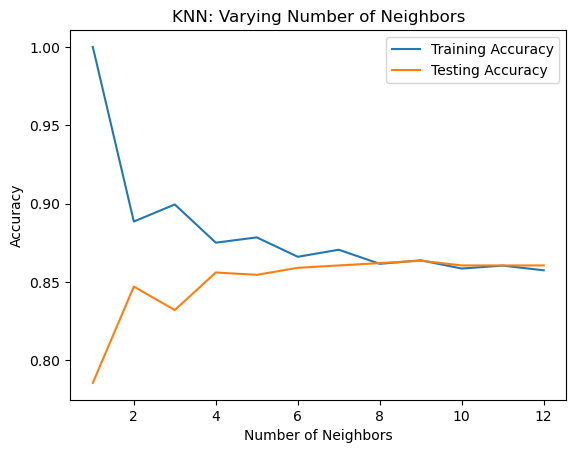

In [6]:
import matplotlib.pyplot as plt

# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

## Regression

In regression tasks, the target variable typically has continuous values, such as a country's GDP or the price of a house.

In [7]:
diabetes_df = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\diabetes_clean.csv")
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [8]:
# create the features and target variable
X = diabetes_df.drop('glucose', axis = 1).values # use all features by dropping only the target variable
y = diabetes_df['glucose'].values

In [9]:
# making predictions from a single feature
# get the bmi
X_bmi = X[:, 4]

# check shape of y and X_bmi
print(y.shape, X_bmi.shape)

(768,) (768,)


The shape indicate that both y and X_bmi are both one-dimensional arrays. This is fine for y, but our features must be formatted as a two-dimensional array to be accepted by scikit-learn

In [10]:
# convert X_bmi from 1D to 2D
X_bmi = X_bmi.reshape(-1, 1)

print(X_bmi.shape)

(768, 1)


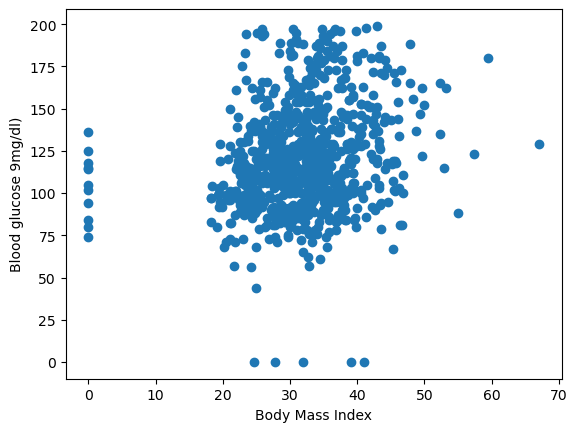

In [11]:
#plotting glucose vs. bmi
plt.scatter(X_bmi, y)
plt.ylabel('Blood glucose 9mg/dl)')
plt.xlabel("Body Mass Index")
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

# instantiate the regression model
reg = LinearRegression()

# fit the model
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi) # since we used our features in the training set, this will create a line of best fit

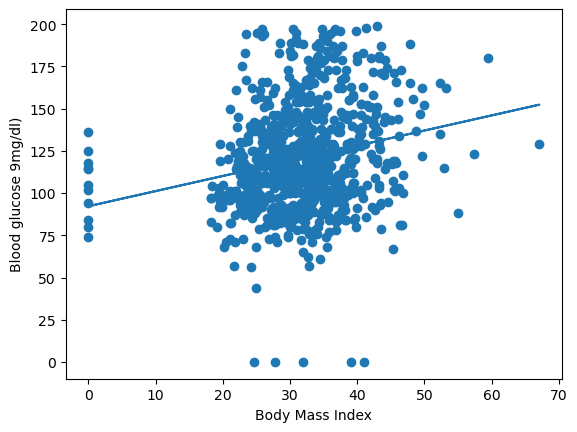

In [13]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel('Blood glucose 9mg/dl)')
plt.xlabel("Body Mass Index")
plt.show()

## The Basics of Linear Regression

__Simple Linear Regression__\
Simple linear regression is used when you want to predict a continuous numerical value (like a price or a score) using a single input feature. Imagine you plot your data on a scatter plot. Linear regression's goal is to draw a single straight line that cuts through the data in a way that it's as close as possible to all the data points collectively. This is called the __line of best fit__. this line is defined by the equation:
$$
y = ax + b
$$
where\
y = target or dependent variable (the value you are trying to predict) \
x = the single feature or independent variable (the value used for prediction)\
a = a model parameter/coefficient called slope \
b = a model parameter/coefficient called intercept 

__How to choose a and b__\
We can define an error function for any given line and then choose the line that minimizes this function. Error functions are also called __loss functions__ or __cost functions__. In a scatter plot, we want a line that will be as close to the observations as possible. Therefore, we want to minimize the vertical distance between the fit and the data. For each observation, we calculate the vertical distance between it and the line. This distance is called a __residual__. We then square the residuals. By adding all the squared residuals, we calculate the __residual sum of squares__ (RSS). This type of linear regressionis called __Ordinary Least Squares__ (OLS), where we aim to minimize RSS. Ordinary Least Squares (OLS) is the mathematical process that finds the perfect slope and intercept to achieve this minimum error.
$$
RSS = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

__Multiple Linear Regression__ \
Multiple Linear Regression is an extension of simple linear regression where you use two or more input features to predict a target variable. To fit a linear regression model for this case, we need to specify the coefficients for each feature and the variable, b.
$$
y = a_1x_1 + a_2x_2 + a_3x_3 + ... + a_nx_n + b
$$
For multiple linear regression models, scikit-learn one variable each for feature and target values, i.e. pass two arrays, one for feature and one for target.

In [14]:
# create the features and target variable
X = diabetes_df.drop('glucose', axis = 1).values # use all features by dropping only the target variable
y = diabetes_df['glucose'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
print(y_pred[:10])

[119.91303675  95.70325357 104.63962314 114.05040231 118.58321727
 127.12240463 101.32326148 109.68914522 114.03971568 123.60324707]


In [15]:
sales_df = pd.read_csv(r"C:\Users\Odinaka Ekemezie\Downloads\advertising_and_sales_clean.csv")
print(sales_df.head(3))

        tv     radio  social_media influencer      sales
0  16000.0   6566.23       2907.98       Mega   54732.76
1  13000.0   9237.76       2409.57       Mega   46677.90
2  41000.0  15886.45       2913.41       Mega  150177.83


In [16]:
# Create X and y arrays
X = sales_df.drop(['influencer', "sales"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

Predictions: [53176.66154234 70996.19873235], Actual Values: [55261.28 67574.9 ]


## Measuring Linear Regression Model Performance

1. __R-squared__: R-squared quantifies the amount of variance in the target variable that is explained by the features. The values range from 0 to 1. A higher R² is generally better. An R² of 0.93 means that 93% of the reason why the target values are different can be explained by the our features. The other 7% is due to other factors. To compute R-squared, we call the model's .score() method, passing the test features and targets.

2. __Mean squared error__: This takes the mean of residual sum of squares. More elaborately, it's calculated by taking the difference between the actual value and the predicted value, squaring that difference, and then finding the average of all those squared differences. It is measured in the unit of the target variable, squared.
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$
3. __Root mean square error__(RMSE): RMSE is the square root of the MSE. It answers the most intuitive question: "On average, how far off are my model's predictions?"


In [1]:
# calculate r-squared
r_squared = reg_all.score(X_test, y_test)
print(f"R-squared (R²): {r_squared:.4f}")
print(f"Interpretation: Our model explains {r_squared:.2%} of the variance in blood glucose levels.")

NameError: name 'reg_all' is not defined

In [ ]:
# calculate root mean squared error
from sklearn.metrics import root_mean_squared_error

RMSE = root_mean_squared_error(y_test, y_pred)
print(f'Interpretation: the model an average error for blood glucose levels of around {RMSE:.2f} mg/dl')

In [ ]:
# Import root_mean_squared_error
from sklearn.metrics import root_mean_squared_error 

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = root_mean_squared_error(y_test, y_pred)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

## Cross-validation

Our model performance is dependent on the way we split our data. The data points in the test set may have some pecularities that mean metric like the R-squared computed on it is not representative of the model's ability to generalize to unseen data. Thus, a single train_test_split may have some pitfalls. When you split your data into one training set and one test set, the accuracy score you get can be a matter of luck. What if, by pure chance, all the "easy" examples ended up in your test set? Your model would look amazing. What if all the "hard" examples ended up in the test set? Your model would look terrible. __Cross-validation__ solves this problem of "lucky" or "unlucky" splits.

Cross-validation is a technique for assessing how well your model will perform on new, unseen data. It gives you a more reliable estimate of your model's performance than a single train_test_split. The most common type of cross-validation is __K-Fold CV__. Here, we split our data into, say, 5 groups or folds. Then, we set aside the first fold as a test set. The four remaining folds are combined to be the training set, wherein we fit our model on. We then predict on our test set and compute the metric of interest such as the R-squared. Next, we set aside the second fold as our test set, fit on the remaining data, predict on the test set, and compute the metric of interest. We repeat the same process with the thid, fourth and fifth folds. As a result, we get five values of R-squared which we can compute statistics of interest such as the mean, median, and 95% confidence intervals.

To perform k-fold cross-validation in scikit-learn, we import _cross_val_score_ from _sklearn.model_selection_. We also import _KFold_, which allows us to set a seed and shuffle our data, making our results repeatable downstream. Though, cross_val_score does train the model multiple times, the model trained during cross_val_score() is not retained or returned. It's trained internally for scoring only, and then discarded.

In [18]:
# Create X and y arrays
X = sales_df.drop(['influencer', "sales"], axis=1).values
y = sales_df["sales"].values

from sklearn.model_selection import KFold, cross_val_score

# Set up our K-Fold cross-validation strategy
# We will split the data into 6 folds.
# shuffle=True randomizes the data before splitting.
# random_state ensures we get the same shuffle every time.
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# instantiate the model
reg = LinearRegression()

# Perform the cross-validation
# cross_val_score will handle the looping, training, and testing for us.
# We'll use R-squared as our scoring metric.
cv_results = cross_val_score(reg, X, y, cv=kf, scoring='r2') # returns an array of cross-validation scores
print(f"Scores for each of the 6 folds: {cv_results}")
print(f"Average R-squared score: {np.mean(cv_results):.4f}")
print(f"Standard deviation of scores: {np.std(cv_results):.4f}")
print(f"95% confidence intervals: {np.quantile(cv_results, [0.025, 0.975])}")

Scores for each of the 6 folds: [0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]
Average R-squared score: 0.9990
Standard deviation of scores: 0.0000
95% confidence intervals: [0.99893558 0.99905335]


## Regularization in regression

Fitting a linear regression model minimizes a loss function to choose a coefficient a, for each feature, and the intercept, b. Large coefficients can lead to overfitting. Therefore, it is common practice to alter the loss function so that it penalizes large coefficients. This is called __regularization__. In simple terms, regularization is a technique used to prevent overfitting by adding a penalty for model complexity.

When you train a regression model, especially a multiple linear regression with many features, it can become too complex. It might learn the training data so perfectly that it starts fitting the random noise instead of the underlying trend. This "over-excited" model will perform poorly on new, unseen data.

Regularization helps by telling the model: "I want you to fit the data well, but I also want you to keep your coefficients as small as possible." By discouraging large coefficients, it forces the model to be simpler and more generalizable.

__Ridge regularization__

Ridge regression adds a penalty proportional to the square of the magnitude of the coefficients. With ridge, we use the Ordinary Least Squares loss function plus the squared value of each coefficient, multiplied by a constant, alpha. So, when minimizing the loss function, models are penalized for coefficients with large positive or negative values. It forces the model to shrink all coefficients, making them smaller. It pushes them towards zero, but it will never make them exactly zero. When using ridge, we need to choose the alpha value in order to fit and predict. Alpha in ridge is known as a __hyperparameter__, which is a variable used to select a model's parameters. Alpha controls model complexity. When alpha equal zero, we are performing OLS, where large coefficients are not penalized and overfitting may occur. High alpha means that large coefficients are significantly penalized, which can lead to underfitting. Ridge is great when you believe that most of your features are useful for making a prediction, but you want to reduce the impact of each one to prevent overfitting.

__Lasso regression__

Lasso (Least Absolute Shrinkage and Selection Operator) adds a penalty proportional to the absolute value of the magnitude of the coefficients. Here, the loss function is the OLS loss function plus the absolute value of each coefficient, multiplied by the constant alpha. This type of penalty has a special property—it can shrink the coefficients of the least important features all the way down to exactly zero. Lasso is fantastic when you have a lot of features and you suspect that only a subset of them are actually important. It performs automatic feature selection by effectively removing the useless features from the model.

In [19]:
# performing ridge regression
from sklearn.linear_model import Ridge

scores = [] # list to hold R-squared values for different alpha values
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)# instantiate ridge and set the alpha value
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
print(scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387]


In [20]:
# performing lasso regression
from sklearn.linear_model import Lasso

scores = [] # list to hold R-squared values for different alpha values
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)# instantiate lasso and set the alpha value
    lasso.fit(X_train, y_train)
    lasso_pred = ridge.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
print(scores)

[0.9990152104762495, 0.9990152105072273, 0.9990152107889495, 0.9990152111033483, 0.9990152120375869]


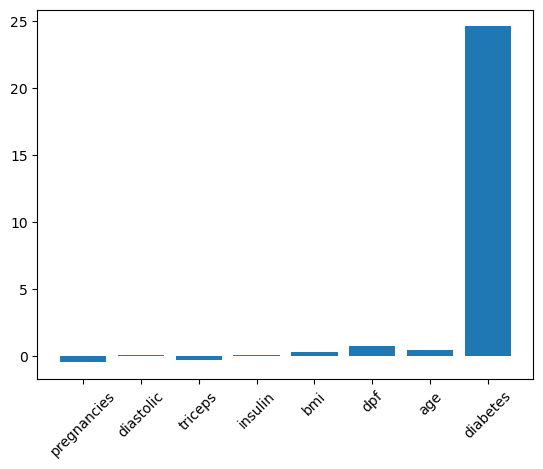

In [21]:
# lasso for feature selection
X = diabetes_df.drop('glucose', axis = 1).values # use all features by dropping only the target variable
y = diabetes_df['glucose'].values
names = diabetes_df.drop('glucose', axis = 1).columns # get the features' names
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_ # fit the model and extract the coefficient
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

From the plot above, we can see that the most important predictor variable for blood glucose value is whether an individual has diabetes or not

## How good is your model?

__Class Imbalance__

Class imbalance occurs when one or more classes in a classification dataset have significantly fewer instances than others, leading to models that are biased towards the majority class and perform poorly on the minority class, a common issue in fraud detection or medical diagnosis. This is a common situation in practice and requires a different approach in assessing the model performance.

__Confusion Matrix__\
A confusion matrix is a table used to evaluate the performance of a classification model. It summarizes the number of correct and incorrect predictions made by the model for each class, allowing for a detailed analysis of its accuracy. By visualizing the model's performance, it helps identify where the model might be struggling and which classes are being misclassified. Given a binary classifier, such as a model for predicting fraudulent transactions, we can create a 2 x 2 matrix that summarizes performance. Given any model, we can fill in the confusion matrix according to its predictions. Usually, the class of interest is called the __positive class__. In this case, the positive class is fraudulent transactions.

__True Positives (TP)__: Correctly predicted positive cases, example: the number of transactions correctly identified as fraudulent \
__True Negatives (TN)__: Correctly predicted negative cases, example: the number of transactions correctly identified as legitimate \
__False Positives (FP)__: Incorrectly predicted positive cases (Type I error), the number of transactions incorrectly identified as fraudulent \
__False Negatives (FN)__: Incorrectly predicted negative cases (Type II error), example: the number of transactions incorrectly identified as legitimate

__Assessing Classification Performance__

1. __Accuracy__: This is the sum of true predictions divided by the total number of observations. It answers the question: _what fraction of predictions did the model get right?_
$$
\frac{TN + TP}{TN + FN + TP + FP}
$$
2. __Precision__: This is the number of true positives divided by the sum of all positive predictions. It is also called the __positive predicted value__. For example, this is the number of correctly labeled fraudulent transactions divided by the total number of transactions classified as fraudulent. It answers the question: _when the model predicted a positive case, how often was it actually correct?_. High precision means having a lower false positive rate. For example, high precision can indicate that fewer legitimate transactions are classified as fraudulent
$$
\frac{TP}{TP + FP}
$$
3. __Recall__: This is the number of true positives divided by the sum of true positives and false negatives. This is also called __sensitivity__. It answers the questions: _of all the positive cases, what fraction did the model correctly predict?_. High recall reflects a lower false negative rate. For example, high recall indicates we are predicting most fraudulent transactions correctly.

$$
\frac{TP}{TP + FN}
$$
4. __F1 Score__: F1 Score is the harmonic mean of precision and recall. This metric gives equal weight to precision and recall, therefore it factors in both the number of errors made by the model and the type of errors. It favors models with similar precision and recall, and is a useful metric if we are seekind a model which performs reasonably well across both metrics.
$$
2 * \frac{precision * recall}{precision + recall}
$$


In [22]:
from sklearn.metrics import classification_report, confusion_matrix

# split the data into features (X) and target values (y)
X = churn_df[['total_day_charge', 'total_eve_charge']].values # convert to NumPy arrays
y = churn_df['churn'].values # convert to NumPy arrays

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# instantiate the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7) 

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# make predictions
y_pred = knn.predict(X_test)

# print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[1111   27]
 [ 142   54]]


In [23]:
# print the relevant metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      1138
           1       0.67      0.28      0.39       196

    accuracy                           0.87      1334
   macro avg       0.78      0.63      0.66      1334
weighted avg       0.85      0.87      0.85      1334



## Logistic Regression

While linear regression is used to predict a number (like a price), logistic regression is used for classification tasks—specifically, to predict a binary (Yes/No) outcome. This model calculates the probability, p, that an observation belongs to a binary class. The key to logistic regression is that it doesn't just predict a hard "Yes" or "No". Instead, it calculates the probability that an observation belongs to the "Yes" class. This probability is a value between 0 and 1. We then use a threshold (usually 0.5) to make a final decision.

__The ROC Curve__ \
The default probability threshold for logistic regression in scikit-learn is 0.5. This threshold can also apply to other models like KNN. So what happens when we vary this threshold? We can use the __receiver operating characteristic__, or __ROC Curve__ to visualize how different how different thresholds true positive and false positive rates. Therefore, The Receiver Operating Characteristic (ROC) curve is a graph that shows the performance of a classification model at all possible classification thresholds. It visualizes the trade-off between two key metrics: True Positive Rate (TPR) and False Positive Rate (TPR). Let's further explain ROC with the analogy below: \
* A security scanner tries to identify dangerous items (the "positive" class).

* TPR: Correctly identifying a dangerous item.

* FPR: Incorrectly flagging a harmless item (like a water bottle) as dangerous (a "false alarm").

* You can set the scanner to be super sensitive. This will increase its TPR (it will catch more real threats), but it will also increase its FPR (it will create more false alarms). The ROC curve plots this exact trade-off.

__Interpreting the ROC Curve__

* A diagonal line represents a model with no skill (random guessing).

* A good model has a curve that bows up towards the top-left corner. The closer to the top-left, the better the model is at distinguishing between the "Yes" and "No" classes.

__AUC: The Area Under the Curve__

The Area Under the (ROC) Curve (AUC) is a single number that summarizes the entire ROC curve. It tells you how good your model is at ranking a random positive instance higher than a random negative instance.

* AUC = 0.5: The model is no better than random guessing.

* AUC = 1.0: The model is a perfect classifier.

* A model with an AUC of 0.85 is generally considered quite good.



In [24]:
## performing logistic regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg.fit(X_train, y_train)

# Get the  class prediction (Yes/No or 1/0)
y_pred = logreg.predict(X_test)
print(f"Final Predictions (based on >0.5 threshold): {y_pred[:5]}")

Final Predictions (based on >0.5 threshold): [0 0 0 0 0]


In [25]:
# Get the predicted probabilities for the test set
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(f"Predicted Probability for first 1 class value:\n{y_pred_probs[0]}")

Predicted Probability for first 1 class value:
0.18826020038112776


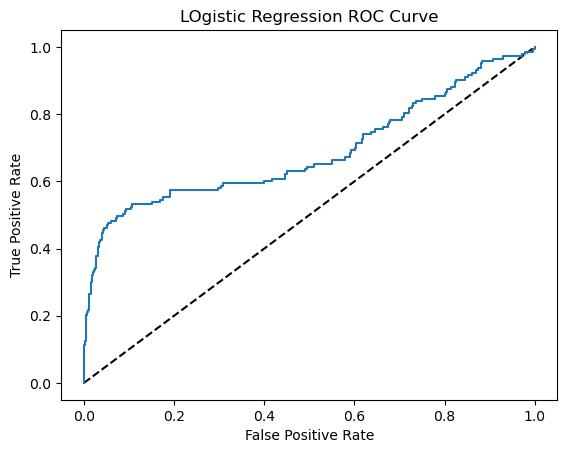

In [26]:
# plotting ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LOgistic Regression ROC Curve')
plt.show()

In [27]:
# performing ROC AUC
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.6870364174914934


## Hyperparameter Tuning

__What is a parameter and a hyperparameter?__ \
1. __Parameters__: These are values the model learns from the data during training. For example, the coefficients in a linear regression are parameters. You don't choose them; the model finds them.
2. __Hyperparameters__: There are parameters that we specify before fitting a model. For example, alpha in ridge/lasso regression and n_neighbors in KNN are hyperparameters.

__Hyperparameter tuning__ is the process of finding the best combination of hyperparameter values to make your model perform as well as possible. A basic workflow of hyperparamer tuning is:
1. Try lots of different hyperparameter values
2. Fit all of them separately
3. See how they perform
4. Choose the best performing values

When fitting different hyperparameter values, we use cross-validation to avoid overfitting the hyperparameters to the test set. We can still split the data, but perform cross-validation on the training set. We withhold the test set and use it for evaluating the tuned model.

__Two Methods of Hyperparameter Tuning__

1. __GridSearchCV__:Here, we choose a grid of possible hyperparameter values to try. In other words, it meticulously tries every single possible combination of the hyperparameter values you provide. For example, we can search across two hyperparameters for a KNN model - the type of metric and a diferent number of neighbors. We use k-fold cross-validation for each combination of hyperparameters and evaluate them. We then choose the hyperparameters that perform best.
2. __RandomSearchCV__: This picks random hyperparameter values rather than exhaustively searching through all options.It's much faster and less computationally demanding. It's surprisingly effective because often only a few hyperparameters truly matter.

__Evaluating on the test set__\
We can evaluate model performance on the test set by passing it to the .score() method

In [28]:
# performing GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold

# Create X and y arrays
X = sales_df.drop(['influencer', "sales"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# instantiate KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# specify names and values  of hyperparameters
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              'solver': ['sag', 'lsqr']}

ridge = Ridge()

# create a gris search object
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)

# fit the object to the training set
ridge_cv.fit(X_train, y_train)

# print model attributes
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'lsqr'} 0.9989757908476118


In [29]:
# performing RandomSearchCV
from sklearn.model_selection import RandomizedSearchCV

# instantiate KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# specify names and values  of hyperparameters
param_grid = {'alpha': np.arange(0.0001, 1, 10),
              'solver': ['sag', 'lsqr']}

ridge = Ridge()

# create a grid search object
#n_iter determines the number of hyperparameter values tested
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)

# fit the object to the training set
ridge_cv.fit(X_train, y_train)

# print model attributes
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'lsqr', 'alpha': 0.0001} 0.9989757908476118


In [30]:
# evaluateing on the test set
test_score = ridge_cv.score(X_test, y_test)
print(test_score)

0.9990152104759368


## Preprocessing Data

Scikit-learn requires numeric data with no missing values. All the data used so far has been in this format. However, with real-world data, this is rarely the case. We need to preprocess our data before we can build models

__Dealing with categorical features__ \
One of the most common preprocessing tasks is handling categorical features. Machine learning models are mathematical, which means they work with numbers, not text. They don't understand categories like 'Port Harcourt', 'Lagos', or 'Good', 'Bad'. Our goal is to convert these text-based categories into a numerical representation that the model can understand. We achieve this by splitting the feature into multiple binary features called __dummy variables__, one for each category. O means the observation was not that category, while 1 means it was. Say we are working with a musical dataset that has a genre feature with ten values like hip-pop, rock, jazz, and blues. We create binary feature for each genre. As each song has one genre, each row will have a 1 in one of the ten columns and Zeros in the rest. If a song is not any of the first nine genres, then implicitly, it is the last genre. That means we only need nine features; so we can delete the last column. If we do not do this, we are duplicating information, which might an issue for some models. To create dummy variables, we can use scikit-learn's _OneHotEncoder()_ or pandas' _get_dummies()_. This is approach is called __One Hot Encoding__. It is the standard and safest way to handle nominal data.

In [80]:
import pandas as pd

music_df = pd.DataFrame({'popularity': {0: 41.0, 1: 62.0, 2: 42.0, 3: 64.0, 4: 60.0, 5: 50.0, 6: 62.0, 7: 70.0, 8: 61.0, 9: 71.0, 10: 39.0, 11: 67.0, 12: 53.0, 13: 29.0, 14: 52.0, 15: 65.0, 16: 39.0, 17: 52.0, 18: 23.0, 19: 67.0, 20: 48.0, 21: 58.0, 22: 67.0, 23: 62.0, 24: 52.0, 25: 59.0, 26: 68.0, 27: 43.0, 28: 64.0, 29: 32.0, 30: 61.0, 31: 55.0, 32: 65.0, 33: 51.0, 34: 68.0, 35: 74.0, 36: 62.0, 37: 54.0, 38: 65.0, 39: 51.0, 40: 53.0, 41: 50.0, 42: 33.0, 43: 0.0, 44: 62.0, 45: 25.0, 46: 46.0, 47: 53.0, 48: 39.0, 49: 34.0, 50: 66.0, 51: 54.0, 52: 50.0, 53: 54.0, 54: 69.0, 55: 60.0, 56: 63.0, 57: 61.0, 58: 26.0, 59: 57.0, 60: 46.0, 61: 23.0, 62: 46.0, 63: 30.0, 64: 63.0, 65: 34.0, 66: 63.0, 67: 37.0, 68: 11.0, 69: 63.0, 70: 79.0, 71: 61.0, 72: 53.0, 73: 53.0, 74: 45.0, 75: 68.0, 76: 45.0, 77: 62.0, 78: 57.0, 79: 47.0, 80: 49.0, 81: 63.0, 82: 25.0, 83: 51.0, 84: 55.0, 85: 58.0, 86: 40.0, 87: 57.0, 88: 35.0, 89: 60.0, 90: 37.0, 91: 48.0, 92: 57.0, 93: 51.0, 94: 51.0, 95: 57.0, 96: 63.0, 97: 54.0, 98: 69.0, 99: 13.0, 100: 53.0, 101: 35.0, 102: 64.0, 103: 64.0, 104: 47.0, 105: 37.0, 106: 51.0, 107: 55.0, 108: 57.0, 109: 53.0, 110: 58.0, 111: 55.0, 112: 59.0, 113: 73.0, 114: 27.0, 115: 59.0, 116: 41.0, 117: 48.0, 118: 56.0, 119: 71.0, 120: 52.0, 121: 44.0, 122: 54.0, 123: 53.0, 124: 47.0, 125: 63.0, 126: 64.0, 127: 47.0, 128: 23.0, 129: 25.0, 130: 65.0, 131: 66.0, 132: 54.0, 133: 8.0, 134: 55.0, 135: 48.0, 136: 26.0, 137: 29.0, 138: 55.0, 139: 53.0, 140: 30.0, 141: 18.0, 142: 28.0, 143: 51.0, 144: 48.0, 145: 73.0, 146: 64.0, 147: 64.0, 148: 61.0, 149: 61.0, 150: 51.0, 151: 59.0, 152: 32.0, 153: 41.0, 154: 69.0, 155: 74.0, 156: 52.0, 157: 33.0, 158: 57.0, 159: 58.0, 160: 24.0, 161: 63.0, 162: 61.0, 163: 63.0, 164: 65.0, 165: 61.0, 166: 38.0, 167: 34.0, 168: 46.0, 169: 6.0, 170: 50.0, 171: 62.0, 172: 69.0, 173: 63.0, 174: 62.0, 175: 48.0, 176: 52.0, 177: 55.0, 178: 51.0, 179: 55.0, 180: 55.0, 181: 12.0, 182: 40.0, 183: 60.0, 184: 63.0, 185: 57.0, 186: 62.0, 187: 54.0, 188: 59.0, 189: 58.0, 190: 56.0, 191: 57.0, 192: 58.0, 193: 31.0, 194: 55.0, 195: 53.0, 196: 55.0, 197: 51.0, 198: 61.0, 199: 46.0, 200: 53.0, 201: 65.0, 202: 54.0, 203: 23.0, 204: 53.0, 205: 75.0, 206: 36.0, 207: 33.0, 208: 54.0, 209: 59.0, 210: 56.0, 211: 43.0, 212: 13.0, 213: 40.0, 214: 51.0, 215: 44.0, 216: 65.0, 217: 59.0, 218: 53.0, 219: 50.0, 220: 47.0, 221: 47.0, 222: 62.0, 223: 37.0, 224: 49.0, 225: 28.0, 226: 67.0, 227: 54.0, 228: 36.0, 229: 61.0, 230: 48.0, 231: 44.0, 232: 54.0, 233: 47.0, 234: 53.0, 235: 73.0, 236: 59.0, 237: 36.0, 238: 53.0, 239: 30.0, 240: 30.0, 241: 16.0, 242: 55.0, 243: 51.0, 244: 53.0, 245: 30.0, 246: 63.0, 247: 16.0, 248: 33.0, 249: 55.0, 250: 51.0, 251: 80.0, 252: 39.0, 253: 58.0, 254: 47.0, 255: 61.0, 256: 70.0, 257: 30.0, 258: 66.0, 259: 21.0, 260: 64.0, 261: 70.0, 262: 44.0, 263: 41.0, 264: 42.0, 265: 34.0, 266: 58.0, 267: 52.0, 268: 56.0, 269: 55.0, 270: 60.0, 271: 54.0, 272: 75.0, 273: 57.0, 274: 60.0, 275: 55.0, 276: 61.0, 277: 76.0, 278: 41.0, 279: 70.0, 280: 41.0, 281: 64.0, 282: 64.0, 283: 21.0, 284: 55.0, 285: 58.0, 286: 68.0, 287: 42.0, 288: 42.0, 289: 51.0, 290: 34.0, 291: 71.0, 292: 44.0, 293: 57.0, 294: 63.0, 295: 76.0, 296: 44.0, 297: 59.0, 298: 62.0, 299: 53.0, 300: 72.0, 301: 52.0, 302: 33.0, 303: 64.0, 304: 55.0, 305: 58.0, 306: 59.0, 307: 52.0, 308: 56.0, 309: 50.0, 310: 44.0, 311: 71.0, 312: 54.0, 313: 27.0, 314: 54.0, 315: 62.0, 316: 53.0, 317: 50.0, 318: 53.0, 319: 60.0, 320: 59.0, 321: 68.0, 322: 65.0, 323: 62.0, 324: 50.0, 325: 44.0, 326: 72.0, 327: 74.0, 328: 55.0, 329: 64.0, 330: 63.0, 331: 53.0, 332: 35.0, 333: 66.0, 334: 55.0, 335: 66.0, 336: 53.0, 337: 60.0, 338: 64.0, 339: 64.0, 340: 38.0, 341: 72.0, 342: 19.0, 343: 34.0, 344: 63.0, 345: 49.0, 346: 40.0, 347: 49.0, 348: 42.0, 349: 56.0, 350: 57.0, 351: 30.0, 352: 53.0, 353: 25.0, 354: 51.0, 355: 48.0, 356: 55.0, 357: 42.0, 358: 71.0, 359: 55.0, 360: 65.0, 361: 57.0, 362: 67.0, 363: 31.0, 364: 72.0, 365: 65.0, 366: 40.0, 367: 39.0, 368: 23.0, 369: 66.0, 370: 53.0, 371: 49.0, 372: 69.0, 373: 59.0, 374: 52.0, 375: 48.0, 376: 52.0, 377: 60.0, 378: 56.0, 379: 70.0, 380: 50.0, 381: 35.0, 382: 37.0, 383: 54.0, 384: 68.0, 385: 57.0, 386: 59.0, 387: 66.0, 388: 66.0, 389: 61.0, 390: 49.0, 391: 60.0, 392: 28.0, 393: 62.0, 394: 65.0, 395: 53.0, 396: 58.0, 397: 48.0, 398: 48.0, 399: 62.0, 400: 36.0, 401: 59.0, 402: 58.0, 403: 62.0, 404: 56.0, 405: 50.0, 406: 56.0, 407: 41.0, 408: 66.0, 409: 28.0, 410: 63.0, 411: 30.0, 412: 59.0, 413: 67.0, 414: 52.0, 415: 56.0, 416: 46.0, 417: 50.0, 418: 41.0, 419: 38.0, 420: 55.0, 421: 74.0, 422: 57.0, 423: 50.0, 424: 62.0, 425: 29.0, 426: 64.0, 427: 56.0, 428: 16.0, 429: 77.0, 430: 56.0, 431: 69.0, 432: 46.0, 433: 52.0, 434: 29.0, 435: 60.0, 436: 53.0, 437: 28.0, 438: 54.0, 439: 52.0, 440: 54.0, 441: 27.0, 442: 53.0, 443: 60.0, 444: 42.0, 445: 68.0, 446: 53.0, 447: 25.0, 448: 16.0, 449: 29.0, 450: 53.0, 451: 58.0, 452: 38.0, 453: 66.0, 454: 56.0, 455: 55.0, 456: 51.0, 457: 38.0, 458: 0.0, 459: 36.0, 460: 55.0, 461: 64.0, 462: 52.0, 463: 47.0, 464: 25.0, 465: 78.0, 466: 36.0, 467: 59.0, 468: 56.0, 469: 59.0, 470: 41.0, 471: 54.0, 472: 58.0, 473: 66.0, 474: 66.0, 475: 53.0, 476: 60.0, 477: 59.0, 478: 65.0, 479: 38.0, 480: 53.0, 481: 30.0, 482: 57.0, 483: 64.0, 484: 32.0, 485: 67.0, 486: 55.0, 487: 68.0, 488: 51.0, 489: 54.0, 490: 46.0, 491: 19.0, 492: 54.0, 493: 71.0, 494: 35.0, 495: 32.0, 496: 0.0, 497: 41.0, 498: 54.0, 499: 62.0, 500: 55.0, 501: 62.0, 502: 57.0, 503: 52.0, 504: 21.0, 505: 55.0, 506: 59.0, 507: 27.0, 508: 46.0, 509: 64.0, 510: 53.0, 511: 66.0, 512: 59.0, 513: 48.0, 514: 58.0, 515: 52.0, 516: 23.0, 517: 34.0, 518: 43.0, 519: 30.0, 520: 68.0, 521: 57.0, 522: 62.0, 523: 40.0, 524: 73.0, 525: 15.0, 526: 37.0, 527: 61.0, 528: 70.0, 529: 61.0, 530: 57.0, 531: 50.0, 532: 56.0, 533: 59.0, 534: 77.0, 535: 42.0, 536: 56.0, 537: 32.0, 538: 60.0, 539: 51.0, 540: 58.0, 541: 61.0, 542: 71.0, 543: 66.0, 544: 57.0, 545: 54.0, 546: 32.0, 547: 34.0, 548: 36.0, 549: 57.0, 550: 65.0, 551: 26.0, 552: 26.0, 553: 41.0, 554: 50.0, 555: 62.0, 556: 54.0, 557: 66.0, 558: 12.0, 559: 60.0, 560: 36.0, 561: 55.0, 562: 58.0, 563: 67.0, 564: 53.0, 565: 40.0, 566: 46.0, 567: 54.0, 568: 27.0, 569: 70.0, 570: 65.0, 571: 51.0, 572: 50.0, 573: 54.0, 574: 54.0, 575: 64.0, 576: 40.0, 577: 56.0, 578: 59.0, 579: 68.0, 580: 55.0, 581: 28.0, 582: 40.0, 583: 32.0, 584: 51.0, 585: 68.0, 586: 45.0, 587: 38.0, 588: 72.0, 589: 54.0, 590: 54.0, 591: 68.0, 592: 56.0, 593: 46.0, 594: 70.0, 595: 42.0, 596: 58.0, 597: 30.0, 598: 64.0, 599: 36.0, 600: 70.0, 601: 65.0, 602: 68.0, 603: 39.0, 604: 70.0, 605: 61.0, 606: 53.0, 607: 65.0, 608: 70.0, 609: 54.0, 610: 62.0, 611: 61.0, 612: 54.0, 613: 61.0, 614: 71.0, 615: 47.0, 616: 46.0, 617: 26.0, 618: 51.0, 619: 61.0, 620: 56.0, 621: 13.0, 622: 61.0, 623: 56.0, 624: 47.0, 625: 52.0, 626: 36.0, 627: 66.0, 628: 42.0, 629: 42.0, 630: 39.0, 631: 57.0, 632: 52.0, 633: 43.0, 634: 25.0, 635: 35.0, 636: 70.0, 637: 48.0, 638: 67.0, 639: 47.0, 640: 42.0, 641: 65.0, 642: 53.0, 643: 53.0, 644: 49.0, 645: 59.0, 646: 56.0, 647: 38.0, 648: 60.0, 649: 37.0, 650: 73.0, 651: 33.0, 652: 54.0, 653: 55.0, 654: 56.0, 655: 64.0, 656: 43.0, 657: 52.0, 658: 60.0, 659: 58.0, 660: 63.0, 661: 37.0, 662: 28.0, 663: 54.0, 664: 56.0, 665: 37.0, 666: 32.0, 667: 51.0, 668: 28.0, 669: 61.0, 670: 68.0, 671: 65.0, 672: 54.0, 673: 38.0, 674: 13.0, 675: 63.0, 676: 55.0, 677: 55.0, 678: 61.0, 679: 50.0, 680: 53.0, 681: 58.0, 682: 42.0, 683: 63.0, 684: 64.0, 685: 76.0, 686: 59.0, 687: 51.0, 688: 49.0, 689: 80.0, 690: 58.0, 691: 45.0, 692: 33.0, 693: 58.0, 694: 47.0, 695: 71.0, 696: 42.0, 697: 57.0, 698: 70.0, 699: 62.0, 700: 55.0, 701: 52.0, 702: 40.0, 703: 22.0, 704: 60.0, 705: 65.0, 706: 54.0, 707: 70.0, 708: 31.0, 709: 56.0, 710: 63.0, 711: 52.0, 712: 25.0, 713: 73.0, 714: 60.0, 715: 30.0, 716: 41.0, 717: 57.0, 718: 29.0, 719: 32.0, 720: 30.0, 721: 55.0, 722: 53.0, 723: 57.0, 724: 38.0, 725: 40.0, 726: 62.0, 727: 60.0, 728: 67.0, 729: 78.0, 730: 23.0, 731: 54.0, 732: 58.0, 733: 54.0, 734: 67.0, 735: 52.0, 736: 62.0, 737: 30.0, 738: 60.0, 739: 55.0, 740: 63.0, 741: 72.0, 742: 61.0, 743: 38.0, 744: 82.0, 745: 45.0, 746: 32.0, 747: 21.0, 748: 36.0, 749: 58.0, 750: 56.0, 751: 38.0, 752: 26.0, 753: 59.0, 754: 71.0, 755: 41.0, 756: 59.0, 757: 57.0, 758: 73.0, 759: 29.0, 760: 40.0, 761: 57.0, 762: 66.0, 763: 30.0, 764: 48.0, 765: 55.0, 766: 61.0, 767: 58.0, 768: 28.0, 769: 32.0, 770: 49.0, 771: 81.0, 772: 54.0, 773: 77.0, 774: 61.0, 775: 50.0, 776: 72.0, 777: 56.0, 778: 54.0, 779: 37.0, 780: 56.0, 781: 52.0, 782: 62.0, 783: 61.0, 784: 75.0, 785: 55.0, 786: 41.0, 787: 67.0, 788: 54.0, 789: 27.0, 790: 60.0, 791: 60.0, 792: 35.0, 793: 30.0, 794: 79.0, 795: 52.0, 796: 57.0, 797: 55.0, 798: 62.0, 799: 40.0, 800: 67.0, 801: 50.0, 802: 64.0, 803: 75.0, 804: 54.0, 805: 21.0, 806: 34.0, 807: 50.0, 808: 56.0, 809: 33.0, 810: 50.0, 811: 54.0, 812: 38.0, 813: 50.0, 814: 74.0, 815: 19.0, 816: 68.0, 817: 28.0, 818: 51.0, 819: 51.0, 820: 59.0, 821: 65.0, 822: 67.0, 823: 20.0, 824: 65.0, 825: 63.0, 826: 50.0, 827: 45.0, 828: 36.0, 829: 56.0, 830: 51.0, 831: 63.0, 832: 48.0, 833: 52.0, 834: 59.0, 835: 69.0, 836: 37.0, 837: 66.0, 838: 47.0, 839: 50.0, 840: 66.0, 841: 64.0, 842: 59.0, 843: 61.0, 844: 64.0, 845: 56.0, 846: 55.0, 847: 50.0, 848: 66.0, 849: 50.0, 850: 60.0, 851: 62.0, 852: 68.0, 853: 58.0, 854: 66.0, 855: 31.0, 856: 47.0, 857: 74.0, 858: 52.0, 859: 33.0, 860: 53.0, 861: 62.0, 862: 52.0, 863: 56.0, 864: 50.0, 865: 68.0, 866: 57.0, 867: 67.0, 868: 47.0, 869: 44.0, 870: 60.0, 871: 47.0, 872: 45.0, 873: 38.0, 874: 45.0, 875: 13.0, 876: 62.0, 877: 33.0, 878: 39.0, 879: 33.0, 880: 58.0, 881: 49.0, 882: 34.0, 883: 68.0, 884: 39.0, 885: 57.0, 886: 56.0, 887: 56.0, 888: 33.0, 889: 68.0, 890: 35.0, 891: 61.0, 892: 55.0, 893: 54.0, 894: 28.0, 895: 53.0, 896: 51.0, 897: 50.0, 898: 60.0, 899: 60.0, 900: 62.0, 901: 64.0, 902: 42.0, 903: 55.0, 904: 77.0, 905: 41.0, 906: 58.0, 907: 59.0, 908: 53.0, 909: 64.0, 910: 59.0, 911: 62.0, 912: 2.0, 913: 67.0, 914: 55.0, 915: 48.0, 916: 63.0, 917: 57.0, 918: 50.0, 919: 56.0, 920: 68.0, 921: 46.0, 922: 40.0, 923: 42.0, 924: 63.0, 925: 52.0, 926: 46.0, 927: 21.0, 928: 50.0, 929: 51.0, 930: 49.0, 931: 58.0, 932: 62.0, 933: 58.0, 934: 64.0, 935: 66.0, 936: 49.0, 937: 56.0, 938: 69.0, 939: 44.0, 940: 40.0, 941: 32.0, 942: 62.0, 943: 72.0, 944: 53.0, 945: 38.0, 946: 57.0, 947: 31.0, 948: 43.0, 949: 24.0, 950: 57.0, 951: 44.0, 952: 56.0, 953: 48.0, 954: 50.0, 955: 65.0, 956: 31.0, 957: 23.0, 958: 70.0, 959: 61.0, 960: 33.0, 961: 67.0, 962: 65.0, 963: 62.0, 964: 64.0, 965: 26.0, 966: 56.0, 967: 50.0, 968: 53.0, 969: 44.0, 970: 47.0, 971: 57.0, 972: 55.0, 973: 53.0, 974: 54.0, 975: 62.0, 976: 51.0, 977: 54.0, 978: 69.0, 979: 49.0, 980: 56.0, 981: 35.0, 982: 53.0, 983: 54.0, 984: 51.0, 985: 79.0, 986: 64.0, 987: 39.0, 988: 25.0, 989: 58.0, 990: 21.0, 991: 25.0, 992: 65.0, 993: 58.0, 994: 53.0, 995: 65.0, 996: 38.0, 997: 56.0, 998: 64.0, 999: 61.0}, 'acousticness': {0: 0.644, 1: 0.0855, 2: 0.239, 3: 0.0125, 4: 0.121, 5: 0.0664, 6: 0.0198, 7: 0.0823, 8: 0.608, 9: 0.0314, 10: 0.97, 11: 0.000531, 12: 0.00351, 13: 0.0684, 14: 0.386, 15: 0.171, 16: 0.00351, 17: 0.0178, 18: 0.019, 19: 0.00238, 20: 0.787, 21: 0.22, 22: 0.0609, 23: 0.0004559999999999, 24: 0.0038399999999999, 25: 0.833, 26: 0.021, 27: 0.0129, 28: 0.0766, 29: 0.00465, 30: 0.0433, 31: 0.126, 32: 0.000995, 33: 0.602, 34: 0.221, 35: 0.0241, 36: 0.0182, 37: 0.936, 38: 0.527, 39: 0.316, 40: 0.0364, 41: 0.00555, 42: 0.84, 43: 0.928, 44: 0.0316, 45: 0.0106, 46: 0.0328, 47: 0.00216, 48: 0.156, 49: 0.441, 50: 0.173, 51: 0.0173, 52: 0.00199, 53: 0.424, 54: 0.0416, 55: 0.0819999999999999, 56: 0.0004669999999999, 57: 0.0774, 58: 0.77, 59: 0.0837, 60: 0.141, 61: 0.146, 62: 0.00191, 63: 0.8059999999999999, 64: 0.309, 65: 0.0183, 66: 0.171, 67: 0.0266, 68: 0.929, 69: 3.2200000000000003e-05, 70: 0.57, 71: 0.74, 72: 0.917, 73: 0.000252, 74: 0.00126, 75: 0.126, 76: 0.445, 77: 0.006, 78: 0.402, 79: 0.054, 80: 0.0117, 81: 0.0162, 82: 0.996, 83: 0.00925, 84: 0.0841, 85: 0.171, 86: 0.000636, 87: 0.123, 88: 0.0153, 89: 4.85e-05, 90: 0.6779999999999999, 91: 0.449, 92: 0.735, 93: 0.151, 94: 0.0224, 95: 0.58, 96: 0.0038399999999999, 97: 0.2289999999999999, 98: 0.0004559999999999, 99: 0.826, 100: 0.258, 101: 0.437, 102: 0.0507, 103: 0.263, 104: 0.23, 105: 0.192, 106: 0.000273, 107: 0.83, 108: 0.0929, 109: 0.903, 110: 0.00144, 111: 0.16, 112: 0.122, 113: 0.2319999999999999, 114: 0.7020000000000001, 115: 0.205, 116: 0.178, 117: 0.131, 118: 0.298, 119: 0.0272, 120: 0.15, 121: 0.71, 122: 0.173, 123: 0.00824, 124: 0.111, 125: 0.35, 126: 0.00165, 127: 0.324, 128: 0.146, 129: 0.00398, 130: 0.096, 131: 0.000821, 132: 0.00664, 133: 0.954, 134: 0.266, 135: 0.198, 136: 0.168, 137: 0.972, 138: 0.349, 139: 0.0133, 140: 0.915, 141: 0.903, 142: 0.422, 143: 0.0424, 144: 0.3339999999999999, 145: 0.0249, 146: 0.2789999999999999, 147: 0.79, 148: 0.836, 149: 0.0824, 150: 0.0258, 151: 0.031, 152: 0.000744, 153: 0.0873, 154: 0.0156, 155: 0.0459, 156: 0.152, 157: 0.933, 158: 0.0164, 159: 0.00107, 160: 0.00633, 161: 0.0129, 162: 0.0017399999999999, 163: 0.0414, 164: 0.723, 165: 0.0214, 166: 0.733, 167: 3.23e-06, 168: 0.129, 169: 0.978, 170: 0.00263, 171: 0.0234, 172: 0.00197, 173: 0.0105, 174: 0.0129, 175: 0.0185, 176: 0.00297, 177: 0.00394, 178: 0.425, 179: 0.178, 180: 0.000651, 181: 0.991, 182: 0.102, 183: 0.648, 184: 0.7879999999999999, 185: 0.000126, 186: 0.0904, 187: 0.0593, 188: 0.000386, 189: 0.669, 190: 0.085, 191: 0.7859999999999999, 192: 0.0091, 193: 0.569, 194: 0.4589999999999999, 195: 0.000377, 196: 0.0226, 197: 0.00537, 198: 0.517, 199: 0.89, 200: 0.56, 201: 0.218, 202: 0.141, 203: 0.377, 204: 0.00358, 205: 0.0144, 206: 0.0914, 207: 0.377, 208: 0.257, 209: 0.19, 210: 0.993, 211: 0.989, 212: 0.812, 213: 0.91, 214: 0.0378, 215: 0.931, 216: 0.273, 217: 0.000813, 218: 0.222, 219: 0.1009999999999999, 220: 0.0021899999999999, 221: 0.8029999999999999, 222: 0.000198, 223: 0.0106, 224: 0.000821, 225: 0.0357, 226: 0.266, 227: 0.4539999999999999, 228: 0.139, 229: 0.21, 230: 0.6679999999999999, 231: 0.888, 232: 0.0005639999999999, 233: 0.52, 234: 0.0248, 235: 0.000243, 236: 0.00758, 237: 0.847, 238: 0.00591, 239: 0.8320000000000001, 240: 0.00701, 241: 0.00883, 242: 0.479, 243: 0.035, 244: 0.7440000000000001, 245: 0.747, 246: 0.0285, 247: 0.0246, 248: 0.00938, 249: 0.128, 250: 0.0483, 251: 0.381, 252: 0.872, 253: 0.049, 254: 0.474, 255: 0.698, 256: 0.272, 257: 0.223, 258: 0.165, 259: 0.614, 260: 0.17, 261: 0.4039999999999999, 262: 0.597, 263: 0.962, 264: 0.00798, 265: 0.0267, 266: 0.0107, 267: 0.00372, 268: 0.00227, 269: 0.324, 270: 0.0847, 271: 0.00229, 272: 0.5820000000000001, 273: 0.732, 274: 0.316, 275: 0.1369999999999999, 276: 0.00987, 277: 0.386, 278: 0.885, 279: 0.0056799999999999, 280: 0.0282, 281: 0.0217, 282: 0.347, 283: 0.122, 284: 0.0674, 285: 0.13, 286: 0.00107, 287: 1.46e-05, 288: 0.000128, 289: 0.000614, 290: 0.551, 291: 0.0414, 292: 0.000254, 293: 0.123, 294: 0.069, 295: 0.1939999999999999, 296: 0.000354, 297: 0.8190000000000001, 298: 0.0175, 299: 0.0355, 300: 0.536, 301: 0.0117, 302: 0.0731, 303: 0.298, 304: 0.271, 305: 0.522, 306: 0.0185, 307: 0.00101, 308: 0.6509999999999999, 309: 0.0012699999999999, 310: 0.204, 311: 0.0311, 312: 0.517, 313: 0.665, 314: 0.503, 315: 0.573, 316: 0.1639999999999999, 317: 0.0193, 318: 0.746, 319: 0.0553, 320: 0.00457, 321: 0.182, 322: 0.0207, 323: 0.0812, 324: 0.0125, 325: 0.924, 326: 0.564, 327: 0.0764, 328: 0.287, 329: 0.795, 330: 0.0015199999999999, 331: 0.0038799999999999, 332: 0.0072099999999999, 333: 0.0238, 334: 0.0056, 335: 0.0219, 336: 0.000242, 337: 0.13, 338: 0.412, 339: 0.0263, 340: 0.0882, 341: 0.909, 342: 0.105, 343: 0.981, 344: 0.0915, 345: 0.0269, 346: 0.423, 347: 0.32, 348: 0.4579999999999999, 349: 0.00134, 350: 0.00013, 351: 0.331, 352: 0.00277, 353: 0.0166, 354: 0.497, 355: 0.00599, 356: 0.121, 357: 7.730000000000001e-05, 358: 0.000332, 359: 0.238, 360: 0.5660000000000001, 361: 0.0424, 362: 0.175, 363: 0.54, 364: 0.0422, 365: 0.0521, 366: 0.168, 367: 0.000672, 368: 0.000136, 369: 0.444, 370: 0.0698, 371: 0.2689999999999999, 372: 0.644, 373: 0.00106, 374: 0.0249, 375: 0.00104, 376: 0.0132, 377: 1.04e-05, 378: 0.0832, 379: 0.0066599999999999, 380: 0.00328, 381: 0.000612, 382: 0.904, 383: 0.0887, 384: 0.0125, 385: 0.00864, 386: 0.408, 387: 0.132, 388: 0.445, 389: 0.00669, 390: 0.00497, 391: 0.758, 392: 0.0819999999999999, 393: 0.0003259999999999, 394: 0.492, 395: 0.973, 396: 0.595, 397: 0.495, 398: 0.951, 399: 0.4529999999999999, 400: 0.42, 401: 0.133, 402: 0.335, 403: 0.326, 404: 0.038, 405: 0.2289999999999999, 406: 0.0984, 407: 0.578, 408: 0.173, 409: 0.0298, 410: 0.000841, 411: 0.1119999999999999, 412: 0.395, 413: 0.0312, 414: 0.00614, 415: 0.0193, 416: 0.00764, 417: 0.0506, 418: 0.0118, 419: 0.11, 420: 0.475, 421: 0.6, 422: 0.242, 423: 1.5e-05, 424: 0.0090599999999999, 425: 0.506, 426: 0.263, 427: 0.321, 428: 0.868, 429: 0.193, 430: 0.0873, 431: 0.45, 432: 0.48, 433: 0.516, 434: 0.00843, 435: 0.2239999999999999, 436: 0.263, 437: 0.00531, 438: 0.0161, 439: 0.0314, 440: 0.0487, 441: 0.505, 442: 0.0054, 443: 0.103, 444: 0.633, 445: 0.465, 446: 0.392, 447: 0.0242, 448: 0.000286, 449: 0.916, 450: 0.00613, 451: 0.195, 452: 0.0306, 453: 0.175, 454: 3.98e-05, 455: 0.0295, 456: 0.213, 457: 0.193, 458: 0.956, 459: 0.0335, 460: 1.87e-05, 461: 0.0299, 462: 0.615, 463: 0.975, 464: 0.99, 465: 0.0571, 466: 0.289, 467: 0.0017699999999999, 468: 0.158, 469: 0.00286, 470: 0.703, 471: 0.0263, 472: 0.00059, 473: 0.318, 474: 0.0874, 475: 0.634, 476: 0.034, 477: 0.214, 478: 0.00318, 479: 0.992, 480: 0.144, 481: 0.973, 482: 0.0025399999999999, 483: 0.517, 484: 0.765, 485: 0.0014, 486: 0.0312, 487: 0.461, 488: 0.2, 489: 0.2319999999999999, 490: 0.823, 491: 0.00242, 492: 0.206, 493: 0.0771, 494: 0.995, 495: 0.987, 496: 0.986, 497: 0.00241, 498: 0.2739999999999999, 499: 0.0819, 500: 0.0276, 501: 0.727, 502: 0.0993, 503: 0.278, 504: 0.000266, 505: 0.000138, 506: 0.104, 507: 0.0011, 508: 0.0217, 509: 0.914, 510: 0.177, 511: 0.129, 512: 0.31, 513: 0.00806, 514: 0.838, 515: 5.83e-05, 516: 0.0498, 517: 0.00477, 518: 0.61, 519: 0.0618, 520: 0.0004059999999999, 521: 0.5539999999999999, 522: 0.4479999999999999, 523: 0.557, 524: 0.17, 525: 0.4639999999999999, 526: 0.0468, 527: 0.000484, 528: 0.2789999999999999, 529: 0.314, 530: 0.979, 531: 0.875, 532: 0.92, 533: 0.0887, 534: 0.381, 535: 0.0446, 536: 0.0116, 537: 0.904, 538: 0.212, 539: 0.0028699999999999, 540: 0.267, 541: 0.498, 542: 0.0087599999999999, 543: 0.00187, 544: 0.00879, 545: 0.945, 546: 0.7829999999999999, 547: 0.211, 548: 0.9, 549: 0.142, 550: 0.000719, 551: 0.911, 552: 0.488, 553: 0.00976, 554: 0.64, 555: 0.039, 556: 0.0145, 557: 0.0383, 558: 0.000109, 559: 0.0141, 560: 0.8420000000000001, 561: 0.547, 562: 0.0073, 563: 0.000932, 564: 0.994, 565: 0.0129, 566: 0.71, 567: 0.0219, 568: 0.0589, 569: 0.00735, 570: 0.89, 571: 0.27, 572: 0.0879, 573: 0.0727, 574: 0.0448, 575: 0.794, 576: 0.000303, 577: 0.0116, 578: 0.144, 579: 0.154, 580: 0.2269999999999999, 581: 0.253, 582: 0.0138, 583: 0.995, 584: 0.0691, 585: 0.555, 586: 0.935, 587: 0.000416, 588: 0.198, 589: 0.0822, 590: 0.0074, 591: 0.377, 592: 0.0563, 593: 0.000534, 594: 0.155, 595: 0.0614, 596: 0.118, 597: 0.313, 598: 0.0537, 599: 0.937, 600: 0.000242, 601: 0.0006309999999999, 602: 0.129, 603: 0.152, 604: 0.00018, 605: 0.244, 606: 0.745, 607: 0.222, 608: 0.748, 609: 0.000179, 610: 0.00025, 611: 0.159, 612: 0.0523, 613: 0.351, 614: 0.5379999999999999, 615: 0.0237, 616: 0.281, 617: 3.87e-05, 618: 0.184, 619: 0.3339999999999999, 620: 0.0293, 621: 0.7609999999999999, 622: 0.00695, 623: 0.00463, 624: 0.45, 625: 0.6559999999999999, 626: 0.481, 627: 0.0661, 628: 0.205, 629: 0.0295, 630: 0.261, 631: 0.972, 632: 0.0708, 633: 0.0354, 634: 0.00873, 635: 0.962, 636: 0.0557, 637: 0.0169, 638: 0.05, 639: 0.4039999999999999, 640: 0.48, 641: 0.135, 642: 0.985, 643: 0.7440000000000001, 644: 0.00591, 645: 7.509999999999998e-05, 646: 0.000349, 647: 0.00108, 648: 0.138, 649: 0.3329999999999999, 650: 0.615, 651: 0.978, 652: 0.0471, 653: 0.000197, 654: 0.955, 655: 0.039, 656: 0.00153, 657: 0.0031, 658: 0.00792, 659: 0.0844, 660: 0.0371, 661: 0.995, 662: 0.7140000000000001, 663: 0.181, 664: 0.259, 665: 0.183, 666: 0.8059999999999999, 667: 0.742, 668: 0.595, 669: 0.00851, 670: 0.0189, 671: 2.87e-05, 672: 0.929, 673: 0.637, 674: 0.7390000000000001, 675: 0.000973, 676: 0.374, 677: 0.396, 678: 0.504, 679: 0.000225, 680: 0.015, 681: 0.34, 682: 0.292, 683: 0.000393, 684: 0.35, 685: 0.209, 686: 0.0088799999999999, 687: 0.0011099999999999, 688: 2.58e-05, 689: 0.00293, 690: 0.000957, 691: 0.0464, 692: 0.289, 693: 0.0368, 694: 0.0135, 695: 0.0808, 696: 0.0586, 697: 0.621, 698: 0.0354, 699: 0.0108, 700: 0.0517, 701: 0.059, 702: 0.00851, 703: 0.0978, 704: 0.27, 705: 0.0152, 706: 0.8640000000000001, 707: 0.201, 708: 0.158, 709: 0.392, 710: 0.00326, 711: 0.0175, 712: 0.0161, 713: 0.000917, 714: 0.00798, 715: 0.982, 716: 0.934, 717: 0.103, 718: 0.176, 719: 0.00938, 720: 0.0303, 721: 0.0658, 722: 0.0344, 723: 0.312, 724: 0.1369999999999999, 725: 0.000107, 726: 0.0513, 727: 0.051, 728: 0.0213, 729: 0.371, 730: 0.0096099999999999, 731: 0.174, 732: 0.0751, 733: 0.655, 734: 0.0073799999999999, 735: 0.0126, 736: 0.3339999999999999, 737: 0.726, 738: 0.8959999999999999, 739: 0.122, 740: 7.53e-06, 741: 0.342, 742: 0.491, 743: 0.0162, 744: 0.0021, 745: 0.347, 746: 0.409, 747: 0.00112, 748: 0.0412, 749: 0.00235, 750: 0.0121, 751: 0.0010199999999999, 752: 0.379, 753: 0.228, 754: 0.0029, 755: 0.218, 756: 0.293, 757: 0.405, 758: 0.506, 759: 0.301, 760: 0.373, 761: 0.913, 762: 0.623, 763: 0.0021899999999999, 764: 0.203, 765: 0.0934, 766: 0.4529999999999999, 767: 0.515, 768: 0.935, 769: 0.0792, 770: 0.462, 771: 0.387, 772: 0.00535, 773: 0.1669999999999999, 774: 5.870000000000001e-05, 775: 0.614, 776: 0.605, 777: 0.0407, 778: 0.000314, 779: 0.0383, 780: 0.654, 781: 0.6940000000000001, 782: 0.472, 783: 0.7959999999999999, 784: 0.0626, 785: 0.0152, 786: 0.018, 787: 0.3379999999999999, 788: 0.267, 789: 0.0182, 790: 0.00602, 791: 0.000761, 792: 0.959, 793: 0.0145, 794: 0.0149, 795: 0.0911, 796: 6.68e-05, 797: 0.00698, 798: 0.354, 799: 0.966, 800: 0.299, 801: 0.981, 802: 0.0001629999999999, 803: 0.0364, 804: 0.987, 805: 0.732, 806: 0.5660000000000001, 807: 0.102, 808: 0.0601, 809: 0.1369999999999999, 810: 0.6659999999999999, 811: 5.45e-05, 812: 0.0133, 813: 0.366, 814: 0.311, 815: 0.386, 816: 6.06e-05, 817: 0.8590000000000001, 818: 0.0236, 819: 0.000488, 820: 0.045, 821: 0.664, 822: 0.0999, 823: 0.000918, 824: 0.431, 825: 0.2689999999999999, 826: 0.011, 827: 0.000999, 828: 0.865, 829: 0.0632, 830: 0.214, 831: 0.407, 832: 0.161, 833: 0.000347, 834: 0.507, 835: 0.00468, 836: 0.988, 837: 0.2189999999999999, 838: 0.176, 839: 0.0749, 840: 0.188, 841: 0.6940000000000001, 842: 0.7040000000000001, 843: 0.0534, 844: 4.82e-06, 845: 0.0236, 846: 0.131, 847: 0.0722, 848: 0.106, 849: 0.0133, 850: 0.7190000000000001, 851: 0.00963, 852: 0.00265, 853: 0.0019199999999999, 854: 0.00941, 855: 0.901, 856: 0.0792, 857: 0.176, 858: 0.0070599999999999, 859: 0.99, 860: 0.000289, 861: 0.0409999999999999, 862: 0.0271, 863: 0.245, 864: 0.127, 865: 0.12, 866: 0.968, 867: 0.344, 868: 0.0974, 869: 0.000848, 870: 1.3699999999999998e-05, 871: 0.00382, 872: 0.784, 873: 0.3279999999999999, 874: 0.6629999999999999, 875: 0.0588, 876: 0.0711, 877: 0.125, 878: 0.3779999999999999, 879: 0.8290000000000001, 880: 0.0208, 881: 0.0121, 882: 0.428, 883: 6.57e-05, 884: 0.963, 885: 0.00228, 886: 0.375, 887: 0.252, 888: 0.00166, 889: 0.083, 890: 0.0497, 891: 0.426, 892: 0.152, 893: 0.149, 894: 0.121, 895: 0.0266, 896: 0.308, 897: 0.0028699999999999, 898: 0.0688, 899: 0.5820000000000001, 900: 0.0244, 901: 0.664, 902: 0.903, 903: 0.0134, 904: 0.3229999999999999, 905: 0.937, 906: 0.318, 907: 0.0312, 908: 0.775, 909: 0.0879, 910: 0.0193, 911: 0.00273, 912: 0.498, 913: 0.0662, 914: 0.245, 915: 5.29e-06, 916: 5.91e-06, 917: 0.0218, 918: 0.0571, 919: 0.0434, 920: 0.514, 921: 0.866, 922: 0.7020000000000001, 923: 0.6659999999999999, 924: 0.763, 925: 0.108, 926: 0.0007599999999999, 927: 0.933, 928: 0.0506, 929: 0.491, 930: 0.0533, 931: 0.0196, 932: 0.985, 933: 0.88, 934: 0.303, 935: 0.0304, 936: 0.0946, 937: 0.153, 938: 0.299, 939: 0.263, 940: 0.109, 941: 0.00058, 942: 0.0208, 943: 0.411, 944: 0.0157, 945: 0.00483, 946: 0.00018, 947: 1.14e-05, 948: 0.163, 949: 0.11, 950: 0.298, 951: 0.0462, 952: 0.0238, 953: 0.174, 954: 0.188, 955: 0.114, 956: 0.7390000000000001, 957: 3.61e-05, 958: 0.00569, 959: 0.148, 960: 0.176, 961: 0.0102, 962: 0.858, 963: 0.027, 964: 6.06e-05, 965: 0.0605, 966: 0.1689999999999999, 967: 0.000571, 968: 0.174, 969: 0.0101, 970: 0.326, 971: 0.175, 972: 0.425, 973: 0.0093, 974: 0.0489, 975: 9.62e-05, 976: 0.337, 977: 0.000173, 978: 0.013, 979: 0.5529999999999999, 980: 0.271, 981: 0.239, 982: 0.0541, 983: 0.0399, 984: 0.147, 985: 0.296, 986: 0.0027199999999999, 987: 0.81, 988: 0.973, 989: 0.0198, 990: 0.988, 991: 0.959, 992: 0.195, 993: 0.161, 994: 0.373, 995: 0.000983, 996: 0.0332, 997: 0.00579, 998: 0.25, 999: 0.0725}, 'danceability': {0: 0.823, 1: 0.6859999999999999, 2: 0.669, 3: 0.522, 4: 0.78, 5: 0.419, 6: 0.6, 7: 0.7909999999999999, 8: 0.6729999999999999, 9: 0.5589999999999999, 10: 0.206, 11: 0.502, 12: 0.422, 13: 0.437, 14: 0.691, 15: 0.444, 16: 0.534, 17: 0.878, 18: 0.519, 19: 0.236, 20: 0.74, 21: 0.7040000000000001, 22: 0.648, 23: 0.519, 24: 0.544, 25: 0.471, 26: 0.424, 27: 0.616, 28: 0.397, 29: 0.638, 30: 0.596, 31: 0.779, 32: 0.602, 33: 0.6579999999999999, 34: 0.588, 35: 0.469, 36: 0.3779999999999999, 37: 0.696, 38: 0.773, 39: 0.474, 40: 0.45, 41: 0.74, 42: 0.192, 43: 0.382, 44: 0.5579999999999999, 45: 0.584, 46: 0.569, 47: 0.474, 48: 0.529, 49: 0.562, 50: 0.589, 51: 0.575, 52: 0.612, 53: 0.669, 54: 0.341, 55: 0.8029999999999999, 56: 0.617, 57: 0.486, 58: 0.81, 59: 0.498, 60: 0.612, 61: 0.72, 62: 0.504, 63: 0.611, 64: 0.635, 65: 0.544, 66: 0.348, 67: 0.491, 68: 0.563, 69: 0.47, 70: 0.65, 71: 0.5710000000000001, 72: 0.561, 73: 0.276, 74: 0.83, 75: 0.497, 76: 0.715, 77: 0.4639999999999999, 78: 0.498, 79: 0.482, 80: 0.562, 81: 0.715, 82: 0.36, 83: 0.6, 84: 0.306, 85: 0.518, 86: 0.384, 87: 0.7490000000000001, 88: 0.55, 89: 0.518, 90: 0.73, 91: 0.667, 92: 0.7170000000000001, 93: 0.7659999999999999, 94: 0.647, 95: 0.518, 96: 0.635, 97: 0.862, 98: 0.412, 99: 0.153, 100: 0.492, 101: 0.62, 102: 0.693, 103: 0.782, 104: 0.622, 105: 0.265, 106: 0.616, 107: 0.387, 108: 0.68, 109: 0.637, 110: 0.627, 111: 0.525, 112: 0.593, 113: 0.848, 114: 0.738, 115: 0.674, 116: 0.7, 117: 0.8859999999999999, 118: 0.632, 119: 0.5770000000000001, 120: 0.835, 121: 0.627, 122: 0.8109999999999999, 123: 0.502, 124: 0.69, 125: 0.691, 126: 0.519, 127: 0.644, 128: 0.7440000000000001, 129: 0.568, 130: 0.643, 131: 0.389, 132: 0.496, 133: 0.0843, 134: 0.7070000000000001, 135: 0.741, 136: 0.291, 137: 0.154, 138: 0.446, 139: 0.2289999999999999, 140: 0.479, 141: 0.477, 142: 0.585, 143: 0.512, 144: 0.768, 145: 0.413, 146: 0.723, 147: 0.727, 148: 0.33, 149: 0.5710000000000001, 150: 0.445, 151: 0.513, 152: 0.471, 153: 0.364, 154: 0.711, 155: 0.655, 156: 0.715, 157: 0.304, 158: 0.638, 159: 0.5, 160: 0.606, 161: 0.826, 162: 0.564, 163: 0.325, 164: 0.7140000000000001, 165: 0.426, 166: 0.54, 167: 0.275, 168: 0.6759999999999999, 169: 0.239, 170: 0.884, 171: 0.628, 172: 0.352, 173: 0.359, 174: 0.595, 175: 0.3279999999999999, 176: 0.3989999999999999, 177: 0.507, 178: 0.436, 179: 0.687, 180: 0.2, 181: 0.254, 182: 0.5579999999999999, 183: 0.4429999999999999, 184: 0.688, 185: 0.626, 186: 0.395, 187: 0.608, 188: 0.542, 189: 0.741, 190: 0.752, 191: 0.127, 192: 0.6679999999999999, 193: 0.449, 194: 0.657, 195: 0.138, 196: 0.4479999999999999, 197: 0.507, 198: 0.6679999999999999, 199: 0.42, 200: 0.574, 201: 0.552, 202: 0.535, 203: 0.7340000000000001, 204: 0.765, 205: 0.526, 206: 0.698, 207: 0.519, 208: 0.69, 209: 0.444, 210: 0.187, 211: 0.198, 212: 0.615, 213: 0.412, 214: 0.5489999999999999, 215: 0.221, 216: 0.535, 217: 0.653, 218: 0.474, 219: 0.53, 220: 0.605, 221: 0.193, 222: 0.39, 223: 0.204, 224: 0.3429999999999999, 225: 0.455, 226: 0.3279999999999999, 227: 0.385, 228: 0.635, 229: 0.494, 230: 0.54, 231: 0.37, 232: 0.635, 233: 0.561, 234: 0.574, 235: 0.431, 236: 0.64, 237: 0.465, 238: 0.465, 239: 0.184, 240: 0.442, 241: 0.4379999999999999, 242: 0.345, 243: 0.352, 244: 0.257, 245: 0.216, 246: 0.599, 247: 0.545, 248: 0.473, 249: 0.534, 250: 0.498, 251: 0.642, 252: 0.121, 253: 0.477, 254: 0.782, 255: 0.285, 256: 0.47, 257: 0.637, 258: 0.589, 259: 0.7170000000000001, 260: 0.505, 261: 0.629, 262: 0.669, 263: 0.6829999999999999, 264: 0.672, 265: 0.519, 266: 0.434, 267: 0.326, 268: 0.56, 269: 0.705, 270: 0.407, 271: 0.547, 272: 0.6509999999999999, 273: 0.48, 274: 0.68, 275: 0.622, 276: 0.6779999999999999, 277: 0.49, 278: 0.4539999999999999, 279: 0.441, 280: 0.61, 281: 0.858, 282: 0.669, 283: 0.866, 284: 0.432, 285: 0.8390000000000001, 286: 0.46, 287: 0.433, 288: 0.442, 289: 0.411, 290: 0.301, 291: 0.6859999999999999, 292: 0.3779999999999999, 293: 0.7490000000000001, 294: 0.48, 295: 0.657, 296: 0.272, 297: 0.64, 298: 0.409, 299: 0.327, 300: 0.562, 301: 0.665, 302: 0.654, 303: 0.541, 304: 0.421, 305: 0.48, 306: 0.6559999999999999, 307: 0.565, 308: 0.665, 309: 0.41, 310: 0.674, 311: 0.654, 312: 0.589, 313: 0.327, 314: 0.22, 315: 0.588, 316: 0.552, 317: 0.407, 318: 0.561, 319: 0.568, 320: 0.597, 321: 0.6609999999999999, 322: 0.665, 323: 0.56, 324: 0.264, 325: 0.425, 326: 0.492, 327: 0.6859999999999999, 328: 0.677, 329: 0.631, 330: 0.648, 331: 0.615, 332: 0.551, 333: 0.63, 334: 0.5770000000000001, 335: 0.733, 336: 0.346, 337: 0.872, 338: 0.652, 339: 0.54, 340: 0.455, 341: 0.643, 342: 0.511, 343: 0.142, 344: 0.546, 345: 0.7040000000000001, 346: 0.312, 347: 0.601, 348: 0.368, 349: 0.684, 350: 0.358, 351: 0.779, 352: 0.612, 353: 0.376, 354: 0.74, 355: 0.644, 356: 0.625, 357: 0.422, 358: 0.305, 359: 0.593, 360: 0.368, 361: 0.629, 362: 0.386, 363: 0.862, 364: 0.487, 365: 0.8290000000000001, 366: 0.568, 367: 0.56, 368: 0.475, 369: 0.579, 370: 0.757, 371: 0.6940000000000001, 372: 0.561, 373: 0.5820000000000001, 374: 0.494, 375: 0.507, 376: 0.624, 377: 0.545, 378: 0.392, 379: 0.494, 380: 0.522, 381: 0.292, 382: 0.547, 383: 0.626, 384: 0.426, 385: 0.509, 386: 0.888, 387: 0.615, 388: 0.6609999999999999, 389: 0.6, 390: 0.42, 391: 0.35, 392: 0.291, 393: 0.499, 394: 0.7609999999999999, 395: 0.107, 396: 0.503, 397: 0.95, 398: 0.498, 399: 0.508, 400: 0.52, 401: 0.445, 402: 0.792, 403: 0.515, 404: 0.364, 405: 0.314, 406: 0.396, 407: 0.611, 408: 0.68, 409: 0.489, 410: 0.65, 411: 0.3939999999999999, 412: 0.439, 413: 0.669, 414: 0.515, 415: 0.614, 416: 0.377, 417: 0.6629999999999999, 418: 0.8540000000000001, 419: 0.418, 420: 0.581, 421: 0.3339999999999999, 422: 0.562, 423: 0.5429999999999999, 424: 0.508, 425: 0.847, 426: 0.4429999999999999, 427: 0.467, 428: 0.5770000000000001, 429: 0.477, 430: 0.542, 431: 0.643, 432: 0.809, 433: 0.813, 434: 0.345, 435: 0.645, 436: 0.2, 437: 0.531, 438: 0.7390000000000001, 439: 0.725, 440: 0.565, 441: 0.65, 442: 0.556, 443: 0.401, 444: 0.606, 445: 0.195, 446: 0.373, 447: 0.449, 448: 0.527, 449: 0.23, 450: 0.6729999999999999, 451: 0.475, 452: 0.4429999999999999, 453: 0.316, 454: 0.476, 455: 0.542, 456: 0.535, 457: 0.612, 458: 0.332, 459: 0.6609999999999999, 460: 0.409, 461: 0.57, 462: 0.4039999999999999, 463: 0.36, 464: 0.296, 465: 0.8240000000000001, 466: 0.5539999999999999, 467: 0.568, 468: 0.66, 469: 0.391, 470: 0.546, 471: 0.314, 472: 0.594, 473: 0.695, 474: 0.525, 475: 0.608, 476: 0.521, 477: 0.599, 478: 0.5589999999999999, 479: 0.379, 480: 0.726, 481: 0.43, 482: 0.306, 483: 0.82, 484: 0.696, 485: 0.476, 486: 0.473, 487: 0.573, 488: 0.427, 489: 0.499, 490: 0.505, 491: 0.396, 492: 0.501, 493: 0.7120000000000001, 494: 0.387, 495: 0.155, 496: 0.3429999999999999, 497: 0.534, 498: 0.846, 499: 0.421, 500: 0.684, 501: 0.73, 502: 0.439, 503: 0.542, 504: 0.502, 505: 0.547, 506: 0.595, 507: 0.327, 508: 0.57, 509: 0.5670000000000001, 510: 0.655, 511: 0.64, 512: 0.476, 513: 0.52, 514: 0.665, 515: 0.387, 516: 0.708, 517: 0.758, 518: 0.568, 519: 0.389, 520: 0.487, 521: 0.371, 522: 0.504, 523: 0.531, 524: 0.8370000000000001, 525: 0.0624, 526: 0.513, 527: 0.348, 528: 0.516, 529: 0.687, 530: 0.405, 531: 0.653, 532: 0.551, 533: 0.691, 534: 0.66, 535: 0.47, 536: 0.507, 537: 0.3929999999999999, 538: 0.6609999999999999, 539: 0.6759999999999999, 540: 0.406, 541: 0.523, 542: 0.5329999999999999, 543: 0.552, 544: 0.433, 545: 0.488, 546: 0.358, 547: 0.599, 548: 0.6779999999999999, 549: 0.405, 550: 0.506, 551: 0.129, 552: 0.522, 553: 0.321, 554: 0.6509999999999999, 555: 0.485, 556: 0.528, 557: 0.6679999999999999, 558: 0.248, 559: 0.441, 560: 0.324, 561: 0.562, 562: 0.491, 563: 0.513, 564: 0.222, 565: 0.3389999999999999, 566: 0.623, 567: 0.597, 568: 0.544, 569: 0.7559999999999999, 570: 0.6, 571: 0.648, 572: 0.7759999999999999, 573: 0.609, 574: 0.675, 575: 0.39, 576: 0.711, 577: 0.528, 578: 0.613, 579: 0.71, 580: 0.551, 581: 0.519, 582: 0.77, 583: 0.209, 584: 0.557, 585: 0.635, 586: 0.5479999999999999, 587: 0.6940000000000001, 588: 0.58, 589: 0.628, 590: 0.6659999999999999, 591: 0.648, 592: 0.892, 593: 0.374, 594: 0.491, 595: 0.643, 596: 0.6629999999999999, 597: 0.616, 598: 0.628, 599: 0.0874, 600: 0.606, 601: 0.246, 602: 0.662, 603: 0.5720000000000001, 604: 0.546, 605: 0.529, 606: 0.6970000000000001, 607: 0.332, 608: 0.401, 609: 0.5870000000000001, 610: 0.56, 611: 0.674, 612: 0.6940000000000001, 613: 0.541, 614: 0.4039999999999999, 615: 0.682, 616: 0.498, 617: 0.476, 618: 0.754, 619: 0.506, 620: 0.647, 621: 0.544, 622: 0.7929999999999999, 623: 0.469, 624: 0.381, 625: 0.42, 626: 0.718, 627: 0.7390000000000001, 628: 0.496, 629: 0.291, 630: 0.486, 631: 0.193, 632: 0.4579999999999999, 633: 0.794, 634: 0.465, 635: 0.375, 636: 0.6779999999999999, 637: 0.42, 638: 0.813, 639: 0.467, 640: 0.65, 641: 0.7559999999999999, 642: 0.336, 643: 0.366, 644: 0.356, 645: 0.352, 646: 0.684, 647: 0.7759999999999999, 648: 0.516, 649: 0.7929999999999999, 650: 0.467, 651: 0.434, 652: 0.7979999999999999, 653: 0.6559999999999999, 654: 0.465, 655: 0.8240000000000001, 656: 0.196, 657: 0.769, 658: 0.306, 659: 0.593, 660: 0.437, 661: 0.45, 662: 0.616, 663: 0.799, 664: 0.534, 665: 0.457, 666: 0.423, 667: 0.603, 668: 0.163, 669: 0.703, 670: 0.7170000000000001, 671: 0.529, 672: 0.1889999999999999, 673: 0.752, 674: 0.4, 675: 0.647, 676: 0.926, 677: 0.326, 678: 0.461, 679: 0.606, 680: 0.609, 681: 0.508, 682: 0.594, 683: 0.272, 684: 0.764, 685: 0.667, 686: 0.49, 687: 0.298, 688: 0.475, 689: 0.442, 690: 0.445, 691: 0.708, 692: 0.546, 693: 0.53, 694: 0.162, 695: 0.787, 696: 0.809, 697: 0.657, 698: 0.526, 699: 0.743, 700: 0.573, 701: 0.625, 702: 0.5489999999999999, 703: 0.1889999999999999, 704: 0.546, 705: 0.465, 706: 0.736, 707: 0.617, 708: 0.498, 709: 0.482, 710: 0.541, 711: 0.672, 712: 0.815, 713: 0.433, 714: 0.562, 715: 0.56, 716: 0.185, 717: 0.2789999999999999, 718: 0.609, 719: 0.495, 720: 0.813, 721: 0.514, 722: 0.479, 723: 0.605, 724: 0.494, 725: 0.158, 726: 0.395, 727: 0.4429999999999999, 728: 0.589, 729: 0.5579999999999999, 730: 0.514, 731: 0.568, 732: 0.411, 733: 0.6990000000000001, 734: 0.547, 735: 0.626, 736: 0.486, 737: 0.377, 738: 0.726, 739: 0.5, 740: 0.5589999999999999, 741: 0.547, 742: 0.545, 743: 0.636, 744: 0.5920000000000001, 745: 0.741, 746: 0.528, 747: 0.626, 748: 0.578, 749: 0.3339999999999999, 750: 0.517, 751: 0.467, 752: 0.57, 753: 0.573, 754: 0.736, 755: 0.7290000000000001, 756: 0.7859999999999999, 757: 0.584, 758: 0.7440000000000001, 759: 0.511, 760: 0.6990000000000001, 761: 0.356, 762: 0.752, 763: 0.497, 764: 0.6729999999999999, 765: 0.602, 766: 0.508, 767: 0.471, 768: 0.294, 769: 0.364, 770: 0.525, 771: 0.836, 772: 0.413, 773: 0.491, 774: 0.248, 775: 0.7490000000000001, 776: 0.669, 777: 0.569, 778: 0.503, 779: 0.594, 780: 0.529, 781: 0.7709999999999999, 782: 0.757, 783: 0.4589999999999999, 784: 0.36, 785: 0.63, 786: 0.482, 787: 0.633, 788: 0.467, 789: 0.35, 790: 0.634, 791: 0.512, 792: 0.0667, 793: 0.519, 794: 0.921, 795: 0.433, 796: 0.4479999999999999, 797: 0.581, 798: 0.715, 799: 0.716, 800: 0.575, 801: 0.228, 802: 0.408, 803: 0.4539999999999999, 804: 0.281, 805: 0.231, 806: 0.57, 807: 0.307, 808: 0.5589999999999999, 809: 0.472, 810: 0.624, 811: 0.483, 812: 0.5760000000000001, 813: 0.542, 814: 0.644, 815: 0.6659999999999999, 816: 0.451, 817: 0.574, 818: 0.47, 819: 0.488, 820: 0.624, 821: 0.5820000000000001, 822: 0.4029999999999999, 823: 0.1669999999999999, 824: 0.5660000000000001, 825: 0.45, 826: 0.672, 827: 0.3379999999999999, 828: 0.124, 829: 0.705, 830: 0.606, 831: 0.759, 832: 0.481, 833: 0.39, 834: 0.581, 835: 0.499, 836: 0.6679999999999999, 837: 0.701, 838: 0.809, 839: 0.7909999999999999, 840: 0.69, 841: 0.61, 842: 0.178, 843: 0.462, 844: 0.55, 845: 0.705, 846: 0.5670000000000001, 847: 0.557, 848: 0.66, 849: 0.444, 850: 0.346, 851: 0.639, 852: 0.5529999999999999, 853: 0.49, 854: 0.5529999999999999, 855: 0.299, 856: 0.73, 857: 0.7140000000000001, 858: 0.5720000000000001, 859: 0.3929999999999999, 860: 0.44, 861: 0.5760000000000001, 862: 0.691, 863: 0.8759999999999999, 864: 0.4579999999999999, 865: 0.665, 866: 0.573, 867: 0.489, 868: 0.498, 869: 0.726, 870: 0.511, 871: 0.583, 872: 0.56, 873: 0.444, 874: 0.665, 875: 0.523, 876: 0.753, 877: 0.726, 878: 0.927, 879: 0.218, 880: 0.8079999999999999, 881: 0.3, 882: 0.512, 883: 0.532, 884: 0.474, 885: 0.539, 886: 0.677, 887: 0.873, 888: 0.495, 889: 0.503, 890: 0.669, 891: 0.7020000000000001, 892: 0.555, 893: 0.738, 894: 0.365, 895: 0.7759999999999999, 896: 0.4479999999999999, 897: 0.517, 898: 0.626, 899: 0.421, 900: 0.564, 901: 0.4029999999999999, 902: 0.449, 903: 0.655, 904: 0.606, 905: 0.358, 906: 0.492, 907: 0.473, 908: 0.435, 909: 0.428, 910: 0.691, 911: 0.449, 912: 0.539, 913: 0.816, 914: 0.667, 915: 0.368, 916: 0.382, 917: 0.456, 918: 0.6809999999999999, 919: 0.8, 920: 0.4579999999999999, 921: 0.47, 922: 0.674, 923: 0.6559999999999999, 924: 0.784, 925: 0.397, 926: 0.505, 927: 0.16, 928: 0.502, 929: 0.617, 930: 0.486, 931: 0.439, 932: 0.657, 933: 0.309, 934: 0.3989999999999999, 935: 0.579, 936: 0.419, 937: 0.731, 938: 0.726, 939: 0.841, 940: 0.797, 941: 0.664, 942: 0.575, 943: 0.6729999999999999, 944: 0.6629999999999999, 945: 0.638, 946: 0.4479999999999999, 947: 0.294, 948: 0.81, 949: 0.626, 950: 0.407, 951: 0.6759999999999999, 952: 0.655, 953: 0.843, 954: 0.7659999999999999, 955: 0.491, 956: 0.565, 957: 0.42, 958: 0.7240000000000001, 959: 0.701, 960: 0.615, 961: 0.68, 962: 0.654, 963: 0.521, 964: 0.451, 965: 0.348, 966: 0.669, 967: 0.183, 968: 0.6759999999999999, 969: 0.698, 970: 0.6990000000000001, 971: 0.541, 972: 0.705, 973: 0.3289999999999999, 974: 0.332, 975: 0.623, 976: 0.563, 977: 0.521, 978: 0.649, 979: 0.6809999999999999, 980: 0.578, 981: 0.556, 982: 0.6509999999999999, 983: 0.575, 984: 0.44, 985: 0.623, 986: 0.235, 987: 0.478, 988: 0.0712, 989: 0.467, 990: 0.613, 991: 0.4629999999999999, 992: 0.606, 993: 0.416, 994: 0.649, 995: 0.531, 996: 0.608, 997: 0.939, 998: 0.546, 999: 0.6409999999999999}, 'duration_ms': {0: 236533.0, 1: 154373.0, 2: 217778.0, 3: 245960.0, 4: 229400.0, 5: 271027.0, 6: 277533.0, 7: 214880.0, 8: 117013.0, 9: 205933.0, 10: 208280.0, 11: 229928.0, 12: 205427.0, 13: 226560.0, 14: 256800.0, 15: 145640.0, 16: 287033.0, 17: 251667.0, 18: 256560.0, 19: 354393.0, 20: 130293.0, 21: 238267.0, 22: 242035.0, 23: 190707.0, 24: 210080.0, 25: 267067.0, 26: 254533.0, 27: 207067.0, 28: 327400.0, 29: 222369.0, 30: 185030.0, 31: 217440.0, 32: 261560.0, 33: 141174.0, 34: 278441.0, 35: 382834.0, 36: 339493.0, 37: 131024.0, 38: 264600.0, 39: 233853.0, 40: 415600.0, 41: 184490.0, 42: 422133.0, 43: 588400.0, 44: 213653.0, 45: 253467.0, 46: 204933.0, 47: 132733.0, 48: -1.0, 49: 157307.0, 50: 212827.0, 51: 246333.0, 52: 206107.0, 53: 269323.0, 54: 255600.0, 55: 247160.0, 56: 254510.0, 57: 198763.0, 58: 153093.0, 59: 175547.0, 60: 316653.0, 61: 228923.0, 62: 251773.0, 63: 306333.0, 64: 223480.0, 65: -1.0, 66: 183640.0, 67: 324100.0, 68: 142573.0, 69: 215120.0, 70: 180056.0, 71: 233667.0, 72: 228920.0, 73: 266027.0, 74: 180510.0, 75: 187896.0, 76: 197013.0, 77: 213173.0, 78: -1.0, 79: -1.0, 80: 284093.0, 81: -1.0, 82: 198053.0, 83: 201280.0, 84: 384467.0, 85: 303307.0, 86: 180400.0, 87: 238054.0, 88: 205559.0, 89: 189787.0, 90: 163933.0, 91: 149987.0, 92: 146400.0, 93: 291800.0, 94: 233573.0, 95: -1.0, 96: 190448.0, 97: 148747.0, 98: 227440.0, 99: 205347.0, 100: 202032.0, 101: 184000.0, 102: 184615.0, 103: -1.0, 104: 196227.0, 105: 205320.0, 106: -1.0, 107: -1.0, 108: 186800.0, 109: 214240.0, 110: 194533.0, 111: 257346.0, 112: 218853.0, 113: 181948.0, 114: 160240.0, 115: -1.0, 116: 227159.0, 117: 256000.0, 118: 180000.0, 119: 168613.0, 120: 170658.0, 121: 370453.0, 122: 250909.0, 123: 211809.0, 124: 268138.0, 125: 198907.0, 126: 239333.0, 127: 85775.0, 128: 161544.0, 129: 373930.0, 130: 248880.0, 131: 189707.0, 132: 316004.0, 133: 1617333.0, 134: 221626.0, 135: 194581.0, 136: 541640.0, 137: 450413.0, 138: 245693.0, 139: 215653.0, 140: 124400.0, 141: -1.0, 142: 232400.0, 143: 206067.0, 144: 192923.0, 145: -1.0, 146: 298200.0, 147: 133507.0, 148: 187040.0, 149: 226200.0, 150: -1.0, 151: 242667.0, 152: 228520.0, 153: 187853.0, 154: 248640.0, 155: -1.0, 156: 130342.0, 157: -1.0, 158: 191126.0, 159: 207173.0, 160: 186627.0, 161: 130909.0, 162: 257347.0, 163: 153160.0, 164: -1.0, 165: 271533.0, 166: -1.0, 167: 144600.0, 168: 492267.0, 169: 708760.0, 170: 228667.0, 171: 210653.0, 172: -1.0, 173: 563893.0, 174: 341533.0, 175: 574000.0, 176: 294000.0, 177: 207724.0, 178: 154749.0, 179: 242347.0, 180: 184427.0, 181: 106933.0, 182: 197053.0, 183: 159394.0, 184: 165733.0, 185: 188600.0, 186: 234973.0, 187: 233147.0, 188: 183480.0, 189: 142933.0, 190: 228907.0, 191: 288733.0, 192: 299640.0, 193: 249600.0, 194: 210747.0, 195: 257520.0, 196: 224550.0, 197: 231133.0, 198: 228747.0, 199: 213253.0, 200: 182267.0, 201: 125827.0, 202: 224960.0, 203: 180773.0, 204: 460493.0, 205: 195200.0, 206: 218000.0, 207: -1.0, 208: 329627.0, 209: 206173.0, 210: 350107.0, 211: -1.0, 212: 109107.0, 213: 198107.0, 214: 177000.0, 215: 184169.0, 216: 184500.0, 217: 309573.0, 218: 352907.0, 219: 231640.0, 220: 243800.0, 221: 251173.0, 222: 177048.0, 223: 137350.0, 224: 217440.0, 225: 226027.0, 226: 180600.0, 227: 130333.0, 228: 249147.0, 229: 180320.0, 230: 349980.0, 231: 195360.0, 232: 325385.0, 233: 184632.0, 234: 182320.0, 235: -1.0, 236: 227013.0, 237: 131200.0, 238: -1.0, 239: 329133.0, 240: 398333.0, 241: 299053.0, 242: 259741.0, 243: -1.0, 244: 233901.0, 245: 212160.0, 246: 180302.0, 247: 225107.0, 248: 214213.0, 249: 295467.0, 250: 227400.0, 251: 195053.0, 252: 499960.0, 253: -1.0, 254: -1.0, 255: 238076.0, 256: -1.0, 257: 224587.0, 258: -1.0, 259: 89958.0, 260: -1.0, 261: -1.0, 262: 192444.0, 263: 192200.0, 264: 522075.0, 265: 408920.0, 266: 201347.0, 267: 210520.0, 268: 218554.0, 269: 191280.0, 270: 349187.0, 271: 226200.0, 272: 202920.0, 273: -1.0, 274: -1.0, 275: 222187.0, 276: 268093.0, 277: 145747.0, 278: 264667.0, 279: -1.0, 280: 224341.0, 281: 247613.0, 282: 275507.0, 283: 295867.0, 284: -1.0, 285: -1.0, 286: -1.0, 287: 230613.0, 288: 290547.0, 289: 322613.0, 290: 260200.0, 291: 289560.0, 292: 287365.0, 293: 238054.0, 294: 163453.0, 295: 266893.0, 296: 204402.0, 297: 227222.0, 298: 221093.0, 299: 207640.0, 300: 375050.0, 301: 413880.0, 302: 148267.0, 303: 160080.0, 304: 263253.0, 305: 224947.0, 306: 248960.0, 307: 213853.0, 308: 286067.0, 309: 183147.0, 310: 246938.0, 311: 211960.0, 312: 217920.0, 313: -1.0, 314: 419400.0, 315: 221187.0, 316: 295667.0, 317: 205587.0, 318: 225533.0, 319: 246493.0, 320: 182653.0, 321: 266333.0, 322: 192905.0, 323: 230800.0, 324: 287613.0, 325: -1.0, 326: 164083.0, 327: 200467.0, 328: 237388.0, 329: 188693.0, 330: 278067.0, 331: 280347.0, 332: 667973.0, 333: 189227.0, 334: 200707.0, 335: 227027.0, 336: 185524.0, 337: 247133.0, 338: 163600.0, 339: 188333.0, 340: 395253.0, 341: 250907.0, 342: 148067.0, 343: 274507.0, 344: 205333.0, 345: -1.0, 346: 389395.0, 347: 229520.0, 348: -1.0, 349: 215880.0, 350: 241547.0, 351: -1.0, 352: 242773.0, 353: 255120.0, 354: 220427.0, 355: 194107.0, 356: 218867.0, 357: 287267.0, 358: 206773.0, 359: 204467.0, 360: -1.0, 361: 244360.0, 362: 363114.0, 363: 346733.0, 364: 261280.0, 365: -1.0, 366: 368533.0, 367: 219000.0, 368: 271640.0, 369: 245640.0, 370: 192414.0, 371: 298600.0, 372: 267253.0, 373: -1.0, 374: 256560.0, 375: 182987.0, 376: 245947.0, 377: 209480.0, 378: 268467.0, 379: 175093.0, 380: 141133.0, 381: 301613.0, 382: 374093.0, 383: 260853.0, 384: 166707.0, 385: 238200.0, 386: 236947.0, 387: 251333.0, 388: 180360.0, 389: 256467.0, 390: 281080.0, 391: -1.0, 392: 210707.0, 393: 205440.0, 394: 189387.0, 395: 345373.0, 396: 165613.0, 397: 190240.0, 398: 193787.0, 399: 213267.0, 400: 575933.0, 401: 226827.0, 402: 230600.0, 403: 286707.0, 404: 260609.0, 405: 241360.0, 406: 197320.0, 407: -1.0, 408: 190720.0, 409: 241680.0, 410: 225947.0, 411: 325733.0, 412: -1.0, 413: 244760.0, 414: 260160.0, 415: 323600.0, 416: 259773.0, 417: 125747.0, 418: 90667.0, 419: 318178.0, 420: 151093.0, 421: 336093.0, 422: 181827.0, 423: 218973.0, 424: 225000.0, 425: 183573.0, 426: -1.0, 427: 208320.0, 428: 343467.0, 429: -1.0, 430: 203120.0, 431: 250107.0, 432: 203327.0, 433: -1.0, 434: 275200.0, 435: 217156.0, 436: 310933.0, 437: 249600.0, 438: 238339.0, 439: 201920.0, 440: 234040.0, 441: 217227.0, 442: 207040.0, 443: 60000.0, 444: 218293.0, 445: 269107.0, 446: 331173.0, 447: 376500.0, 448: 92573.0, 449: 664600.0, 450: 240899.0, 451: 314493.0, 452: 251320.0, 453: 237026.0, 454: 181667.0, 455: 185907.0, 456: 391320.0, 457: 394147.0, 458: 194053.0, 459: 314080.0, 460: 258373.0, 461: 222573.0, 462: -1.0, 463: -1.0, 464: 263240.0, 465: 137134.0, 466: 299600.0, 467: 197933.0, 468: 158800.0, 469: 250627.0, 470: 418027.0, 471: 309640.0, 472: 218720.0, 473: 215853.0, 474: 252280.0, 475: 168027.0, 476: 215973.0, 477: 239613.0, 478: 190760.0, 479: 239640.0, 480: 227187.0, 481: 533684.0, 482: 232533.0, 483: -1.0, 484: -1.0, 485: 202053.0, 486: 312280.0, 487: 142787.0, 488: 240733.0, 489: 335893.0, 490: 164666.0, 491: 281640.0, 492: 247202.0, 493: 287733.0, 494: 363800.0, 495: 304733.0, 496: 259040.0, 497: 196597.0, 498: 163480.0, 499: 300427.0, 500: 238973.0, 501: 163093.0, 502: 258160.0, 503: 286440.0, 504: -1.0, 505: 243933.0, 506: 234427.0, 507: 308080.0, 508: 232880.0, 509: 157893.0, 510: 304693.0, 511: 195173.0, 512: 283133.0, 513: 259231.0, 514: -1.0, 515: 227400.0, 516: 285427.0, 517: 231224.0, 518: -1.0, 519: 160440.0, 520: 160886.0, 521: 148253.0, 522: -1.0, 523: 239730.0, 524: -1.0, 525: 177867.0, 526: 230040.0, 527: 187907.0, 528: 288200.0, 529: 204333.0, 530: 245040.0, 531: 524093.0, 532: 260840.0, 533: 272379.0, 534: -1.0, 535: 242147.0, 536: -1.0, 537: 386533.0, 538: 206520.0, 539: 286933.0, 540: 320010.0, 541: 241507.0, 542: 170813.0, 543: 299733.0, 544: 262867.0, 545: 352280.0, 546: 207573.0, 547: 210550.0, 548: 143320.0, 549: 338240.0, 550: -1.0, 551: 472933.0, 552: 322547.0, 553: -1.0, 554: 146240.0, 555: 184920.0, 556: 209206.0, 557: 231467.0, 558: 105820.0, 559: 270800.0, 560: 460613.0, 561: 241133.0, 562: 249067.0, 563: 258920.0, 564: 161360.0, 565: 233160.0, 566: 383973.0, 567: 218400.0, 568: 232533.0, 569: 170539.0, 570: 217400.0, 571: 248173.0, 572: 187653.0, 573: -1.0, 574: 274253.0, 575: 330533.0, 576: 284093.0, 577: 208067.0, 578: 285467.0, 579: 180675.0, 580: 295067.0, 581: 310707.0, 582: -1.0, 583: 318000.0, 584: -1.0, 585: 217419.0, 586: 250760.0, 587: 128000.0, 588: 206360.0, 589: 224382.0, 590: 220462.0, 591: 349933.0, 592: -1.0, 593: 478428.0, 594: 323307.0, 595: 370160.0, 596: -1.0, 597: 358387.0, 598: 201653.0, 599: -1.0, 600: 193000.0, 601: 212733.0, 602: 209693.0, 603: 235416.0, 604: 207213.0, 605: 168853.0, 606: 145427.0, 607: 474360.0, 608: -1.0, 609: 396333.0, 610: 221000.0, 611: 217387.0, 612: 215307.0, 613: 199490.0, 614: 148053.0, 615: 241120.0, 616: -1.0, 617: 169613.0, 618: 208867.0, 619: -1.0, 620: 219213.0, 621: 214800.0, 622: 225600.0, 623: 207967.0, 624: 67520.0, 625: 351678.0, 626: 285533.0, 627: 194400.0, 628: 177000.0, 629: 194679.0, 630: 209160.0, 631: 208040.0, 632: 208253.0, 633: 373377.0, 634: 243020.0, 635: 143581.0, 636: 213402.0, 637: 400711.0, 638: 242200.0, 639: 157608.0, 640: 204533.0, 641: 246893.0, 642: 190400.0, 643: 498147.0, 644: 193213.0, 645: 456320.0, 646: 268760.0, 647: 448480.0, 648: -1.0, 649: 509107.0, 650: 320267.0, 651: 208147.0, 652: 190918.0, 653: 345284.0, 654: 284867.0, 655: 249533.0, 656: 331653.0, 657: 195347.0, 658: 287880.0, 659: -1.0, 660: 266493.0, 661: 85707.0, 662: 113813.0, 663: 252693.0, 664: 233893.0, 665: 270690.0, 666: 123840.0, 667: 234080.0, 668: 162027.0, 669: 247829.0, 670: 205000.0, 671: 195653.0, 672: 390328.0, 673: 553500.0, 674: 173000.0, 675: 217493.0, 676: 213120.0, 677: 211520.0, 678: 168920.0, 679: 281147.0, 680: 216693.0, 681: 296427.0, 682: 198467.0, 683: 262133.0, 684: 174627.0, 685: 207851.0, 686: 224960.0, 687: 197480.0, 688: 177427.0, 689: 181533.0, 690: 192533.0, 691: 309227.0, 692: 294933.0, 693: 223400.0, 694: 369338.0, 695: 175721.0, 696: 160500.0, 697: 213958.0, 698: 193773.0, 699: 243333.0, 700: -1.0, 701: 158108.0, 702: 199240.0, 703: 139400.0, 704: 196907.0, 705: 217824.0, 706: 182027.0, 707: 225800.0, 708: 410867.0, 709: 323707.0, 710: 197800.0, 711: 505093.0, 712: 149647.0, 713: 269373.0, 714: 185960.0, 715: 61867.0, 716: 182773.0, 717: 496573.0, 718: 344160.0, 719: 200360.0, 720: 245040.0, 721: 253227.0, 722: 245333.0, 723: -1.0, 724: 205160.0, 725: 267400.0, 726: 211453.0, 727: 267906.0, 728: 245000.0, 729: -1.0, 730: 262253.0, 731: 213600.0, 732: -1.0, 733: 252067.0, 734: 197053.0, 735: 180720.0, 736: -1.0, 737: 213253.0, 738: 214547.0, 739: 173773.0, 740: 213920.0, 741: 208493.0, 742: 288053.0, 743: 182187.0, 744: 329733.0, 745: 289800.0, 746: 145027.0, 747: 211587.0, 748: 214093.0, 749: 397768.0, 750: 187267.0, 751: 229027.0, 752: 282373.0, 753: 233587.0, 754: -1.0, 755: -1.0, 756: 248506.0, 757: 199036.0, 758: 328293.0, 759: 295987.0, 760: 216533.0, 761: 179107.0, 762: 233280.0, 763: 128787.0, 764: 212907.0, 765: 248000.0, 766: 213267.0, 767: 284840.0, 768: 37027.0, 769: 431936.0, 770: 191200.0, 771: -1.0, 772: 231368.0, 773: 189187.0, 774: 311200.0, 775: -1.0, 776: 231173.0, 777: 178555.0, 778: 177240.0, 779: 209877.0, 780: -1.0, 781: 252653.0, 782: 200865.0, 783: 268530.0, 784: 264067.0, 785: 212600.0, 786: 172520.0, 787: -1.0, 788: 303680.0, 789: 184773.0, 790: 237027.0, 791: 241627.0, 792: 226787.0, 793: 234573.0, 794: 191252.0, 795: 254867.0, 796: 242995.0, 797: 234013.0, 798: -1.0, 799: 219173.0, 800: 204040.0, 801: 441013.0, 802: 196947.0, 803: 212689.0, 804: 173400.0, 805: -1.0, 806: 467760.0, 807: 367160.0, 808: 258693.0, 809: 220187.0, 810: 369947.0, 811: 250128.0, 812: 201347.0, 813: -1.0, 814: 177000.0, 815: 252493.0, 816: 194227.0, 817: 185387.0, 818: 145120.0, 819: 187853.0, 820: 199767.0, 821: 215813.0, 822: 240933.0, 823: -1.0, 824: 233467.0, 825: 297320.0, 826: 173933.0, 827: 554840.0, 828: 179453.0, 829: 241947.0, 830: 197160.0, 831: 220893.0, 832: 234274.0, 833: 272074.0, 834: 116160.0, 835: 134200.0, 836: 205640.0, 837: 144333.0, 838: 149013.0, 839: 308373.0, 840: 190280.0, 841: 217400.0, 842: -1.0, 843: -1.0, 844: 252533.0, 845: 273810.0, 846: 290827.0, 847: 183787.0, 848: 200227.0, 849: 247373.0, 850: 188184.0, 851: 246173.0, 852: 173320.0, 853: 205040.0, 854: 208280.0, 855: -1.0, 856: 263533.0, 857: 222227.0, 858: 215080.0, 859: -1.0, 860: 221459.0, 861: 266040.0, 862: 222000.0, 863: 127335.0, 864: 202307.0, 865: 169000.0, 866: 115827.0, 867: 176147.0, 868: 215240.0, 869: -1.0, 870: 252400.0, 871: 224720.0, 872: 214945.0, 873: 337017.0, 874: 297991.0, 875: 229720.0, 876: 193093.0, 877: 334173.0, 878: 195200.0, 879: 372187.0, 880: 221027.0, 881: 181333.0, 882: 643545.0, 883: -1.0, 884: 498840.0, 885: 257080.0, 886: 255040.0, 887: 181360.0, 888: -1.0, 889: -1.0, 890: 190119.0, 891: 236973.0, 892: -1.0, 893: 257640.0, 894: 333867.0, 895: 144493.0, 896: 198400.0, 897: 260094.0, 898: -1.0, 899: 187134.0, 900: 168094.0, 901: 212640.0, 902: 136493.0, 903: 217067.0, 904: 182493.0, 905: 255400.0, 906: 356947.0, 907: 312280.0, 908: -1.0, 909: 228147.0, 910: 305680.0, 911: 210707.0, 912: 55101.0, 913: 307640.0, 914: 273693.0, 915: 202467.0, 916: 298253.0, 917: 257960.0, 918: -1.0, 919: 139279.0, 920: 342493.0, 921: 320520.0, 922: 246693.0, 923: 187053.0, 924: 200147.0, 925: 224027.0, 926: 223373.0, 927: 512173.0, 928: 211147.0, 929: 141091.0, 930: -1.0, 931: 246827.0, 932: 86944.0, 933: 241013.0, 934: 445187.0, 935: 231840.0, 936: 281000.0, 937: -1.0, 938: 211212.0, 939: 294040.0, 940: 284067.0, 941: -1.0, 942: 249813.0, 943: 215067.0, 944: 212613.0, 945: 256440.0, 946: 203307.0, 947: 253947.0, 948: 350467.0, 949: 368400.0, 950: 307263.0, 951: 195053.0, 952: 313533.0, 953: 305219.0, 954: 261176.0, 955: -1.0, 956: 260467.0, 957: 214027.0, 958: 163673.0, 959: 462267.0, 960: 264840.0, 961: 233947.0, 962: 134400.0, 963: 192333.0, 964: 194227.0, 965: 313400.0, 966: 329187.0, 967: -1.0, 968: 265933.0, 969: 212760.0, 970: 147107.0, 971: 174573.0, 972: -1.0, 973: 276132.0, 974: 214106.0, 975: 162293.0, 976: 211573.0, 977: 206000.0, 978: 208467.0, 979: 265640.0, 980: 254493.0, 981: 198320.0, 982: 269613.0, 983: 177960.0, 984: 201076.0, 985: 191360.0, 986: 227296.0, 987: 213667.0, 988: 257280.0, 989: 185080.0, 990: -1.0, 991: 351587.0, 992: 172640.0, 993: 211487.0, 994: 213528.0, 995: 216067.0, 996: 218624.0, 997: 144453.0, 998: 178147.0, 999: -1.0}, 'energy': {0: 0.8140000000000001, 1: 0.67, 2: 0.736, 3: 0.923, 4: 0.467, 5: 0.71, 6: 0.912, 7: 0.759, 8: 0.349, 9: 0.882, 10: 0.1159999999999999, 11: 0.685, 12: 0.953, 13: 0.722, 14: 0.551, 15: 0.943, 16: 0.653, 17: 0.6509999999999999, 18: 0.875, 19: 0.84, 20: 0.565, 21: 0.528, 22: 0.75, 23: 0.892, 24: 0.625, 25: 0.1639999999999999, 26: 0.632, 27: 0.605, 28: 0.499, 29: 0.5870000000000001, 30: 0.7290000000000001, 31: 0.902, 32: 0.755, 33: 0.626, 34: 0.301, 35: 0.537, 36: 0.596, 37: 0.2339999999999999, 38: 0.794, 39: 0.508, 40: 0.341, 41: 0.497, 42: 0.0068099999999999, 43: 0.161, 44: 0.8959999999999999, 45: 0.925, 46: 0.948, 47: 0.994, 48: 0.56, 49: 0.728, 50: 0.8440000000000001, 51: 0.591, 52: 0.794, 53: 0.517, 54: 0.674, 55: 0.718, 56: 0.7040000000000001, 57: 0.892, 58: 0.524, 59: 0.639, 60: 0.607, 61: 0.425, 62: 0.952, 63: 0.67, 64: 0.562, 65: 0.784, 66: 0.87, 67: 0.943, 68: 0.252, 69: 0.885, 70: 0.306, 71: 0.281, 72: 0.252, 73: 0.883, 74: 0.868, 75: 0.914, 76: 0.662, 77: 0.797, 78: 0.8059999999999999, 79: 0.627, 80: 0.8959999999999999, 81: 0.6559999999999999, 82: 0.0612, 83: 0.9, 84: 0.639, 85: 0.7440000000000001, 86: 0.917, 87: 0.649, 88: 0.7340000000000001, 89: 0.718, 90: 0.43, 91: 0.485, 92: 0.373, 93: 0.6809999999999999, 94: 0.69, 95: 0.417, 96: 0.908, 97: 0.598, 98: 0.92, 99: 0.359, 100: 0.7240000000000001, 101: 0.611, 102: 0.563, 103: 0.508, 104: 0.4479999999999999, 105: 0.6409999999999999, 106: 0.985, 107: 0.1939999999999999, 108: 0.7979999999999999, 109: 0.129, 110: 0.63, 111: 0.501, 112: 0.601, 113: 0.649, 114: 0.411, 115: 0.892, 116: 0.679, 117: 0.503, 118: 0.742, 119: 0.939, 120: 0.873, 121: 0.496, 122: 0.472, 123: 0.758, 124: 0.74, 125: 0.336, 126: 0.78, 127: 0.722, 128: 0.65, 129: 0.5870000000000001, 130: 0.945, 131: 0.748, 132: 0.5539999999999999, 133: 0.123, 134: 0.6940000000000001, 135: 0.556, 136: 0.937, 137: 0.0118, 138: 0.519, 139: 0.871, 140: 0.217, 141: 0.221, 142: 0.726, 143: 0.552, 144: 0.7659999999999999, 145: 0.677, 146: 0.691, 147: 0.3379999999999999, 148: 0.214, 149: 0.698, 150: 0.882, 151: 0.77, 152: 0.944, 153: 0.845, 154: 0.924, 155: 0.835, 156: 0.684, 157: 0.126, 158: 0.682, 159: 0.836, 160: 0.8, 161: 0.914, 162: 0.941, 163: 0.872, 164: 0.3429999999999999, 165: 0.805, 166: 0.37, 167: 0.958, 168: 0.352, 169: 0.0514, 170: 0.855, 171: 0.797, 172: 0.912, 173: 0.762, 174: 0.804, 175: 0.479, 176: 0.925, 177: 0.6629999999999999, 178: 0.655, 179: 0.6509999999999999, 180: 0.863, 181: 0.203, 182: 0.8370000000000001, 183: 0.489, 184: 0.711, 185: 0.7909999999999999, 186: 0.5379999999999999, 187: 0.863, 188: 0.939, 189: 0.363, 190: 0.619, 191: 0.335, 192: 0.8029999999999999, 193: 0.871, 194: 0.69, 195: 0.691, 196: 0.55, 197: 0.6859999999999999, 198: 0.477, 199: 0.426, 200: 0.563, 201: 0.742, 202: 0.8029999999999999, 203: 0.6759999999999999, 204: 0.397, 205: 0.862, 206: 0.921, 207: 0.374, 208: 0.877, 209: 0.56, 210: 0.00914, 211: 0.0382, 212: 0.2289999999999999, 213: 0.0769, 214: 0.888, 215: 0.093, 216: 0.524, 217: 0.708, 218: 0.382, 219: 0.504, 220: 0.789, 221: 0.00709, 222: 0.91, 223: 0.104, 224: 0.89, 225: 0.951, 226: 0.619, 227: 0.7909999999999999, 228: 0.476, 229: 0.47, 230: 0.48, 231: 0.471, 232: 0.7559999999999999, 233: 0.715, 234: 0.701, 235: 0.914, 236: 0.469, 237: 0.431, 238: 0.812, 239: 0.0917, 240: 0.5660000000000001, 241: 0.979, 242: 0.461, 243: 0.8079999999999999, 244: 0.452, 245: 0.389, 246: 0.931, 247: 0.917, 248: 0.802, 249: 0.6629999999999999, 250: 0.68, 251: 0.782, 252: 0.27, 253: 0.672, 254: 0.7909999999999999, 255: 0.371, 256: 0.809, 257: 0.831, 258: 0.603, 259: 0.433, 260: 0.8370000000000001, 261: 0.601, 262: 0.6990000000000001, 263: 0.0941, 264: 0.688, 265: 0.482, 266: 0.75, 267: 0.935, 268: 0.688, 269: 0.813, 270: 0.424, 271: 0.932, 272: 0.708, 273: 0.298, 274: 0.701, 275: 0.519, 276: 0.53, 277: 0.715, 278: 0.206, 279: 0.762, 280: 0.774, 281: 0.76, 282: 0.7070000000000001, 283: 0.637, 284: 0.612, 285: 0.888, 286: 0.7959999999999999, 287: 0.943, 288: 0.7929999999999999, 289: 0.768, 290: 0.7390000000000001, 291: 0.428, 292: 0.919, 293: 0.649, 294: 0.969, 295: 0.629, 296: 0.908, 297: 0.196, 298: 0.7609999999999999, 299: 0.948, 300: 0.544, 301: 0.991, 302: 0.726, 303: 0.608, 304: 0.633, 305: 0.5, 306: 0.721, 307: 0.905, 308: 0.37, 309: 0.979, 310: 0.67, 311: 0.726, 312: 0.616, 313: 0.132, 314: 0.44, 315: 0.382, 316: 0.802, 317: 0.821, 318: 0.8909999999999999, 319: 0.871, 320: 0.733, 321: 0.818, 322: 0.973, 323: 0.7979999999999999, 324: 0.875, 325: 0.314, 326: 0.7120000000000001, 327: 0.7829999999999999, 328: 0.45, 329: 0.354, 330: 0.622, 331: 0.889, 332: 0.531, 333: 0.908, 334: 0.934, 335: 0.66, 336: 0.75, 337: 0.679, 338: 0.583, 339: 0.78, 340: 0.57, 341: 0.344, 342: 0.352, 343: 0.0526, 344: 0.7859999999999999, 345: 0.589, 346: 0.379, 347: 0.5579999999999999, 348: 0.395, 349: 0.992, 350: 0.92, 351: 0.769, 352: 0.6659999999999999, 353: 0.3, 354: 0.816, 355: 0.913, 356: 0.826, 357: 0.879, 358: 0.8320000000000001, 359: 0.41, 360: 0.575, 361: 0.69, 362: 0.562, 363: 0.412, 364: 0.382, 365: 0.8440000000000001, 366: 0.33, 367: 0.87, 368: 0.8220000000000001, 369: 0.605, 370: 0.72, 371: 0.895, 372: 0.337, 373: 0.765, 374: 0.836, 375: 0.959, 376: 0.684, 377: 0.836, 378: 0.835, 379: 0.939, 380: 0.889, 381: 0.97, 382: 0.1159999999999999, 383: 0.691, 384: 0.894, 385: 0.935, 386: 0.687, 387: 0.5820000000000001, 388: 0.785, 389: 0.614, 390: 0.635, 391: 0.293, 392: 0.948, 393: 0.958, 394: 0.5920000000000001, 395: 0.289, 396: 0.772, 397: 0.3429999999999999, 398: 0.0969, 399: 0.493, 400: 0.479, 401: 0.7709999999999999, 402: 0.8079999999999999, 403: 0.505, 404: 0.46, 405: 0.483, 406: 0.6709999999999999, 407: 0.425, 408: 0.738, 409: 0.746, 410: 0.903, 411: 0.348, 412: 0.469, 413: 0.914, 414: 0.912, 415: 0.677, 416: 0.903, 417: 0.738, 418: 0.493, 419: 0.652, 420: 0.41, 421: 0.472, 422: 0.7979999999999999, 423: 0.866, 424: 0.991, 425: 0.356, 426: 0.727, 427: 0.488, 428: 0.491, 429: 0.471, 430: 0.8590000000000001, 431: 0.809, 432: 0.523, 433: 0.757, 434: 0.8959999999999999, 435: 0.557, 436: 0.434, 437: 0.964, 438: 0.539, 439: 0.55, 440: 0.615, 441: 0.3829999999999999, 442: 0.7020000000000001, 443: 0.532, 444: 0.342, 445: 0.483, 446: 0.5710000000000001, 447: 0.8909999999999999, 448: 0.752, 449: 0.0408, 450: 0.722, 451: 0.757, 452: 0.7559999999999999, 453: 0.86, 454: 0.907, 455: 0.7659999999999999, 456: 0.551, 457: 0.481, 458: 0.188, 459: 0.5589999999999999, 460: 0.974, 461: 0.83, 462: 0.272, 463: 0.366, 464: 0.2339999999999999, 465: 0.595, 466: 0.8109999999999999, 467: 0.871, 468: 0.557, 469: 0.557, 470: 0.34, 471: 0.959, 472: 0.858, 473: 0.731, 474: 0.741, 475: 0.178, 476: 0.933, 477: 0.8690000000000001, 478: 0.931, 479: 0.2789999999999999, 480: 0.616, 481: 0.0828, 482: 0.985, 483: 0.596, 484: 0.617, 485: 0.979, 486: 0.691, 487: 0.6829999999999999, 488: 0.883, 489: 0.816, 490: 0.17, 491: 0.986, 492: 0.903, 493: 0.967, 494: 0.0353, 495: 0.0581, 496: 0.0153, 497: 0.931, 498: 0.752, 499: 0.963, 500: 0.8370000000000001, 501: 0.504, 502: 0.591, 503: 0.924, 504: 0.949, 505: 0.966, 506: 0.792, 507: 0.972, 508: 0.6, 509: 0.159, 510: 0.429, 511: 0.83, 512: 0.331, 513: 0.963, 514: 0.253, 515: 0.8859999999999999, 516: 0.447, 517: 0.479, 518: 0.225, 519: 0.8290000000000001, 520: 0.888, 521: 0.7240000000000001, 522: 0.501, 523: 0.4379999999999999, 524: 0.5489999999999999, 525: 0.218, 526: 0.701, 527: 0.893, 528: 0.738, 529: 0.648, 530: 0.152, 531: 0.368, 532: 0.289, 533: 0.74, 534: 0.3829999999999999, 535: 0.552, 536: 0.6659999999999999, 537: 0.129, 538: 0.743, 539: 0.687, 540: 0.351, 541: 0.366, 542: 0.905, 543: 0.645, 544: 0.815, 545: 0.326, 546: 0.5489999999999999, 547: 0.79, 548: 0.327, 549: 0.7559999999999999, 550: 0.932, 551: 0.0538, 552: 0.324, 553: 0.7879999999999999, 554: 0.7120000000000001, 555: 0.701, 556: 0.875, 557: 0.7390000000000001, 558: 0.918, 559: 0.563, 560: 0.153, 561: 0.3939999999999999, 562: 0.738, 563: 0.877, 564: 0.0119, 565: 0.677, 566: 0.3279999999999999, 567: 0.812, 568: 0.484, 569: 0.8140000000000001, 570: 0.243, 571: 0.637, 572: 0.601, 573: 0.8759999999999999, 574: 0.527, 575: 0.31, 576: 0.954, 577: 0.888, 578: 0.531, 579: 0.47, 580: 0.852, 581: 0.7070000000000001, 582: 0.721, 583: 0.0153, 584: 0.61, 585: 0.691, 586: 0.115, 587: 0.917, 588: 0.498, 589: 0.584, 590: 0.573, 591: 0.631, 592: 0.5379999999999999, 593: 0.926, 594: 0.523, 595: 0.643, 596: 0.48, 597: 0.4639999999999999, 598: 0.845, 599: 0.0169, 600: 0.887, 601: 0.768, 602: 0.65, 603: 0.826, 604: 0.959, 605: 0.847, 606: 0.6759999999999999, 607: 0.623, 608: 0.527, 609: 0.613, 610: 0.901, 611: 0.705, 612: 0.951, 613: 0.483, 614: 0.43, 615: 0.523, 616: 0.7240000000000001, 617: 0.7909999999999999, 618: 0.8009999999999999, 619: 0.526, 620: 0.764, 621: 0.792, 622: 0.5539999999999999, 623: 0.8540000000000001, 624: 0.5920000000000001, 625: 0.662, 626: 0.5479999999999999, 627: 0.471, 628: 0.895, 629: 0.598, 630: 0.512, 631: 0.0329, 632: 0.7509999999999999, 633: 0.625, 634: 0.981, 635: 0.208, 636: 0.76, 637: 0.752, 638: 0.977, 639: 0.581, 640: 0.7909999999999999, 641: 0.415, 642: 0.0619, 643: 0.357, 644: 0.8370000000000001, 645: 0.956, 646: 0.906, 647: 0.703, 648: 0.745, 649: 0.479, 650: 0.324, 651: 0.0867, 652: 0.721, 653: 0.8640000000000001, 654: 0.242, 655: 0.366, 656: 0.737, 657: 0.601, 658: 0.872, 659: 0.8370000000000001, 660: 0.337, 661: 0.00251, 662: 0.186, 663: 0.665, 664: 0.457, 665: 0.92, 666: 0.156, 667: 0.36, 668: 0.44, 669: 0.785, 670: 0.7959999999999999, 671: 0.92, 672: 0.195, 673: 0.7909999999999999, 674: 0.437, 675: 0.71, 676: 0.354, 677: 0.65, 678: 0.7140000000000001, 679: 0.905, 680: 0.807, 681: 0.638, 682: 0.718, 683: 0.747, 684: 0.6459999999999999, 685: 0.7979999999999999, 686: 0.951, 687: 0.597, 688: 0.753, 689: 0.943, 690: 0.909, 691: 0.745, 692: 0.437, 693: 0.741, 694: 0.517, 695: 0.552, 696: 0.27, 697: 0.49, 698: 0.8009999999999999, 699: 0.67, 700: 0.738, 701: 0.6990000000000001, 702: 0.895, 703: 0.812, 704: 0.838, 705: 0.917, 706: 0.297, 707: 0.779, 708: 0.5710000000000001, 709: 0.55, 710: 0.916, 711: 0.792, 712: 0.6659999999999999, 713: 0.959, 714: 0.843, 715: 0.147, 716: 0.0805, 717: 0.472, 718: 0.888, 719: 0.7859999999999999, 720: 0.767, 721: 0.589, 722: 0.718, 723: 0.605, 724: 0.357, 725: 0.742, 726: 0.8959999999999999, 727: 0.778, 728: 0.614, 729: 0.5589999999999999, 730: 0.523, 731: 0.7140000000000001, 732: 0.611, 733: 0.1969999999999999, 734: 0.804, 735: 0.805, 736: 0.565, 737: 0.111, 738: 0.177, 739: 0.8540000000000001, 740: 0.871, 741: 0.596, 742: 0.467, 743: 0.526, 744: 0.767, 745: 0.7240000000000001, 746: 0.5660000000000001, 747: 0.8809999999999999, 748: 0.826, 749: 0.8540000000000001, 750: 0.743, 751: 0.973, 752: 0.949, 753: 0.6559999999999999, 754: 0.711, 755: 0.6659999999999999, 756: 0.625, 757: 0.74, 758: 0.545, 759: 0.6990000000000001, 760: 0.6809999999999999, 761: 0.26, 762: 0.5429999999999999, 763: 0.92, 764: 0.838, 765: 0.493, 766: 0.493, 767: 0.357, 768: 0.349, 769: 0.752, 770: 0.882, 771: 0.621, 772: 0.885, 773: 0.867, 774: 0.988, 775: 0.246, 776: 0.389, 777: 0.625, 778: 0.741, 779: 0.735, 780: 0.3429999999999999, 781: 0.4579999999999999, 782: 0.614, 783: 0.317, 784: 0.505, 785: 0.691, 786: 0.8640000000000001, 787: 0.5589999999999999, 788: 0.561, 789: 0.6579999999999999, 790: 0.845, 791: 0.933, 792: 0.0338, 793: 0.5760000000000001, 794: 0.467, 795: 0.675, 796: 0.974, 797: 0.5660000000000001, 798: 0.775, 799: 0.4039999999999999, 800: 0.684, 801: 0.498, 802: 0.8170000000000001, 803: 0.66, 804: 0.369, 805: 0.0406, 806: 0.291, 807: 0.407, 808: 0.3429999999999999, 809: 0.815, 810: 0.511, 811: 0.962, 812: 0.8690000000000001, 813: 0.5660000000000001, 814: 0.501, 815: 0.841, 816: 0.815, 817: 0.284, 818: 0.564, 819: 0.879, 820: 0.5479999999999999, 821: 0.4429999999999999, 822: 0.777, 823: 0.461, 824: 0.7659999999999999, 825: 0.356, 826: 0.5, 827: 0.812, 828: 0.309, 829: 0.75, 830: 0.848, 831: 0.779, 832: 0.5710000000000001, 833: 0.828, 834: 0.821, 835: 0.873, 836: 0.243, 837: 0.261, 838: 0.701, 839: 0.535, 840: 0.7979999999999999, 841: 0.59, 842: 0.981, 843: 0.628, 844: 0.765, 845: 0.584, 846: 0.569, 847: 0.901, 848: 0.799, 849: 0.609, 850: 0.637, 851: 0.903, 852: 0.917, 853: 0.6990000000000001, 854: 0.8370000000000001, 855: 0.182, 856: 0.5429999999999999, 857: 0.735, 858: 0.868, 859: 0.1119999999999999, 860: 0.74, 861: 0.659, 862: 0.754, 863: 0.807, 864: 0.805, 865: 0.782, 866: 0.235, 867: 0.637, 868: 0.88, 869: 0.892, 870: 0.952, 871: 0.921, 872: 0.204, 873: 0.54, 874: 0.634, 875: 0.843, 876: 0.594, 877: 0.497, 878: 0.418, 879: 0.244, 880: 0.726, 881: 0.965, 882: 0.64, 883: 0.889, 884: 0.0431, 885: 0.7859999999999999, 886: 0.4029999999999999, 887: 0.872, 888: 0.534, 889: 0.8240000000000001, 890: 0.7929999999999999, 891: 0.901, 892: 0.726, 893: 0.879, 894: 0.6759999999999999, 895: 0.897, 896: 0.627, 897: 0.561, 898: 0.527, 899: 0.407, 900: 0.6679999999999999, 901: 0.45, 902: 0.174, 903: 0.626, 904: 0.652, 905: 0.225, 906: 0.928, 907: 0.691, 908: 0.384, 909: 0.429, 910: 0.96, 911: 0.971, 912: 0.4529999999999999, 913: 0.813, 914: 0.647, 915: 0.939, 916: 0.867, 917: 0.508, 918: 0.747, 919: 0.672, 920: 0.486, 921: 0.22, 922: 0.528, 923: 0.7070000000000001, 924: 0.4589999999999999, 925: 0.507, 926: 0.755, 927: 0.0744, 928: 0.78, 929: 0.6559999999999999, 930: 0.995, 931: 0.908, 932: 0.431, 933: 0.179, 934: 0.467, 935: 0.727, 936: 0.748, 937: 0.488, 938: 0.665, 939: 0.835, 940: 0.555, 941: 0.83, 942: 0.478, 943: 0.395, 944: 0.777, 945: 0.427, 946: 0.927, 947: 0.921, 948: 0.59, 949: 0.994, 950: 0.411, 951: 0.7879999999999999, 952: 0.6940000000000001, 953: 0.6679999999999999, 954: 0.526, 955: 0.482, 956: 0.3929999999999999, 957: 0.935, 958: 0.591, 959: 0.7879999999999999, 960: 0.526, 961: 0.536, 962: 0.336, 963: 0.901, 964: 0.815, 965: 0.6759999999999999, 966: 0.662, 967: 0.984, 968: 0.379, 969: 0.6759999999999999, 970: 0.59, 971: 0.662, 972: 0.8109999999999999, 973: 0.6459999999999999, 974: 0.731, 975: 0.983, 976: 0.497, 977: 0.919, 978: 0.888, 979: 0.447, 980: 0.738, 981: 0.867, 982: 0.875, 983: 0.985, 984: 0.649, 985: 0.417, 986: 0.86, 987: 0.395, 988: 0.0169, 989: 0.815, 990: 0.213, 991: 0.039, 992: 0.805, 993: 0.53, 994: 0.7879999999999999, 995: 0.855, 996: 0.938, 997: 0.373, 998: 0.631, 999: 0.792}, 'instrumentalness': {0: 0.687, 1: 0.0, 2: 0.000169, 3: 0.017, 4: 0.000134, 5: 0.0, 6: 6.52e-05, 7: 4.44e-05, 8: 0.0, 9: 1.7100000000000002e-05, 10: 0.959, 11: 1.61e-06, 12: 1.03e-06, 13: 0.848, 14: 0.00115, 15: 6.59e-06, 16: 0.0205, 17: 0.0, 18: 0.0, 19: 0.204, 20: 0.0, 21: 0.35, 22: 4.41e-06, 23: 0.000525, 24: 0.00657, 25: 0.0, 26: 0.0117, 27: 0.0, 28: 1.55e-06, 29: 0.909, 30: 0.151, 31: 0.0, 32: 0.0799, 33: 2.46e-06, 34: 0.00236, 35: 0.00201, 36: 1.14e-05, 37: 4.3e-05, 38: 0.000354, 39: 0.0, 40: 0.0002839999999999, 41: 0.0, 42: 0.0844, 43: 0.5589999999999999, 44: 0.0, 45: 0.0857, 46: 0.925, 47: 0.126, 48: 0.0299, 49: 3.33e-05, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 5.47e-06, 55: 0.000881, 56: 1.33e-05, 57: 0.0, 58: 1.03e-05, 59: 4.61e-05, 60: 0.1669999999999999, 61: 0.108, 62: 0.0, 63: 0.913, 64: 2.01e-06, 65: 0.0172, 66: 4.4e-06, 67: 0.0, 68: 6.11e-05, 69: 0.196, 70: 7.07e-06, 71: 0.0, 72: 0.0, 73: 0.462, 74: 0.11, 75: 1.98e-05, 76: 0.0, 77: 0.000304, 78: 5.74e-06, 79: 2.99e-06, 80: 0.0, 81: 0.0005009999999999, 82: 0.885, 83: 0.293, 84: 0.0, 85: 7.63e-06, 86: 4.35e-05, 87: 0.0, 88: 0.0, 89: 0.244, 90: 1.99e-06, 91: 2.33e-06, 92: 0.0, 93: 8.68e-05, 94: 0.0, 95: 0.0, 96: 0.0834, 97: 0.0030399999999999, 98: 0.0026, 99: 0.888, 100: 0.162, 101: 0.0288, 102: 0.0021, 103: 0.0706, 104: 0.0, 105: 0.952, 106: 0.000145, 107: 0.00145, 108: 0.0, 109: 0.0, 110: 0.19, 111: 0.025, 112: 5.69e-06, 113: 0.0, 114: 0.0086, 115: 0.0, 116: 0.0, 117: 0.000692, 118: 0.0, 119: 0.0, 120: 0.0, 121: 0.831, 122: 0.407, 123: 0.0, 124: 0.807, 125: 0.000684, 126: 2.14e-05, 127: 0.892, 128: 0.204, 129: 0.74, 130: 7.71e-06, 131: 0.00058, 132: 0.0, 133: 0.74, 134: 1.04e-06, 135: 0.0597, 136: 0.47, 137: 0.847, 138: 0.00599, 139: 2.18e-06, 140: 0.000816, 141: 0.852, 142: 0.0235, 143: 0.00213, 144: 0.0, 145: 0.0, 146: 0.0, 147: 0.0, 148: 0.0701, 149: 0.0037, 150: 0.000808, 151: 0.0, 152: 0.000587, 153: 1.4e-06, 154: 0.0, 155: 0.0, 156: 0.0, 157: 0.939, 158: 1.09e-05, 159: 4.03e-05, 160: 9.04e-06, 161: 0.0, 162: 6.42e-05, 163: 0.0, 164: 5.48e-06, 165: 0.0, 166: 0.000932, 167: 0.959, 168: 0.283, 169: 0.8740000000000001, 170: 0.00104, 171: 3.57e-06, 172: 0.0, 173: 0.281, 174: 1.97e-05, 175: 0.682, 176: 0.799, 177: 0.0001889999999999, 178: 0.0, 179: 0.00879, 180: 0.0, 181: 0.8859999999999999, 182: 0.0, 183: 0.424, 184: 2.64e-05, 185: 0.0219, 186: 0.000453, 187: 0.0, 188: 3.85e-06, 189: 0.0, 190: 0.0, 191: 0.427, 192: 0.00182, 193: 1.93e-06, 194: 0.0, 195: 0.7859999999999999, 196: 0.205, 197: 0.0, 198: 0.446, 199: 0.0, 200: 9.39e-05, 201: 0.0, 202: 0.0, 203: 0.221, 204: 0.715, 205: 0.0597, 206: 0.0, 207: 0.0, 208: 0.0, 209: 0.0, 210: 0.934, 211: 0.969, 212: 0.953, 213: 0.00144, 214: 7.22e-06, 215: 0.957, 216: 0.0, 217: 0.0197, 218: 0.0195, 219: 0.000633, 220: 0.0178, 221: 0.208, 222: 0.0, 223: 0.828, 224: 0.0, 225: 0.000614, 226: 1.95e-06, 227: 0.0, 228: 5.97e-05, 229: 0.0, 230: 0.0468, 231: 0.003, 232: 0.868, 233: 0.0, 234: 3.12e-05, 235: 0.0096, 236: 0.000453, 237: 0.0, 238: 0.000494, 239: 0.94, 240: 0.149, 241: 0.256, 242: 0.0184, 243: 0.0, 244: 0.0996, 245: 0.904, 246: 0.0, 247: 0.0, 248: 0.00141, 249: 3.63e-05, 250: 0.0, 251: 0.0, 252: 0.746, 253: 0.0, 254: 0.0012, 255: 0.00392, 256: 0.00671, 257: 0.402, 258: 0.0, 259: 0.764, 260: 0.0, 261: 0.0, 262: 3.09e-05, 263: 0.762, 264: 0.861, 265: 0.00787, 266: 0.0, 267: 7.55e-06, 268: 0.0, 269: 0.0, 270: 0.0, 271: 0.0, 272: 0.0, 273: 0.00295, 274: 4.72e-06, 275: 0.0, 276: 0.000274, 277: 0.0, 278: 0.000108, 279: 3.3100000000000005e-05, 280: 0.0, 281: 0.0, 282: 0.000716, 283: 0.0, 284: 1.34e-06, 285: 0.000376, 286: 0.0, 287: 0.0314, 288: 0.000305, 289: 0.00859, 290: 3.86e-05, 291: 0.0, 292: 0.899, 293: 0.0, 294: 0.00022, 295: 0.0, 296: 0.0362, 297: 3.63e-05, 298: 0.0, 299: 0.515, 300: 0.0, 301: 0.00392, 302: 0.8909999999999999, 303: 0.0, 304: 0.0, 305: 0.0, 306: 0.0, 307: 0.0, 308: 0.000315, 309: 0.0125, 310: 0.0, 311: 6.35e-05, 312: 9.33e-06, 313: 0.8320000000000001, 314: 0.862, 315: 3.3100000000000005e-05, 316: 0.00114, 317: 2.06e-06, 318: 0.0, 319: 0.51, 320: 0.00191, 321: 0.000995, 322: 0.8390000000000001, 323: 1.54e-06, 324: 0.24, 325: 0.0124, 326: 9.1e-05, 327: 0.0, 328: 0.00185, 329: 0.000107, 330: 5.97e-05, 331: 0.0, 332: 0.000868, 333: 0.5920000000000001, 334: 0.0, 335: 0.0, 336: 0.0119, 337: 0.00746, 338: 0.0, 339: 7.12e-06, 340: 0.000118, 341: 0.0112, 342: 0.7879999999999999, 343: 0.969, 344: 8.669999999999999e-05, 345: 0.11, 346: 0.00413, 347: 0.375, 348: 3.66e-05, 349: 0.0, 350: 0.0118, 351: 1.43e-06, 352: 0.0, 353: 0.000842, 354: 0.0, 355: 0.602, 356: 0.0, 357: 0.0484, 358: 2.4e-05, 359: 0.5870000000000001, 360: 0.0, 361: 0.0, 362: 9.17e-06, 363: 0.0, 364: 4.74e-06, 365: 0.00148, 366: 0.546, 367: 0.109, 368: 0.0, 369: 0.000645, 370: 1.4499999999999998e-05, 371: 4.17e-06, 372: 8.79e-05, 373: 0.0506, 374: 0.0, 375: 0.0, 376: 0.0, 377: 0.000129, 378: 0.00982, 379: 0.0, 380: 0.0, 381: 0.4029999999999999, 382: 0.848, 383: 9.63e-05, 384: 0.00041, 385: 1.17e-06, 386: 0.0, 387: 3.81e-05, 388: 0.000266, 389: 0.0, 390: 0.000146, 391: 8.21e-06, 392: 0.0117, 393: 2.19e-06, 394: 0.00626, 395: 0.934, 396: 2.47e-06, 397: 0.0, 398: 0.0, 399: 0.0, 400: 0.779, 401: 0.0, 402: 0.0, 403: 0.0, 404: 0.00131, 405: 0.0269, 406: 0.0, 407: 1.53e-05, 408: 0.00036, 409: 0.21, 410: 0.0003509999999999, 411: 0.0257, 412: 0.573, 413: 8.92e-05, 414: 0.177, 415: 0.518, 416: 9.74e-05, 417: 0.0, 418: 0.012, 419: 0.535, 420: 2.04e-05, 421: 3.77e-06, 422: 0.0, 423: 0.0298, 424: 1.28e-05, 425: 0.0352, 426: 0.0001409999999999, 427: 2.81e-05, 428: 0.931, 429: 1.76e-06, 430: 0.0, 431: 1.22e-06, 432: 0.0, 433: 0.0, 434: 0.0312, 435: 0.0, 436: 0.0, 437: 0.0273, 438: 0.0, 439: 0.0, 440: 1.93e-06, 441: 0.0, 442: 0.0, 443: 0.0, 444: 6.840000000000001e-05, 445: 0.497, 446: 0.0476, 447: 0.258, 448: 0.785, 449: 0.222, 450: 0.0, 451: 0.0, 452: 0.00121, 453: 4.92e-05, 454: 4.32e-06, 455: 0.0802, 456: 8.72e-06, 457: 0.0001189999999999, 458: 0.929, 459: 0.146, 460: 0.118, 461: 0.0, 462: 0.000907, 463: 0.00229, 464: 0.885, 465: 3.7e-06, 466: 0.0, 467: 0.0004059999999999, 468: 0.0, 469: 0.0, 470: 0.0, 471: 0.000148, 472: 3.11e-06, 473: 0.0, 474: 0.147, 475: 0.352, 476: 2.07e-05, 477: 0.129, 478: 1.24e-05, 479: 0.907, 480: 0.0, 481: 0.609, 482: 0.626, 483: 0.00159, 484: 0.6509999999999999, 485: 0.00729, 486: 0.00404, 487: 0.0, 488: 0.0, 489: 0.0, 490: 2.87e-05, 491: 2.14e-05, 492: 0.0, 493: 0.0, 494: 0.893, 495: 0.89, 496: 0.908, 497: 0.852, 498: 0.0, 499: 0.0, 500: 2.98e-05, 501: 0.0, 502: 0.00225, 503: 0.000437, 504: 3.72e-05, 505: 0.000659, 506: 3.29e-06, 507: 0.0034799999999999, 508: 0.0, 509: 0.0, 510: 0.0, 511: 0.0, 512: 2.82e-06, 513: 0.000151, 514: 0.0, 515: 0.275, 516: 1.41e-05, 517: 0.872, 518: 0.0577, 519: 0.00125, 520: 0.00104, 521: 0.0, 522: 0.0, 523: 0.000133, 524: 0.0, 525: 0.941, 526: 4.83e-06, 527: 6.36e-05, 528: 0.0, 529: 1.37e-06, 530: 9.07e-05, 531: 0.00305, 532: 0.00011, 533: 0.0, 534: 0.0, 535: 0.0328, 536: 0.3429999999999999, 537: 0.5870000000000001, 538: 2.04e-06, 539: 0.000446, 540: 0.000893, 541: 0.0, 542: 0.578, 543: 1.38e-06, 544: 0.0, 545: 0.0157, 546: 0.0286, 547: 6.74e-06, 548: 0.158, 549: 4.03e-05, 550: 0.0594, 551: 0.122, 552: 0.7240000000000001, 553: 0.395, 554: 6.09e-05, 555: 0.0, 556: 0.0, 557: 0.0, 558: 0.785, 559: 3.69e-06, 560: 0.975, 561: 0.0, 562: 0.0, 563: 0.0001629999999999, 564: 0.925, 565: 0.00162, 566: 0.344, 567: 0.00106, 568: 2.92e-06, 569: 0.0, 570: 0.0022, 571: 4.22e-06, 572: 0.000305, 573: 6.96e-06, 574: 2.65e-06, 575: 0.0, 576: 0.8340000000000001, 577: 0.762, 578: 3.74e-06, 579: 0.0, 580: 9.84e-06, 581: 0.00084, 582: 0.505, 583: 0.877, 584: 0.0117, 585: 0.0, 586: 0.0807, 587: 0.422, 588: 0.0, 589: 0.433, 590: 0.000233, 591: 0.0, 592: 0.0, 593: 0.0117, 594: 0.0, 595: 0.711, 596: 0.000387, 597: 0.916, 598: 0.0, 599: 0.773, 600: 0.0, 601: 0.301, 602: 0.0, 603: 0.0, 604: 0.00144, 605: 0.0, 606: 0.000511, 607: 0.000883, 608: 0.00305, 609: 0.151, 610: 0.134, 611: 6.11e-06, 612: 0.0033799999999999, 613: 0.4, 614: 0.0, 615: 0.0, 616: 6.75e-06, 617: 0.838, 618: 0.0, 619: 0.000539, 620: 0.0, 621: 0.0, 622: 0.0, 623: 0.0, 624: 0.0, 625: 0.000423, 626: 0.857, 627: 9.78e-05, 628: 0.0, 629: 0.00227, 630: 0.0186, 631: 0.929, 632: 0.0105, 633: 0.871, 634: 0.0, 635: 4.72e-06, 636: 0.0, 637: 0.0214, 638: 2.75e-05, 639: 0.0, 640: 0.0, 641: 0.0, 642: 0.8909999999999999, 643: 1.97e-05, 644: 2.8300000000000003e-05, 645: 0.0203, 646: 0.55, 647: 0.88, 648: 0.0, 649: 0.907, 650: 0.0248, 651: 0.86, 652: 0.0, 653: 0.107, 654: 0.0223, 655: 0.106, 656: 0.745, 657: 0.0, 658: 0.8, 659: 0.0, 660: 0.000946, 661: 0.926, 662: 1.32e-06, 663: 0.136, 664: 0.0004, 665: 0.955, 666: 0.000587, 667: 0.0, 668: 0.909, 669: 0.0479, 670: 8.94e-05, 671: 0.00202, 672: 0.807, 673: 0.7509999999999999, 674: 0.967, 675: 0.703, 676: 0.0, 677: 0.0, 678: 0.0171, 679: 0.00199, 680: 0.00123, 681: 3.2e-05, 682: 0.0, 683: 4.03e-05, 684: 0.0, 685: 0.015, 686: 0.00126, 687: 0.0, 688: 0.0968, 689: 8.71e-06, 690: 3.5100000000000006e-05, 691: 0.873, 692: 0.000312, 693: 0.0, 694: 0.246, 695: 0.0, 696: 0.901, 697: 0.81, 698: 3.17e-06, 699: 0.0702, 700: 7.929999999999999e-05, 701: 0.0, 702: 1.12e-06, 703: 0.875, 704: 1.24e-05, 705: 0.02, 706: 1.49e-05, 707: 0.0, 708: 0.00945, 709: 0.0208, 710: 2.04e-06, 711: 0.0119, 712: 0.552, 713: 0.0, 714: 3.1e-05, 715: 0.3929999999999999, 716: 0.0125, 717: 0.8740000000000001, 718: 0.0, 719: 0.00752, 720: 0.887, 721: 5.34e-05, 722: 0.0, 723: 0.00511, 724: 0.667, 725: 0.6659999999999999, 726: 0.00396, 727: 0.0, 728: 0.165, 729: 7.49e-06, 730: 0.778, 731: 0.0, 732: 0.000221, 733: 0.0, 734: 0.0, 735: 0.0, 736: 0.00041, 737: 0.7070000000000001, 738: 2.14e-06, 739: 0.0, 740: 0.00524, 741: 0.335, 742: 0.175, 743: 2.3e-06, 744: 0.00165, 745: 0.0325, 746: 0.8740000000000001, 747: 1.07e-05, 748: 0.000113, 749: 0.00114, 750: 0.0, 751: 0.0357, 752: 0.351, 753: 0.0, 754: 0.000275, 755: 0.00032, 756: 0.0, 757: 4.15e-06, 758: 0.0977, 759: 0.0, 760: 0.0, 761: 2.1e-06, 762: 0.0706, 763: 0.8140000000000001, 764: 8.8e-06, 765: 0.00251, 766: 0.0, 767: 0.0036299999999999, 768: 0.581, 769: 1.57e-05, 770: 0.0, 771: 9.16e-05, 772: 1.97e-06, 773: 0.0, 774: 0.84, 775: 0.000138, 776: 0.16, 777: 0.0113, 778: 0.574, 779: 0.0, 780: 5.97e-05, 781: 0.000137, 782: 0.0, 783: 0.0, 784: 9.22e-05, 785: 0.0, 786: 0.0, 787: 0.0, 788: 3.02e-06, 789: 3.79e-06, 790: 5.29e-06, 791: 0.0, 792: 0.885, 793: 0.392, 794: 0.0002379999999999, 795: 0.293, 796: 0.000391, 797: 2.93e-06, 798: 0.0, 799: 0.909, 800: 0.0, 801: 0.8640000000000001, 802: 0.03, 803: 0.0, 804: 0.964, 805: 0.0823, 806: 0.0283, 807: 0.0571, 808: 0.138, 809: 5.06e-05, 810: 0.204, 811: 9.61e-06, 812: 0.0, 813: 5.14e-06, 814: 0.0, 815: 0.0, 816: 0.0, 817: 0.0, 818: 3.89e-06, 819: 1.19e-06, 820: 0.0001699999999999, 821: 0.0, 822: 3.28e-06, 823: 0.7929999999999999, 824: 0.0, 825: 0.515, 826: 0.012, 827: 0.000139, 828: 0.8, 829: 0.0, 830: 7.140000000000001e-05, 831: 0.061, 832: 0.00494, 833: 0.144, 834: 0.0, 835: 0.0, 836: 0.0296, 837: 0.0, 838: 0.0, 839: 1.96e-06, 840: 0.0, 841: 2.32e-06, 842: 7.45e-05, 843: 0.00025, 844: 0.873, 845: 0.0, 846: 0.011, 847: 0.00311, 848: 0.0, 849: 0.0, 850: 2.03e-05, 851: 7.06e-05, 852: 0.0099099999999999, 853: 6.45e-06, 854: 0.0, 855: 0.939, 856: 0.5589999999999999, 857: 0.0006219999999999, 858: 0.0, 859: 0.924, 860: 0.000543, 861: 0.0, 862: 0.0719, 863: 0.0, 864: 0.0, 865: 4.19e-06, 866: 0.0198, 867: 0.0, 868: 0.0, 869: 0.000144, 870: 0.00201, 871: 0.4589999999999999, 872: 0.0, 873: 0.0127, 874: 9.77e-05, 875: 0.000559, 876: 0.0, 877: 0.89, 878: 2.43e-06, 879: 0.93, 880: 0.276, 881: 0.000742, 882: 0.00447, 883: 0.0070599999999999, 884: 0.935, 885: 1.7899999999999998e-05, 886: 0.000269, 887: 0.0, 888: 0.000117, 889: 0.0, 890: 4.86e-05, 891: 0.00153, 892: 0.000178, 893: 0.0, 894: 0.701, 895: 0.0, 896: 0.0, 897: 0.0, 898: 0.000214, 899: 0.775, 900: 1.15e-05, 901: 7.57e-06, 902: 0.0, 903: 0.0, 904: 0.0, 905: 1.34e-06, 906: 0.107, 907: 0.00404, 908: 0.92, 909: 0.00041, 910: 0.0, 911: 0.0, 912: 0.875, 913: 2.77e-06, 914: 0.000297, 915: 0.898, 916: 0.581, 917: 0.0, 918: 2.12e-06, 919: 0.0, 920: 0.0, 921: 1.07e-06, 922: 1.63e-05, 923: 0.0, 924: 1.28e-06, 925: 0.118, 926: 0.0725, 927: 0.7609999999999999, 928: 0.000518, 929: 7.84e-06, 930: 0.000298, 931: 0.0054, 932: 0.0, 933: 0.000346, 934: 0.0186, 935: 1.99e-05, 936: 0.000174, 937: 4.44e-06, 938: 0.0, 939: 0.0, 940: 0.0001899999999999, 941: 0.113, 942: 1.11e-05, 943: 0.00546, 944: 0.00829, 945: 2.48e-06, 946: 0.0067599999999999, 947: 8.04e-05, 948: 0.06, 949: 0.0415, 950: 0.935, 951: 0.0, 952: 0.0, 953: 6.659999999999999e-05, 954: 0.0, 955: 2.78e-06, 956: 0.0008449999999999, 957: 0.121, 958: 0.0249, 959: 0.625, 960: 0.0128, 961: 0.00105, 962: 0.385, 963: 0.0651, 964: 0.0, 965: 0.00118, 966: 0.0, 967: 1.84e-05, 968: 0.0072, 969: 2.57e-05, 970: 0.0, 971: 0.0, 972: 6.15e-05, 973: 0.00469, 974: 0.00347, 975: 0.0617, 976: 0.00273, 977: 0.00218, 978: 2.23e-06, 979: 4.36e-06, 980: 0.0, 981: 0.0, 982: 0.00984, 983: 0.0, 984: 0.0, 985: 0.0, 986: 0.0969, 987: 0.0, 988: 0.35, 989: 1.23e-06, 990: 0.00128, 991: 0.726, 992: 8.81e-06, 993: 1.34e-06, 994: 0.0, 995: 0.0, 996: 0.0, 997: 0.0, 998: 0.0, 999: 0.513}, 'liveness': {0: 0.1169999999999999, 1: 0.12, 2: 0.598, 3: 0.0854, 4: 0.314, 5: 0.0967, 6: 0.0883, 7: 0.0993, 8: 0.38, 9: 0.605, 10: 0.144, 11: 0.0923, 12: 0.575, 13: 0.133, 14: 0.223, 15: 0.297, 16: 0.254, 17: 0.0408, 18: 0.315, 19: 0.303, 20: 0.38, 21: 0.14, 22: 0.104, 23: 0.5720000000000001, 24: 0.0889, 25: 0.1009999999999999, 26: 0.0545, 27: 0.1119999999999999, 28: 0.111, 29: 0.157, 30: 0.135, 31: 0.242, 32: 0.412, 33: 0.682, 34: 0.128, 35: 0.2689999999999999, 36: 0.144, 37: 0.114, 38: 0.113, 39: 0.166, 40: 0.0405, 41: 0.3339999999999999, 42: 0.0681, 43: 0.12, 44: 0.528, 45: 0.581, 46: 0.0928, 47: 0.314, 48: 0.155, 49: 0.351, 50: 0.076, 51: 0.173, 52: 0.0776, 53: 0.155, 54: 0.345, 55: 0.079, 56: 0.326, 57: 0.0532, 58: 0.161, 59: 0.1939999999999999, 60: 0.104, 61: 0.785, 62: 0.6990000000000001, 63: 0.121, 64: 0.11, 65: 0.266, 66: 0.2019999999999999, 67: 0.21, 68: 0.126, 69: 0.1689999999999999, 70: 0.0707, 71: 0.163, 72: 0.106, 73: 0.0973, 74: 0.124, 75: 0.2739999999999999, 76: 0.0813, 77: 0.392, 78: 0.525, 79: 0.111, 80: 0.322, 81: 0.0882, 82: 0.11, 83: 0.2689999999999999, 84: 0.371, 85: 0.109, 86: 0.409, 87: 0.371, 88: 0.2, 89: 0.25, 90: 0.179, 91: 0.0716, 92: 0.303, 93: 0.266, 94: 0.147, 95: 0.0722, 96: 0.239, 97: 0.135, 98: 0.11, 99: 0.0816, 100: 0.255, 101: 0.118, 102: 0.1119999999999999, 103: 0.157, 104: 0.102, 105: 0.11, 106: 0.111, 107: 0.131, 108: 0.0746, 109: 0.107, 110: 0.337, 111: 0.146, 112: 0.181, 113: 0.1009999999999999, 114: 0.106, 115: 0.6940000000000001, 116: 0.0787, 117: 0.104, 118: 0.433, 119: 0.24, 120: 0.304, 121: 0.3429999999999999, 122: 0.0969, 123: 0.102, 124: 0.0899, 125: 0.119, 126: 0.156, 127: 0.0895, 128: 0.2239999999999999, 129: 0.684, 130: 0.495, 131: 0.358, 132: 0.111, 133: 0.711, 134: 0.283, 135: 0.126, 136: 0.86, 137: 0.0709, 138: 0.249, 139: 0.266, 140: 0.0853, 141: 0.113, 142: 0.332, 143: 0.111, 144: 0.115, 145: 0.0793, 146: 0.0363, 147: 0.105, 148: 0.178, 149: 0.2789999999999999, 150: 0.0824, 151: 0.198, 152: 0.193, 153: 0.0843, 154: 0.114, 155: 0.409, 156: 0.473, 157: 0.124, 158: 0.457, 159: 0.1969999999999999, 160: 0.506, 161: 0.0787, 162: 0.242, 163: 0.478, 164: 0.102, 165: 0.0951, 166: 0.0886, 167: 0.315, 168: 0.11, 169: 0.1009999999999999, 170: 0.0499, 171: 0.1119999999999999, 172: 0.193, 173: 0.368, 174: 0.299, 175: 0.268, 176: 0.106, 177: 0.13, 178: 0.3929999999999999, 179: 0.149, 180: 0.3389999999999999, 181: 0.313, 182: 0.0651, 183: 0.131, 184: 0.0683, 185: 0.439, 186: 0.0685, 187: 0.228, 188: 0.0931, 189: 0.1169999999999999, 190: 0.107, 191: 0.111, 192: 0.5710000000000001, 193: 0.401, 194: 0.122, 195: 0.0895, 196: 0.0425, 197: 0.124, 198: 0.139, 199: 0.919, 200: 0.3229999999999999, 201: 0.3389999999999999, 202: 0.297, 203: 0.741, 204: 0.1169999999999999, 205: 0.2289999999999999, 206: 0.0602, 207: 0.0767, 208: 0.14, 209: 0.1169999999999999, 210: 0.109, 211: 0.17, 212: 0.165, 213: 0.113, 214: 0.156, 215: 0.0757, 216: 0.08, 217: 0.0764, 218: 0.149, 219: 0.106, 220: 0.127, 221: 0.0981, 222: 0.156, 223: 0.136, 224: 0.0912, 225: 0.389, 226: 0.178, 227: 0.0755, 228: 0.103, 229: 0.28, 230: 0.599, 231: 0.103, 232: 0.11, 233: 0.119, 234: 0.313, 235: 0.502, 236: 0.0711, 237: 0.36, 238: 0.408, 239: 0.1119999999999999, 240: 0.129, 241: 0.1689999999999999, 242: 0.0993, 243: 0.991, 244: 0.38, 245: 0.513, 246: 0.102, 247: 0.307, 248: 0.392, 249: 0.431, 250: 0.1689999999999999, 251: 0.108, 252: 0.176, 253: 0.355, 254: 0.0555, 255: 0.104, 256: 0.0491, 257: 0.114, 258: 0.0687, 259: 0.108, 260: 0.113, 261: 0.0582, 262: 0.2, 263: 0.119, 264: 0.1939999999999999, 265: 0.337, 266: 0.106, 267: 0.302, 268: 0.0596, 269: 0.347, 270: 0.2339999999999999, 271: 0.335, 272: 0.0796, 273: 0.1, 274: 0.111, 275: 0.0954, 276: 0.0437, 277: 0.311, 278: 0.067, 279: 0.0865, 280: 0.111, 281: 0.322, 282: 0.0997, 283: 0.0727, 284: 0.111, 285: 0.1159999999999999, 286: 0.106, 287: 0.222, 288: 0.2269999999999999, 289: 0.134, 290: 0.11, 291: 0.138, 292: 0.61, 293: 0.371, 294: 0.0608, 295: 0.254, 296: 0.18, 297: 0.0978, 298: 0.114, 299: 0.126, 300: 0.17, 301: 0.3389999999999999, 302: 0.243, 303: 0.2339999999999999, 304: 0.113, 305: 0.193, 306: 0.0478, 307: 0.325, 308: 0.073, 309: 0.355, 310: 0.289, 311: 0.0618, 312: 0.123, 313: 0.249, 314: 0.12, 315: 0.1119999999999999, 316: 0.13, 317: 0.36, 318: 0.109, 319: 0.303, 320: 0.501, 321: 0.0527, 322: 0.0381, 323: 0.327, 324: 0.0925, 325: 0.129, 326: 0.357, 327: 0.163, 328: 0.0992, 329: 0.0879, 330: 0.109, 331: 0.0947, 332: 0.135, 333: 0.1159999999999999, 334: 0.0484, 335: 0.151, 336: 0.271, 337: 0.3229999999999999, 338: 0.119, 339: 0.35, 340: 0.246, 341: 0.106, 342: 0.217, 343: 0.0707, 344: 0.168, 345: 0.154, 346: 0.951, 347: 0.0732, 348: 0.14, 349: 0.878, 350: 0.0765, 351: 0.076, 352: 0.286, 353: 0.483, 354: 0.195, 355: 0.311, 356: 0.158, 357: 0.3289999999999999, 358: 0.091, 359: 0.1169999999999999, 360: 0.1159999999999999, 361: 0.363, 362: 0.209, 363: 0.0611, 364: 0.411, 365: 0.171, 366: 0.807, 367: 0.129, 368: 0.106, 369: 0.11, 370: 0.1119999999999999, 371: 0.4, 372: 0.67, 373: 0.344, 374: 0.457, 375: 0.147, 376: 0.113, 377: 0.413, 378: 0.0769, 379: 0.139, 380: 0.345, 381: 0.308, 382: 0.107, 383: 0.115, 384: 0.187, 385: 0.255, 386: 0.0615, 387: 0.119, 388: 0.0854, 389: 0.166, 390: 0.139, 391: 0.104, 392: 0.968, 393: 0.432, 394: 0.61, 395: 0.0812, 396: 0.1989999999999999, 397: 0.0805, 398: 0.105, 399: 0.241, 400: 0.0942, 401: 0.273, 402: 0.2689999999999999, 403: 0.102, 404: 0.535, 405: 0.564, 406: 0.0844, 407: 0.0603, 408: 0.37, 409: 0.0997, 410: 0.122, 411: 0.294, 412: 0.183, 413: 0.0483, 414: 0.157, 415: 0.108, 416: 0.109, 417: 0.0894, 418: 0.104, 419: 0.354, 420: 0.0746, 421: 0.317, 422: 0.1119999999999999, 423: 0.32, 424: 0.316, 425: 0.115, 426: 0.1689999999999999, 427: 0.148, 428: 0.0842, 429: 0.131, 430: 0.145, 431: 0.154, 432: 0.2769999999999999, 433: 0.363, 434: 0.128, 435: 0.374, 436: 0.1169999999999999, 437: 0.0832, 438: 0.235, 439: 0.0892, 440: 0.16, 441: 0.392, 442: 0.218, 443: 0.478, 444: 0.297, 445: 0.0686, 446: 0.126, 447: 0.669, 448: 0.152, 449: 0.0855, 450: 0.2, 451: 0.37, 452: 0.33, 453: 0.902, 454: 0.353, 455: 0.396, 456: 0.172, 457: 0.108, 458: 0.1369999999999999, 459: 0.0822, 460: 0.1159999999999999, 461: 0.148, 462: 0.13, 463: 0.375, 464: 0.0781, 465: 0.0876, 466: 0.363, 467: 0.36, 468: 0.5429999999999999, 469: 0.209, 470: 0.0975, 471: 0.161, 472: 0.0642, 473: 0.143, 474: 0.1169999999999999, 475: 0.166, 476: 0.33, 477: 0.108, 478: 0.0624, 479: 0.107, 480: 0.316, 481: 0.214, 482: 0.13, 483: 0.358, 484: 0.1119999999999999, 485: 0.0944, 486: 0.147, 487: 0.0935, 488: 0.105, 489: 0.105, 490: 0.0619, 491: 0.3379999999999999, 492: 0.155, 493: 0.356, 494: 0.0729, 495: 0.0952, 496: 0.181, 497: 0.356, 498: 0.11, 499: 0.5, 500: 0.0627, 501: 0.143, 502: 0.0718, 503: 0.0825, 504: 0.336, 505: 0.312, 506: 0.171, 507: 0.0817, 508: 0.0957, 509: 0.111, 510: 0.0643, 511: 0.29, 512: 0.172, 513: 0.175, 514: 0.168, 515: 0.2189999999999999, 516: 0.273, 517: 0.107, 518: 0.0596, 519: 0.168, 520: 0.405, 521: 0.299, 522: 0.19, 523: 0.104, 524: 0.057, 525: 0.125, 526: 0.349, 527: 0.281, 528: 0.621, 529: 0.289, 530: 0.104, 531: 0.0972, 532: 0.124, 533: 0.149, 534: 0.119, 535: 0.6409999999999999, 536: 0.129, 537: 0.1, 538: 0.0981, 539: 0.2739999999999999, 540: 0.0967, 541: 0.094, 542: 0.0698, 543: 0.0424, 544: 0.138, 545: 0.119, 546: 0.0928, 547: 0.326, 548: 0.111, 549: 0.638, 550: 0.174, 551: 0.0602, 552: 0.551, 553: 0.29, 554: 0.0738, 555: 0.0977, 556: 0.138, 557: 0.13, 558: 0.244, 559: 0.1009999999999999, 560: 0.108, 561: 0.3829999999999999, 562: 0.295, 563: 0.136, 564: 0.102, 565: 0.105, 566: 0.105, 567: 0.102, 568: 0.256, 569: 0.143, 570: 0.249, 571: 0.0469, 572: 0.353, 573: 0.0778, 574: 0.1009999999999999, 575: 0.379, 576: 0.07, 577: 0.154, 578: 0.8009999999999999, 579: 0.643, 580: 0.276, 581: 0.212, 582: 0.0968, 583: 0.0674, 584: 0.341, 585: 0.0969999999999999, 586: 0.16, 587: 0.515, 588: 0.132, 589: 0.298, 590: 0.1159999999999999, 591: 0.12, 592: 0.303, 593: 0.341, 594: 0.405, 595: 0.119, 596: 0.165, 597: 0.109, 598: 0.3779999999999999, 599: 0.108, 600: 0.337, 601: 0.102, 602: 0.113, 603: 0.113, 604: 0.0584, 605: 0.205, 606: 0.263, 607: 0.278, 608: 0.359, 609: 0.178, 610: 0.299, 611: 0.106, 612: 0.293, 613: 0.111, 614: 0.0802, 615: 0.18, 616: 0.157, 617: 0.165, 618: 0.132, 619: 0.0907, 620: 0.139, 621: 0.335, 622: 0.127, 623: 0.344, 624: 0.534, 625: 0.096, 626: 0.0892, 627: 0.1159999999999999, 628: 0.0626, 629: 0.0738, 630: 0.121, 631: 0.0978, 632: 0.1689999999999999, 633: 0.0654, 634: 0.354, 635: 0.0856, 636: 0.359, 637: 0.1169999999999999, 638: 0.147, 639: 0.149, 640: 0.16, 641: 0.144, 642: 0.11, 643: 0.11, 644: 0.0635, 645: 0.125, 646: 0.103, 647: 0.352, 648: 0.114, 649: 0.0279, 650: 0.118, 651: 0.407, 652: 0.0626, 653: 0.281, 654: 0.126, 655: 0.0403, 656: 0.0865, 657: 0.272, 658: 0.261, 659: 0.148, 660: 0.0981, 661: 0.0571, 662: 0.166, 663: 0.125, 664: 0.203, 665: 0.206, 666: 0.623, 667: 0.233, 668: 0.142, 669: 0.178, 670: 0.19, 671: 0.0582, 672: 0.0798, 673: 0.1, 674: 0.132, 675: 0.0777, 676: 0.49, 677: 0.119, 678: 0.684, 679: 0.0724, 680: 0.37, 681: 0.0769, 682: 0.0934, 683: 0.16, 684: 0.0823, 685: 0.0972, 686: 0.376, 687: 0.0819, 688: 0.212, 689: 0.091, 690: 0.3779999999999999, 691: 0.365, 692: 0.119, 693: 0.402, 694: 0.1159999999999999, 695: 0.102, 696: 0.257, 697: 0.106, 698: 0.0637, 699: 0.22, 700: 0.12, 701: 0.231, 702: 0.131, 703: 0.181, 704: 0.0841, 705: 0.286, 706: 0.0609, 707: 0.1169999999999999, 708: 0.0553, 709: 0.111, 710: 0.0967, 711: 0.313, 712: 0.0745, 713: 0.0279999999999999, 714: 0.1119999999999999, 715: 0.0852, 716: 0.0841, 717: 0.063, 718: 0.15, 719: 0.107, 720: 0.0467, 721: 0.0862, 722: 0.282, 723: 0.0601, 724: 0.131, 725: 0.364, 726: 0.14, 727: 0.267, 728: 0.31, 729: 0.109, 730: 0.14, 731: 0.0429, 732: 0.0762, 733: 0.0716, 734: 0.0308, 735: 0.156, 736: 0.105, 737: 0.109, 738: 0.1159999999999999, 739: 0.0794, 740: 0.096, 741: 0.148, 742: 0.0805, 743: 0.089, 744: 0.127, 745: 0.305, 746: 0.0956, 747: 0.254, 748: 0.3429999999999999, 749: 0.158, 750: 0.166, 751: 0.0528, 752: 0.0928, 753: 0.0651, 754: 0.0948, 755: 0.34, 756: 0.15, 757: 0.569, 758: 0.0649, 759: 0.0884, 760: 0.2739999999999999, 761: 0.105, 762: 0.107, 763: 0.16, 764: 0.105, 765: 0.28, 766: 0.241, 767: 0.114, 768: 0.158, 769: 0.0966, 770: 0.282, 771: 0.104, 772: 0.166, 773: 0.4579999999999999, 774: 0.3229999999999999, 775: 0.0967, 776: 0.0905, 777: 0.536, 778: 0.44, 779: 0.13, 780: 0.121, 781: 0.0784, 782: 0.161, 783: 0.126, 784: 0.172, 785: 0.303, 786: 0.0743, 787: 0.262, 788: 0.132, 789: 0.073, 790: 0.0598, 791: 0.342, 792: 0.09, 793: 0.201, 794: 0.3339999999999999, 795: 0.159, 796: 0.119, 797: 0.0968, 798: 0.144, 799: 0.107, 800: 0.614, 801: 0.7040000000000001, 802: 0.4029999999999999, 803: 0.181, 804: 0.2739999999999999, 805: 0.605, 806: 0.0453, 807: 0.103, 808: 0.1, 809: 0.261, 810: 0.0662, 811: 0.273, 812: 0.14, 813: 0.0979, 814: 0.106, 815: 0.13, 816: 0.27, 817: 0.114, 818: 0.103, 819: 0.14, 820: 0.11, 821: 0.0703, 822: 0.124, 823: 0.113, 824: 0.1009999999999999, 825: 0.0944, 826: 0.287, 827: 0.11, 828: 0.103, 829: 0.146, 830: 0.111, 831: 0.159, 832: 0.357, 833: 0.128, 834: 0.108, 835: 0.165, 836: 0.108, 837: 0.0821, 838: 0.184, 839: 0.156, 840: 0.111, 841: 0.15, 842: 0.8540000000000001, 843: 0.12, 844: 0.132, 845: 0.176, 846: 0.0714, 847: 0.14, 848: 0.154, 849: 0.0636, 850: 0.263, 851: 0.174, 852: 0.07, 853: 0.111, 854: 0.372, 855: 0.429, 856: 0.11, 857: 0.115, 858: 0.121, 859: 0.123, 860: 0.13, 861: 0.0587, 862: 0.8809999999999999, 863: 0.125, 864: 0.664, 865: 0.125, 866: 0.105, 867: 0.176, 868: 0.341, 869: 0.831, 870: 0.135, 871: 0.226, 872: 0.109, 873: 0.08, 874: 0.127, 875: 0.132, 876: 0.391, 877: 0.104, 878: 0.1169999999999999, 879: 0.129, 880: 0.129, 881: 0.687, 882: 0.693, 883: 0.0943, 884: 0.11, 885: 0.121, 886: 0.0594, 887: 0.335, 888: 0.0889, 889: 0.21, 890: 0.142, 891: 0.0368, 892: 0.148, 893: 0.102, 894: 0.478, 895: 0.1689999999999999, 896: 0.159, 897: 0.556, 898: 0.372, 899: 0.1169999999999999, 900: 0.168, 901: 0.0946, 902: 0.124, 903: 0.349, 904: 0.201, 905: 0.0867, 906: 0.0873, 907: 0.147, 908: 0.119, 909: 0.168, 910: 0.0626, 911: 0.141, 912: 0.106, 913: 0.602, 914: 0.0633, 915: 0.0819999999999999, 916: 0.196, 917: 0.237, 918: 0.171, 919: 0.141, 920: 0.574, 921: 0.113, 922: 0.0799, 923: 0.17, 924: 0.0684, 925: 0.109, 926: 0.348, 927: 0.0785, 928: 0.0897, 929: 0.0796, 930: 0.674, 931: 0.1369999999999999, 932: 0.149, 933: 0.1169999999999999, 934: 0.124, 935: 0.172, 936: 0.0916, 937: 0.0634, 938: 0.179, 939: 0.108, 940: 0.0648, 941: 0.3389999999999999, 942: 0.144, 943: 0.122, 944: 0.0755, 945: 0.146, 946: 0.0822, 947: 0.0802, 948: 0.0961, 949: 0.304, 950: 0.0956, 951: 0.173, 952: 0.0344, 953: 0.0963, 954: 0.0744, 955: 0.626, 956: 0.143, 957: 0.0654, 958: 0.0833, 959: 0.0977, 960: 0.127, 961: 0.113, 962: 0.0786, 963: 0.108, 964: 0.27, 965: 0.948, 966: 0.345, 967: 0.288, 968: 0.0619, 969: 0.1119999999999999, 970: 0.108, 971: 0.0803, 972: 0.126, 973: 0.1009999999999999, 974: 0.178, 975: 0.261, 976: 0.162, 977: 0.301, 978: 0.0888, 979: 0.122, 980: 0.0651, 981: 0.0874, 982: 0.0254, 983: 0.166, 984: 0.105, 985: 0.135, 986: 0.3879999999999999, 987: 0.346, 988: 0.0731, 989: 0.118, 990: 0.138, 991: 0.106, 992: 0.109, 993: 0.108, 994: 0.108, 995: 0.0716, 996: 0.31, 997: 0.2739999999999999, 998: 0.123, 999: 0.175}, 'loudness': {0: -5.611000000000001, 1: -7.626, 2: -3.2230000000000003, 3: -4.56, 4: -6.645, 5: -5.659, 6: -3.449, 7: -5.67, 8: -12.414, 9: -4.281000000000001, 10: -23.543000000000003, 11: -5.847, 12: -5.9270000000000005, 13: -8.987, 14: -8.984, 15: -3.724, 16: -7.358, 17: -8.074, 18: -4.542, 19: -3.454, 20: -9.483, 21: -13.382, 22: -3.248, 23: -5.285, 24: -6.797000000000001, 25: -10.879, 26: -7.242999999999999, 27: -4.641, 28: -10.972, 29: -6.266, 30: -5.82, 31: -2.975, 32: -5.791, 33: -6.069, 34: -14.979, 35: -10.421, 36: -5.406000000000001, 37: -14.541, 38: -4.954, 39: -6.845, 40: -14.218, 41: -5.309, 42: -37.783, 43: -19.09, 44: -3.687, 45: -4.09, 46: -7.536, 47: -1.884, 48: -12.972, 49: -9.14, 50: -3.925, 51: -5.916, 52: -5.857, 53: -5.97, 54: -7.643, 55: -6.457000000000001, 56: -6.835, 57: -3.529, 58: -9.77, 59: -6.04, 60: -8.637, 61: -14.148, 62: -3.449, 63: -9.736, 64: -8.92, 65: -5.031000000000001, 66: -5.86, 67: -3.0460000000000003, 68: -10.691, 69: -7.224, 70: -9.443, 71: -10.56, 72: -9.448, 73: -5.625, 74: -4.223, 75: -4.308, 76: -5.761, 77: -5.244, 78: -5.284, 79: -5.779, 80: -7.974, 81: -6.154, 82: -25.708, 83: -8.434, 84: -9.91, 85: -7.106, 86: -4.516, 87: -8.623, 88: -5.72, 89: -4.355, 90: -8.232000000000001, 91: -7.164, 92: -7.185, 93: -6.919, 94: -8.657, 95: -13.268, 96: -4.795, 97: -6.667000000000001, 98: -4.852, 99: -17.719, 100: -6.79, 101: -10.708, 102: -8.552999999999999, 103: -7.153, 104: -10.709, 105: -6.854, 106: -1.598, 107: -10.829, 108: -4.978, 109: -11.89, 110: -12.33, 111: -14.192, 112: -5.996, 113: -6.082999999999999, 114: -8.988, 115: -3.771, 116: -7.019, 117: -7.189, 118: -7.041, 119: -1.352, 120: -4.052, 121: -11.866, 122: -13.446, 123: -5.035, 124: -5.509, 125: -10.843, 126: -4.939, 127: -4.872, 128: -7.676, 129: -11.238, 130: -4.66, 131: -4.461, 132: -8.487, 133: -17.919, 134: -5.381, 135: -8.28, 136: -7.032, 137: -31.067, 138: -7.585, 139: -4.558, 140: -11.499, 141: -20.078, 142: -12.614, 143: -9.499, 144: -3.697, 145: -5.12, 146: -6.784, 147: -13.887, 148: -17.699, 149: -5.056, 150: -4.979, 151: -5.131, 152: -4.673, 153: -4.115, 154: -3.398, 155: -3.451, 156: -8.138, 157: -20.634, 158: -3.798, 159: -6.165, 160: -4.194, 161: -2.925, 162: -4.787, 163: -2.535, 164: -7.641, 165: -5.827999999999999, 166: -12.017, 167: -9.171, 168: -10.239, 169: -23.135, 170: -8.919, 171: -6.103, 172: -4.253, 173: -8.323, 174: -7.911, 175: -13.336, 176: -5.45, 177: -9.163, 178: -8.152999999999999, 179: -6.696000000000001, 180: -3.424, 181: -19.116, 182: -4.385, 183: -6.932, 184: -10.453, 185: -2.734, 186: -10.3, 187: -4.87, 188: -4.166, 189: -12.484000000000002, 190: -8.156, 191: -8.298, 192: -11.282, 193: -2.365, 194: -6.8660000000000005, 195: -7.976, 196: -7.427, 197: -4.974, 198: -8.709, 199: -8.648, 200: -8.543, 201: -7.962999999999999, 202: -4.1160000000000005, 203: -7.273, 204: -10.538, 205: -6.002999999999999, 206: -4.091, 207: -8.878, 208: -4.074, 209: -5.178999999999999, 210: -31.231, 211: -29.885, 212: -18.944000000000003, 213: -20.142, 214: -3.68, 215: -23.238000000000003, 216: -6.225, 217: -9.367, 218: -13.291, 219: -6.71, 220: -7.035, 221: -33.602, 222: -3.268, 223: -21.608, 224: -5.759, 225: -2.365, 226: -7.136, 227: -2.647, 228: -10.441, 229: -9.599, 230: -10.737, 231: -10.544, 232: -9.421, 233: -6.343999999999999, 234: -6.037999999999999, 235: -4.243, 236: -8.718, 237: -10.847, 238: -6.398, 239: -17.91, 240: -10.696, 241: -6.269, 242: -12.063, 243: -8.097000000000001, 244: -12.365, 245: -11.300999999999998, 246: -3.662, 247: -2.839, 248: -4.966, 249: -5.48, 250: -5.34, 251: -3.395, 252: -13.276, 253: -5.234, 254: -6.321000000000001, 255: -6.832999999999999, 256: -6.74, 257: -6.372000000000001, 258: -5.517, 259: -10.354, 260: -5.146, 261: -7.507999999999999, 262: -6.882000000000001, 263: -20.776, 264: -9.605, 265: -6.85, 266: -3.53, 267: -5.69, 268: -4.437, 269: -4.522, 270: -10.583, 271: -5.237, 272: -4.791, 273: -13.477, 274: -10.36, 275: -7.971, 276: -8.515, 277: -5.549, 278: -14.855, 279: -3.857, 280: -5.159, 281: -7.895, 282: -13.66, 283: -6.563, 284: -6.871, 285: -4.181, 286: -4.501, 287: -4.4830000000000005, 288: -5.465, 289: -4.21, 290: -7.615, 291: -13.072, 292: -6.234, 293: -8.623, 294: -7.463999999999999, 295: -4.938, 296: -7.928, 297: -11.478, 298: -4.513999999999999, 299: -4.355, 300: -5.065, 301: -6.725, 302: -5.4910000000000005, 303: -13.083, 304: -6.837000000000001, 305: -6.202000000000001, 306: -5.675, 307: -3.575, 308: -16.651, 309: -5.021, 310: -6.457000000000001, 311: -3.803, 312: -3.401, 313: -17.153, 314: -9.456, 315: -8.821, 316: -7.479, 317: -4.987, 318: -4.771, 319: -3.4530000000000003, 320: -4.727, 321: -5.9, 322: -2.112, 323: -6.672000000000001, 324: -3.3710000000000004, 325: -9.072, 326: -7.278, 327: -4.977, 328: -9.352, 329: -11.112, 330: -6.063, 331: -2.539, 332: -9.054, 333: -2.42, 334: -3.999, 335: -6.87, 336: -6.619, 337: -10.026, 338: -7.811, 339: -5.872000000000001, 340: -10.118, 341: -11.342, 342: -13.681, 343: -26.037, 344: -5.06, 345: -12.859000000000002, 346: -9.93, 347: -8.353, 348: -14.067, 349: -1.893, 350: -2.843, 351: -5.78, 352: -5.8660000000000005, 353: -5.861000000000001, 354: -4.763999999999999, 355: -3.04, 356: -5.037, 357: -5.238, 358: -7.981, 359: -9.722, 360: -5.1, 361: -4.894, 362: -4.363, 363: -4.877, 364: -10.889, 365: -4.329, 366: -16.029, 367: -3.492, 368: -4.06, 369: -6.686, 370: -5.644, 371: -3.258, 372: -9.272, 373: -6.544, 374: -4.327, 375: -4.763, 376: -4.745, 377: -4.029, 378: -6.553, 379: -3.127, 380: -4.137, 381: -3.615, 382: -21.946, 383: -5.872999999999999, 384: -6.699, 385: -3.633, 386: -7.744, 387: -10.323, 388: -5.622999999999999, 389: -4.688, 390: -5.565, 391: -9.502, 392: -4.517, 393: -5.417000000000001, 394: -9.836, 395: -16.15, 396: -6.205, 397: -9.418, 398: -16.482, 399: -8.786, 400: -8.389, 401: -4.607, 402: -4.156000000000001, 403: -5.606, 404: -8.298, 405: -8.365, 406: -6.952999999999999, 407: -11.332, 408: -4.881, 409: -7.073, 410: -3.677, 411: -10.197, 412: -9.283, 413: -3.834, 414: -8.547, 415: -8.317, 416: -6.422999999999999, 417: -6.957999999999999, 418: -9.996, 419: -11.112, 420: -12.617, 421: -8.792, 422: -3.873, 423: -4.812, 424: -1.768, 425: -15.243, 426: -7.951, 427: -10.181, 428: -7.412000000000001, 429: -10.036, 430: -5.1370000000000005, 431: -3.275, 432: -6.335, 433: -5.358, 434: -2.695, 435: -5.882999999999999, 436: -14.274, 437: -1.971, 438: -9.735, 439: -6.587999999999999, 440: -10.793, 441: -13.074000000000002, 442: -5.792000000000001, 443: -11.554, 444: -13.197, 445: -4.9910000000000005, 446: -9.186, 447: -4.118, 448: -5.76, 449: -23.741, 450: -6.464, 451: -7.307, 452: -9.216, 453: -5.038, 454: -3.938, 455: -5.4110000000000005, 456: -9.99, 457: -7.158, 458: -20.45, 459: -10.3, 460: -5.274, 461: -5.096, 462: -10.575, 463: -11.636, 464: -19.277, 465: -6.346, 466: -4.481, 467: -5.235, 468: -9.597, 469: -4.47, 470: -8.161, 471: -4.657, 472: -4.339, 473: -2.15, 474: -5.643, 475: -17.109, 476: -4.874, 477: -4.874, 478: -5.863, 479: -12.694, 480: -6.6770000000000005, 481: -22.039, 482: -6.687, 483: -7.539, 484: -7.973, 485: -3.506, 486: -7.984, 487: -6.644, 488: -1.936, 489: -3.913, 490: -12.848, 491: -4.843, 492: -4.327, 493: -5.206, 494: -32.142, 495: -26.549, 496: -30.433000000000003, 497: -3.817, 498: -4.942, 499: -2.16, 500: -5.46, 501: -11.686, 502: -6.407, 503: -2.428, 504: -4.046, 505: -3.839, 506: -5.426, 507: -3.489, 508: -11.618, 509: -13.648, 510: -12.824000000000002, 511: -5.43, 512: -14.884, 513: -2.662, 514: -7.326, 515: -6.981, 516: -10.714, 517: -6.791, 518: -16.413, 519: -5.58, 520: -4.736000000000001, 521: -9.792, 522: -11.899, 523: -7.955, 524: -5.722, 525: -12.529000000000002, 526: -5.5920000000000005, 527: -4.589, 528: -7.21, 529: -9.137, 530: -13.901, 531: -11.567, 532: -9.83, 533: -5.884, 534: -9.377, 535: -6.885, 536: -8.362, 537: -23.347, 538: -7.76, 539: -7.792000000000001, 540: -7.871, 541: -14.069, 542: -5.27, 543: -6.595, 544: -3.658, 545: -12.02, 546: -8.012, 547: -7.155, 548: -9.072, 549: -6.361000000000001, 550: -6.11, 551: -27.769, 552: -14.972, 553: -7.772, 554: -6.79, 555: -3.807, 556: -5.912000000000001, 557: -4.919, 558: -5.005, 559: -7.274, 560: -20.82, 561: -9.536, 562: -6.73, 563: -3.756, 564: -32.855, 565: -11.843, 566: -12.949000000000002, 567: -12.062, 568: -7.111000000000001, 569: -5.398, 570: -17.085, 571: -10.138, 572: -6.041, 573: -5.777, 574: -9.501, 575: -14.545, 576: -7.914, 577: -6.039, 578: -9.172, 579: -9.33, 580: -3.446, 581: -4.843999999999999, 582: -8.008, 583: -29.801, 584: -9.899, 585: -4.862, 586: -18.408, 587: -3.181, 588: -6.901, 589: -8.03, 590: -8.369, 591: -5.662000000000001, 592: -7.042999999999999, 593: -4.947, 594: -9.417, 595: -8.081, 596: -9.267, 597: -17.747, 598: -4.837, 599: -32.245, 600: -4.404, 601: -7.48, 602: -5.981, 603: -5.167000000000001, 604: -4.664, 605: -5.513, 606: -5.273, 607: -12.365, 608: -15.632, 609: -9.444, 610: -4.481, 611: -7.516, 612: -5.4, 613: -10.675, 614: -12.327, 615: -9.69, 616: -5.142, 617: -8.086, 618: -5.992000000000001, 619: -9.936, 620: -4.388, 621: -3.512, 622: -6.624, 623: -5.03, 624: -10.879, 625: -9.828, 626: -11.204, 627: -8.456, 628: -4.027, 629: -6.972, 630: -7.637, 631: -28.228, 632: -4.681, 633: -8.396, 634: -2.366, 635: -12.955, 636: -5.546, 637: -5.002, 638: -6.077999999999999, 639: -9.768, 640: -4.397, 641: -14.429, 642: -20.494, 643: -6.227, 644: -4.166, 645: -3.634, 646: -6.6610000000000005, 647: -16.542, 648: -5.674, 649: -10.759, 650: -10.451, 651: -22.613000000000003, 652: -4.964, 653: -7.895, 654: -10.46, 655: -10.96, 656: -8.961, 657: -8.402000000000001, 658: -7.313, 659: -4.834, 660: -11.439, 661: -38.718, 662: -13.757, 663: -6.31, 664: -8.66, 665: -5.675, 666: -17.959, 667: -8.841000000000001, 668: -9.873, 669: -7.632999999999999, 670: -3.677, 671: -4.168, 672: -19.454, 673: -12.4, 674: -14.015999999999998, 675: -4.692, 676: -10.773, 677: -9.574, 678: -9.159, 679: -6.513999999999999, 680: -8.286, 681: -4.671, 682: -5.755, 683: -4.86, 684: -9.349, 685: -5.935, 686: -3.888, 687: -12.107, 688: -5.058, 689: -3.205, 690: -4.109, 691: -6.961, 692: -8.993, 693: -3.821, 694: -8.214, 695: -7.676, 696: -13.723, 697: -12.27, 698: -3.717, 699: -4.547, 700: -5.855, 701: -10.665, 702: -7.145, 703: -10.686, 704: -3.51, 705: -6.331, 706: -9.648, 707: -5.084, 708: -8.341000000000001, 709: -4.485, 710: -5.964, 711: -6.436, 712: -5.995, 713: -4.04, 714: -4.238, 715: -24.839, 716: -21.025, 717: -16.42, 718: -2.814, 719: -10.51, 720: -7.1770000000000005, 721: -8.249, 722: -4.271, 723: -7.722, 724: -17.063, 725: -6.507999999999999, 726: -4.262, 727: -3.037, 728: -7.528, 729: -9.222, 730: -6.601, 731: -7.138999999999999, 732: -4.718999999999999, 733: -14.792, 734: -5.268, 735: -5.81, 736: -5.655, 737: -17.324, 738: -14.824000000000002, 739: -5.151, 740: -5.337999999999999, 741: -7.744, 742: -10.862, 743: -7.372000000000001, 744: -2.7880000000000003, 745: -4.674, 746: -10.951, 747: -4.835, 748: -5.042, 749: -7.531000000000001, 750: -6.152, 751: -1.236, 752: -3.529, 753: -5.954, 754: -5.502999999999999, 755: -10.212, 756: -4.194, 757: -6.313, 758: -9.361, 759: -4.485, 760: -4.9830000000000005, 761: -10.577, 762: -9.483, 763: -3.0980000000000003, 764: -5.922000000000001, 765: -17.899, 766: -8.786, 767: -11.333, 768: -17.519000000000002, 769: -5.622999999999999, 770: -8.624, 771: -4.685, 772: -7.695, 773: -2.313, 774: -3.74, 775: -12.847, 776: -11.547, 777: -7.428999999999999, 778: -5.672000000000001, 779: -5.408, 780: -16.192, 781: -7.652, 782: -6.827999999999999, 783: -6.856, 784: -9.129, 785: -4.334, 786: -4.04, 787: -5.135, 788: -6.787000000000001, 789: -6.553, 790: -5.058, 791: -4.759, 792: -26.563, 793: -7.705, 794: -8.443, 795: -6.702000000000001, 796: -2.919, 797: -8.169, 798: -6.613, 799: -13.79, 800: -6.007000000000001, 801: -20.596, 802: -4.59, 803: -4.357, 804: -16.022000000000002, 805: -29.209, 806: -13.953, 807: -8.25, 808: -13.072, 809: -9.725, 810: -10.746, 811: -2.93, 812: -4.624, 813: -5.99, 814: -8.959, 815: -5.509, 816: -5.55, 817: -9.087, 818: -9.241, 819: -3.329, 820: -6.658, 821: -7.816, 822: -6.416, 823: -10.65, 824: -5.0360000000000005, 825: -13.692, 826: -18.39, 827: -4.816, 828: -15.882, 829: -4.558, 830: -5.726, 831: -9.375, 832: -8.582, 833: -5.452999999999999, 834: -4.387, 835: -3.902, 836: -11.664, 837: -19.846, 838: -12.484000000000002, 839: -13.261, 840: -3.347, 841: -7.325, 842: -1.743, 843: -5.659, 844: -8.684, 845: -6.397, 846: -11.963, 847: -6.311, 848: -4.644, 849: -11.19, 850: -4.919, 851: -5.013, 852: -8.806000000000001, 853: -5.55, 854: -5.608, 855: -17.152, 856: -8.418, 857: -7.125, 858: -4.833, 859: -24.031, 860: -6.422000000000001, 861: -5.617000000000001, 862: -8.136000000000001, 863: -4.466, 864: -5.465, 865: -8.437999999999999, 866: -16.982, 867: -5.013999999999999, 868: -5.098, 869: -2.278, 870: -4.243, 871: -8.38, 872: -15.395, 873: -11.003, 874: -7.811, 875: -3.988, 876: -9.486, 877: -10.742, 878: -5.181, 879: -16.472, 880: -8.435, 881: -6.724, 882: -12.263, 883: -5.474, 884: -25.246, 885: -4.884, 886: -9.457, 887: -0.883, 888: -7.347, 889: -4.039, 890: -6.898, 891: -4.45, 892: -8.939, 893: -4.444, 894: -8.7, 895: -3.96, 896: -5.657, 897: -5.364, 898: -9.371, 899: -10.732, 900: -6.577999999999999, 901: -6.314, 902: -12.56, 903: -7.155, 904: -6.982, 905: -8.217, 906: -2.261, 907: -7.984, 908: -14.024, 909: -6.06, 910: -1.616, 911: -3.66, 912: -21.199, 913: -7.797999999999999, 914: -7.787000000000001, 915: -3.65, 916: -7.426, 917: -14.339, 918: -5.731, 919: -7.925, 920: -8.147, 921: -11.727, 922: -6.939, 923: -3.841, 924: -10.446, 925: -11.765999999999998, 926: -7.568, 927: -22.592, 928: -5.271, 929: -8.023, 930: -3.611, 931: -4.08, 932: -11.147, 933: -17.077, 934: -11.763, 935: -4.872, 936: -8.142000000000001, 937: -7.256, 938: -5.611000000000001, 939: -6.191, 940: -12.692, 941: -5.021, 942: -5.517, 943: -8.639, 944: -5.496, 945: -12.994000000000002, 946: -3.244, 947: -4.165, 948: -7.421, 949: -2.849, 950: -11.733, 951: -5.757000000000001, 952: -5.184, 953: -7.236000000000001, 954: -6.228, 955: -6.564, 956: -9.309, 957: -3.63, 958: -5.696000000000001, 959: -5.611000000000001, 960: -7.502999999999999, 961: -6.669, 962: -12.825, 963: -5.518, 964: -5.55, 965: -8.054, 966: -7.757999999999999, 967: -2.654, 968: -19.42, 969: -11.717, 970: -4.952, 971: -7.196000000000001, 972: -5.2010000000000005, 973: -6.962000000000001, 974: -4.565, 975: -3.548, 976: -7.595, 977: -3.1460000000000004, 978: -4.807, 979: -8.83, 980: -4.109, 981: -4.904, 982: -4.349, 983: -1.038, 984: -8.465, 985: -8.699, 986: -2.842, 987: -11.674, 988: -26.569000000000003, 989: -7.928999999999999, 990: -13.443, 991: -16.647000000000002, 992: -5.399, 993: -8.182, 994: -7.029, 995: -4.95, 996: -2.681, 997: -7.779, 998: -5.757000000000001, 999: -6.452999999999999}, 'speechiness': {0: 0.177, 1: 0.225, 2: 0.0602, 3: 0.0539, 4: 0.253, 5: 0.0321, 6: 0.0724, 7: 0.037, 8: 0.0368, 9: 0.157, 10: 0.0464, 11: 0.0283, 12: 0.123, 13: 0.0457, 14: 0.0389, 15: 0.104, 16: 0.0314, 17: 0.252, 18: 0.0406, 19: 0.0572, 20: 0.0541, 21: 0.0358, 22: 0.0335, 23: 0.113, 24: 0.0342, 25: 0.0324, 26: 0.0922, 27: 0.093, 28: 0.0685, 29: 0.0413, 30: 0.0698, 31: 0.1689999999999999, 32: 0.0397, 33: 0.3279999999999999, 34: 0.0294, 35: 0.152, 36: 0.0323, 37: 0.0383, 38: 0.0326, 39: 0.0235, 40: 0.0327, 41: 0.152, 42: 0.0456, 43: 0.0535, 44: 0.0545, 45: 0.1639999999999999, 46: 0.0512, 47: 0.103, 48: 0.0329, 49: 0.0984, 50: 0.0626, 51: 0.0279999999999999, 52: 0.0377, 53: 0.0345, 54: 0.0492, 55: 0.0357, 56: 0.0301, 57: 0.0606, 58: 0.0339, 59: 0.0328, 60: 0.0396, 61: 0.71, 62: 0.0638, 63: 0.0297, 64: 0.168, 65: 0.0615, 66: 0.1369999999999999, 67: 0.0354, 68: 0.0287, 69: 0.0354, 70: 0.0393, 71: 0.0475, 72: 0.0345, 73: 0.0446, 74: 0.159, 75: 0.0455, 76: 0.188, 77: 0.0333, 78: 0.0265, 79: 0.03, 80: 0.203, 81: 0.0259, 82: 0.0447, 83: 0.0457, 84: 0.0336, 85: 0.0351, 86: 0.1939999999999999, 87: 0.053, 88: 0.031, 89: 0.0343, 90: 0.0434, 91: 0.0602, 92: 0.061, 93: 0.0565, 94: 0.0454, 95: 0.0325, 96: 0.0563, 97: 0.0612, 98: 0.0575, 99: 0.0384, 100: 0.0332, 101: 0.0275, 102: 0.0675, 103: 0.231, 104: 0.0265, 105: 0.033, 106: 0.0832, 107: 0.031, 108: 0.1159999999999999, 109: 0.0405, 110: 0.0403, 111: 0.0318, 112: 0.0289999999999999, 113: 0.315, 114: 0.0507, 115: 0.0293, 116: 0.1169999999999999, 117: 0.0437, 118: 0.0846, 119: 0.108, 120: 0.247, 121: 0.0396, 122: 0.0429, 123: 0.0718, 124: 0.0741, 125: 0.0392, 126: 0.0356, 127: 0.0787, 128: 0.183, 129: 0.0331, 130: 0.0779, 131: 0.0805, 132: 0.365, 133: 0.0396, 134: 0.0329, 135: 0.046, 136: 0.103, 137: 0.0467, 138: 0.0274, 139: 0.103, 140: 0.0291, 141: 0.0329, 142: 0.0549, 143: 0.0355, 144: 0.0891, 145: 0.255, 146: 0.2189999999999999, 147: 0.0454, 148: 0.0311, 149: 0.0353, 150: 0.109, 151: 0.0277, 152: 0.0686, 153: 0.0571, 154: 0.0282, 155: 0.059, 156: 0.5489999999999999, 157: 0.0286, 158: 0.0526, 159: 0.0454, 160: 0.0271, 161: 0.266, 162: 0.051, 163: 0.1009999999999999, 164: 0.38, 165: 0.0398, 166: 0.0463, 167: 0.0408, 168: 0.0345, 169: 0.0451, 170: 0.2269999999999999, 171: 0.0371, 172: 0.0725, 173: 0.032, 174: 0.0326, 175: 0.0313, 176: 0.0382, 177: 0.139, 178: 0.159, 179: 0.0255, 180: 0.0626, 181: 0.04, 182: 0.0356, 183: 0.0348, 184: 0.0832, 185: 0.0721, 186: 0.0456, 187: 0.131, 188: 0.0822, 189: 0.0335, 190: 0.0864, 191: 0.0329, 192: 0.0459, 193: 0.0714, 194: 0.0298, 195: 0.0443, 196: 0.026, 197: 0.0401, 198: 0.0358, 199: 0.0274, 200: 0.0292, 201: 0.0454, 202: 0.0465, 203: 0.04, 204: 0.0359, 205: 0.0905, 206: 0.0387, 207: 0.0272, 208: 0.264, 209: 0.0267, 210: 0.0362, 211: 0.0443, 212: 0.0472, 213: 0.032, 214: 0.0291, 215: 0.0367, 216: 0.192, 217: 0.0263, 218: 0.0252, 219: 0.0251, 220: 0.0338, 221: 0.0436, 222: 0.133, 223: 0.046, 224: 0.0655, 225: 0.109, 226: 0.282, 227: 0.0949, 228: 0.0721, 229: 0.0301, 230: 0.0355, 231: 0.0371, 232: 0.0381, 233: 0.0417, 234: 0.0572, 235: 0.0616, 236: 0.0412, 237: 0.0304, 238: 0.0467, 239: 0.0407, 240: 0.0616, 241: 0.408, 242: 0.0645, 243: 0.0425, 244: 0.0349, 245: 0.038, 246: 0.0517, 247: 0.0352, 248: 0.0322, 249: 0.0286, 250: 0.0332, 251: 0.0477, 252: 0.0421, 253: 0.0306, 254: 0.0383, 255: 0.0295, 256: 0.0495, 257: 0.0298, 258: 0.0435, 259: 0.146, 260: 0.0358, 261: 0.309, 262: 0.0582, 263: 0.0517, 264: 0.0375, 265: 0.0305, 266: 0.0293, 267: 0.0698, 268: 0.0559999999999999, 269: 0.1159999999999999, 270: 0.0318, 271: 0.0968, 272: 0.0376, 273: 0.0356, 274: 0.036, 275: 0.0269, 276: 0.024, 277: 0.0476, 278: 0.0333, 279: 0.0438, 280: 0.0289, 281: 0.254, 282: 0.0478, 283: 0.0291, 284: 0.0285, 285: 0.1159999999999999, 286: 0.0333, 287: 0.0673, 288: 0.0289999999999999, 289: 0.0562, 290: 0.043, 291: 0.192, 292: 0.0489, 293: 0.053, 294: 0.0854, 295: 0.0782, 296: 0.103, 297: 0.0267, 298: 0.031, 299: 0.0711, 300: 0.369, 301: 0.256, 302: 0.0354, 303: 0.106, 304: 0.0433, 305: 0.0279999999999999, 306: 0.0322, 307: 0.057, 308: 0.035, 309: 0.106, 310: 0.061, 311: 0.0401, 312: 0.0987, 313: 0.0413, 314: 0.0352, 315: 0.036, 316: 0.04, 317: 0.0657, 318: 0.305, 319: 0.0308, 320: 0.11, 321: 0.0291, 322: 0.26, 323: 0.0316, 324: 0.054, 325: 0.0312, 326: 0.691, 327: 0.119, 328: 0.0325, 329: 0.0313, 330: 0.0428, 331: 0.0371, 332: 0.0495, 333: 0.0326, 334: 0.128, 335: 0.0436, 336: 0.103, 337: 0.156, 338: 0.038, 339: 0.0418, 340: 0.0486, 341: 0.0349, 342: 0.0352, 343: 0.0402, 344: 0.0401, 345: 0.0315, 346: 0.0307, 347: 0.0441, 348: 0.0296, 349: 0.0748, 350: 0.218, 351: 0.0384, 352: 0.0317, 353: 0.0305, 354: 0.0765, 355: 0.0316, 356: 0.0325, 357: 0.1009999999999999, 358: 0.0398, 359: 0.0239, 360: 0.0443, 361: 0.0357, 362: 0.03, 363: 0.0453, 364: 0.0309, 365: 0.0966, 366: 0.0265, 367: 0.0523, 368: 0.068, 369: 0.0328, 370: 0.0425, 371: 0.335, 372: 0.0284, 373: 0.0376, 374: 0.0531, 375: 0.118, 376: 0.31, 377: 0.0281, 378: 0.0596, 379: 0.126, 380: 0.0461, 381: 0.132, 382: 0.0354, 383: 0.0283, 384: 0.174, 385: 0.0493, 386: 0.107, 387: 0.0402, 388: 0.0369, 389: 0.0885, 390: 0.031, 391: 0.0258, 392: 0.1009999999999999, 393: 0.0898, 394: 0.0586, 395: 0.0337, 396: 0.0322, 397: 0.508, 398: 0.0435, 399: 0.0327, 400: 0.0278, 401: 0.0501, 402: 0.0963, 403: 0.0294, 404: 0.0425, 405: 0.0351, 406: 0.0351, 407: 0.0472, 408: 0.0331, 409: 0.0431, 410: 0.0314, 411: 0.036, 412: 0.0311, 413: 0.107, 414: 0.0693, 415: 0.0323, 416: 0.0739, 417: 0.4, 418: 0.104, 419: 0.0748, 420: 0.0303, 421: 0.0277, 422: 0.0311, 423: 0.0399, 424: 0.123, 425: 0.242, 426: 0.145, 427: 0.198, 428: 0.063, 429: 0.0277, 430: 0.0424, 431: 0.0279999999999999, 432: 0.206, 433: 0.356, 434: 0.374, 435: 0.0329, 436: 0.0294, 437: 0.5329999999999999, 438: 0.337, 439: 0.0436, 440: 0.0384, 441: 0.0464, 442: 0.0423, 443: 0.508, 444: 0.0301, 445: 0.03, 446: 0.0334, 447: 0.135, 448: 0.0406, 449: 0.0459, 450: 0.0638, 451: 0.357, 452: 0.0443, 453: 0.0661, 454: 0.0593, 455: 0.0282, 456: 0.0337, 457: 0.0288, 458: 0.0446, 459: 0.0336, 460: 0.085, 461: 0.0579, 462: 0.0445, 463: 0.0683, 464: 0.043, 465: 0.091, 466: 0.0461, 467: 0.0494, 468: 0.03, 469: 0.0291, 470: 0.026, 471: 0.0908, 472: 0.0387, 473: 0.034, 474: 0.0311, 475: 0.0264, 476: 0.179, 477: 0.0277, 478: 0.0721, 479: 0.0339, 480: 0.364, 481: 0.0474, 482: 0.0822, 483: 0.246, 484: 0.0297, 485: 0.132, 486: 0.0248, 487: 0.176, 488: 0.102, 489: 0.0358, 490: 0.0325, 491: 0.23, 492: 0.12, 493: 0.047, 494: 0.0482, 495: 0.0447, 496: 0.0453, 497: 0.0708, 498: 0.449, 499: 0.415, 500: 0.0307, 501: 0.0481, 502: 0.0419, 503: 0.0829, 504: 0.0514, 505: 0.0452, 506: 0.0297, 507: 0.469, 508: 0.039, 509: 0.0331, 510: 0.0289, 511: 0.0652, 512: 0.0305, 513: 0.0498, 514: 0.0505, 515: 0.0617, 516: 0.052, 517: 0.0868, 518: 0.0498, 519: 0.15, 520: 0.0887, 521: 0.0562, 522: 0.0385, 523: 0.0264, 524: 0.1669999999999999, 525: 0.0416, 526: 0.0281, 527: 0.0662, 528: 0.415, 529: 0.027, 530: 0.0395, 531: 0.0439, 532: 0.0268, 533: 0.298, 534: 0.0304, 535: 0.0272, 536: 0.0289999999999999, 537: 0.0393, 538: 0.0334, 539: 0.0234, 540: 0.0311, 541: 0.0331, 542: 0.0754, 543: 0.0268, 544: 0.0771, 545: 0.0328, 546: 0.0766, 547: 0.0295, 548: 0.0288, 549: 0.0307, 550: 0.11, 551: 0.0359, 552: 0.0408, 553: 0.0289, 554: 0.0429, 555: 0.0288, 556: 0.0436, 557: 0.0308, 558: 0.107, 559: 0.0251, 560: 0.0386, 561: 0.239, 562: 0.0571, 563: 0.0292, 564: 0.0357, 565: 0.0453, 566: 0.0382, 567: 0.0315, 568: 0.0254, 569: 0.0416, 570: 0.0366, 571: 0.0296, 572: 0.0487, 573: 0.0438, 574: 0.0263, 575: 0.0676, 576: 0.0707, 577: 0.0326, 578: 0.0338, 579: 0.142, 580: 0.161, 581: 0.0261, 582: 0.0532, 583: 0.0408, 584: 0.111, 585: 0.258, 586: 0.034, 587: 0.2189999999999999, 588: 0.0277, 589: 0.0284, 590: 0.0361, 591: 0.103, 592: 0.304, 593: 0.0832, 594: 0.5920000000000001, 595: 0.027, 596: 0.0245, 597: 0.0471, 598: 0.0398, 599: 0.0478, 600: 0.0598, 601: 0.0387, 602: 0.0383, 603: 0.132, 604: 0.0819999999999999, 605: 0.0482, 606: 0.0436, 607: 0.0803, 608: 0.0615, 609: 0.0341, 610: 0.032, 611: 0.0259, 612: 0.0784, 613: 0.0514, 614: 0.2239999999999999, 615: 0.335, 616: 0.0892, 617: 0.0582, 618: 0.35, 619: 0.0285, 620: 0.0363, 621: 0.0462, 622: 0.0451, 623: 0.1639999999999999, 624: 0.289, 625: 0.0341, 626: 0.0316, 627: 0.0436, 628: 0.147, 629: 0.0394, 630: 0.0327, 631: 0.046, 632: 0.032, 633: 0.0549, 634: 0.203, 635: 0.0341, 636: 0.221, 637: 0.0386, 638: 0.0476, 639: 0.456, 640: 0.0331, 641: 0.0555, 642: 0.0363, 643: 0.0342, 644: 0.0721, 645: 0.149, 646: 0.0775, 647: 0.0498, 648: 0.0381, 649: 0.0822, 650: 0.0255, 651: 0.0527, 652: 0.0927, 653: 0.0414, 654: 0.0298, 655: 0.145, 656: 0.0728, 657: 0.171, 658: 0.05, 659: 0.0302, 660: 0.0326, 661: 0.0535, 662: 0.051, 663: 0.0455, 664: 0.0266, 665: 0.0441, 666: 0.039, 667: 0.0309, 668: 0.0436, 669: 0.0459, 670: 0.0303, 671: 0.0649, 672: 0.0335, 673: 0.0554, 674: 0.0503, 675: 0.0289999999999999, 676: 0.511, 677: 0.1989999999999999, 678: 0.313, 679: 0.0486, 680: 0.0559, 681: 0.0278, 682: 0.0289, 683: 0.0401, 684: 0.0305, 685: 0.0675, 686: 0.0966, 687: 0.0343, 688: 0.214, 689: 0.0602, 690: 0.134, 691: 0.0424, 692: 0.0326, 693: 0.0296, 694: 0.0631, 695: 0.0685, 696: 0.0781, 697: 0.0393, 698: 0.0393, 699: 0.0293, 700: 0.283, 701: 0.478, 702: 0.0445, 703: 0.0436, 704: 0.0319, 705: 0.237, 706: 0.0349, 707: 0.287, 708: 0.0281, 709: 0.0267, 710: 0.0612, 711: 0.0333, 712: 0.2269999999999999, 713: 0.0431, 714: 0.0363, 715: 0.0413, 716: 0.0428, 717: 0.0295, 718: 0.036, 719: 0.035, 720: 0.0375, 721: 0.032, 722: 0.0368, 723: 0.0837, 724: 0.0343, 725: 0.0649, 726: 0.0351, 727: 0.0328, 728: 0.0426, 729: 0.0959, 730: 0.1169999999999999, 731: 0.0445, 732: 0.0298, 733: 0.0383, 734: 0.0361, 735: 0.0449, 736: 0.0326, 737: 0.0588, 738: 0.0353, 739: 0.0945, 740: 0.0392, 741: 0.192, 742: 0.0305, 743: 0.0363, 744: 0.027, 745: 0.0402, 746: 0.0376, 747: 0.0352, 748: 0.0302, 749: 0.0494, 750: 0.0807, 751: 0.143, 752: 0.118, 753: 0.0562, 754: 0.0352, 755: 0.0297, 756: 0.0542, 757: 0.242, 758: 0.0297, 759: 0.037, 760: 0.0306, 761: 0.0314, 762: 0.0398, 763: 0.0491, 764: 0.314, 765: 0.0279, 766: 0.0327, 767: 0.0283, 768: 0.0475, 769: 0.1, 770: 0.0386, 771: 0.0892, 772: 0.0777, 773: 0.103, 774: 0.144, 775: 0.0383, 776: 0.0306, 777: 0.0273, 778: 0.0357, 779: 0.0518, 780: 0.044, 781: 0.0327, 782: 0.126, 783: 0.0279, 784: 0.026, 785: 0.0312, 786: 0.0948, 787: 0.313, 788: 0.0262, 789: 0.0568, 790: 0.352, 791: 0.0738, 792: 0.0474, 793: 0.0289, 794: 0.119, 795: 0.0337, 796: 0.12, 797: 0.0357, 798: 0.0433, 799: 0.0437, 800: 0.325, 801: 0.0533, 802: 0.0759, 803: 0.168, 804: 0.036, 805: 0.0558, 806: 0.0425, 807: 0.0279999999999999, 808: 0.0424, 809: 0.0478, 810: 0.0281, 811: 0.107, 812: 0.0496, 813: 0.0561, 814: 0.492, 815: 0.0258, 816: 0.0368, 817: 0.0363, 818: 0.216, 819: 0.0393, 820: 0.0318, 821: 0.0436, 822: 0.0354, 823: 0.0331, 824: 0.0399, 825: 0.0337, 826: 0.0445, 827: 0.0346, 828: 0.0346, 829: 0.0522, 830: 0.0361, 831: 0.0347, 832: 0.0296, 833: 0.0284, 834: 0.0318, 835: 0.0386, 836: 0.0541, 837: 0.0938, 838: 0.0574, 839: 0.0355, 840: 0.039, 841: 0.0362, 842: 0.162, 843: 0.0274, 844: 0.0287, 845: 0.396, 846: 0.0335, 847: 0.038, 848: 0.0995, 849: 0.0366, 850: 0.0403, 851: 0.0371, 852: 0.0906, 853: 0.0289, 854: 0.0452, 855: 0.039, 856: 0.0638, 857: 0.0306, 858: 0.047, 859: 0.0348, 860: 0.0376, 861: 0.0383, 862: 0.0372, 863: 0.18, 864: 0.16, 865: 0.0307, 866: 0.0426, 867: 0.0402, 868: 0.0379, 869: 0.0557, 870: 0.0754, 871: 0.0697, 872: 0.0448, 873: 0.216, 874: 0.21, 875: 0.0328, 876: 0.0816, 877: 0.0433, 878: 0.0454, 879: 0.0404, 880: 0.252, 881: 0.0429, 882: 0.0761, 883: 0.0543, 884: 0.0396, 885: 0.0269, 886: 0.0291, 887: 0.17, 888: 0.0253, 889: 0.0524, 890: 0.153, 891: 0.0264, 892: 0.0368, 893: 0.245, 894: 0.1119999999999999, 895: 0.142, 896: 0.047, 897: 0.0351, 898: 0.109, 899: 0.0777, 900: 0.0442, 901: 0.0297, 902: 0.0292, 903: 0.045, 904: 0.0281, 905: 0.0347, 906: 0.0495, 907: 0.0248, 908: 0.0289, 909: 0.049, 910: 0.198, 911: 0.0476, 912: 0.0684, 913: 0.0664, 914: 0.0487, 915: 0.0382, 916: 0.0399, 917: 0.0402, 918: 0.0329, 919: 0.32, 920: 0.0258, 921: 0.043, 922: 0.045, 923: 0.0293, 924: 0.0304, 925: 0.0358, 926: 0.0315, 927: 0.0408, 928: 0.0339, 929: 0.304, 930: 0.0636, 931: 0.0649, 932: 0.541, 933: 0.0337, 934: 0.0284, 935: 0.0332, 936: 0.0521, 937: 0.0538, 938: 0.0722, 939: 0.308, 940: 0.0385, 941: 0.0463, 942: 0.0314, 943: 0.123, 944: 0.0375, 945: 0.0756, 946: 0.061, 947: 0.0807, 948: 0.047, 949: 0.0802, 950: 0.0347, 951: 0.0994, 952: 0.0326, 953: 0.0371, 954: 0.233, 955: 0.0281, 956: 0.0244, 957: 0.0429, 958: 0.0677, 959: 0.0425, 960: 0.0284, 961: 0.0582, 962: 0.0379, 963: 0.067, 964: 0.0368, 965: 0.0342, 966: 0.0446, 967: 0.186, 968: 0.031, 969: 0.0277, 970: 0.215, 971: 0.0382, 972: 0.0285, 973: 0.0283, 974: 0.0446, 975: 0.151, 976: 0.0351, 977: 0.0475, 978: 0.0293, 979: 0.0477, 980: 0.0427, 981: 0.0321, 982: 0.0409, 983: 0.0743, 984: 0.0925, 985: 0.0354, 986: 0.0561, 987: 0.0306, 988: 0.0496, 989: 0.0524, 990: 0.0603, 991: 0.0728, 992: 0.214, 993: 0.0255, 994: 0.0532, 995: 0.0352, 996: 0.287, 997: 0.2269999999999999, 998: 0.0283, 999: 0.0272}, 'tempo': {0: 102.619, 1: 173.915, 2: 145.061, 3: 120.40649672489091, 4: 96.056, 5: 143.968, 6: 110.339, 7: 124.725, 8: 124.451, 9: 126.064, 10: 114.943, 11: 81.978, 12: 152.009, 13: 139.077, 14: 93.979, 15: 125.896, 16: 155.69299999999998, 17: 92.028, 18: 104.04, 19: 129.19, 20: 113.713, 21: 117.472, 22: 105.03, 23: 174.02700000000002, 24: 75.243, 25: 125.242, 26: 97.694, 27: 77.493, 28: 171.067, 29: 145.036, 30: 149.999, 31: 95.321, 32: 135.042, 33: 120.40649672489091, 34: 112.458, 35: 124.193, 36: 135.968, 37: 130.30200000000002, 38: 101.143, 39: 77.31, 40: 118.782, 41: 147.026, 42: 79.046, 43: 93.319, 44: 90.064, 45: 127.984, 46: 192.043, 47: 171.433, 48: 104.516, 49: 78.205, 50: 81.945, 51: 107.967, 52: 130.025, 53: 140.931, 54: 88.93299999999999, 55: 115.017, 56: 99.804, 57: 72.984, 58: 130.214, 59: 120.40649672489091, 60: 79.975, 61: 129.929, 62: 104.007, 63: 95.109, 64: 181.014, 65: 168.364, 66: 83.39200000000001, 67: 92.483, 68: 111.721, 69: 138.153, 70: 118.068, 71: 142.263, 72: 144.226, 73: 164.05200000000002, 74: 149.95, 75: 148.893, 76: 87.904, 77: 129.964, 78: 120.40649672489091, 79: 95.903, 80: 93.378, 81: 126.01, 82: 92.864, 83: 120.40649672489091, 84: 149.686, 85: 98.022, 86: 79.47800000000001, 87: 120.068, 88: 74.995, 89: 127.593, 90: 123.472, 91: 119.161, 92: 138.513, 93: 141.94, 94: 117.514, 95: 120.40649672489091, 96: 110.012, 97: 141.934, 98: 93.162, 99: 83.89399999999999, 100: 84.23700000000001, 101: 93.119, 102: 155.96200000000002, 103: 137.954, 104: 120.40649672489091, 105: 186.004, 106: 109.979, 107: 121.7, 108: 116.989, 109: 139.74200000000002, 110: 125.154, 111: 108.291, 112: 120.40649672489091, 113: 118.04, 114: 76.005, 115: 114.048, 116: 78.817, 117: 120.40649672489091, 118: 160.037, 119: 105.092, 120: 122.019, 121: 95.0, 122: 131.983, 123: 149.738, 124: 144.935, 125: 135.954, 126: 145.125, 127: 89.51899999999999, 128: 120.40649672489091, 129: 128.00799999999998, 130: 120.723, 131: 120.40649672489091, 132: 80.0, 133: 56.855, 134: 115.993, 135: 129.53799999999998, 136: 153.32399999999998, 137: 80.15100000000001, 138: 151.267, 139: 86.965, 140: 74.86399999999999, 141: 128.154, 142: 126.105, 143: 143.977, 144: 129.985, 145: 120.40649672489091, 146: 138.03799999999998, 147: 122.421, 148: 147.795, 149: 120.40649672489091, 150: 144.28, 151: 120.40649672489091, 152: 94.414, 153: 130.02200000000002, 154: 108.033, 155: 91.035, 156: 89.963, 157: 84.37700000000001, 158: 142.977, 159: 90.01100000000001, 160: 130.006, 161: 93.532, 162: 112.008, 163: 199.842, 164: 72.348, 165: 88.088, 166: 88.36, 167: 99.993, 168: 121.438, 169: 110.333, 170: 99.018, 171: 120.40649672489091, 172: 166.795, 173: 89.259, 174: 89.846, 175: 119.596, 176: 176.009, 177: 94.884, 178: 139.71200000000002, 179: 119.937, 180: 93.977, 181: 109.666, 182: 170.03400000000002, 183: 124.031, 184: 152.27700000000002, 185: 133.204, 186: 150.785, 187: 150.029, 188: 129.983, 189: 123.263, 190: 120.40649672489091, 191: 77.078, 192: 115.386, 193: 204.048, 194: 112.014, 195: 170.342, 196: 81.814, 197: 120.40649672489091, 198: 88.005, 199: 120.40649672489091, 200: 134.083, 201: 138.591, 202: 147.90200000000002, 203: 94.518, 204: 123.89, 205: 90.052, 206: 120.40649672489091, 207: 111.336, 208: 92.165, 209: 172.22400000000002, 210: 67.14399999999999, 211: 136.392, 212: 184.591, 213: 171.168, 214: 104.976, 215: 102.96, 216: 80.538, 217: 100.698, 218: 80.8, 219: 120.40649672489091, 220: 136.041, 221: 94.681, 222: 162.253, 223: 68.32300000000001, 224: 100.061, 225: 131.814, 226: 67.153, 227: 194.638, 228: 88.053, 229: 103.477, 230: 86.054, 231: 146.322, 232: 129.998, 233: 153.95600000000002, 234: 145.069, 235: 147.108, 236: 90.001, 237: 93.981, 238: 146.2, 239: 127.207, 240: 97.643, 241: 152.97799999999998, 242: 96.346, 243: 162.096, 244: 120.40649672489091, 245: 163.16299999999998, 246: 111.012, 247: 132.93, 248: 120.40649672489091, 249: 141.525, 250: 160.043, 251: 162.005, 252: 71.806, 253: 139.864, 254: 99.992, 255: 154.989, 256: 151.836, 257: 90.008, 258: 76.874, 259: 80.038, 260: 140.066, 261: 199.921, 262: 92.006, 263: 123.967, 264: 127.003, 265: 125.844, 266: 159.82399999999998, 267: 135.762, 268: 76.997, 269: 120.40649672489091, 270: 113.311, 271: 134.981, 272: 119.964, 273: 128.02200000000002, 274: 108.287, 275: 90.082, 276: 91.779, 277: 130.726, 278: 167.169, 279: 167.96400000000003, 280: 82.993, 281: 93.082, 282: 124.335, 283: 95.509, 284: 89.995, 285: 115.005, 286: 100.011, 287: 96.006, 288: 149.958, 289: 134.408, 290: 90.96, 291: 141.95, 292: 93.045, 293: 120.068, 294: 142.489, 295: 93.985, 296: 160.91299999999998, 297: 143.91899999999998, 298: 155.901, 299: 177.328, 300: 159.517, 301: 152.596, 302: 90.969, 303: 171.99200000000002, 304: 155.715, 305: 149.957, 306: 93.947, 307: 126.011, 308: 122.997, 309: 146.741, 310: 143.94799999999998, 311: 103.987, 312: 83.93700000000001, 313: 120.40649672489091, 314: 79.095, 315: 95.239, 316: 152.80700000000002, 317: 99.814, 318: 91.316, 319: 119.99, 320: 87.479, 321: 147.54399999999998, 322: 160.018, 323: 124.397, 324: 120.40649672489091, 325: 73.69, 326: 137.453, 327: 120.40649672489091, 328: 119.912, 329: 73.007, 330: 88.684, 331: 131.96, 332: 82.36, 333: 120.522, 334: 137.003, 335: 138.034, 336: 165.03599999999997, 337: 120.40649672489091, 338: 120.40649672489091, 339: 144.011, 340: 122.83, 341: 144.171, 342: 84.439, 343: 120.40649672489091, 344: 126.003, 345: 128.80700000000002, 346: 105.734, 347: 92.948, 348: 101.564, 349: 133.963, 350: 99.919, 351: 127.96, 352: 120.048, 353: 99.677, 354: 91.91, 355: 100.014, 356: 99.919, 357: 180.05, 358: 100.677, 359: 120.40649672489091, 360: 197.639, 361: 102.036, 362: 72.945, 363: 99.964, 364: 116.557, 365: 130.04, 366: 106.142, 367: 160.04399999999998, 368: 134.776, 369: 121.793, 370: 121.968, 371: 167.97400000000002, 372: 109.373, 373: 128.164, 374: 142.56, 375: 165.136, 376: 164.07, 377: 105.925, 378: 144.641, 379: 177.75099999999998, 380: 144.499, 381: 109.8, 382: 105.115, 383: 109.005, 384: 108.725, 385: 148.062, 386: 115.034, 387: 82.53200000000001, 388: 91.975, 389: 121.965, 390: 165.983, 391: 96.685, 392: 161.47299999999998, 393: 127.491, 394: 123.095, 395: 77.78699999999999, 396: 79.462, 397: 124.051, 398: 144.077, 399: 127.671, 400: 90.01100000000001, 401: 147.91299999999998, 402: 92.064, 403: 150.063, 404: 93.129, 405: 145.047, 406: 120.40649672489091, 407: 120.15, 408: 105.015, 409: 166.597, 410: 121.896, 411: 127.543, 412: 127.44, 413: 97.021, 414: 107.131, 415: 126.477, 416: 195.909, 417: 184.078, 418: 89.984, 419: 80.45100000000001, 420: 129.175, 421: 179.167, 422: 143.97899999999998, 423: 137.946, 424: 95.524, 425: 126.902, 426: 160.82, 427: 111.838, 428: 124.557, 429: 81.204, 430: 140.9, 431: 112.677, 432: 133.921, 433: 92.996, 434: 75.89699999999999, 435: 100.026, 436: 83.876, 437: 150.237, 438: 85.08200000000001, 439: 76.01100000000001, 440: 143.928, 441: 110.522, 442: 132.33, 443: 84.777, 444: 78.01899999999999, 445: 84.71, 446: 161.874, 447: 109.953, 448: 95.018, 449: 120.40649672489091, 450: 95.997, 451: 120.40649672489091, 452: 83.79700000000001, 453: 100.888, 454: 96.515, 455: 88.06200000000001, 456: 79.414, 457: 90.03299999999999, 458: 136.27, 459: 95.994, 460: 166.00099999999998, 461: 155.014, 462: 126.18, 463: 80.491, 464: 129.471, 465: 140.039, 466: 160.17, 467: 133.064, 468: 110.743, 469: 145.861, 470: 78.31, 471: 154.221, 472: 138.02100000000002, 473: 122.522, 474: 117.031, 475: 84.78, 476: 169.842, 477: 90.088, 478: 90.911, 479: 89.91799999999999, 480: 82.54799999999999, 481: 125.093, 482: 133.963, 483: 94.968, 484: 131.924, 485: 140.404, 486: 82.118, 487: 169.519, 488: 159.91, 489: 82.01700000000001, 490: 120.40649672489091, 491: 169.976, 492: 131.957, 493: 145.024, 494: 96.86, 495: 92.442, 496: 169.22, 497: 140.031, 498: 140.018, 499: 120.40649672489091, 500: 115.94, 501: 126.282, 502: 125.893, 503: 82.666, 504: 150.003, 505: 114.053, 506: 119.531, 507: 120.40649672489091, 508: 143.861, 509: 146.91299999999998, 510: 118.732, 511: 95.004, 512: 130.57399999999998, 513: 155.934, 514: 142.252, 515: 176.426, 516: 102.035, 517: 92.003, 518: 120.40649672489091, 519: 122.051, 520: 137.939, 521: 170.377, 522: 94.961, 523: 70.99600000000001, 524: 121.954, 525: 62.838, 526: 144.944, 527: 148.043, 528: 175.43200000000002, 529: 121.341, 530: 61.34, 531: 117.161, 532: 108.098, 533: 78.025, 534: 83.096, 535: 106.92, 536: 77.979, 537: 120.123, 538: 106.045, 539: 100.06, 540: 118.633, 541: 142.814, 542: 108.9, 543: 89.51799999999999, 544: 125.358, 545: 106.063, 546: 148.118, 547: 91.029, 548: 113.803, 549: 120.40649672489091, 550: 99.929, 551: 92.218, 552: 115.836, 553: 126.355, 554: 82.961, 555: 151.94799999999998, 556: 136.83, 557: 131.918, 558: 120.40649672489091, 559: 85.711, 560: 120.40649672489091, 561: 76.277, 562: 162.003, 563: 145.91899999999998, 564: 72.774, 565: 187.622, 566: 74.668, 567: 135.68, 568: 144.872, 569: 146.99, 570: 110.535, 571: 120.40649672489091, 572: 82.48100000000001, 573: 152.043, 574: 113.881, 575: 177.515, 576: 124.982, 577: 145.971, 578: 152.023, 579: 80.027, 580: 147.001, 581: 180.03, 582: 119.996, 583: 120.40649672489091, 584: 155.966, 585: 82.14200000000001, 586: 107.799, 587: 150.01, 588: 116.271, 589: 112.0, 590: 96.982, 591: 105.989, 592: 130.129, 593: 106.315, 594: 73.79, 595: 102.0, 596: 95.912, 597: 177.829, 598: 115.999, 599: 85.068, 600: 119.974, 601: 169.873, 602: 117.992, 603: 167.988, 604: 127.831, 605: 93.977, 606: 120.40649672489091, 607: 182.63, 608: 133.749, 609: 85.693, 610: 132.009, 611: 95.99, 612: 120.014, 613: 80.73, 614: 180.06099999999998, 615: 170.049, 616: 145.908, 617: 120.40649672489091, 618: 120.40649672489091, 619: 129.641, 620: 161.416, 621: 119.998, 622: 119.993, 623: 186.061, 624: 84.97399999999999, 625: 147.94899999999998, 626: 109.96, 627: 90.00200000000001, 628: 120.40649672489091, 629: 146.245, 630: 65.145, 631: 82.165, 632: 140.895, 633: 113.996, 634: 128.093, 635: 67.714, 636: 96.044, 637: 111.105, 638: 114.316, 639: 91.108, 640: 93.992, 641: 96.99, 642: 60.705, 643: 118.901, 644: 131.668, 645: 122.897, 646: 101.46, 647: 125.938, 648: 120.40649672489091, 649: 95.99, 650: 94.301, 651: 79.847, 652: 104.943, 653: 93.197, 654: 102.812, 655: 73.949, 656: 96.138, 657: 168.99599999999998, 658: 167.946, 659: 99.947, 660: 120.40649672489091, 661: 62.44, 662: 119.747, 663: 89.49799999999999, 664: 140.798, 665: 73.984, 666: 135.911, 667: 122.021, 668: 154.357, 669: 105.857, 670: 105.017, 671: 111.132, 672: 126.862, 673: 116.004, 674: 120.40649672489091, 675: 110.059, 676: 105.005, 677: 84.461, 678: 94.372, 679: 126.793, 680: 121.768, 681: 120.40649672489091, 682: 133.993, 683: 202.777, 684: 116.115, 685: 114.981, 686: 158.075, 687: 180.43400000000003, 688: 162.92, 689: 85.064, 690: 94.025, 691: 122.016, 692: 129.955, 693: 75.012, 694: 173.743, 695: 120.40649672489091, 696: 80.009, 697: 120.40649672489091, 698: 172.024, 699: 110.832, 700: 207.852, 701: 147.95600000000002, 702: 134.595, 703: 123.597, 704: 151.914, 705: 155.061, 706: 120.40649672489091, 707: 83.33200000000001, 708: 139.226, 709: 114.435, 710: 156.015, 711: 146.907, 712: 120.40649672489091, 713: 120.40649672489091, 714: 91.979, 715: 164.16299999999998, 716: 89.936, 717: 115.13, 718: 119.959, 719: 142.266, 720: 120.40649672489091, 721: 115.283, 722: 149.576, 723: 147.736, 724: 120.40649672489091, 725: 206.863, 726: 101.867, 727: 148.04399999999998, 728: 119.837, 729: 78.558, 730: 143.844, 731: 146.338, 732: 140.002, 733: 122.871, 734: 142.016, 735: 116.03, 736: 167.938, 737: 96.688, 738: 92.934, 739: 94.96, 740: 104.976, 741: 120.40649672489091, 742: 113.713, 743: 76.447, 744: 96.483, 745: 91.017, 746: 149.885, 747: 128.045, 748: 120.98, 749: 100.175, 750: 150.134, 751: 93.153, 752: 120.40649672489091, 753: 81.95200000000001, 754: 112.309, 755: 120.296, 756: 123.983, 757: 62.916, 758: 97.409, 759: 120.40649672489091, 760: 131.99, 761: 144.184, 762: 126.001, 763: 82.87, 764: 168.114, 765: 101.941, 766: 127.671, 767: 138.255, 768: 155.418, 769: 173.715, 770: 120.40649672489091, 771: 101.995, 772: 113.807, 773: 167.965, 774: 120.40649672489091, 775: 132.153, 776: 130.015, 777: 120.40649672489091, 778: 120.998, 779: 121.947, 780: 153.466, 781: 109.089, 782: 90.523, 783: 137.748, 784: 74.807, 785: 93.014, 786: 185.736, 787: 114.983, 788: 81.303, 789: 156.295, 790: 94.0, 791: 92.998, 792: 120.40649672489091, 793: 139.981, 794: 135.995, 795: 137.268, 796: 137.96, 797: 83.904, 798: 106.013, 799: 96.979, 800: 172.155, 801: 79.023, 802: 120.40649672489091, 803: 184.353, 804: 76.155, 805: 75.319, 806: 106.247, 807: 90.255, 808: 120.40649672489091, 809: 131.547, 810: 144.049, 811: 88.00299999999999, 812: 80.98, 813: 153.47899999999998, 814: 129.828, 815: 138.029, 816: 147.974, 817: 68.07, 818: 122.111, 819: 86.986, 820: 91.973, 821: 78.071, 822: 76.329, 823: 87.03, 824: 120.40649672489091, 825: 179.937, 826: 105.357, 827: 160.03, 828: 63.827, 829: 77.817, 830: 132.004, 831: 128.211, 832: 167.634, 833: 81.861, 834: 136.145, 835: 142.726, 836: 74.258, 837: 97.042, 838: 105.696, 839: 127.488, 840: 92.967, 841: 137.838, 842: 88.21, 843: 140.049, 844: 120.40649672489091, 845: 71.666, 846: 109.293, 847: 93.98, 848: 125.966, 849: 124.005, 850: 186.836, 851: 135.938, 852: 101.798, 853: 85.955, 854: 140.495, 855: 136.472, 856: 166.024, 857: 123.57, 858: 118.011, 859: 139.968, 860: 162.095, 861: 94.853, 862: 144.085, 863: 135.754, 864: 143.755, 865: 137.453, 866: 79.578, 867: 170.157, 868: 76.007, 869: 120.1, 870: 147.999, 871: 125.98, 872: 120.138, 873: 120.40649672489091, 874: 93.05, 875: 120.40649672489091, 876: 112.568, 877: 125.004, 878: 101.032, 879: 83.73899999999999, 880: 96.12, 881: 178.963, 882: 159.814, 883: 93.994, 884: 129.786, 885: 88.969, 886: 120.40649672489091, 887: 97.978, 888: 92.997, 889: 161.981, 890: 127.994, 891: 97.862, 892: 107.719, 893: 90.338, 894: 149.22, 895: 100.14, 896: 149.756, 897: 139.959, 898: 151.657, 899: 80.748, 900: 79.99, 901: 147.694, 902: 120.40649672489091, 903: 134.028, 904: 97.155, 905: 120.40649672489091, 906: 127.995, 907: 120.40649672489091, 908: 159.092, 909: 127.173, 910: 157.02, 911: 144.031, 912: 82.184, 913: 127.979, 914: 143.995, 915: 84.08, 916: 87.309, 917: 120.40649672489091, 918: 106.977, 919: 76.023, 920: 72.484, 921: 156.109, 922: 88.105, 923: 126.057, 924: 106.957, 925: 117.971, 926: 157.993, 927: 120.40649672489091, 928: 78.99, 929: 84.712, 930: 117.26, 931: 120.40649672489091, 932: 83.509, 933: 121.498, 934: 120.40649672489091, 935: 170.593, 936: 85.02, 937: 93.981, 938: 104.239, 939: 133.024, 940: 114.746, 941: 94.812, 942: 125.968, 943: 170.074, 944: 143.003, 945: 169.831, 946: 174.079, 947: 184.78, 948: 120.017, 949: 129.993, 950: 100.01, 951: 120.40649672489091, 952: 96.458, 953: 125.028, 954: 136.105, 955: 112.704, 956: 75.53699999999999, 957: 120.40649672489091, 958: 107.944, 959: 142.584, 960: 155.972, 961: 119.958, 962: 176.083, 963: 131.18200000000002, 964: 147.974, 965: 120.40649672489091, 966: 94.531, 967: 182.41, 968: 115.237, 969: 116.486, 970: 144.88, 971: 144.046, 972: 91.974, 973: 173.97400000000002, 974: 90.02799999999999, 975: 134.975, 976: 169.977, 977: 131.726, 978: 100.975, 979: 99.418, 980: 81.962, 981: 133.07299999999998, 982: 92.022, 983: 120.40649672489091, 984: 187.783, 985: 130.032, 986: 127.788, 987: 136.467, 988: 77.78, 989: 140.047, 990: 102.223, 991: 77.222, 992: 120.40649672489091, 993: 102.029, 994: 120.40649672489091, 995: 124.578, 996: 134.19799999999998, 997: 119.953, 998: 129.556, 999: 87.069}, 'valence': {0: 0.649, 1: 0.636, 2: 0.494, 3: 0.595, 4: 0.312, 5: 0.242, 6: 0.506, 7: 0.917, 8: 0.609, 9: 0.634, 10: 0.0383, 11: 0.574, 12: 0.2, 13: 0.192, 14: 0.654, 15: 0.411, 16: 0.434, 17: 0.102, 18: 0.546, 19: 0.1889999999999999, 20: 0.8440000000000001, 21: 0.73, 22: 0.556, 23: 0.5589999999999999, 24: 0.43, 25: 0.17, 26: 0.356, 27: 0.435, 28: 0.367, 29: 0.3229999999999999, 30: 0.56, 31: 0.82, 32: 0.6459999999999999, 33: 0.738, 34: 0.19, 35: 0.7829999999999999, 36: 0.172, 37: 0.484, 38: 0.907, 39: 0.358, 40: 0.366, 41: 0.067, 42: 0.0702, 43: 0.266, 44: 0.63, 45: 0.0534, 46: 0.8759999999999999, 47: 0.847, 48: 0.866, 49: 0.731, 50: 0.562, 51: 0.332, 52: 0.482, 53: 0.354, 54: 0.452, 55: 0.933, 56: 0.358, 57: 0.361, 58: 0.949, 59: 0.18, 60: 0.6609999999999999, 61: 0.5479999999999999, 62: 0.237, 63: 0.706, 64: 0.288, 65: 0.462, 66: 0.763, 67: 0.396, 68: 0.0792, 69: 0.79, 70: 0.605, 71: 0.294, 72: 0.346, 73: 0.1639999999999999, 74: 0.7020000000000001, 75: 0.385, 76: 0.626, 77: 0.547, 78: 0.664, 79: 0.17, 80: 0.362, 81: 0.423, 82: 0.11, 83: 0.918, 84: 0.293, 85: 0.161, 86: 0.4429999999999999, 87: 0.146, 88: 0.5920000000000001, 89: 0.531, 90: 0.5720000000000001, 91: 0.768, 92: 0.5379999999999999, 93: 0.853, 94: 0.682, 95: 0.311, 96: 0.637, 97: 0.561, 98: 0.455, 99: 0.313, 100: 0.3229999999999999, 101: 0.6890000000000001, 102: 0.618, 103: 0.356, 104: 0.5529999999999999, 105: 0.1669999999999999, 106: 0.487, 107: 0.0862, 108: 0.594, 109: 0.368, 110: 0.3229999999999999, 111: 0.3329999999999999, 112: 0.531, 113: 0.629, 114: 0.6509999999999999, 115: 0.889, 116: 0.412, 117: 0.55, 118: 0.657, 119: 0.7140000000000001, 120: 0.833, 121: 0.0801, 122: 0.8220000000000001, 123: 0.423, 124: 0.363, 125: 0.613, 126: 0.166, 127: 0.769, 128: 0.357, 129: 0.038, 130: 0.526, 131: 0.216, 132: 0.3279999999999999, 133: 0.0446, 134: 0.518, 135: 0.2, 136: 0.427, 137: 0.0524, 138: 0.3829999999999999, 139: 0.395, 140: 0.364, 141: 0.198, 142: 0.884, 143: 0.21, 144: 0.6759999999999999, 145: 0.0845, 146: 0.512, 147: 0.6459999999999999, 148: 0.275, 149: 0.61, 150: 0.573, 151: 0.8490000000000001, 152: 0.763, 153: 0.428, 154: 0.912, 155: 0.165, 156: 0.767, 157: 0.307, 158: 0.206, 159: 0.41, 160: 0.691, 161: 0.687, 162: 0.542, 163: 0.7440000000000001, 164: 0.372, 165: 0.2189999999999999, 166: 0.208, 167: 0.727, 168: 0.492, 169: 0.0388, 170: 0.415, 171: 0.497, 172: 0.351, 173: 0.1669999999999999, 174: 0.586, 175: 0.0569, 176: 0.145, 177: 0.327, 178: 0.523, 179: 0.514, 180: 0.4679999999999999, 181: 0.172, 182: 0.857, 183: 0.0517, 184: 0.935, 185: 0.433, 186: 0.369, 187: 0.476, 188: 0.256, 189: 0.8590000000000001, 190: 0.386, 191: 0.0686, 192: 0.423, 193: 0.7859999999999999, 194: 0.573, 195: 0.36, 196: 0.7090000000000001, 197: 0.389, 198: 0.0966, 199: 0.489, 200: 0.67, 201: 0.7509999999999999, 202: 0.342, 203: 0.907, 204: 0.15, 205: 0.528, 206: 0.685, 207: 0.422, 208: 0.779, 209: 0.34, 210: 0.0383, 211: 0.127, 212: 0.0863, 213: 0.518, 214: 0.386, 215: 0.127, 216: 0.8909999999999999, 217: 0.8909999999999999, 218: 0.69, 219: 0.56, 220: 0.434, 221: 0.037, 222: 0.644, 223: 0.0323, 224: 0.525, 225: 0.3829999999999999, 226: 0.405, 227: 0.764, 228: 0.522, 229: 0.698, 230: 0.243, 231: 0.373, 232: 0.106, 233: 0.4529999999999999, 234: 0.25, 235: 0.534, 236: 0.305, 237: 0.74, 238: 0.8109999999999999, 239: 0.0331, 240: 0.51, 241: 0.126, 242: 0.171, 243: 0.485, 244: 0.271, 245: 0.155, 246: 0.7879999999999999, 247: 0.6509999999999999, 248: 0.6609999999999999, 249: 0.573, 250: 0.695, 251: 0.396, 252: 0.035, 253: 0.263, 254: 0.8190000000000001, 255: 0.372, 256: 0.49, 257: 0.5329999999999999, 258: 0.456, 259: 0.546, 260: 0.623, 261: 0.612, 262: 0.368, 263: 0.4029999999999999, 264: 0.8079999999999999, 265: 0.152, 266: 0.488, 267: 0.17, 268: 0.611, 269: 0.843, 270: 0.4039999999999999, 271: 0.513, 272: 0.5579999999999999, 273: 0.0556, 274: 0.933, 275: 0.496, 276: 0.6779999999999999, 277: 0.866, 278: 0.336, 279: 0.743, 280: 0.695, 281: 0.951, 282: 0.8059999999999999, 283: 0.9, 284: 0.113, 285: 0.6, 286: 0.182, 287: 0.262, 288: 0.313, 289: 0.672, 290: 0.595, 291: 0.3289999999999999, 292: 0.205, 293: 0.146, 294: 0.494, 295: 0.726, 296: 0.38, 297: 0.301, 298: 0.271, 299: 0.469, 300: 0.231, 301: 0.0676, 302: 0.56, 303: 0.938, 304: 0.161, 305: 0.41, 306: 0.472, 307: 0.684, 308: 0.519, 309: 0.478, 310: 0.371, 311: 0.728, 312: 0.305, 313: 0.216, 314: 0.13, 315: 0.72, 316: 0.631, 317: 0.61, 318: 0.69, 319: 0.374, 320: 0.866, 321: 0.79, 322: 0.135, 323: 0.675, 324: 0.2319999999999999, 325: 0.311, 326: 0.23, 327: 0.8140000000000001, 328: 0.432, 329: 0.522, 330: 0.51, 331: 0.659, 332: 0.546, 333: 0.968, 334: 0.54, 335: 0.259, 336: 0.667, 337: 0.948, 338: 0.7440000000000001, 339: 0.514, 340: 0.6679999999999999, 341: 0.547, 342: 0.204, 343: 0.0356, 344: 0.679, 345: 0.789, 346: 0.285, 347: 0.416, 348: 0.466, 349: 0.757, 350: 0.493, 351: 0.941, 352: 0.353, 353: 0.2769999999999999, 354: 0.963, 355: 0.574, 356: 0.6990000000000001, 357: 0.196, 358: 0.585, 359: 0.27, 360: 0.294, 361: 0.307, 362: 0.228, 363: 0.614, 364: 0.7140000000000001, 365: 0.762, 366: 0.297, 367: 0.345, 368: 0.2789999999999999, 369: 0.74, 370: 0.96, 371: 0.779, 372: 0.273, 373: 0.528, 374: 0.627, 375: 0.436, 376: 0.255, 377: 0.449, 378: 0.12, 379: 0.893, 380: 0.852, 381: 0.351, 382: 0.344, 383: 0.396, 384: 0.63, 385: 0.501, 386: 0.432, 387: 0.789, 388: 0.371, 389: 0.341, 390: 0.206, 391: 0.162, 392: 0.5770000000000001, 393: 0.359, 394: 0.332, 395: 0.0364, 396: 0.935, 397: 0.564, 398: 0.39, 399: 0.467, 400: 0.1689999999999999, 401: 0.4479999999999999, 402: 0.7090000000000001, 403: 0.5379999999999999, 404: 0.068, 405: 0.348, 406: 0.257, 407: 0.654, 408: 0.675, 409: 0.866, 410: 0.409, 411: 0.5379999999999999, 412: 0.193, 413: 0.855, 414: 0.596, 415: 0.7170000000000001, 416: 0.353, 417: 0.544, 418: 0.5820000000000001, 419: 0.607, 420: 0.6970000000000001, 421: 0.431, 422: 0.579, 423: 0.321, 424: 0.295, 425: 0.741, 426: 0.5660000000000001, 427: 0.267, 428: 0.389, 429: 0.423, 430: 0.637, 431: 0.499, 432: 0.8270000000000001, 433: 0.6459999999999999, 434: 0.149, 435: 0.461, 436: 0.37, 437: 0.198, 438: 0.835, 439: 0.785, 440: 0.591, 441: 0.8640000000000001, 442: 0.452, 443: 0.413, 444: 0.432, 445: 0.173, 446: 0.6559999999999999, 447: 0.544, 448: 0.474, 449: 0.105, 450: 0.379, 451: 0.0707, 452: 0.346, 453: 0.195, 454: 0.303, 455: 0.643, 456: 0.631, 457: 0.467, 458: 0.055, 459: 0.602, 460: 0.473, 461: 0.765, 462: 0.119, 463: 0.386, 464: 0.294, 465: 0.157, 466: 0.737, 467: 0.693, 468: 0.7879999999999999, 469: 0.142, 470: 0.325, 471: 0.492, 472: 0.6629999999999999, 473: 0.497, 474: 0.179, 475: 0.401, 476: 0.607, 477: 0.637, 478: 0.644, 479: 0.293, 480: 0.607, 481: 0.4589999999999999, 482: 0.255, 483: 0.54, 484: 0.47, 485: 0.416, 486: 0.421, 487: 0.8170000000000001, 488: 0.7240000000000001, 489: 0.275, 490: 0.305, 491: 0.143, 492: 0.432, 493: 0.895, 494: 0.15, 495: 0.0731, 496: 0.102, 497: 0.3279999999999999, 498: 0.575, 499: 0.494, 500: 0.565, 501: 0.883, 502: 0.397, 503: 0.6859999999999999, 504: 0.4589999999999999, 505: 0.532, 506: 0.611, 507: 0.103, 508: 0.611, 509: 0.436, 510: 0.528, 511: 0.62, 512: 0.24, 513: 0.5670000000000001, 514: 0.477, 515: 0.757, 516: 0.626, 517: 0.652, 518: 0.5920000000000001, 519: 0.435, 520: 0.563, 521: 0.916, 522: 0.731, 523: 0.231, 524: 0.209, 525: 0.0298, 526: 0.302, 527: 0.392, 528: 0.595, 529: 0.6, 530: 0.3829999999999999, 531: 0.249, 532: 0.432, 533: 0.41, 534: 0.381, 535: 0.206, 536: 0.185, 537: 0.645, 538: 0.897, 539: 0.4029999999999999, 540: 0.246, 541: 0.291, 542: 0.486, 543: 0.588, 544: 0.461, 545: 0.3229999999999999, 546: 0.0854, 547: 0.718, 548: 0.557, 549: 0.606, 550: 0.5489999999999999, 551: 0.0805, 552: 0.395, 553: 0.657, 554: 0.804, 555: 0.613, 556: 0.479, 557: 0.5710000000000001, 558: 0.34, 559: 0.209, 560: 0.0367, 561: 0.292, 562: 0.524, 563: 0.389, 564: 0.14, 565: 0.223, 566: 0.696, 567: 0.823, 568: 0.519, 569: 0.7090000000000001, 570: 0.4679999999999999, 571: 0.738, 572: 0.416, 573: 0.39, 574: 0.66, 575: 0.584, 576: 0.897, 577: 0.897, 578: 0.3379999999999999, 579: 0.581, 580: 0.436, 581: 0.517, 582: 0.366, 583: 0.118, 584: 0.128, 585: 0.638, 586: 0.15, 587: 0.526, 588: 0.111, 589: 0.335, 590: 0.4379999999999999, 591: 0.142, 592: 0.325, 593: 0.619, 594: 0.243, 595: 0.436, 596: 0.218, 597: 0.113, 598: 0.8009999999999999, 599: 0.05, 600: 0.903, 601: 0.35, 602: 0.481, 603: 0.408, 604: 0.416, 605: 0.69, 606: 0.705, 607: 0.416, 608: 0.208, 609: 0.655, 610: 0.807, 611: 0.635, 612: 0.74, 613: 0.6409999999999999, 614: 0.6409999999999999, 615: 0.366, 616: 0.384, 617: 0.4029999999999999, 618: 0.391, 619: 0.591, 620: 0.598, 621: 0.615, 622: 0.225, 623: 0.5589999999999999, 624: 0.6729999999999999, 625: 0.3779999999999999, 626: 0.629, 627: 0.31, 628: 0.654, 629: 0.186, 630: 0.321, 631: 0.0366, 632: 0.387, 633: 0.187, 634: 0.534, 635: 0.379, 636: 0.24, 637: 0.461, 638: 0.8420000000000001, 639: 0.152, 640: 0.8959999999999999, 641: 0.68, 642: 0.1969999999999999, 643: 0.1169999999999999, 644: 0.54, 645: 0.228, 646: 0.555, 647: 0.922, 648: 0.77, 649: 0.645, 650: 0.166, 651: 0.82, 652: 0.41, 653: 0.617, 654: 0.315, 655: 0.895, 656: 0.0898, 657: 0.4479999999999999, 658: 0.648, 659: 0.569, 660: 0.0784, 661: 0.0896, 662: 0.878, 663: 0.7829999999999999, 664: 0.271, 665: 0.595, 666: 0.563, 667: 0.347, 668: 0.126, 669: 0.5920000000000001, 670: 0.942, 671: 0.4379999999999999, 672: 0.0389, 673: 0.11, 674: 0.142, 675: 0.268, 676: 0.561, 677: 0.4379999999999999, 678: 0.4539999999999999, 679: 0.672, 680: 0.754, 681: 0.484, 682: 0.5489999999999999, 683: 0.255, 684: 0.8859999999999999, 685: 0.485, 686: 0.628, 687: 0.536, 688: 0.672, 689: 0.7809999999999999, 690: 0.297, 691: 0.161, 692: 0.534, 693: 0.424, 694: 0.109, 695: 0.21, 696: 0.108, 697: 0.53, 698: 0.769, 699: 0.934, 700: 0.565, 701: 0.381, 702: 0.95, 703: 0.276, 704: 0.7190000000000001, 705: 0.39, 706: 0.186, 707: 0.887, 708: 0.492, 709: 0.353, 710: 0.627, 711: 0.649, 712: 0.483, 713: 0.365, 714: 0.262, 715: 0.5760000000000001, 716: 0.0574, 717: 0.135, 718: 0.696, 719: 0.696, 720: 0.877, 721: 0.726, 722: 0.3979999999999999, 723: 0.418, 724: 0.292, 725: 0.0653, 726: 0.35, 727: 0.418, 728: 0.318, 729: 0.62, 730: 0.444, 731: 0.955, 732: 0.138, 733: 0.361, 734: 0.6659999999999999, 735: 0.882, 736: 0.21, 737: 0.1369999999999999, 738: 0.618, 739: 0.4039999999999999, 740: 0.573, 741: 0.368, 742: 0.444, 743: 0.3379999999999999, 744: 0.3279999999999999, 745: 0.607, 746: 0.482, 747: 0.75, 748: 0.534, 749: 0.284, 750: 0.371, 751: 0.445, 752: 0.807, 753: 0.6679999999999999, 754: 0.7190000000000001, 755: 0.882, 756: 0.216, 757: 0.33, 758: 0.346, 759: 0.496, 760: 0.8059999999999999, 761: 0.49, 762: 0.282, 763: 0.6629999999999999, 764: 0.872, 765: 0.505, 766: 0.467, 767: 0.278, 768: 0.0298, 769: 0.636, 770: 0.964, 771: 0.762, 772: 0.211, 773: 0.602, 774: 0.149, 775: 0.308, 776: 0.649, 777: 0.502, 778: 0.544, 779: 0.752, 780: 0.6609999999999999, 781: 0.7070000000000001, 782: 0.616, 783: 0.297, 784: 0.317, 785: 0.261, 786: 0.7709999999999999, 787: 0.473, 788: 0.493, 789: 0.593, 790: 0.929, 791: 0.465, 792: 0.0376, 793: 0.1159999999999999, 794: 0.287, 795: 0.184, 796: 0.2239999999999999, 797: 0.449, 798: 0.8029999999999999, 799: 0.565, 800: 0.926, 801: 0.358, 802: 0.288, 803: 0.568, 804: 0.211, 805: 0.1639999999999999, 806: 0.423, 807: 0.0433, 808: 0.183, 809: 0.593, 810: 0.713, 811: 0.4589999999999999, 812: 0.809, 813: 0.408, 814: 0.173, 815: 0.512, 816: 0.618, 817: 0.672, 818: 0.408, 819: 0.557, 820: 0.367, 821: 0.452, 822: 0.149, 823: 0.103, 824: 0.547, 825: 0.0839, 826: 0.962, 827: 0.317, 828: 0.0796, 829: 0.392, 830: 0.49, 831: 0.918, 832: 0.634, 833: 0.5539999999999999, 834: 0.968, 835: 0.8640000000000001, 836: 0.6679999999999999, 837: 0.89, 838: 0.563, 839: 0.963, 840: 0.645, 841: 0.352, 842: 0.369, 843: 0.0981, 844: 0.417, 845: 0.35, 846: 0.75, 847: 0.357, 848: 0.475, 849: 0.78, 850: 0.297, 851: 0.96, 852: 0.7809999999999999, 853: 0.364, 854: 0.432, 855: 0.127, 856: 0.7959999999999999, 857: 0.68, 858: 0.248, 859: 0.487, 860: 0.337, 861: 0.7170000000000001, 862: 0.924, 863: 0.691, 864: 0.282, 865: 0.731, 866: 0.8340000000000001, 867: 0.345, 868: 0.764, 869: 0.3339999999999999, 870: 0.557, 871: 0.222, 872: 0.282, 873: 0.287, 874: 0.43, 875: 0.494, 876: 0.562, 877: 0.4589999999999999, 878: 0.921, 879: 0.06, 880: 0.616, 881: 0.7929999999999999, 882: 0.411, 883: 0.508, 884: 0.145, 885: 0.503, 886: 0.568, 887: 0.6829999999999999, 888: 0.182, 889: 0.4479999999999999, 890: 0.439, 891: 0.919, 892: 0.505, 893: 0.893, 894: 0.599, 895: 0.499, 896: 0.37, 897: 0.149, 898: 0.2269999999999999, 899: 0.238, 900: 0.32, 901: 0.1159999999999999, 902: 0.288, 903: 0.498, 904: 0.476, 905: 0.487, 906: 0.312, 907: 0.421, 908: 0.171, 909: 0.182, 910: 0.645, 911: 0.414, 912: 0.764, 913: 0.436, 914: 0.3, 915: 0.615, 916: 0.4529999999999999, 917: 0.5529999999999999, 918: 0.282, 919: 0.871, 920: 0.363, 921: 0.349, 922: 0.955, 923: 0.473, 924: 0.931, 925: 0.3429999999999999, 926: 0.532, 927: 0.0761, 928: 0.3829999999999999, 929: 0.475, 930: 0.142, 931: 0.351, 932: 0.935, 933: 0.1669999999999999, 934: 0.525, 935: 0.885, 936: 0.417, 937: 0.465, 938: 0.807, 939: 0.7020000000000001, 940: 0.8809999999999999, 941: 0.906, 942: 0.297, 943: 0.1369999999999999, 944: 0.94, 945: 0.5429999999999999, 946: 0.687, 947: 0.241, 948: 0.662, 949: 0.475, 950: 0.0723, 951: 0.384, 952: 0.431, 953: 0.3779999999999999, 954: 0.568, 955: 0.407, 956: 0.2289999999999999, 957: 0.682, 958: 0.633, 959: 0.795, 960: 0.3829999999999999, 961: 0.417, 962: 0.947, 963: 0.8170000000000001, 964: 0.618, 965: 0.482, 966: 0.471, 967: 0.36, 968: 0.818, 969: 0.961, 970: 0.812, 971: 0.742, 972: 0.519, 973: 0.471, 974: 0.636, 975: 0.271, 976: 0.561, 977: 0.746, 978: 0.5529999999999999, 979: 0.746, 980: 0.352, 981: 0.81, 982: 0.83, 983: 0.476, 984: 0.405, 985: 0.721, 986: 0.342, 987: 0.616, 988: 0.0311, 989: 0.335, 990: 0.71, 991: 0.0979, 992: 0.725, 993: 0.379, 994: 0.736, 995: 0.424, 996: 0.436, 997: 0.0602, 998: 0.569, 999: 0.67}, 'genre': {0: 'Jazz', 1: 'Rap', 2: 'Electronic', 3: 'Rock', 4: 'Rap', 5: 'Alternative', 6: 'Rock', 7: 'Rock', 8: 'Rock', 9: 'Rock', 10: 'Classical', 11: 'Rock', 12: 'Rock', 13: 'Blues', 14: 'Rock', 15: 'Rock', 16: 'Blues', 17: 'Rap', 18: 'Anime', 19: 'Rock', 20: 'Country', 21: 'Rock', 22: 'Rock', 23: 'Rock', 24: 'Rock', 25: 'Rock', 26: 'Rock', 27: 'Alternative', 28: 'Rock', 29: 'Electronic', 30: 'Rock', 31: 'Rap', 32: 'Rock', 33: 'Hip-Hop', 34: 'Rock', 35: 'Rock', 36: 'Rock', 37: 'Jazz', 38: 'Rock', 39: 'Blues', 40: 'Rock', 41: 'Hip-Hop', 42: 'Classical', 43: 'Classical', 44: 'Rock', 45: 'Electronic', 46: 'Electronic', 47: 'Rap', 48: 'Country', 49: 'Jazz', 50: 'Rock', 51: 'Rock', 52: 'Rock', 53: 'Rock', 54: 'Rock', 55: 'Rock', 56: 'Rock', 57: 'Rock', 58: 'Blues', 59: 'Rock', 60: 'Electronic', 61: 'Electronic', 62: 'Alternative', 63: 'Jazz', 64: 'Hip-Hop', 65: 'Electronic', 66: 'Country', 67: 'Anime', 68: 'Anime', 69: 'Rock', 70: 'Rock', 71: 'Rock', 72: 'Rock', 73: 'Rock', 74: 'Electronic', 75: 'Rock', 76: 'Jazz', 77: 'Rock', 78: 'Rock', 79: 'Alternative', 80: 'Alternative', 81: 'Rock', 82: 'Classical', 83: 'Rock', 84: 'Rock', 85: 'Rock', 86: 'Blues', 87: 'Hip-Hop', 88: 'Country', 89: 'Rock', 90: 'Jazz', 91: 'Jazz', 92: 'Rock', 93: 'Rock', 94: 'Alternative', 95: 'Rock', 96: 'Rock', 97: 'Hip-Hop', 98: 'Rock', 99: 'Anime', 100: 'Rock', 101: 'Blues', 102: 'Rap', 103: 'Hip-Hop', 104: 'Alternative', 105: 'Classical', 106: 'Rock', 107: 'Rock', 108: 'Rock', 109: 'Rock', 110: 'Rock', 111: 'Rock', 112: 'Rock', 113: 'Hip-Hop', 114: 'Blues', 115: 'Rock', 116: 'Country', 117: 'Hip-Hop', 118: 'Rap', 119: 'Rock', 120: 'Rap', 121: 'Electronic', 122: 'Rock', 123: 'Rock', 124: 'Electronic', 125: 'Rock', 126: 'Rock', 127: 'Jazz', 128: 'Electronic', 129: 'Electronic', 130: 'Rock', 131: 'Rock', 132: 'Rap', 133: 'Classical', 134: 'Rock', 135: 'Hip-Hop', 136: 'Blues', 137: 'Classical', 138: 'Country', 139: 'Rock', 140: 'Jazz', 141: 'Anime', 142: 'Blues', 143: 'Rock', 144: 'Rap', 145: 'Hip-Hop', 146: 'Hip-Hop', 147: 'Rock', 148: 'Rock', 149: 'Rock', 150: 'Alternative', 151: 'Rock', 152: 'Blues', 153: 'Blues', 154: 'Rock', 155: 'Rap', 156: 'Hip-Hop', 157: 'Jazz', 158: 'Rock', 159: 'Rock', 160: 'Rock', 161: 'Rap', 162: 'Rock', 163: 'Rock', 164: 'Rap', 165: 'Rock', 166: 'Blues', 167: 'Blues', 168: 'Alternative', 169: 'Classical', 170: 'Rap', 171: 'Rock', 172: 'Rock', 173: 'Rock', 174: 'Rock', 175: 'Rock', 176: 'Electronic', 177: 'Rock', 178: 'Alternative', 179: 'Rock', 180: 'Alternative', 181: 'Classical', 182: 'Country', 183: 'Rock', 184: 'Rock', 185: 'Rock', 186: 'Rock', 187: 'Rap', 188: 'Rock', 189: 'Rock', 190: 'Rap', 191: 'Alternative', 192: 'Rock', 193: 'Anime', 194: 'Rock', 195: 'Rock', 196: 'Rock', 197: 'Rock', 198: 'Rock', 199: 'Country', 200: 'Rock', 201: 'Rock', 202: 'Rock', 203: 'Blues', 204: 'Rock', 205: 'Rock', 206: 'Country', 207: 'Blues', 208: 'Hip-Hop', 209: 'Rock', 210: 'Classical', 211: 'Classical', 212: 'Anime', 213: 'Country', 214: 'Alternative', 215: 'Classical', 216: 'Rap', 217: 'Alternative', 218: 'Rock', 219: 'Country', 220: 'Alternative', 221: 'Classical', 222: 'Rock', 223: 'Classical', 224: 'Rock', 225: 'Anime', 226: 'Rap', 227: 'Rock', 228: 'Blues', 229: 'Rock', 230: 'Jazz', 231: 'Classical', 232: 'Electronic', 233: 'Rock', 234: 'Rock', 235: 'Rock', 236: 'Rock', 237: 'Blues', 238: 'Rock', 239: 'Jazz', 240: 'Blues', 241: 'Anime', 242: 'Rock', 243: 'Rock', 244: 'Rock', 245: 'Jazz', 246: 'Rock', 247: 'Anime', 248: 'Rock', 249: 'Rock', 250: 'Rock', 251: 'Hip-Hop', 252: 'Jazz', 253: 'Rock', 254: 'Jazz', 255: 'Rock', 256: 'Rock', 257: 'Jazz', 258: 'Rock', 259: 'Electronic', 260: 'Rock', 261: 'Hip-Hop', 262: 'Alternative', 263: 'Jazz', 264: 'Electronic', 265: 'Blues', 266: 'Rock', 267: 'Alternative', 268: 'Rock', 269: 'Rock', 270: 'Rock', 271: 'Rock', 272: 'Rock', 273: 'Rock', 274: 'Rock', 275: 'Country', 276: 'Rock', 277: 'Rock', 278: 'Blues', 279: 'Rock', 280: 'Country', 281: 'Hip-Hop', 282: 'Rock', 283: 'Blues', 284: 'Rock', 285: 'Hip-Hop', 286: 'Rock', 287: 'Classical', 288: 'Alternative', 289: 'Alternative', 290: 'Blues', 291: 'Hip-Hop', 292: 'Jazz', 293: 'Rap', 294: 'Rock', 295: 'Hip-Hop', 296: 'Alternative', 297: 'Rock', 298: 'Rock', 299: 'Rock', 300: 'Hip-Hop', 301: 'Electronic', 302: 'Electronic', 303: 'Rock', 304: 'Rock', 305: 'Rock', 306: 'Rock', 307: 'Rock', 308: 'Country', 309: 'Rock', 310: 'Country', 311: 'Rock', 312: 'Hip-Hop', 313: 'Classical', 314: 'Rock', 315: 'Rock', 316: 'Rock', 317: 'Rock', 318: 'Hip-Hop', 319: 'Rock', 320: 'Rock', 321: 'Rock', 322: 'Electronic', 323: 'Rock', 324: 'Rock', 325: 'Country', 326: 'Rap', 327: 'Rock', 328: 'Rock', 329: 'Blues', 330: 'Hip-Hop', 331: 'Rock', 332: 'Blues', 333: 'Rock', 334: 'Rock', 335: 'Rap', 336: 'Rock', 337: 'Rock', 338: 'Rock', 339: 'Rock', 340: 'Blues', 341: 'Rock', 342: 'Anime', 343: 'Classical', 344: 'Rock', 345: 'Rock', 346: 'Country', 347: 'Electronic', 348: 'Blues', 349: 'Rock', 350: 'Rock', 351: 'Anime', 352: 'Rock', 353: 'Anime', 354: 'Rock', 355: 'Rock', 356: 'Rock', 357: 'Classical', 358: 'Rock', 359: 'Rock', 360: 'Rock', 361: 'Rock', 362: 'Rock', 363: 'Blues', 364: 'Rock', 365: 'Rock', 366: 'Electronic', 367: 'Electronic', 368: 'Anime', 369: 'Rock', 370: 'Rock', 371: 'Hip-Hop', 372: 'Rock', 373: 'Rock', 374: 'Rock', 375: 'Rock', 376: 'Rap', 377: 'Rock', 378: 'Rock', 379: 'Alternative', 380: 'Rock', 381: 'Jazz', 382: 'Jazz', 383: 'Rock', 384: 'Alternative', 385: 'Rock', 386: 'Electronic', 387: 'Rock', 388: 'Rock', 389: 'Rock', 390: 'Country', 391: 'Rock', 392: 'Blues', 393: 'Rock', 394: 'Rock', 395: 'Rock', 396: 'Rock', 397: 'Hip-Hop', 398: 'Country', 399: 'Rock', 400: 'Electronic', 401: 'Rock', 402: 'Rap', 403: 'Hip-Hop', 404: 'Rock', 405: 'Rock', 406: 'Rock', 407: 'Jazz', 408: 'Rock', 409: 'Blues', 410: 'Rock', 411: 'Blues', 412: 'Rock', 413: 'Rock', 414: 'Rock', 415: 'Rock', 416: 'Alternative', 417: 'Rap', 418: 'Jazz', 419: 'Jazz', 420: 'Rock', 421: 'Rock', 422: 'Rock', 423: 'Rock', 424: 'Rock', 425: 'Blues', 426: 'Blues', 427: 'Rap', 428: 'Anime', 429: 'Rock', 430: 'Country', 431: 'Rock', 432: 'Hip-Hop', 433: 'Hip-Hop', 434: 'Electronic', 435: 'Rock', 436: 'Rock', 437: 'Electronic', 438: 'Hip-Hop', 439: 'Country', 440: 'Rock', 441: 'Blues', 442: 'Rock', 443: 'Rap', 444: 'Jazz', 445: 'Rock', 446: 'Rock', 447: 'Electronic', 448: 'Anime', 449: 'Classical', 450: 'Rock', 451: 'Hip-Hop', 452: 'Blues', 453: 'Rock', 454: 'Rap', 455: 'Rock', 456: 'Rock', 457: 'Jazz', 458: 'Classical', 459: 'Jazz', 460: 'Rock', 461: 'Rock', 462: 'Rock', 463: 'Classical', 464: 'Anime', 465: 'Rap', 466: 'Anime', 467: 'Rock', 468: 'Rock', 469: 'Rock', 470: 'Anime', 471: 'Rock', 472: 'Rock', 473: 'Rock', 474: 'Rock', 475: 'Rock', 476: 'Rock', 477: 'Rock', 478: 'Rock', 479: 'Jazz', 480: 'Hip-Hop', 481: 'Classical', 482: 'Rock', 483: 'Hip-Hop', 484: 'Jazz', 485: 'Rock', 486: 'Alternative', 487: 'Rock', 488: 'Country', 489: 'Alternative', 490: 'Blues', 491: 'Anime', 492: 'Hip-Hop', 493: 'Rock', 494: 'Classical', 495: 'Classical', 496: 'Classical', 497: 'Electronic', 498: 'Hip-Hop', 499: 'Rap', 500: 'Rock', 501: 'Rock', 502: 'Rock', 503: 'Rock', 504: 'Anime', 505: 'Rock', 506: 'Rock', 507: 'Anime', 508: 'Country', 509: 'Blues', 510: 'Country', 511: 'Rock', 512: 'Rock', 513: 'Anime', 514: 'Rock', 515: 'Rock', 516: 'Electronic', 517: 'Jazz', 518: 'Jazz', 519: 'Blues', 520: 'Rock', 521: 'Rock', 522: 'Rock', 523: 'Country', 524: 'Rap', 525: 'Anime', 526: 'Country', 527: 'Rock', 528: 'Rap', 529: 'Rock', 530: 'Rock', 531: 'Jazz', 532: 'Rock', 533: 'Rap', 534: 'Rock', 535: 'Alternative', 536: 'Rock', 537: 'Classical', 538: 'Rock', 539: 'Rock', 540: 'Rock', 541: 'Rock', 542: 'Rock', 543: 'Rock', 544: 'Rock', 545: 'Rock', 546: 'Electronic', 547: 'Country', 548: 'Anime', 549: 'Rock', 550: 'Rock', 551: 'Classical', 552: 'Blues', 553: 'Electronic', 554: 'Rock', 555: 'Country', 556: 'Rock', 557: 'Rock', 558: 'Anime', 559: 'Rock', 560: 'Jazz', 561: 'Hip-Hop', 562: 'Rock', 563: 'Rock', 564: 'Classical', 565: 'Electronic', 566: 'Jazz', 567: 'Rock', 568: 'Blues', 569: 'Rap', 570: 'Rock', 571: 'Rock', 572: 'Alternative', 573: 'Rock', 574: 'Rock', 575: 'Rock', 576: 'Electronic', 577: 'Rock', 578: 'Rock', 579: 'Hip-Hop', 580: 'Rap', 581: 'Anime', 582: 'Electronic', 583: 'Classical', 584: 'Rock', 585: 'Hip-Hop', 586: 'Jazz', 587: 'Electronic', 588: 'Rock', 589: 'Rock', 590: 'Rock', 591: 'Rap', 592: 'Hip-Hop', 593: 'Jazz', 594: 'Rap', 595: 'Jazz', 596: 'Rock', 597: 'Electronic', 598: 'Rock', 599: 'Classical', 600: 'Rock', 601: 'Rock', 602: 'Rock', 603: 'Country', 604: 'Rock', 605: 'Rock', 606: 'Rock', 607: 'Rock', 608: 'Rock', 609: 'Rock', 610: 'Rock', 611: 'Rock', 612: 'Rock', 613: 'Rock', 614: 'Rock', 615: 'Rap', 616: 'Electronic', 617: 'Blues', 618: 'Jazz', 619: 'Rock', 620: 'Rock', 621: 'Anime', 622: 'Rap', 623: 'Rock', 624: 'Hip-Hop', 625: 'Rock', 626: 'Jazz', 627: 'Rock', 628: 'Country', 629: 'Alternative', 630: 'Alternative', 631: 'Classical', 632: 'Rock', 633: 'Electronic', 634: 'Anime', 635: 'Classical', 636: 'Rap', 637: 'Alternative', 638: 'Rock', 639: 'Hip-Hop', 640: 'Country', 641: 'Rock', 642: 'Jazz', 643: 'Rock', 644: 'Rock', 645: 'Rock', 646: 'Rock', 647: 'Jazz', 648: 'Rock', 649: 'Electronic', 650: 'Rock', 651: 'Classical', 652: 'Rap', 653: 'Rock', 654: 'Rock', 655: 'Rock', 656: 'Anime', 657: 'Hip-Hop', 658: 'Rock', 659: 'Rock', 660: 'Alternative', 661: 'Classical', 662: 'Blues', 663: 'Rock', 664: 'Rock', 665: 'Jazz', 666: 'Classical', 667: 'Country', 668: 'Anime', 669: 'Rock', 670: 'Rock', 671: 'Rock', 672: 'Rock', 673: 'Electronic', 674: 'Anime', 675: 'Rock', 676: 'Hip-Hop', 677: 'Rap', 678: 'Rock', 679: 'Electronic', 680: 'Country', 681: 'Rock', 682: 'Country', 683: 'Rock', 684: 'Rock', 685: 'Rock', 686: 'Rock', 687: 'Rock', 688: 'Alternative', 689: 'Rock', 690: 'Rock', 691: 'Jazz', 692: 'Blues', 693: 'Rock', 694: 'Blues', 695: 'Hip-Hop', 696: 'Electronic', 697: 'Rock', 698: 'Rock', 699: 'Rock', 700: 'Hip-Hop', 701: 'Rap', 702: 'Alternative', 703: 'Electronic', 704: 'Rock', 705: 'Rock', 706: 'Rock', 707: 'Hip-Hop', 708: 'Blues', 709: 'Rock', 710: 'Rock', 711: 'Rock', 712: 'Electronic', 713: 'Alternative', 714: 'Rock', 715: 'Anime', 716: 'Classical', 717: 'Rock', 718: 'Anime', 719: 'Blues', 720: 'Jazz', 721: 'Rock', 722: 'Rock', 723: 'Rock', 724: 'Jazz', 725: 'Blues', 726: 'Rock', 727: 'Rock', 728: 'Rock', 729: 'Hip-Hop', 730: 'Anime', 731: 'Rock', 732: 'Rock', 733: 'Rock', 734: 'Rock', 735: 'Rock', 736: 'Rock', 737: 'Classical', 738: 'Rock', 739: 'Rock', 740: 'Rock', 741: 'Hip-Hop', 742: 'Blues', 743: 'Blues', 744: 'Rock', 745: 'Jazz', 746: 'Anime', 747: 'Anime', 748: 'Country', 749: 'Rock', 750: 'Rock', 751: 'Anime', 752: 'Blues', 753: 'Rock', 754: 'Rock', 755: 'Country', 756: 'Hip-Hop', 757: 'Rock', 758: 'Rock', 759: 'Anime', 760: 'Country', 761: 'Rock', 762: 'Rock', 763: 'Blues', 764: 'Hip-Hop', 765: 'Rock', 766: 'Country', 767: 'Rock', 768: 'Anime', 769: 'Blues', 770: 'Country', 771: 'Hip-Hop', 772: 'Alternative', 773: 'Rock', 774: 'Rock', 775: 'Rock', 776: 'Rock', 777: 'Rock', 778: 'Rock', 779: 'Country', 780: 'Rock', 781: 'Jazz', 782: 'Alternative', 783: 'Rock', 784: 'Rock', 785: 'Rock', 786: 'Alternative', 787: 'Rock', 788: 'Rock', 789: 'Blues', 790: 'Rap', 791: 'Rock', 792: 'Classical', 793: 'Electronic', 794: 'Rap', 795: 'Alternative', 796: 'Rock', 797: 'Rock', 798: 'Rock', 799: 'Electronic', 800: 'Hip-Hop', 801: 'Classical', 802: 'Rock', 803: 'Rock', 804: 'Rock', 805: 'Classical', 806: 'Jazz', 807: 'Alternative', 808: 'Rock', 809: 'Blues', 810: 'Rock', 811: 'Alternative', 812: 'Country', 813: 'Country', 814: 'Rap', 815: 'Anime', 816: 'Rap', 817: 'Blues', 818: 'Rap', 819: 'Rock', 820: 'Rock', 821: 'Alternative', 822: 'Rock', 823: 'Anime', 824: 'Rock', 825: 'Rock', 826: 'Country', 827: 'Alternative', 828: 'Classical', 829: 'Rap', 830: 'Country', 831: 'Rock', 832: 'Rock', 833: 'Rock', 834: 'Rock', 835: 'Rock', 836: 'Jazz', 837: 'Alternative', 838: 'Blues', 839: 'Blues', 840: 'Rock', 841: 'Rock', 842: 'Alternative', 843: 'Rock', 844: 'Rock', 845: 'Rap', 846: 'Rock', 847: 'Rock', 848: 'Rock', 849: 'Rock', 850: 'Rock', 851: 'Rock', 852: 'Rock', 853: 'Rock', 854: 'Rock', 855: 'Classical', 856: 'Jazz', 857: 'Rock', 858: 'Rock', 859: 'Classical', 860: 'Rock', 861: 'Rock', 862: 'Rock', 863: 'Hip-Hop', 864: 'Hip-Hop', 865: 'Rock', 866: 'Rock', 867: 'Rock', 868: 'Country', 869: 'Electronic', 870: 'Rock', 871: 'Rock', 872: 'Alternative', 873: 'Jazz', 874: 'Jazz', 875: 'Anime', 876: 'Rap', 877: 'Electronic', 878: 'Jazz', 879: 'Classical', 880: 'Alternative', 881: 'Country', 882: 'Jazz', 883: 'Rock', 884: 'Jazz', 885: 'Country', 886: 'Rock', 887: 'Hip-Hop', 888: 'Country', 889: 'Rock', 890: 'Electronic', 891: 'Rock', 892: 'Rock', 893: 'Rap', 894: 'Blues', 895: 'Rap', 896: 'Electronic', 897: 'Alternative', 898: 'Alternative', 899: 'Alternative', 900: 'Rock', 901: 'Rock', 902: 'Country', 903: 'Alternative', 904: 'Rock', 905: 'Jazz', 906: 'Rock', 907: 'Rock', 908: 'Rock', 909: 'Rock', 910: 'Rap', 911: 'Rap', 912: 'Jazz', 913: 'Rap', 914: 'Rock', 915: 'Alternative', 916: 'Rock', 917: 'Rock', 918: 'Country', 919: 'Rap', 920: 'Rock', 921: 'Alternative', 922: 'Jazz', 923: 'Country', 924: 'Rock', 925: 'Rock', 926: 'Electronic', 927: 'Classical', 928: 'Country', 929: 'Rock', 930: 'Hip-Hop', 931: 'Rock', 932: 'Hip-Hop', 933: 'Rock', 934: 'Rock', 935: 'Rock', 936: 'Rock', 937: 'Hip-Hop', 938: 'Hip-Hop', 939: 'Hip-Hop', 940: 'Jazz', 941: 'Electronic', 942: 'Rock', 943: 'Rap', 944: 'Rock', 945: 'Country', 946: 'Rock', 947: 'Classical', 948: 'Jazz', 949: 'Anime', 950: 'Rock', 951: 'Country', 952: 'Rock', 953: 'Country', 954: 'Rap', 955: 'Rock', 956: 'Anime', 957: 'Anime', 958: 'Rock', 959: 'Rock', 960: 'Jazz', 961: 'Rock', 962: 'Rock', 963: 'Rock', 964: 'Alternative', 965: 'Blues', 966: 'Rap', 967: 'Alternative', 968: 'Rock', 969: 'Country', 970: 'Alternative', 971: 'Rock', 972: 'Rock', 973: 'Rock', 974: 'Rock', 975: 'Rock', 976: 'Rock', 977: 'Rock', 978: 'Alternative', 979: 'Rock', 980: 'Rock', 981: 'Blues', 982: 'Rock', 983: 'Rock', 984: 'Rock', 985: 'Rock', 986: 'Rock', 987: 'Country', 988: 'Classical', 989: 'Rock', 990: 'Blues', 991: 'Blues', 992: 'Rock', 993: 'Rock', 994: 'Rock', 995: 'Rock', 996: 'Electronic', 997: 'Rap', 998: 'Rock', 999: 'Rock'}})

In [32]:
print(music_df.head())

   popularity  acousticness  danceability  duration_ms  energy  \
0        41.0        0.6440         0.823     236533.0   0.814   
1        62.0        0.0855         0.686     154373.0   0.670   
2        42.0        0.2390         0.669     217778.0   0.736   
3        64.0        0.0125         0.522     245960.0   0.923   
4        60.0        0.1210         0.780     229400.0   0.467   

   instrumentalness  liveness  loudness  speechiness       tempo  valence  \
0          0.687000    0.1170    -5.611       0.1770  102.619000    0.649   
1          0.000000    0.1200    -7.626       0.2250  173.915000    0.636   
2          0.000169    0.5980    -3.223       0.0602  145.061000    0.494   
3          0.017000    0.0854    -4.560       0.0539  120.406497    0.595   
4          0.000134    0.3140    -6.645       0.2530   96.056000    0.312   

        genre  
0        Jazz  
1         Rap  
2  Electronic  
3        Rock  
4         Rap  


In [33]:
# Create music_dummies
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)
print(music_dummies.head())

   Anime  Blues  Classical  Country  Electronic  Hip-Hop   Jazz    Rap   Rock
0  False  False      False    False       False    False   True  False  False
1  False  False      False    False       False    False  False   True  False
2  False  False      False    False        True    False  False  False  False
3  False  False      False    False       False    False  False  False   True
4  False  False      False    False       False    False  False   True  False


In [34]:
# join the dummies with the original dataset
music_dummies = pd.concat([music_df, music_dummies], axis=1)
print(music_dummies.head())

   popularity  acousticness  danceability  duration_ms  energy  \
0        41.0        0.6440         0.823     236533.0   0.814   
1        62.0        0.0855         0.686     154373.0   0.670   
2        42.0        0.2390         0.669     217778.0   0.736   
3        64.0        0.0125         0.522     245960.0   0.923   
4        60.0        0.1210         0.780     229400.0   0.467   

   instrumentalness  liveness  loudness  speechiness       tempo  ...  \
0          0.687000    0.1170    -5.611       0.1770  102.619000  ...   
1          0.000000    0.1200    -7.626       0.2250  173.915000  ...   
2          0.000169    0.5980    -3.223       0.0602  145.061000  ...   
3          0.017000    0.0854    -4.560       0.0539  120.406497  ...   
4          0.000134    0.3140    -6.645       0.2530   96.056000  ...   

        genre  Anime  Blues  Classical  Country  Electronic  Hip-Hop   Jazz  \
0        Jazz  False  False      False    False       False    False   True   
1     

In [35]:
# drop the genre column
music_dummies = music_dummies.drop('genre', axis=1)

In [36]:
# Another way to create dummies without having to create another table
dum = pd.get_dummies(music_df, columns=['genre'], drop_first=True)
print(dum.head())

   popularity  acousticness  danceability  duration_ms  energy  \
0        41.0        0.6440         0.823     236533.0   0.814   
1        62.0        0.0855         0.686     154373.0   0.670   
2        42.0        0.2390         0.669     217778.0   0.736   
3        64.0        0.0125         0.522     245960.0   0.923   
4        60.0        0.1210         0.780     229400.0   0.467   

   instrumentalness  liveness  loudness  speechiness       tempo  valence  \
0          0.687000    0.1170    -5.611       0.1770  102.619000    0.649   
1          0.000000    0.1200    -7.626       0.2250  173.915000    0.636   
2          0.000169    0.5980    -3.223       0.0602  145.061000    0.494   
3          0.017000    0.0854    -4.560       0.0539  120.406497    0.595   
4          0.000134    0.3140    -6.645       0.2530   96.056000    0.312   

   genre_Anime  genre_Blues  genre_Classical  genre_Country  genre_Electronic  \
0        False        False            False          False

In [37]:
# linear regression with dummy variables
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X = music_dummies.drop('popularity', axis=1).values
y = music_dummies['popularity'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')

# print the RMSE
print(np.sqrt(-linreg_cv))

[8.15792932 8.63117538 7.52275279 8.6205778  7.91329988]


## Handling missing data

When there is no value for a feature in a particular row, we call it missing data. This can happen because there was no observation or the data might be corrupt.

__Methods of handling missing data__ \
1. __Dropping missing values__: We can remove missing observations accounting for less than 5% of the data. We can do this with pandas' .dropna() method
2. __Imputing missing values__: We can make educated guess as to what the missing values could be. We can impute the mean of all non-missing entries for a given feature. We can also use other values like the median. For categorical values, we commonly impute the most frequent value - the mode. Note, we must split our data before imputing to avoid leaking test set information to our model, a concept known as __data leakage__. The _SimpleImputer_ from scikit-learn is a straightforward tool for imputing missing values. It replaces all missing values in a column with a value calculated from the non-missing data in that same column. We can also impute using a __pipeline__, which is an object used to run series of transformations and build a model in a single workflow. It chains all your steps (like imputation, encoding, and scaling) together with your final model. In a pipeline, each step, except the last, must be a transformer.

In [46]:
import pandas as pd
from numpy import nan

music_df = pd.DataFrame({'popularity': {0: 64.0, 1: 31.0, 2: 57.0, 3: 63.0, 4: nan, 5: 65.0, 6: 44.0, 7: 48.0, 8: 67.0, 9: 52.0, 10: 58.0, 11: 38.0, 12: 57.0, 13: 53.0, 14: 28.0, 15: 50.0, 16: 56.0, 17: 74.0, 18: 54.0, 19: 52.0, 20: 53.0, 21: 76.0, 22: 53.0, 23: 53.0, 24: 29.0, 25: 39.0, 26: 37.0, 27: 40.0, 28: 62.0, 29: 77.0, 30: 35.0, 31: 68.0, 32: 64.0, 33: 62.0, 34: 41.0, 35: 53.0, 36: 55.0, 37: 69.0, 38: 62.0, 39: 40.0, 40: 56.0, 41: 33.0, 42: 64.0, 43: 51.0, 44: 68.0, 45: 35.0, 46: 51.0, 47: 68.0, 48: 51.0, 49: 48.0, 50: 43.0, 51: 63.0, 52: 58.0, 53: 53.0, 54: 42.0, 55: 66.0, 56: 53.0, 57: 28.0, 58: 70.0, 59: 67.0, 60: 37.0, 61: 32.0, 62: 25.0, 63: 66.0, 64: 54.0, 65: 49.0, 66: 15.0, 67: 45.0, 68: 21.0, 69: 56.0, 70: 66.0, 71: 48.0, 72: 57.0, 73: 31.0, 74: 78.0, 75: 33.0, 76: 42.0, 77: 62.0, 78: 16.0, 79: 58.0, 80: 30.0, 81: 54.0, 82: 50.0, 83: 55.0, 84: 44.0, 85: 51.0, 86: 53.0, 87: 25.0, 88: 55.0, 89: 54.0, 90: 61.0, 91: 43.0, 92: 25.0, 93: 55.0, 94: 52.0, 95: 12.0, 96: 62.0, 97: 62.0, 98: 55.0, 99: 70.0, 100: 28.0, 101: 52.0, 102: 56.0, 103: 60.0, 104: nan, 105: 71.0, 106: 64.0, 107: 66.0, 108: 54.0, 109: 35.0, 110: 50.0, 111: 64.0, 112: 68.0, 113: 22.0, 114: 70.0, 115: 72.0, 116: 52.0, 117: 31.0, 118: 50.0, 119: 0.0, 120: 56.0, 121: 52.0, 122: 57.0, 123: 55.0, 124: 66.0, 125: 43.0, 126: 11.0, 127: 60.0, 128: 54.0, 129: 50.0, 130: 53.0, 131: 47.0, 132: 61.0, 133: 57.0, 134: 74.0, 135: 65.0, 136: 36.0, 137: 63.0, 138: 51.0, 139: 57.0, 140: 65.0, 141: 38.0, 142: 52.0, 143: 55.0, 144: 50.0, 145: 44.0, 146: 54.0, 147: 47.0, 148: 41.0, 149: 41.0, 150: 36.0, 151: 66.0, 152: 30.0, 153: 66.0, 154: 76.0, 155: 64.0, 156: 52.0, 157: 42.0, 158: 60.0, 159: 62.0, 160: 70.0, 161: 66.0, 162: 69.0, 163: 66.0, 164: 37.0, 165: 42.0, 166: 48.0, 167: 54.0, 168: 50.0, 169: 49.0, 170: 61.0, 171: 58.0, 172: 51.0, 173: 68.0, 174: 47.0, 175: 38.0, 176: 55.0, 177: 52.0, 178: 27.0, 179: 30.0, 180: 56.0, 181: 67.0, 182: 68.0, 183: 53.0, 184: 58.0, 185: 62.0, 186: 55.0, 187: 62.0, 188: 29.0, 189: 72.0, 190: 33.0, 191: 72.0, 192: 56.0, 193: 40.0, 194: 30.0, 195: 60.0, 196: 58.0, 197: 48.0, 198: 53.0, 199: 68.0, 200: 59.0, 201: 55.0, 202: 28.0, 203: 55.0, 204: 16.0, 205: 53.0, 206: 72.0, 207: 46.0, 208: 56.0, 209: 53.0, 210: 55.0, 211: 57.0, 212: 53.0, 213: 41.0, 214: 68.0, 215: 50.0, 216: 65.0, 217: 13.0, 218: 73.0, 219: 46.0, 220: 39.0, 221: 34.0, 222: 51.0, 223: 71.0, 224: 62.0, 225: 54.0, 226: 42.0, 227: 56.0, 228: 58.0, 229: 51.0, 230: 64.0, 231: 26.0, 232: 58.0, 233: 30.0, 234: 39.0, 235: 63.0, 236: 23.0, 237: 28.0, 238: 64.0, 239: 62.0, 240: 56.0, 241: 30.0, 242: 51.0, 243: 63.0, 244: 61.0, 245: 67.0, 246: 59.0, 247: 40.0, 248: 55.0, 249: 51.0, 250: 63.0, 251: 53.0, 252: 67.0, 253: nan, 254: 56.0, 255: 55.0, 256: 32.0, 257: 76.0, 258: 62.0, 259: 20.0, 260: 41.0, 261: 53.0, 262: 55.0, 263: 38.0, 264: 59.0, 265: 33.0, 266: 52.0, 267: 62.0, 268: 34.0, 269: 59.0, 270: 61.0, 271: 49.0, 272: nan, 273: 54.0, 274: 53.0, 275: 58.0, 276: 30.0, 277: 49.0, 278: 68.0, 279: 55.0, 280: nan, 281: 54.0, 282: 55.0, 283: 56.0, 284: 55.0, 285: 54.0, 286: 33.0, 287: 57.0, 288: 35.0, 289: 28.0, 290: 40.0, 291: 57.0, 292: 59.0, 293: 70.0, 294: 74.0, 295: 24.0, 296: 64.0, 297: 57.0, 298: 52.0, 299: 64.0, 300: 61.0, 301: 55.0, 302: 51.0, 303: nan, 304: 57.0, 305: nan, 306: 57.0, 307: 44.0, 308: 52.0, 309: 36.0, 310: 56.0, 311: 57.0, 312: 62.0, 313: 38.0, 314: 48.0, 315: 62.0, 316: 68.0, 317: 25.0, 318: 56.0, 319: 63.0, 320: 68.0, 321: 25.0, 322: 33.0, 323: 47.0, 324: 67.0, 325: 13.0, 326: 65.0, 327: 70.0, 328: 18.0, 329: 60.0, 330: 41.0, 331: 60.0, 332: 62.0, 333: 64.0, 334: 65.0, 335: 41.0, 336: 63.0, 337: 38.0, 338: nan, 339: 64.0, 340: 36.0, 341: 46.0, 342: 57.0, 343: 63.0, 344: 63.0, 345: 50.0, 346: 60.0, 347: 69.0, 348: 38.0, 349: 44.0, 350: 71.0, 351: 54.0, 352: 67.0, 353: 42.0, 354: 48.0, 355: 47.0, 356: 51.0, 357: 61.0, 358: 53.0, 359: 33.0, 360: 58.0, 361: 53.0, 362: 62.0, 363: 40.0, 364: 41.0, 365: 38.0, 366: 67.0, 367: 23.0, 368: 29.0, 369: 6.0, 370: 27.0, 371: 32.0, 372: 59.0, 373: 70.0, 374: 30.0, 375: 64.0, 376: 40.0, 377: 54.0, 378: 59.0, 379: 51.0, 380: 52.0, 381: 33.0, 382: 63.0, 383: 34.0, 384: 57.0, 385: 45.0, 386: 44.0, 387: 61.0, 388: 54.0, 389: 75.0, 390: 73.0, 391: 71.0, 392: 55.0, 393: 64.0, 394: 54.0, 395: 65.0, 396: 63.0, 397: 67.0, 398: 44.0, 399: 54.0, 400: 50.0, 401: 65.0, 402: 19.0, 403: 64.0, 404: 41.0, 405: 39.0, 406: 63.0, 407: 56.0, 408: 57.0, 409: 48.0, 410: 49.0, 411: 53.0, 412: 64.0, 413: nan, 414: 62.0, 415: 59.0, 416: 47.0, 417: 67.0, 418: 62.0, 419: 56.0, 420: 58.0, 421: 58.0, 422: 69.0, 423: 58.0, 424: 50.0, 425: 44.0, 426: 2.0, 427: 43.0, 428: 50.0, 429: 53.0, 430: 73.0, 431: 44.0, 432: 54.0, 433: 48.0, 434: 32.0, 435: 37.0, 436: 39.0, 437: 31.0, 438: 56.0, 439: 64.0, 440: 48.0, 441: 56.0, 442: 36.0, 443: 47.0, 444: 54.0, 445: 21.0, 446: 27.0, 447: 47.0, 448: 50.0, 449: 39.0, 450: 72.0, 451: 66.0, 452: 47.0, 453: 50.0, 454: 27.0, 455: 32.0, 456: 61.0, 457: 82.0, 458: 68.0, 459: 59.0, 460: 19.0, 461: 47.0, 462: 46.0, 463: 60.0, 464: 49.0, 465: 46.0, 466: 61.0, 467: nan, 468: 30.0, 469: 8.0, 470: 74.0, 471: 64.0, 472: nan, 473: 59.0, 474: 38.0, 475: 53.0, 476: nan, 477: 69.0, 478: 32.0, 479: 55.0, 480: 53.0, 481: 71.0, 482: 41.0, 483: 55.0, 484: 21.0, 485: 53.0, 486: 52.0, 487: 44.0, 488: 32.0, 489: 59.0, 490: 51.0, 491: 55.0, 492: 39.0, 493: 36.0, 494: 61.0, 495: 64.0, 496: 34.0, 497: 56.0, 498: 37.0, 499: 54.0, 500: 54.0, 501: 61.0, 502: 55.0, 503: 58.0, 504: 48.0, 505: 60.0, 506: 79.0, 507: 60.0, 508: 51.0, 509: 46.0, 510: 61.0, 511: 49.0, 512: 62.0, 513: 57.0, 514: 66.0, 515: 60.0, 516: 32.0, 517: 54.0, 518: 12.0, 519: 75.0, 520: 56.0, 521: 53.0, 522: 69.0, 523: 42.0, 524: 53.0, 525: 28.0, 526: nan, 527: 26.0, 528: 56.0, 529: 66.0, 530: 16.0, 531: 51.0, 532: 69.0, 533: 28.0, 534: 58.0, 535: 33.0, 536: 51.0, 537: nan, 538: 50.0, 539: 23.0, 540: 64.0, 541: 36.0, 542: 61.0, 543: 57.0, 544: 59.0, 545: 64.0, 546: 63.0, 547: 50.0, 548: 57.0, 549: 71.0, 550: 56.0, 551: 64.0, 552: 51.0, 553: 70.0, 554: 58.0, 555: 60.0, 556: 25.0, 557: 70.0, 558: 62.0, 559: 63.0, 560: 58.0, 561: 65.0, 562: 59.0, 563: 51.0, 564: 59.0, 565: 50.0, 566: 54.0, 567: 55.0, 568: 68.0, 569: 26.0, 570: 52.0, 571: 51.0, 572: 58.0, 573: 74.0, 574: 24.0, 575: 60.0, 576: 64.0, 577: 0.0, 578: 68.0, 579: 36.0, 580: 49.0, 581: 55.0, 582: 53.0, 583: 33.0, 584: 59.0, 585: 32.0, 586: 26.0, 587: 38.0, 588: 34.0, 589: 52.0, 590: 65.0, 591: 58.0, 592: 45.0, 593: 63.0, 594: 70.0, 595: 38.0, 596: 34.0, 597: 30.0, 598: 54.0, 599: 57.0, 600: nan, 601: 75.0, 602: 35.0, 603: 60.0, 604: 67.0, 605: 30.0, 606: 51.0, 607: 52.0, 608: 61.0, 609: 65.0, 610: 52.0, 611: 54.0, 612: 61.0, 613: 13.0, 614: 35.0, 615: 65.0, 616: 60.0, 617: 61.0, 618: 38.0, 619: 35.0, 620: 51.0, 621: 43.0, 622: 61.0, 623: 62.0, 624: 60.0, 625: 73.0, 626: 56.0, 627: 56.0, 628: 57.0, 629: 61.0, 630: nan, 631: 65.0, 632: 65.0, 633: 36.0, 634: 65.0, 635: nan, 636: 68.0, 637: 66.0, 638: 30.0, 639: 34.0, 640: 50.0, 641: 50.0, 642: 57.0, 643: 55.0, 644: 26.0, 645: 42.0, 646: 54.0, 647: 36.0, 648: 59.0, 649: 79.0, 650: 60.0, 651: 62.0, 652: 55.0, 653: 55.0, 654: 42.0, 655: 51.0, 656: 61.0, 657: 56.0, 658: nan, 659: 52.0, 660: 46.0, 661: 77.0, 662: 64.0, 663: 64.0, 664: 53.0, 665: 51.0, 666: 70.0, 667: 56.0, 668: 56.0, 669: 55.0, 670: 54.0, 671: 33.0, 672: nan, 673: 61.0, 674: 62.0, 675: 55.0, 676: 46.0, 677: 49.0, 678: 42.0, 679: 47.0, 680: 54.0, 681: 80.0, 682: 59.0, 683: 62.0, 684: 65.0, 685: nan, 686: 67.0, 687: 44.0, 688: 41.0, 689: 52.0, 690: 59.0, 691: nan, 692: 52.0, 693: 71.0, 694: 60.0, 695: 49.0, 696: 56.0, 697: 58.0, 698: 16.0, 699: 50.0, 700: nan, 701: 67.0, 702: 56.0, 703: 25.0, 704: 73.0, 705: 54.0, 706: 53.0, 707: 45.0, 708: 58.0, 709: 48.0, 710: 53.0, 711: 46.0, 712: 59.0, 713: 59.0, 714: 67.0, 715: 50.0, 716: 21.0, 717: 47.0, 718: nan, 719: 27.0, 720: 50.0, 721: 54.0, 722: 50.0, 723: 53.0, 724: 43.0, 725: 26.0, 726: 56.0, 727: 66.0, 728: 23.0, 729: 30.0, 730: 61.0, 731: 33.0, 732: 66.0, 733: 48.0, 734: 71.0, 735: 60.0, 736: 50.0, 737: 38.0, 738: nan, 739: 71.0, 740: 60.0, 741: 42.0, 742: 67.0, 743: 57.0, 744: 55.0, 745: 33.0, 746: 42.0, 747: 62.0, 748: 57.0, 749: 60.0, 750: 57.0, 751: 54.0, 752: 58.0, 753: 29.0, 754: 23.0, 755: 72.0, 756: 65.0, 757: 62.0, 758: 40.0, 759: 60.0, 760: 52.0, 761: 46.0, 762: 46.0, 763: 13.0, 764: 47.0, 765: 47.0, 766: 48.0, 767: 53.0, 768: 67.0, 769: nan, 770: 54.0, 771: 65.0, 772: 45.0, 773: 66.0, 774: 29.0, 775: nan, 776: 52.0, 777: 56.0, 778: 57.0, 779: 31.0, 780: 55.0, 781: 57.0, 782: 81.0, 783: 65.0, 784: 51.0, 785: 41.0, 786: 56.0, 787: 64.0, 788: 49.0, 789: 26.0, 790: 58.0, 791: 57.0, 792: 60.0, 793: 23.0, 794: 58.0, 795: 67.0, 796: 40.0, 797: 78.0, 798: 36.0, 799: 37.0, 800: 58.0, 801: 71.0, 802: 61.0, 803: 59.0, 804: 55.0, 805: 40.0, 806: 60.0, 807: 32.0, 808: 40.0, 809: 34.0, 810: 56.0, 811: 64.0, 812: 53.0, 813: 25.0, 814: 72.0, 815: 62.0, 816: 63.0, 817: 65.0, 818: 37.0, 819: 74.0, 820: 41.0, 821: nan, 822: 36.0, 823: 39.0, 824: 59.0, 825: 39.0, 826: 55.0, 827: 59.0, 828: 54.0, 829: 73.0, 830: nan, 831: 25.0, 832: 48.0, 833: 57.0, 834: 53.0, 835: 37.0, 836: 59.0, 837: 70.0, 838: 77.0, 839: 61.0, 840: 57.0, 841: 50.0, 842: 59.0, 843: 65.0, 844: 42.0, 845: 65.0, 846: 23.0, 847: 48.0, 848: 59.0, 849: 59.0, 850: 68.0, 851: 54.0, 852: 56.0, 853: 37.0, 854: 50.0, 855: 58.0, 856: 45.0, 857: 60.0, 858: 46.0, 859: 50.0, 860: 53.0, 861: 40.0, 862: 54.0, 863: 58.0, 864: 55.0, 865: 51.0, 866: 47.0, 867: 54.0, 868: 37.0, 869: 53.0, 870: 64.0, 871: 38.0, 872: 75.0, 873: 55.0, 874: 52.0, 875: 42.0, 876: 42.0, 877: 55.0, 878: 73.0, 879: 66.0, 880: 59.0, 881: 68.0, 882: 21.0, 883: 27.0, 884: 58.0, 885: 50.0, 886: 54.0, 887: 64.0, 888: 68.0, 889: 57.0, 890: 35.0, 891: 46.0, 892: 53.0, 893: 58.0, 894: 56.0, 895: 47.0, 896: 40.0, 897: 28.0, 898: 32.0, 899: 30.0, 900: 63.0, 901: 55.0, 902: 64.0, 903: 62.0, 904: 64.0, 905: 61.0, 906: 65.0, 907: 34.0, 908: 40.0, 909: 72.0, 910: 51.0, 911: 47.0, 912: 50.0, 913: 51.0, 914: 60.0, 915: 59.0, 916: 62.0, 917: 58.0, 918: 50.0, 919: 66.0, 920: 56.0, 921: 50.0, 922: 57.0, 923: 30.0, 924: 48.0, 925: 56.0, 926: 52.0, 927: 69.0, 928: 53.0, 929: 61.0, 930: 39.0, 931: 25.0, 932: 38.0, 933: 65.0, 934: 62.0, 935: 65.0, 936: 45.0, 937: 28.0, 938: 62.0, 939: 40.0, 940: 53.0, 941: 56.0, 942: 56.0, 943: 62.0, 944: 51.0, 945: 57.0, 946: 21.0, 947: 54.0, 948: nan, 949: 66.0, 950: 68.0, 951: 54.0, 952: 60.0, 953: 68.0, 954: 62.0, 955: 19.0, 956: 53.0, 957: 55.0, 958: 37.0, 959: 28.0, 960: 41.0, 961: 29.0, 962: 66.0, 963: 62.0, 964: 54.0, 965: 45.0, 966: 80.0, 967: 47.0, 968: 53.0, 969: 54.0, 970: 54.0, 971: 54.0, 972: nan, 973: 63.0, 974: 69.0, 975: 53.0, 976: 30.0, 977: 55.0, 978: nan, 979: 49.0, 980: 55.0, 981: 57.0, 982: 53.0, 983: 46.0, 984: 70.0, 985: 53.0, 986: 61.0, 987: 49.0, 988: 52.0, 989: 0.0, 990: 54.0, 991: 79.0, 992: 52.0, 993: 53.0, 994: 66.0, 995: 59.0, 996: 61.0, 997: 38.0, 998: 63.0, 999: 34.0}, 'acousticness': {0: 0.6940000000000001, 1: 0.7390000000000001, 2: 0.00879, 3: 0.0105, 4: 0.301, 5: nan, 6: 0.71, 7: nan, 8: 0.000531, 9: nan, 10: 0.0844, 11: 0.11, 12: 0.7859999999999999, 13: 0.0157, 14: 0.0819999999999999, 15: 0.0506, 16: nan, 17: 0.311, 18: 0.00535, 19: 0.0249, 20: 0.0541, 21: 0.386, 22: 0.0133, 23: 0.222, 24: 0.916, 25: 0.00351, 26: 0.0106, 27: 0.7020000000000001, 28: 0.0234, 29: 0.3229999999999999, 30: 0.000612, 31: 0.154, 32: 0.795, 33: nan, 34: 0.0118, 35: 0.746, 36: 0.0056, 37: 0.013, 38: 0.326, 39: nan, 40: 0.00134, 41: 0.1369999999999999, 42: 0.303, 43: 0.0691, 44: nan, 45: nan, 46: 0.337, 47: 6.57e-05, 48: 0.0028699999999999, 49: 0.174, 50: 0.0129, 51: 0.309, 52: nan, 53: 0.0054, 54: 1.46e-05, 55: 0.000821, 56: nan, 57: 0.00531, 58: 0.00018, 59: 0.0609, 60: 0.3329999999999999, 61: 0.00058, 62: 0.973, 63: nan, 64: 0.181, 65: 0.0946, 66: nan, 67: 0.784, 68: nan, 69: nan, 70: 0.132, 71: nan, 72: 0.0025399999999999, 73: 0.569, 74: 0.371, 75: 0.00938, 76: 0.205, 77: 0.0175, 78: 0.000286, 79: 0.0073, 80: 0.0021899999999999, 81: 0.00229, 82: 0.875, 83: 0.349, 84: nan, 85: 0.497, 86: 0.7440000000000001, 87: 0.00873, 88: nan, 89: 0.0161, 90: 0.314, 91: 0.61, 92: nan, 93: 0.178, 94: nan, 95: 0.991, 96: 0.0855, 97: 0.0409999999999999, 98: 0.271, 99: 0.00735, 100: 0.422, 101: nan, 102: 0.392, 103: 0.0688, 104: 0.0513, 105: 0.5379999999999999, 106: 0.0263, 107: 0.318, 108: nan, 109: 0.0153, 110: 0.00199, 111: 0.263, 112: nan, 113: 0.0978, 114: 0.201, 115: 0.564, 116: 0.059, 117: nan, 118: 0.011, 119: 0.928, 120: 0.955, 121: nan, 122: 0.0424, 123: 0.00394, 124: 0.2189999999999999, 125: 0.989, 126: 0.929, 127: 0.27, 128: 0.8640000000000001, 129: 0.0028699999999999, 130: nan, 131: 0.52, 132: 0.351, 133: 0.312, 134: nan, 135: 0.431, 136: 0.865, 137: 5.91e-06, 138: nan, 139: 0.735, 140: 0.0006309999999999, 141: 0.637, 142: 0.0271, 143: 0.0226, 144: 0.0749, 145: 0.263, 146: 0.0523, 147: 0.23, 148: 0.0873, 149: nan, 150: 0.9, 151: nan, 152: 0.0145, 153: 0.106, 154: nan, 155: 0.664, 156: 0.0175, 157: 0.6659999999999999, 158: 0.103, 159: 0.0198, 160: 0.4039999999999999, 161: 0.00941, 162: 0.00197, 163: 0.173, 164: 0.988, 165: 0.633, 166: 0.00806, 167: 5.45e-05, 168: 0.000225, 169: nan, 170: 5.870000000000001e-05, 171: nan, 172: nan, 173: 0.221, 174: 0.111, 175: 0.0306, 176: 0.122, 177: 0.00297, 178: 0.0011, 179: 0.1119999999999999, 180: nan, 181: 0.0213, 182: 0.129, 183: 0.0355, 184: nan, 185: 0.000198, 186: 0.126, 187: 0.472, 188: nan, 189: nan, 190: nan, 191: 0.411, 192: 0.0832, 193: 0.000303, 194: nan, 195: 0.316, 196: 0.0091, 197: 0.951, 198: nan, 199: nan, 200: 0.000386, 201: 0.4589999999999999, 202: nan, 203: nan, 204: 0.868, 205: 0.7440000000000001, 206: 0.198, 207: 0.0217, 208: 0.1689999999999999, 209: 0.00351, 210: nan, 211: nan, 212: 0.373, 213: nan, 214: 6.06e-05, 215: 0.366, 216: 0.135, 217: nan, 218: nan, 219: 0.000534, 220: 0.152, 221: 0.5660000000000001, 222: 0.316, 223: 0.0029, 224: 0.0129, 225: nan, 226: 0.292, 227: nan, 228: nan, 229: 0.0424, 230: 0.35, 231: 3.87e-05, 232: 0.0019199999999999, 233: nan, 234: 0.872, 235: nan, 236: 0.377, 237: 0.8590000000000001, 238: 0.517, 239: nan, 240: 0.0563, 241: 0.0618, 242: 0.0224, 243: 0.069, 244: 0.0774, 245: nan, 246: 0.000813, 247: nan, 248: 0.0312, 249: 0.00537, 250: 0.0414, 251: 0.985, 252: 0.05, 253: 0.00798, 254: 0.0116, 255: 0.128, 256: 0.000744, 257: nan, 258: nan, 259: 0.000918, 260: 0.178, 261: nan, 262: 0.0134, 263: 0.00108, 264: 0.0088799999999999, 265: 0.99, 266: 0.00101, 267: 0.0208, 268: 3.23e-06, 269: 0.0017699999999999, 270: nan, 271: nan, 272: 0.193, 273: 0.936, 274: nan, 275: 0.838, 276: nan, 277: nan, 278: 0.00265, 279: 0.0841, 280: 0.0070599999999999, 281: 0.0727, 282: 0.0674, 283: 0.000349, 284: 0.479, 285: 0.174, 286: 0.933, 287: 0.175, 288: nan, 289: 0.121, 290: 0.966, 291: 0.972, 292: 0.228, 293: nan, 294: nan, 295: 0.11, 296: 0.0001629999999999, 297: 0.123, 298: 0.00614, 299: nan, 300: 0.491, 301: 0.374, 302: 0.27, 303: 0.826, 304: 0.402, 305: 0.00664, 306: 0.123, 307: 0.000254, 308: 0.6940000000000001, 309: 0.847, 310: 0.00463, 311: 0.0929, 312: 0.00963, 313: 0.0162, 314: nan, 315: 0.0812, 316: 0.461, 317: 0.0242, 318: 0.252, 319: 0.0129, 320: 0.0125, 321: 0.0166, 322: 0.289, 323: 0.474, 324: nan, 325: 0.7609999999999999, 326: nan, 327: 0.0823, 328: 0.903, 329: 0.212, 330: 0.018, 331: 0.648, 332: 0.0108, 333: 0.0507, 334: 0.0207, 335: 0.934, 336: 0.0004669999999999, 337: 0.992, 338: 0.602, 339: 0.00165, 340: 0.0412, 341: nan, 342: nan, 343: nan, 344: 0.7879999999999999, 345: 0.0012699999999999, 346: 0.00792, 347: nan, 348: 0.0133, 349: 0.597, 350: 0.000332, 351: 0.929, 352: 0.0312, 353: 0.0295, 354: nan, 355: nan, 356: 0.213, 357: 0.3339999999999999, 358: nan, 359: 0.0731, 360: 0.00107, 361: 0.00216, 362: 0.4529999999999999, 363: 0.00851, 364: 0.885, 365: 0.733, 366: 0.0662, 367: nan, 368: 0.176, 369: 0.978, 370: 0.505, 371: 0.00938, 372: 0.408, 373: 0.0066599999999999, 374: 0.331, 375: 0.79, 376: 0.0138, 377: 0.206, 378: nan, 379: 0.0011099999999999, 380: 0.0038399999999999, 381: 0.8290000000000001, 382: 0.407, 383: nan, 384: 0.405, 385: 0.445, 386: 0.0101, 387: 0.00987, 388: 0.0887, 389: 0.5820000000000001, 390: 0.17, 391: 0.0311, 392: nan, 393: 0.0766, 394: 0.141, 395: 0.723, 396: 3.2200000000000003e-05, 397: 0.344, 398: 0.000848, 399: 0.2289999999999999, 400: 0.102, 401: nan, 402: nan, 403: 0.25, 404: 0.00241, 405: 0.000672, 406: 0.0038399999999999, 407: 0.259, 408: 0.732, 409: 0.161, 410: 0.000821, 411: 0.994, 412: 0.298, 413: nan, 414: 0.0819, 415: 0.031, 416: nan, 417: 0.0073799999999999, 418: 0.727, 419: 0.0116, 420: 0.335, 421: nan, 422: 0.45, 423: 0.22, 424: nan, 425: 0.0462, 426: 0.498, 427: 0.163, 428: nan, 429: 0.917, 430: nan, 431: nan, 432: 0.149, 433: 0.203, 434: 0.8059999999999999, 435: nan, 436: nan, 437: 1.14e-05, 438: 0.00579, 439: 6.06e-05, 440: 0.449, 441: 0.153, 442: 0.139, 443: 0.176, 444: 0.000173, 445: 0.614, 446: 0.7020000000000001, 447: 0.4039999999999999, 448: 0.0879, 449: 0.81, 450: 0.909, 451: 0.129, 452: nan, 453: 0.0193, 454: 0.0589, 455: 0.00465, 456: 0.00669, 457: 0.0021, 458: nan, 459: 0.144, 460: 0.00242, 461: 0.975, 462: 0.89, 463: 0.8959999999999999, 464: 0.5529999999999999, 465: 0.0007599999999999, 466: 0.159, 467: 0.595, 468: 0.223, 469: 0.954, 470: 0.176, 471: 0.347, 472: 0.888, 473: 0.00758, 474: 0.193, 475: 0.903, 476: 0.615, 477: 0.644, 478: 0.765, 479: 0.131, 480: 0.0344, 481: nan, 482: 0.578, 483: 0.245, 484: 0.000266, 485: 0.00591, 486: 0.000347, 487: 0.000354, 488: 0.904, 489: nan, 490: 0.184, 491: 0.0658, 492: 0.3779999999999999, 493: 0.289, 494: 0.00695, 495: 0.0537, 496: 0.211, 497: nan, 498: 0.995, 499: 0.000179, 500: 0.2319999999999999, 501: 0.21, 502: 0.83, 503: 0.049, 504: 0.0169, 505: 1.04e-05, 506: nan, 507: 0.0141, 508: 0.000488, 509: 0.71, 510: 0.00851, 511: nan, 512: 0.0090599999999999, 513: 0.621, 514: 0.0238, 515: nan, 516: 0.7829999999999999, 517: 0.267, 518: 0.000109, 519: 0.0364, 520: 0.298, 521: 0.000242, 522: 0.0156, 523: 0.0586, 524: 0.174, 525: 0.935, 526: nan, 527: 0.168, 528: nan, 529: nan, 530: 0.00883, 531: 0.742, 532: 0.0004559999999999, 533: 0.253, 534: 0.195, 535: 0.978, 536: 0.00925, 537: 0.155, 538: nan, 539: 0.146, 540: 0.2789999999999999, 541: nan, 542: 0.0017399999999999, 543: 0.0837, 544: 0.0185, 545: 0.0125, 546: nan, 547: nan, 548: 0.913, 549: 0.0272, 550: nan, 551: 0.914, 552: 0.308, 553: 0.0354, 554: 0.0107, 555: nan, 556: 0.00398, 557: 0.0056799999999999, 558: 0.4479999999999999, 559: 0.0162, 560: 0.515, 561: nan, 562: 0.00286, 563: 0.425, 564: 0.0312, 565: 0.000571, 566: 0.0219, 567: 0.16, 568: nan, 569: nan, 570: 0.386, 571: 0.0378, 572: 0.118, 573: 0.0764, 574: nan, 575: 0.034, 576: 0.0027199999999999, 577: 0.956, 578: 0.021, 579: 0.481, 580: 2.58e-05, 581: 0.152, 582: 0.775, 583: 0.00166, 584: nan, 585: 0.0792, 586: 0.379, 587: 0.1369999999999999, 588: 0.441, 589: 0.0314, 590: 0.527, 591: 0.88, 592: 0.935, 593: nan, 594: 0.00569, 595: 0.3279999999999999, 596: 0.981, 597: nan, 598: 0.517, 599: 0.142, 600: 0.171, 601: nan, 602: 0.995, 603: nan, 604: 0.266, 605: 0.973, 606: 0.000614, 607: 0.516, 608: 0.836, 609: 0.00318, 610: 0.0117, 611: 0.4539999999999999, 612: 0.0824, 613: 0.812, 614: 0.437, 615: 0.195, 616: nan, 617: nan, 618: 0.000416, 619: 0.0072099999999999, 620: 0.2, 621: 0.0354, 622: 0.148, 623: 0.0004559999999999, 624: 0.00798, 625: 0.2319999999999999, 626: 0.0601, 627: 0.6509999999999999, 628: 0.00018, 629: 0.0725, 630: 0.959, 631: nan, 632: nan, 633: nan, 634: nan, 635: 0.763, 636: 0.083, 637: nan, 638: 0.8059999999999999, 639: 0.00477, 640: 0.0722, 641: 0.1009999999999999, 642: 0.968, 643: nan, 644: 0.77, 645: 0.239, 646: 0.257, 647: 0.937, 648: 0.214, 649: 0.0149, 650: 0.758, 651: 0.0711, 652: nan, 653: nan, 654: 0.4579999999999999, 655: 0.000273, 656: 0.498, 657: 0.0632, 658: 0.517, 659: 0.0178, 660: 0.866, 661: 0.1669999999999999, 662: nan, 663: 0.0217, 664: 0.00277, 665: 0.147, 666: 0.0557, 667: 0.0238, 668: 0.92, 669: 0.238, 670: 0.0593, 671: 0.377, 672: nan, 673: 0.504, 674: nan, 675: 0.324, 676: 0.281, 677: nan, 678: 0.000128, 679: 0.0135, 680: 0.000314, 681: 0.381, 682: 0.31, 683: 0.0182, 684: 0.492, 685: 0.8190000000000001, 686: 0.00238, 687: nan, 688: 0.00976, 689: 0.00372, 690: 0.122, 691: 0.0368, 692: 0.0708, 693: 0.0414, 694: 0.5820000000000001, 695: 0.00591, 696: 0.375, 697: 0.669, 698: 0.0246, 699: nan, 700: nan, 701: 0.000932, 702: 0.245, 703: 0.0161, 704: nan, 705: 0.0263, 706: 0.00358, 707: 0.6629999999999999, 708: 0.318, 709: 0.495, 710: 0.1639999999999999, 711: 0.48, 712: 0.7040000000000001, 713: 0.0887, 714: 0.175, 715: 0.188, 716: 0.933, 717: 0.324, 718: 0.547, 719: 0.0182, 720: 0.0133, 721: 0.503, 722: 1.5e-05, 723: 0.0038799999999999, 724: 0.00153, 725: 0.488, 726: 0.038, 727: 0.0874, 728: 0.000136, 729: 0.726, 730: 0.0534, 731: 0.84, 732: 0.445, 733: 0.131, 734: 0.0771, 735: nan, 736: 0.0125, 737: 0.0010199999999999, 738: nan, 739: 0.0314, 740: nan, 741: 0.903, 742: 0.3379999999999999, 743: 0.0218, 744: nan, 745: 0.125, 746: nan, 747: 0.985, 748: 0.103, 749: 0.0553, 750: nan, 751: 0.0145, 752: 0.0198, 753: 0.00843, 754: 0.019, 755: 0.605, 756: 0.858, 757: 0.0904, 758: 0.000636, 759: 0.000761, 760: 0.278, 761: 0.0328, 762: 0.129, 763: 0.7390000000000001, 764: 0.00382, 765: 0.8029999999999999, 766: nan, 767: 0.263, 768: 0.0999, 769: 3.61e-05, 770: 0.0399, 771: 0.664, 772: 0.000999, 773: 0.165, 774: 0.972, 775: nan, 776: 0.0132, 777: 3.98e-05, 778: 0.0164, 779: 0.158, 780: nan, 781: 0.5539999999999999, 782: 0.387, 783: 0.000995, 784: nan, 785: 0.962, 786: 0.0407, 787: 0.263, 788: 0.32, 789: 0.911, 790: nan, 791: nan, 792: 0.051, 793: 0.0498, 794: 0.34, 795: 0.0102, 796: 0.91, 797: nan, 798: 0.0914, 799: nan, 800: 0.161, 801: 0.0087599999999999, 802: nan, 803: 0.395, 804: 0.287, 805: nan, 806: 0.138, 807: 0.995, 808: 0.423, 809: 0.428, 810: 0.321, 811: 4.82e-06, 812: nan, 813: 0.959, 814: 0.342, 815: 0.3339999999999999, 816: 0.000393, 817: 0.222, 818: 0.0383, 819: 0.6, 820: nan, 821: 0.0661, 822: 0.0335, 823: 0.963, 824: 0.00106, 825: 0.156, 826: 0.425, 827: 0.104, 828: 0.0822, 829: 0.506, 830: 0.426, 831: 0.996, 832: nan, 833: nan, 834: 0.392, 835: 0.0266, 836: 0.507, 837: 0.748, 838: 0.381, 839: 0.4529999999999999, 840: 0.242, 841: nan, 842: 0.293, 843: 0.218, 844: 7.730000000000001e-05, 845: 2.87e-05, 846: 0.146, 847: 0.3339999999999999, 848: 0.133, 849: 0.19, 850: 0.00107, 851: 0.2739999999999999, 852: 0.00227, 853: nan, 854: 0.00555, 855: 0.0196, 856: nan, 857: 0.13, 858: 0.00764, 859: 0.0571, 860: 0.0248, 861: 0.168, 862: 0.424, 863: nan, 864: nan, 865: 0.035, 866: 0.054, 867: 0.0173, 868: 0.0468, 869: nan, 870: 0.412, 871: nan, 872: 0.0626, 873: 0.00698, 874: nan, 875: nan, 876: nan, 877: 0.396, 878: 0.000917, 879: 0.0383, 880: nan, 881: nan, 882: 0.00112, 883: 0.665, 884: 0.00235, 885: 0.64, 886: 0.0005639999999999, 887: 0.0879, 888: 0.377, 889: nan, 890: 0.239, 891: 0.00191, 892: nan, 893: 0.0751, 894: nan, 895: 0.45, 896: 0.557, 897: 0.7140000000000001, 898: 0.409, 899: 0.313, 900: 0.0285, 901: 0.266, 902: nan, 903: 0.00273, 904: 0.0299, 905: 0.7959999999999999, 906: nan, 907: nan, 908: 0.102, 909: 0.0422, 910: 0.0236, 911: 0.0792, 912: 0.0506, 913: 0.491, 914: 0.121, 915: nan, 916: 0.0316, 917: 0.00059, 918: 0.127, 919: 0.623, 920: 0.158, 921: 0.981, 922: 6.68e-05, 923: nan, 924: nan, 925: nan, 926: 0.0031, 927: 0.299, 928: 0.0093, 929: 0.74, 930: nan, 931: 0.99, 932: nan, 933: nan, 934: 0.0003259999999999, 935: 0.273, 936: 0.00126, 937: 0.595, 938: nan, 939: nan, 940: 0.745, 941: 0.0434, 942: 0.0984, 943: 0.027, 944: 0.151, 945: nan, 946: 0.122, 947: 0.987, 948: nan, 949: 0.00187, 950: 0.182, 951: 0.0471, 952: 4.85e-05, 953: nan, 954: 0.354, 955: 0.105, 956: nan, 957: 0.000197, 958: 0.904, 959: 0.0298, 960: nan, 961: 0.0684, 962: 0.175, 963: 0.006, 964: 0.0489, 965: 0.0464, 966: 0.00293, 967: 0.0974, 968: nan, 969: nan, 970: 0.0448, 971: 0.173, 972: 0.54, 973: 0.0915, 974: 0.0416, 975: nan, 976: 0.8320000000000001, 977: 0.121, 978: 0.2789999999999999, 979: 0.2689999999999999, 980: nan, 981: 0.0993, 982: nan, 983: nan, 984: 0.272, 985: 0.000252, 986: 0.608, 987: 0.0121, 988: nan, 989: 0.986, 990: 0.655, 991: nan, 992: 0.152, 993: 0.00824, 994: 0.444, 995: nan, 996: 0.000484, 997: 0.0332, 998: nan, 999: nan}, 'danceability': {0: 0.61, 1: 0.565, 2: 0.433, 3: 0.359, 4: 0.511, 5: 0.491, 6: 0.627, 7: 0.54, 8: 0.502, 9: 0.835, 10: 0.593, 11: 0.418, 12: 0.127, 13: 0.6629999999999999, 14: nan, 15: 0.6629999999999999, 16: 0.705, 17: 0.644, 18: 0.413, 19: 0.494, 20: 0.6509999999999999, 21: 0.49, 22: 0.2289999999999999, 23: 0.474, 24: 0.23, 25: 0.534, 26: 0.204, 27: 0.674, 28: 0.628, 29: 0.606, 30: 0.292, 31: 0.71, 32: nan, 33: 0.56, 34: 0.8540000000000001, 35: 0.561, 36: 0.5770000000000001, 37: 0.649, 38: 0.515, 39: 0.797, 40: 0.684, 41: 0.472, 42: 0.3989999999999999, 43: 0.557, 44: 0.195, 45: 0.669, 46: 0.563, 47: 0.532, 48: nan, 49: 0.843, 50: 0.616, 51: 0.635, 52: 0.48, 53: 0.556, 54: nan, 55: 0.389, 56: 0.608, 57: 0.531, 58: 0.546, 59: 0.648, 60: 0.7929999999999999, 61: 0.664, 62: 0.0712, 63: 0.579, 64: 0.799, 65: 0.419, 66: nan, 67: 0.56, 68: nan, 69: 0.614, 70: 0.615, 71: 0.507, 72: 0.306, 73: 0.449, 74: 0.5579999999999999, 75: 0.473, 76: 0.496, 77: 0.409, 78: nan, 79: 0.491, 80: nan, 81: 0.547, 82: 0.653, 83: 0.446, 84: 0.425, 85: 0.74, 86: 0.366, 87: 0.465, 88: nan, 89: 0.7390000000000001, 90: 0.687, 91: nan, 92: 0.584, 93: 0.687, 94: 0.42, 95: 0.254, 96: 0.6859999999999999, 97: nan, 98: 0.421, 99: 0.7559999999999999, 100: 0.585, 101: nan, 102: 0.482, 103: 0.626, 104: 0.395, 105: 0.4039999999999999, 106: 0.54, 107: 0.695, 108: 0.565, 109: 0.55, 110: 0.612, 111: 0.4429999999999999, 112: 0.497, 113: 0.1889999999999999, 114: nan, 115: 0.492, 116: 0.625, 117: 0.299, 118: nan, 119: 0.382, 120: 0.465, 121: 0.433, 122: 0.629, 123: 0.507, 124: 0.701, 125: 0.198, 126: 0.563, 127: 0.546, 128: 0.736, 129: 0.517, 130: 0.138, 131: 0.561, 132: 0.541, 133: 0.605, 134: 0.655, 135: 0.5660000000000001, 136: 0.124, 137: 0.382, 138: 0.606, 139: 0.7170000000000001, 140: 0.246, 141: 0.752, 142: 0.691, 143: nan, 144: 0.7909999999999999, 145: 0.841, 146: 0.6940000000000001, 147: 0.622, 148: 0.364, 149: nan, 150: 0.6779999999999999, 151: 0.733, 152: 0.519, 153: 0.66, 154: 0.657, 155: 0.4029999999999999, 156: 0.672, 157: 0.6559999999999999, 158: 0.401, 159: 0.6, 160: 0.629, 161: nan, 162: 0.352, 163: 0.68, 164: 0.6679999999999999, 165: 0.606, 166: 0.52, 167: 0.483, 168: nan, 169: 0.486, 170: 0.248, 171: 0.518, 172: 0.498, 173: 0.588, 174: 0.69, 175: 0.4429999999999999, 176: 0.5, 177: 0.3989999999999999, 178: 0.327, 179: 0.3939999999999999, 180: 0.517, 181: nan, 182: nan, 183: 0.327, 184: 0.8390000000000001, 185: 0.39, 186: 0.779, 187: 0.757, 188: 0.847, 189: 0.562, 190: 0.615, 191: 0.6729999999999999, 192: nan, 193: 0.711, 194: 0.442, 195: 0.68, 196: 0.6679999999999999, 197: 0.498, 198: 0.6729999999999999, 199: 0.487, 200: 0.542, 201: 0.657, 202: 0.455, 203: 0.551, 204: 0.5770000000000001, 205: 0.257, 206: nan, 207: 0.57, 208: nan, 209: 0.422, 210: 0.602, 211: 0.407, 212: nan, 213: 0.358, 214: 0.451, 215: 0.542, 216: 0.7559999999999999, 217: nan, 218: 0.431, 219: 0.374, 220: 0.5720000000000001, 221: 0.57, 222: 0.474, 223: 0.736, 224: 0.595, 225: 0.6659999999999999, 226: 0.594, 227: 0.752, 228: 0.8079999999999999, 229: 0.512, 230: 0.764, 231: 0.476, 232: 0.49, 233: nan, 234: nan, 235: 0.65, 236: nan, 237: 0.574, 238: nan, 239: 0.485, 240: 0.892, 241: 0.389, 242: 0.647, 243: nan, 244: 0.486, 245: 0.575, 246: nan, 247: 0.3389999999999999, 248: 0.473, 249: 0.507, 250: 0.325, 251: 0.336, 252: 0.813, 253: 0.672, 254: 0.507, 255: 0.534, 256: 0.471, 257: 0.667, 258: nan, 259: 0.1669999999999999, 260: 0.7, 261: 0.655, 262: nan, 263: 0.7759999999999999, 264: nan, 265: 0.3929999999999999, 266: 0.565, 267: 0.575, 268: 0.275, 269: 0.568, 270: 0.596, 271: 0.7040000000000001, 272: 0.477, 273: 0.696, 274: 0.492, 275: 0.665, 276: nan, 277: 0.562, 278: 0.5529999999999999, 279: nan, 280: 0.5720000000000001, 281: 0.609, 282: 0.432, 283: 0.684, 284: 0.345, 285: 0.568, 286: 0.304, 287: 0.541, 288: 0.375, 289: 0.365, 290: 0.716, 291: 0.193, 292: 0.573, 293: 0.606, 294: nan, 295: 0.626, 296: 0.408, 297: 0.7490000000000001, 298: 0.515, 299: 0.505, 300: nan, 301: 0.926, 302: 0.648, 303: 0.153, 304: 0.498, 305: 0.496, 306: 0.7490000000000001, 307: 0.3779999999999999, 308: 0.7709999999999999, 309: 0.465, 310: nan, 311: 0.68, 312: 0.639, 313: 0.636, 314: nan, 315: 0.56, 316: 0.573, 317: 0.449, 318: 0.873, 319: nan, 320: 0.426, 321: 0.376, 322: 0.546, 323: 0.782, 324: 0.476, 325: 0.544, 326: 0.465, 327: nan, 328: 0.477, 329: 0.6609999999999999, 330: 0.482, 331: 0.4429999999999999, 332: 0.743, 333: 0.693, 334: nan, 335: 0.185, 336: nan, 337: 0.379, 338: 0.6579999999999999, 339: nan, 340: 0.578, 341: 0.612, 342: 0.539, 343: 0.647, 344: 0.688, 345: 0.41, 346: nan, 347: 0.499, 348: nan, 349: 0.669, 350: 0.305, 351: nan, 352: nan, 353: 0.291, 354: 0.74, 355: 0.605, 356: 0.535, 357: 0.506, 358: 0.757, 359: 0.654, 360: 0.5, 361: 0.474, 362: nan, 363: 0.5489999999999999, 364: 0.4539999999999999, 365: 0.54, 366: 0.816, 367: 0.514, 368: 0.609, 369: 0.239, 370: nan, 371: 0.495, 372: 0.888, 373: 0.494, 374: 0.779, 375: nan, 376: 0.77, 377: 0.501, 378: 0.674, 379: 0.298, 380: 0.544, 381: 0.218, 382: 0.759, 383: 0.544, 384: 0.584, 385: 0.715, 386: 0.698, 387: 0.6779999999999999, 388: 0.626, 389: 0.6509999999999999, 390: 0.8370000000000001, 391: 0.654, 392: 0.684, 393: nan, 394: 0.535, 395: 0.7140000000000001, 396: 0.47, 397: 0.489, 398: 0.726, 399: 0.862, 400: 0.307, 401: 0.643, 402: 0.6659999999999999, 403: 0.546, 404: nan, 405: 0.56, 406: 0.635, 407: 0.534, 408: nan, 409: 0.481, 410: nan, 411: 0.222, 412: 0.541, 413: 0.155, 414: 0.421, 415: 0.513, 416: 0.6990000000000001, 417: 0.547, 418: 0.73, 419: 0.528, 420: 0.792, 421: 0.627, 422: 0.643, 423: nan, 424: 0.884, 425: 0.6759999999999999, 426: 0.539, 427: 0.81, 428: 0.624, 429: 0.561, 430: 0.467, 431: 0.221, 432: 0.738, 433: 0.6729999999999999, 434: 0.423, 435: nan, 436: 0.206, 437: 0.294, 438: 0.939, 439: 0.451, 440: nan, 441: 0.731, 442: 0.635, 443: 0.809, 444: 0.521, 445: nan, 446: 0.738, 447: 0.467, 448: 0.7759999999999999, 449: nan, 450: 0.643, 451: nan, 452: 0.682, 453: 0.407, 454: 0.544, 455: 0.638, 456: 0.6, 457: 0.5920000000000001, 458: 0.635, 459: 0.613, 460: 0.396, 461: 0.36, 462: 0.42, 463: 0.726, 464: 0.6809999999999999, 465: 0.505, 466: 0.674, 467: 0.503, 468: 0.637, 469: nan, 470: 0.7140000000000001, 471: 0.669, 472: nan, 473: 0.64, 474: 0.612, 475: 0.637, 476: nan, 477: 0.561, 478: 0.696, 479: 0.5670000000000001, 480: 0.479, 481: 0.787, 482: 0.611, 483: 0.667, 484: nan, 485: nan, 486: nan, 487: 0.272, 488: 0.3929999999999999, 489: 0.624, 490: 0.754, 491: nan, 492: 0.927, 493: 0.5539999999999999, 494: 0.7929999999999999, 495: 0.628, 496: 0.599, 497: nan, 498: 0.45, 499: nan, 500: 0.499, 501: 0.494, 502: 0.387, 503: 0.477, 504: nan, 505: 0.545, 506: nan, 507: 0.441, 508: nan, 509: 0.623, 510: 0.703, 511: 0.42, 512: 0.508, 513: 0.657, 514: 0.63, 515: 0.645, 516: nan, 517: 0.467, 518: 0.248, 519: 0.4539999999999999, 520: 0.632, 521: nan, 522: nan, 523: 0.809, 524: 0.6759999999999999, 525: 0.294, 526: 0.613, 527: 0.291, 528: 0.647, 529: 0.589, 530: 0.4379999999999999, 531: 0.603, 532: nan, 533: nan, 534: 0.475, 535: nan, 536: 0.6, 537: 0.491, 538: 0.314, 539: 0.72, 540: 0.723, 541: 0.52, 542: 0.564, 543: 0.498, 544: 0.6559999999999999, 545: 0.522, 546: 0.541, 547: 0.7490000000000001, 548: 0.356, 549: nan, 550: nan, 551: 0.5670000000000001, 552: nan, 553: 0.526, 554: nan, 555: 0.634, 556: 0.568, 557: 0.441, 558: 0.504, 559: 0.715, 560: 0.471, 561: 0.6, 562: nan, 563: 0.436, 564: 0.473, 565: 0.183, 566: nan, 567: 0.525, 568: 0.4579999999999999, 569: 0.348, 570: nan, 571: 0.5489999999999999, 572: 0.6629999999999999, 573: 0.6859999999999999, 574: 0.606, 575: nan, 576: 0.235, 577: 0.332, 578: 0.424, 579: 0.718, 580: 0.475, 581: 0.555, 582: 0.435, 583: 0.495, 584: 0.471, 585: 0.364, 586: 0.57, 587: 0.494, 588: nan, 589: 0.725, 590: 0.773, 591: 0.309, 592: 0.5479999999999999, 593: 0.5589999999999999, 594: 0.7240000000000001, 595: 0.444, 596: nan, 597: 0.813, 598: 0.589, 599: 0.405, 600: 0.348, 601: 0.526, 602: 0.387, 603: 0.511, 604: 0.3279999999999999, 605: 0.43, 606: 0.411, 607: 0.813, 608: 0.33, 609: 0.5589999999999999, 610: nan, 611: 0.385, 612: 0.5710000000000001, 613: 0.615, 614: 0.62, 615: 0.606, 616: 0.346, 617: 0.529, 618: 0.6940000000000001, 619: 0.551, 620: 0.427, 621: 0.794, 622: nan, 623: 0.519, 624: nan, 625: 0.848, 626: 0.5589999999999999, 627: nan, 628: 0.4479999999999999, 629: 0.6409999999999999, 630: 0.0667, 631: 0.531, 632: 0.8290000000000001, 633: nan, 634: 0.506, 635: nan, 636: nan, 637: nan, 638: nan, 639: 0.758, 640: nan, 641: 0.53, 642: 0.573, 643: 0.409, 644: 0.81, 645: 0.669, 646: 0.69, 647: 0.0874, 648: 0.599, 649: 0.921, 650: 0.35, 651: 0.753, 652: 0.547, 653: 0.622, 654: 0.368, 655: 0.616, 656: 0.523, 657: 0.705, 658: 0.6679999999999999, 659: 0.878, 660: 0.47, 661: 0.491, 662: 0.39, 663: 0.858, 664: 0.612, 665: 0.44, 666: 0.6779999999999999, 667: nan, 668: nan, 669: 0.593, 670: 0.608, 671: 0.519, 672: 0.426, 673: 0.461, 674: 0.564, 675: 0.705, 676: nan, 677: nan, 678: 0.442, 679: 0.162, 680: 0.503, 681: 0.642, 682: 0.476, 683: 0.3779999999999999, 684: 0.7609999999999999, 685: 0.64, 686: 0.236, 687: 0.674, 688: nan, 689: 0.326, 690: nan, 691: nan, 692: 0.4579999999999999, 693: 0.6859999999999999, 694: 0.421, 695: nan, 696: 0.677, 697: nan, 698: 0.545, 699: 0.419, 700: 0.437, 701: 0.513, 702: 0.8759999999999999, 703: 0.815, 704: 0.413, 705: 0.314, 706: 0.765, 707: 0.665, 708: 0.492, 709: 0.95, 710: 0.552, 711: 0.809, 712: 0.178, 713: 0.691, 714: 0.386, 715: 0.7659999999999999, 716: 0.16, 717: 0.644, 718: 0.562, 719: 0.35, 720: 0.444, 721: 0.22, 722: 0.5429999999999999, 723: 0.615, 724: 0.196, 725: 0.522, 726: 0.364, 727: 0.525, 728: 0.475, 729: 0.377, 730: 0.462, 731: nan, 732: 0.6609999999999999, 733: 0.8859999999999999, 734: 0.7120000000000001, 735: 0.407, 736: 0.264, 737: 0.467, 738: nan, 739: 0.5589999999999999, 740: 0.8029999999999999, 741: 0.449, 742: 0.633, 743: nan, 744: nan, 745: 0.726, 746: nan, 747: 0.657, 748: 0.2789999999999999, 749: 0.568, 750: nan, 751: 0.528, 752: 0.467, 753: nan, 754: 0.519, 755: 0.669, 756: 0.654, 757: 0.395, 758: 0.384, 759: nan, 760: 0.542, 761: 0.569, 762: nan, 763: 0.4, 764: 0.583, 765: 0.193, 766: 0.368, 767: 0.2, 768: 0.4029999999999999, 769: 0.42, 770: 0.575, 771: 0.5820000000000001, 772: 0.3379999999999999, 773: 0.589, 774: 0.154, 775: 0.648, 776: 0.624, 777: 0.476, 778: 0.638, 779: 0.498, 780: 0.2, 781: 0.371, 782: 0.836, 783: 0.602, 784: 0.445, 785: 0.6829999999999999, 786: nan, 787: 0.782, 788: 0.601, 789: 0.129, 790: 0.406, 791: nan, 792: 0.4429999999999999, 793: 0.708, 794: 0.508, 795: 0.68, 796: 0.412, 797: 0.8240000000000001, 798: 0.698, 799: nan, 800: 0.416, 801: 0.5329999999999999, 802: 0.285, 803: 0.439, 804: 0.677, 805: 0.158, 806: 0.516, 807: 0.209, 808: 0.312, 809: nan, 810: nan, 811: 0.55, 812: 0.609, 813: 0.4629999999999999, 814: 0.547, 815: 0.486, 816: 0.272, 817: 0.332, 818: 0.594, 819: 0.3339999999999999, 820: 0.546, 821: 0.7390000000000001, 822: 0.6609999999999999, 823: 0.474, 824: 0.5820000000000001, 825: 0.529, 826: 0.705, 827: 0.595, 828: 0.628, 829: 0.7440000000000001, 830: 0.7020000000000001, 831: 0.36, 832: 0.644, 833: 0.518, 834: 0.373, 835: 0.491, 836: 0.581, 837: 0.401, 838: 0.66, 839: 0.508, 840: 0.562, 841: 0.522, 842: nan, 843: 0.552, 844: nan, 845: 0.529, 846: 0.7440000000000001, 847: 0.768, 848: 0.445, 849: 0.444, 850: 0.46, 851: 0.846, 852: 0.56, 853: 0.73, 854: 0.74, 855: nan, 856: 0.741, 857: 0.872, 858: 0.377, 859: 0.6809999999999999, 860: 0.574, 861: 0.568, 862: 0.669, 863: 0.445, 864: 0.63, 865: 0.352, 866: 0.482, 867: 0.575, 868: 0.513, 869: 0.7759999999999999, 870: 0.652, 871: 0.455, 872: nan, 873: 0.581, 874: 0.387, 875: 0.47, 876: 0.65, 877: 0.326, 878: 0.433, 879: 0.6679999999999999, 880: nan, 881: 0.665, 882: 0.626, 883: 0.327, 884: nan, 885: 0.6509999999999999, 886: 0.635, 887: 0.428, 888: 0.648, 889: 0.626, 890: 0.556, 891: 0.504, 892: 0.726, 893: 0.411, 894: 0.529, 895: 0.381, 896: 0.531, 897: 0.616, 898: 0.528, 899: 0.616, 900: 0.599, 901: 0.7070000000000001, 902: 0.8240000000000001, 903: 0.449, 904: 0.57, 905: 0.4589999999999999, 906: 0.368, 907: 0.301, 908: nan, 909: nan, 910: 0.47, 911: 0.73, 912: 0.502, 913: 0.617, 914: 0.78, 915: 0.352, 916: 0.5579999999999999, 917: 0.594, 918: 0.4579999999999999, 919: 0.752, 920: 0.66, 921: 0.228, 922: 0.4479999999999999, 923: 0.56, 924: 0.741, 925: 0.542, 926: 0.769, 927: nan, 928: nan, 929: 0.5710000000000001, 930: nan, 931: 0.296, 932: nan, 933: 0.444, 934: 0.499, 935: 0.535, 936: 0.83, 937: 0.163, 938: 0.623, 939: 0.6990000000000001, 940: 0.6970000000000001, 941: 0.8, 942: nan, 943: 0.521, 944: 0.7659999999999999, 945: 0.405, 946: 0.866, 947: 0.281, 948: 0.45, 949: 0.552, 950: 0.6609999999999999, 951: 0.7979999999999999, 952: 0.518, 953: 0.7170000000000001, 954: nan, 955: 0.511, 956: 0.44, 957: 0.6559999999999999, 958: 0.547, 959: 0.489, 960: 0.7290000000000001, 961: 0.437, 962: 0.316, 963: nan, 964: 0.332, 965: 0.708, 966: 0.442, 967: nan, 968: 0.574, 969: 0.488, 970: nan, 971: 0.8109999999999999, 972: 0.862, 973: 0.546, 974: 0.341, 975: 0.107, 976: 0.184, 977: 0.625, 978: 0.516, 979: nan, 980: nan, 981: 0.439, 982: 0.45, 983: nan, 984: 0.47, 985: 0.276, 986: 0.6729999999999999, 987: 0.3, 988: 0.397, 989: 0.3429999999999999, 990: 0.6990000000000001, 991: 0.623, 992: 0.715, 993: 0.502, 994: 0.579, 995: 0.597, 996: 0.348, 997: 0.608, 998: 0.691, 999: 0.519}, 'duration_ms': {0: 217400.0, 1: 260467.0, 2: 262867.0, 3: 563893.0, 4: nan, 5: -1.0, 6: nan, 7: 349980.0, 8: nan, 9: 170658.0, 10: -1.0, 11: 318178.0, 12: 288733.0, 13: 212613.0, 14: 210707.0, 15: 125747.0, 16: 273810.0, 17: nan, 18: 231368.0, 19: nan, 20: 269613.0, 21: 145747.0, 22: 215653.0, 23: 352907.0, 24: 664600.0, 25: 287033.0, 26: 137350.0, 27: 246693.0, 28: 210653.0, 29: 182493.0, 30: 301613.0, 31: 180675.0, 32: 188693.0, 33: 221000.0, 34: nan, 35: 225533.0, 36: 200707.0, 37: 208467.0, 38: 286707.0, 39: 284067.0, 40: 215880.0, 41: 220187.0, 42: 445187.0, 43: -1.0, 44: 269107.0, 45: 190119.0, 46: 211573.0, 47: -1.0, 48: nan, 49: 305219.0, 50: 207067.0, 51: 223480.0, 52: 224947.0, 53: 207040.0, 54: 230613.0, 55: 189707.0, 56: 168027.0, 57: 249600.0, 58: 207213.0, 59: nan, 60: nan, 61: -1.0, 62: 257280.0, 63: nan, 64: 252693.0, 65: 281000.0, 66: 177867.0, 67: 214945.0, 68: -1.0, 69: 323600.0, 70: 251333.0, 71: 182987.0, 72: 232533.0, 73: 249600.0, 74: -1.0, 75: 214213.0, 76: 177000.0, 77: 221093.0, 78: 92573.0, 79: 249067.0, 80: 128787.0, 81: 226200.0, 82: 524093.0, 83: 245693.0, 84: -1.0, 85: 220427.0, 86: 498147.0, 87: 243020.0, 88: -1.0, 89: 238339.0, 90: 204333.0, 91: -1.0, 92: 253467.0, 93: 242347.0, 94: 351678.0, 95: 106933.0, 96: 154373.0, 97: 266040.0, 98: 263253.0, 99: 170539.0, 100: 232400.0, 101: 180720.0, 102: 323707.0, 103: -1.0, 104: nan, 105: 148053.0, 106: 188333.0, 107: nan, 108: nan, 109: nan, 110: 206107.0, 111: -1.0, 112: 187896.0, 113: 139400.0, 114: 225800.0, 115: 164083.0, 116: 158108.0, 117: -1.0, 118: 173933.0, 119: 588400.0, 120: 284867.0, 121: 254867.0, 122: 244360.0, 123: 207724.0, 124: 144333.0, 125: -1.0, 126: 142573.0, 127: nan, 128: 182027.0, 129: 260094.0, 130: 257520.0, 131: 184632.0, 132: 199490.0, 133: -1.0, 134: -1.0, 135: 233467.0, 136: 179453.0, 137: 298253.0, 138: 197160.0, 139: 146400.0, 140: 212733.0, 141: 553500.0, 142: 222000.0, 143: 224550.0, 144: 308373.0, 145: 294040.0, 146: 215307.0, 147: 196227.0, 148: 187853.0, 149: 224341.0, 150: 143320.0, 151: 227027.0, 152: 234573.0, 153: 200227.0, 154: 266893.0, 155: 212640.0, 156: 505093.0, 157: 187053.0, 158: 60000.0, 159: 277533.0, 160: -1.0, 161: 208280.0, 162: -1.0, 163: 190720.0, 164: nan, 165: 218293.0, 166: 259231.0, 167: 250128.0, 168: 281147.0, 169: -1.0, 170: 311200.0, 171: 303307.0, 172: 227400.0, 173: 278441.0, 174: 268138.0, 175: 251320.0, 176: 173773.0, 177: nan, 178: 308080.0, 179: 325733.0, 180: 187267.0, 181: 245000.0, 182: 209693.0, 183: 207640.0, 184: -1.0, 185: 177048.0, 186: 217440.0, 187: 200865.0, 188: 183573.0, 189: 375050.0, 190: 264840.0, 191: 215067.0, 192: 268467.0, 193: 284093.0, 194: 398333.0, 195: -1.0, 196: 299640.0, 197: 193787.0, 198: 240899.0, 199: 160886.0, 200: 183480.0, 201: 210747.0, 202: 226027.0, 203: 295067.0, 204: 343467.0, 205: 233901.0, 206: 206360.0, 207: 232880.0, 208: 329187.0, 209: 205427.0, 210: 248000.0, 211: 307263.0, 212: 213528.0, 213: 255400.0, 214: 194227.0, 215: -1.0, 216: 246893.0, 217: 229720.0, 218: -1.0, 219: 478428.0, 220: 235416.0, 221: 467760.0, 222: 233853.0, 223: -1.0, 224: 341533.0, 225: 220462.0, 226: nan, 227: 228907.0, 228: nan, 229: nan, 230: 174627.0, 231: 169613.0, 232: 205040.0, 233: 124400.0, 234: 499960.0, 235: 225947.0, 236: 180773.0, 237: 185387.0, 238: -1.0, 239: 184920.0, 240: -1.0, 241: 160440.0, 242: 233573.0, 243: 163453.0, 244: 198763.0, 245: 204040.0, 246: 309573.0, 247: 233160.0, 248: 312280.0, 249: 231133.0, 250: 153160.0, 251: 190400.0, 252: nan, 253: nan, 254: -1.0, 255: 295467.0, 256: 228520.0, 257: 207851.0, 258: 221187.0, 259: -1.0, 260: 227159.0, 261: 304693.0, 262: 217067.0, 263: 448480.0, 264: 224960.0, 265: -1.0, 266: 213853.0, 267: 249813.0, 268: 144600.0, 269: 197933.0, 270: 185030.0, 271: -1.0, 272: nan, 273: 131024.0, 274: 202032.0, 275: -1.0, 276: 212160.0, 277: 284093.0, 278: 173320.0, 279: 384467.0, 280: nan, 281: -1.0, 282: -1.0, 283: 268760.0, 284: nan, 285: 213600.0, 286: -1.0, 287: 174573.0, 288: 143581.0, 289: 333867.0, 290: 219173.0, 291: 208040.0, 292: 233587.0, 293: 193000.0, 294: 382834.0, 295: 368400.0, 296: 196947.0, 297: 238054.0, 298: 260160.0, 299: -1.0, 300: 288053.0, 301: 213120.0, 302: 248173.0, 303: nan, 304: -1.0, 305: nan, 306: 238054.0, 307: 287365.0, 308: nan, 309: 131200.0, 310: 207967.0, 311: 186800.0, 312: 246173.0, 313: 182187.0, 314: 574000.0, 315: 230800.0, 316: 142787.0, 317: 376500.0, 318: 181360.0, 319: 130909.0, 320: 166707.0, 321: 255120.0, 322: 294933.0, 323: -1.0, 324: 202053.0, 325: 214800.0, 326: 217824.0, 327: 214880.0, 328: -1.0, 329: 206520.0, 330: 172520.0, 331: 159394.0, 332: 243333.0, 333: 184615.0, 334: 192905.0, 335: 182773.0, 336: 254510.0, 337: 239640.0, 338: nan, 339: 239333.0, 340: nan, 341: 316653.0, 342: 257080.0, 343: 217493.0, 344: 165733.0, 345: 183147.0, 346: 287880.0, 347: 134200.0, 348: 201347.0, 349: 192444.0, 350: 206773.0, 351: 390328.0, 352: 244760.0, 353: 194679.0, 354: 130293.0, 355: nan, 356: 391320.0, 357: -1.0, 358: 192414.0, 359: 148267.0, 360: 207173.0, 361: 132733.0, 362: 213267.0, 363: 199240.0, 364: 264667.0, 365: -1.0, 366: nan, 367: 262253.0, 368: 344160.0, 369: 708760.0, 370: 217227.0, 371: 200360.0, 372: 236947.0, 373: 175093.0, 374: -1.0, 375: 133507.0, 376: -1.0, 377: 247202.0, 378: -1.0, 379: 197480.0, 380: 210080.0, 381: 372187.0, 382: 220893.0, 383: -1.0, 384: 199036.0, 385: 197013.0, 386: 212760.0, 387: 268093.0, 388: 260853.0, 389: 202920.0, 390: -1.0, 391: 211960.0, 392: 238973.0, 393: 327400.0, 394: 224960.0, 395: -1.0, 396: 215120.0, 397: 176147.0, 398: nan, 399: 148747.0, 400: 367160.0, 401: 248880.0, 402: 252493.0, 403: 178147.0, 404: 196597.0, 405: 219000.0, 406: 190448.0, 407: 233893.0, 408: -1.0, 409: 234274.0, 410: 217440.0, 411: 161360.0, 412: 160080.0, 413: nan, 414: 300427.0, 415: 242667.0, 416: 147107.0, 417: 197053.0, 418: 163093.0, 419: 208067.0, 420: 230600.0, 421: nan, 422: 250107.0, 423: 238267.0, 424: 228667.0, 425: 195053.0, 426: 55101.0, 427: 350467.0, 428: 369947.0, 429: 228920.0, 430: 320267.0, 431: 184169.0, 432: 257640.0, 433: 212907.0, 434: 123840.0, 435: 205320.0, 436: 208280.0, 437: 253947.0, 438: 144453.0, 439: 194227.0, 440: 149987.0, 441: -1.0, 442: 249147.0, 443: 149013.0, 444: 206000.0, 445: 89958.0, 446: 160240.0, 447: 157608.0, 448: nan, 449: 213667.0, 450: nan, 451: 195173.0, 452: 241120.0, 453: 205587.0, 454: 232533.0, 455: 222369.0, 456: 256467.0, 457: 329733.0, 458: 217419.0, 459: 285467.0, 460: 281640.0, 461: -1.0, 462: 213253.0, 463: 214547.0, 464: nan, 465: 223373.0, 466: 217387.0, 467: nan, 468: 224587.0, 469: 1617333.0, 470: 222227.0, 471: 275507.0, 472: nan, 473: 227013.0, 474: 394147.0, 475: 214240.0, 476: nan, 477: 267253.0, 478: nan, 479: 290827.0, 480: 245333.0, 481: 175721.0, 482: nan, 483: 273693.0, 484: -1.0, 485: -1.0, 486: 272074.0, 487: 204402.0, 488: 386533.0, 489: 199767.0, 490: 208867.0, 491: 253227.0, 492: 195200.0, 493: 299600.0, 494: 225600.0, 495: 201653.0, 496: 210550.0, 497: 254493.0, 498: 85707.0, 499: 396333.0, 500: 335893.0, 501: 180320.0, 502: -1.0, 503: nan, 504: 400711.0, 505: 209480.0, 506: 180056.0, 507: 270800.0, 508: 187853.0, 509: 383973.0, 510: 247829.0, 511: 281080.0, 512: 225000.0, 513: 213958.0, 514: 189227.0, 515: 217156.0, 516: 207573.0, 517: 303680.0, 518: 105820.0, 519: nan, 520: 180000.0, 521: 185524.0, 522: nan, 523: 160500.0, 524: nan, 525: 37027.0, 526: nan, 527: 541640.0, 528: 219213.0, 529: 212827.0, 530: 299053.0, 531: 234080.0, 532: 227440.0, 533: 310707.0, 534: nan, 535: 208147.0, 536: 201280.0, 537: nan, 538: 241360.0, 539: 228923.0, 540: 298200.0, 541: 575933.0, 542: 257347.0, 543: 175547.0, 544: 248960.0, 545: 245960.0, 546: 197800.0, 547: -1.0, 548: 179107.0, 549: 168613.0, 550: 350107.0, 551: 157893.0, 552: 198400.0, 553: 193773.0, 554: 201347.0, 555: 237027.0, 556: 373930.0, 557: -1.0, 558: -1.0, 559: -1.0, 560: 284840.0, 561: 217400.0, 562: 250627.0, 563: 154749.0, 564: 312280.0, 565: -1.0, 566: 218400.0, 567: 257346.0, 568: 342493.0, 569: 313400.0, 570: 256800.0, 571: 177000.0, 572: -1.0, 573: 200467.0, 574: 186627.0, 575: 215973.0, 576: 227296.0, 577: 194053.0, 578: 254533.0, 579: 285533.0, 580: 177427.0, 581: -1.0, 582: -1.0, 583: -1.0, 584: 267067.0, 585: 431936.0, 586: 282373.0, 587: 205160.0, 588: 157307.0, 589: 201920.0, 590: 264600.0, 591: 241013.0, 592: 250760.0, 593: 213920.0, 594: 163673.0, 595: 337017.0, 596: 274507.0, 597: 245040.0, 598: 217920.0, 599: 338240.0, 600: nan, 601: 195200.0, 602: 363800.0, 603: 252400.0, 604: 180600.0, 605: 533684.0, 606: 322613.0, 607: -1.0, 608: 187040.0, 609: 190760.0, 610: 413880.0, 611: 130333.0, 612: 226200.0, 613: 109107.0, 614: 184000.0, 615: 172640.0, 616: 188184.0, 617: nan, 618: 128000.0, 619: 667973.0, 620: 240733.0, 621: 373377.0, 622: 462267.0, 623: 190707.0, 624: 185960.0, 625: 181948.0, 626: 258693.0, 627: nan, 628: nan, 629: -1.0, 630: nan, 631: 216067.0, 632: -1.0, 633: 460613.0, 634: nan, 635: nan, 636: -1.0, 637: 190280.0, 638: 306333.0, 639: nan, 640: nan, 641: 231640.0, 642: 115827.0, 643: 258373.0, 644: 153093.0, 645: 217778.0, 646: 329627.0, 647: -1.0, 648: 239613.0, 649: 191252.0, 650: -1.0, 651: 193093.0, 652: 243933.0, 653: nan, 654: -1.0, 655: -1.0, 656: 241507.0, 657: 241947.0, 658: nan, 659: 251667.0, 660: 320520.0, 661: 189187.0, 662: 330533.0, 663: 247613.0, 664: nan, 665: 201076.0, 666: 213402.0, 667: 313533.0, 668: 260840.0, 669: 204467.0, 670: nan, 671: -1.0, 672: nan, 673: 168920.0, 674: 168094.0, 675: 191280.0, 676: nan, 677: nan, 678: 290547.0, 679: 369338.0, 680: 177240.0, 681: 195053.0, 682: 283133.0, 683: 339493.0, 684: 189387.0, 685: nan, 686: 354393.0, 687: 246938.0, 688: -1.0, 689: 210520.0, 690: 218853.0, 691: nan, 692: 208253.0, 693: 289560.0, 694: 187134.0, 695: 193213.0, 696: 255040.0, 697: 142933.0, 698: 225107.0, 699: 271027.0, 700: nan, 701: 258920.0, 702: 127335.0, 703: 149647.0, 704: -1.0, 705: 309640.0, 706: 460493.0, 707: 297991.0, 708: 356947.0, 709: 190240.0, 710: 295667.0, 711: 203327.0, 712: -1.0, 713: 272379.0, 714: 363114.0, 715: 261176.0, 716: 512173.0, 717: 85775.0, 718: nan, 719: 184773.0, 720: 247373.0, 721: 419400.0, 722: 218973.0, 723: 280347.0, 724: 331653.0, 725: 322547.0, 726: 260609.0, 727: 252280.0, 728: 271640.0, 729: nan, 730: -1.0, 731: 422133.0, 732: 180360.0, 733: 256000.0, 734: 287733.0, 735: 349187.0, 736: 287613.0, 737: 229027.0, 738: nan, 739: 205933.0, 740: nan, 741: nan, 742: -1.0, 743: 257960.0, 744: 185907.0, 745: 334173.0, 746: 370160.0, 747: 86944.0, 748: 496573.0, 749: nan, 750: nan, 751: 209206.0, 752: 185080.0, 753: 275200.0, 754: 256560.0, 755: 231173.0, 756: 134400.0, 757: 234973.0, 758: 180400.0, 759: 241627.0, 760: 286440.0, 761: 204933.0, 762: 492267.0, 763: 173000.0, 764: 224720.0, 765: 251173.0, 766: 202467.0, 767: 310933.0, 768: 240933.0, 769: nan, 770: 177960.0, 771: 215813.0, 772: 554840.0, 773: -1.0, 774: 450413.0, 775: nan, 776: 245947.0, 777: 181667.0, 778: 191126.0, 779: 410867.0, 780: 184427.0, 781: 148253.0, 782: -1.0, 783: 261560.0, 784: -1.0, 785: 192200.0, 786: 178555.0, 787: -1.0, 788: 229520.0, 789: 472933.0, 790: 320010.0, 791: 241547.0, 792: 267906.0, 793: 285427.0, 794: 296427.0, 795: 233947.0, 796: 198107.0, 797: 137134.0, 798: 218000.0, 799: 270690.0, 800: 211487.0, 801: 170813.0, 802: 238076.0, 803: -1.0, 804: 237388.0, 805: 267400.0, 806: -1.0, 807: nan, 808: 389395.0, 809: 643545.0, 810: 208320.0, 811: 252533.0, 812: 216693.0, 813: 351587.0, 814: 208493.0, 815: -1.0, 816: 262133.0, 817: 474360.0, 818: 209877.0, 819: 336093.0, 820: 418027.0, 821: nan, 822: 314080.0, 823: 498840.0, 824: -1.0, 825: -1.0, 826: -1.0, 827: nan, 828: 224382.0, 829: 328293.0, 830: nan, 831: 198053.0, 832: 194107.0, 833: -1.0, 834: 331173.0, 835: 324100.0, 836: 116160.0, 837: -1.0, 838: -1.0, 839: 213267.0, 840: 181827.0, 841: 141133.0, 842: 248506.0, 843: 125827.0, 844: 287267.0, 845: nan, 846: 161544.0, 847: 192923.0, 848: 226827.0, 849: nan, 850: nan, 851: 163480.0, 852: 218554.0, 853: 163933.0, 854: 184490.0, 855: 246827.0, 856: 289800.0, 857: 247133.0, 858: 259773.0, 859: -1.0, 860: 182320.0, 861: 368533.0, 862: 269323.0, 863: 192533.0, 864: 212600.0, 865: -1.0, 866: -1.0, 867: 246333.0, 868: 230040.0, 869: 144493.0, 870: 163600.0, 871: 395253.0, 872: 264067.0, 873: 234013.0, 874: 227400.0, 875: 242147.0, 876: 204533.0, 877: 211520.0, 878: 269373.0, 879: 231467.0, 880: 305680.0, 881: 169000.0, 882: 211587.0, 883: -1.0, 884: 397768.0, 885: 146240.0, 886: 325385.0, 887: 228147.0, 888: 349933.0, 889: 188600.0, 890: 198320.0, 891: 251773.0, 892: 227187.0, 893: -1.0, 894: -1.0, 895: 67520.0, 896: 239730.0, 897: 113813.0, 898: 145027.0, 899: 358387.0, 900: 180302.0, 901: 221626.0, 902: 249533.0, 903: 210707.0, 904: 222573.0, 905: 268530.0, 906: -1.0, 907: 260200.0, 908: 197053.0, 909: 261280.0, 910: 145120.0, 911: 263533.0, 912: 211147.0, 913: 141091.0, 914: 229400.0, 915: 456320.0, 916: nan, 917: 218720.0, 918: 202307.0, 919: 233280.0, 920: 158800.0, 921: 441013.0, 922: 242995.0, 923: nan, 924: 194581.0, 925: 203120.0, 926: 195347.0, 927: 211212.0, 928: 276132.0, 929: 233667.0, 930: 209160.0, 931: 263240.0, 932: 256440.0, 933: 145640.0, 934: 205440.0, 935: 184500.0, 936: 180510.0, 937: 162027.0, 938: 162293.0, 939: 216533.0, 940: 145427.0, 941: 139279.0, 942: 197320.0, 943: 192333.0, 944: 291800.0, 945: 245040.0, 946: 295867.0, 947: 173400.0, 948: nan, 949: 299733.0, 950: 266333.0, 951: 190918.0, 952: 189787.0, 953: 205000.0, 954: -1.0, 955: 148067.0, 956: 221459.0, 957: 345284.0, 958: 374093.0, 959: 241680.0, 960: -1.0, 961: 226560.0, 962: 237026.0, 963: nan, 964: 214106.0, 965: 309227.0, 966: 181533.0, 967: 215240.0, 968: 182267.0, 969: 352280.0, 970: 274253.0, 971: 250909.0, 972: nan, 973: 205333.0, 974: 255600.0, 975: 345373.0, 976: 329133.0, 977: 218867.0, 978: nan, 979: 298600.0, 980: 151093.0, 981: 258160.0, 982: 415600.0, 983: 164666.0, 984: -1.0, 985: 266027.0, 986: 117013.0, 987: 181333.0, 988: 224027.0, 989: 259040.0, 990: 252067.0, 991: 191360.0, 992: 130342.0, 993: 211809.0, 994: 245640.0, 995: 182653.0, 996: 187907.0, 997: 218624.0, 998: 198907.0, 999: 408920.0}, 'energy': {0: 0.59, 1: 0.3929999999999999, 2: 0.815, 3: 0.762, 4: 0.6990000000000001, 5: nan, 6: 0.496, 7: nan, 8: 0.685, 9: nan, 10: 0.8370000000000001, 11: 0.652, 12: 0.335, 13: 0.777, 14: 0.948, 15: 0.738, 16: nan, 17: 0.501, 18: 0.885, 19: 0.836, 20: 0.875, 21: 0.715, 22: 0.871, 23: 0.382, 24: 0.0408, 25: 0.653, 26: 0.104, 27: 0.528, 28: 0.797, 29: 0.652, 30: 0.97, 31: 0.47, 32: 0.354, 33: nan, 34: 0.493, 35: 0.8909999999999999, 36: 0.934, 37: 0.888, 38: 0.505, 39: nan, 40: 0.992, 41: 0.815, 42: 0.467, 43: 0.61, 44: nan, 45: nan, 46: 0.497, 47: 0.889, 48: 0.687, 49: 0.6679999999999999, 50: 0.605, 51: 0.562, 52: nan, 53: 0.7020000000000001, 54: 0.943, 55: 0.748, 56: nan, 57: 0.964, 58: 0.959, 59: 0.75, 60: 0.479, 61: 0.83, 62: 0.0169, 63: nan, 64: 0.665, 65: 0.748, 66: nan, 67: 0.204, 68: nan, 69: nan, 70: 0.5820000000000001, 71: nan, 72: 0.985, 73: 0.871, 74: 0.5589999999999999, 75: 0.802, 76: 0.895, 77: 0.7609999999999999, 78: 0.752, 79: 0.738, 80: 0.92, 81: 0.932, 82: 0.368, 83: 0.519, 84: nan, 85: 0.816, 86: 0.357, 87: 0.981, 88: nan, 89: 0.539, 90: 0.648, 91: 0.225, 92: nan, 93: 0.6509999999999999, 94: nan, 95: 0.203, 96: 0.67, 97: 0.659, 98: 0.633, 99: 0.8140000000000001, 100: 0.726, 101: nan, 102: 0.55, 103: 0.527, 104: 0.8959999999999999, 105: 0.43, 106: 0.78, 107: 0.731, 108: nan, 109: 0.7340000000000001, 110: 0.794, 111: 0.727, 112: nan, 113: 0.812, 114: 0.779, 115: 0.7120000000000001, 116: 0.6990000000000001, 117: nan, 118: 0.5, 119: 0.161, 120: 0.242, 121: nan, 122: 0.69, 123: 0.6629999999999999, 124: 0.261, 125: 0.0382, 126: 0.252, 127: 0.838, 128: 0.297, 129: 0.561, 130: nan, 131: 0.715, 132: 0.483, 133: 0.605, 134: nan, 135: 0.7659999999999999, 136: 0.309, 137: 0.867, 138: nan, 139: 0.373, 140: 0.768, 141: 0.7909999999999999, 142: 0.754, 143: 0.55, 144: 0.535, 145: 0.835, 146: 0.951, 147: 0.4479999999999999, 148: 0.845, 149: nan, 150: 0.327, 151: nan, 152: 0.5760000000000001, 153: 0.799, 154: nan, 155: 0.45, 156: 0.792, 157: 0.7070000000000001, 158: 0.532, 159: 0.912, 160: 0.601, 161: 0.8370000000000001, 162: 0.912, 163: 0.738, 164: 0.243, 165: 0.342, 166: 0.963, 167: 0.962, 168: 0.905, 169: nan, 170: 0.988, 171: nan, 172: nan, 173: 0.301, 174: 0.74, 175: 0.7559999999999999, 176: 0.8540000000000001, 177: 0.925, 178: 0.972, 179: 0.348, 180: nan, 181: 0.614, 182: 0.65, 183: 0.948, 184: nan, 185: 0.91, 186: 0.902, 187: 0.614, 188: nan, 189: nan, 190: nan, 191: 0.395, 192: 0.835, 193: 0.954, 194: nan, 195: 0.701, 196: 0.8029999999999999, 197: 0.0969, 198: nan, 199: nan, 200: 0.939, 201: 0.69, 202: nan, 203: nan, 204: 0.491, 205: 0.452, 206: 0.498, 207: 0.6, 208: 0.662, 209: 0.953, 210: nan, 211: nan, 212: 0.7879999999999999, 213: nan, 214: 0.815, 215: 0.5660000000000001, 216: 0.415, 217: nan, 218: nan, 219: 0.926, 220: 0.826, 221: 0.291, 222: 0.508, 223: 0.711, 224: 0.804, 225: nan, 226: 0.718, 227: nan, 228: nan, 229: 0.552, 230: 0.6459999999999999, 231: 0.7909999999999999, 232: 0.6990000000000001, 233: nan, 234: 0.27, 235: nan, 236: 0.6759999999999999, 237: 0.284, 238: 0.596, 239: nan, 240: 0.5379999999999999, 241: 0.8290000000000001, 242: 0.69, 243: 0.969, 244: 0.892, 245: nan, 246: 0.708, 247: nan, 248: 0.691, 249: 0.6859999999999999, 250: 0.872, 251: 0.0619, 252: 0.977, 253: 0.688, 254: 0.6659999999999999, 255: 0.6629999999999999, 256: 0.944, 257: nan, 258: nan, 259: 0.461, 260: 0.679, 261: nan, 262: 0.626, 263: 0.703, 264: 0.951, 265: 0.1119999999999999, 266: 0.905, 267: 0.478, 268: 0.958, 269: 0.871, 270: nan, 271: nan, 272: 0.471, 273: 0.2339999999999999, 274: nan, 275: 0.253, 276: nan, 277: nan, 278: 0.917, 279: 0.639, 280: 0.868, 281: 0.8759999999999999, 282: 0.612, 283: 0.906, 284: 0.461, 285: 0.7140000000000001, 286: 0.126, 287: 0.662, 288: nan, 289: 0.6759999999999999, 290: 0.4039999999999999, 291: 0.0329, 292: 0.6559999999999999, 293: nan, 294: nan, 295: 0.994, 296: 0.8170000000000001, 297: 0.649, 298: 0.912, 299: nan, 300: 0.467, 301: 0.354, 302: 0.637, 303: 0.359, 304: 0.8059999999999999, 305: 0.5539999999999999, 306: 0.649, 307: 0.919, 308: 0.4579999999999999, 309: 0.431, 310: 0.8540000000000001, 311: 0.7979999999999999, 312: 0.903, 313: 0.526, 314: nan, 315: 0.7979999999999999, 316: 0.6829999999999999, 317: 0.8909999999999999, 318: 0.872, 319: 0.914, 320: 0.894, 321: 0.3, 322: 0.437, 323: 0.7909999999999999, 324: nan, 325: 0.792, 326: nan, 327: 0.759, 328: 0.221, 329: 0.743, 330: 0.8640000000000001, 331: 0.489, 332: 0.67, 333: 0.563, 334: 0.973, 335: 0.0805, 336: 0.7040000000000001, 337: 0.2789999999999999, 338: 0.626, 339: 0.78, 340: 0.826, 341: nan, 342: nan, 343: nan, 344: 0.711, 345: 0.979, 346: 0.872, 347: nan, 348: 0.8690000000000001, 349: 0.6990000000000001, 350: 0.8320000000000001, 351: 0.195, 352: 0.914, 353: 0.598, 354: nan, 355: nan, 356: 0.551, 357: 0.526, 358: nan, 359: 0.726, 360: 0.836, 361: 0.994, 362: 0.493, 363: 0.895, 364: 0.206, 365: 0.37, 366: 0.813, 367: nan, 368: 0.888, 369: 0.0514, 370: 0.3829999999999999, 371: 0.7859999999999999, 372: 0.687, 373: 0.939, 374: 0.769, 375: 0.3379999999999999, 376: 0.721, 377: 0.903, 378: nan, 379: 0.597, 380: 0.625, 381: 0.244, 382: 0.779, 383: nan, 384: 0.74, 385: 0.662, 386: 0.6759999999999999, 387: 0.53, 388: 0.691, 389: 0.708, 390: 0.5489999999999999, 391: 0.726, 392: nan, 393: 0.499, 394: 0.8029999999999999, 395: 0.3429999999999999, 396: 0.885, 397: 0.637, 398: 0.892, 399: 0.598, 400: 0.407, 401: nan, 402: nan, 403: 0.631, 404: 0.931, 405: 0.87, 406: 0.908, 407: 0.457, 408: 0.298, 409: 0.5710000000000001, 410: 0.89, 411: 0.0119, 412: 0.608, 413: nan, 414: 0.963, 415: 0.77, 416: nan, 417: 0.804, 418: 0.504, 419: 0.888, 420: 0.8079999999999999, 421: nan, 422: 0.809, 423: 0.528, 424: nan, 425: 0.7879999999999999, 426: 0.4529999999999999, 427: 0.59, 428: nan, 429: 0.252, 430: nan, 431: nan, 432: 0.879, 433: 0.838, 434: 0.156, 435: nan, 436: nan, 437: 0.921, 438: 0.373, 439: 0.815, 440: 0.485, 441: 0.488, 442: 0.476, 443: 0.701, 444: 0.919, 445: 0.433, 446: 0.411, 447: 0.581, 448: 0.601, 449: 0.395, 450: 0.344, 451: 0.83, 452: nan, 453: 0.821, 454: 0.484, 455: 0.5870000000000001, 456: 0.614, 457: 0.767, 458: nan, 459: 0.531, 460: 0.986, 461: 0.366, 462: 0.426, 463: 0.177, 464: 0.447, 465: 0.755, 466: 0.705, 467: 0.772, 468: 0.831, 469: 0.123, 470: 0.735, 471: 0.7070000000000001, 472: 0.471, 473: 0.469, 474: 0.481, 475: 0.129, 476: 0.272, 477: 0.337, 478: 0.617, 479: 0.569, 480: 0.718, 481: nan, 482: 0.425, 483: 0.647, 484: 0.949, 485: 0.812, 486: 0.828, 487: 0.908, 488: 0.129, 489: nan, 490: 0.8009999999999999, 491: 0.589, 492: 0.418, 493: 0.8109999999999999, 494: 0.5539999999999999, 495: 0.845, 496: 0.79, 497: nan, 498: 0.00251, 499: 0.613, 500: 0.816, 501: 0.47, 502: 0.1939999999999999, 503: 0.672, 504: 0.752, 505: 0.836, 506: nan, 507: 0.563, 508: 0.879, 509: 0.3279999999999999, 510: 0.785, 511: nan, 512: 0.991, 513: 0.49, 514: 0.908, 515: nan, 516: 0.5489999999999999, 517: 0.561, 518: 0.918, 519: 0.66, 520: 0.742, 521: 0.75, 522: 0.924, 523: 0.27, 524: 0.379, 525: 0.349, 526: nan, 527: 0.937, 528: nan, 529: nan, 530: 0.979, 531: 0.36, 532: 0.92, 533: 0.7070000000000001, 534: 0.757, 535: 0.0867, 536: 0.9, 537: 0.523, 538: nan, 539: 0.425, 540: 0.691, 541: nan, 542: 0.941, 543: 0.639, 544: 0.721, 545: 0.923, 546: nan, 547: nan, 548: 0.26, 549: 0.939, 550: nan, 551: 0.159, 552: 0.627, 553: 0.8009999999999999, 554: 0.75, 555: nan, 556: 0.5870000000000001, 557: 0.762, 558: 0.501, 559: 0.6559999999999999, 560: 0.357, 561: nan, 562: 0.557, 563: 0.655, 564: 0.691, 565: 0.984, 566: 0.812, 567: 0.501, 568: nan, 569: nan, 570: 0.551, 571: 0.888, 572: 0.48, 573: 0.7829999999999999, 574: nan, 575: 0.933, 576: 0.86, 577: 0.188, 578: 0.632, 579: 0.5479999999999999, 580: 0.753, 581: 0.726, 582: 0.384, 583: 0.534, 584: nan, 585: 0.752, 586: 0.949, 587: 0.357, 588: 0.728, 589: 0.55, 590: 0.794, 591: 0.179, 592: 0.115, 593: nan, 594: 0.591, 595: 0.54, 596: 0.0526, 597: nan, 598: 0.616, 599: 0.7559999999999999, 600: 0.87, 601: nan, 602: 0.0353, 603: nan, 604: 0.619, 605: 0.0828, 606: 0.768, 607: 0.757, 608: 0.214, 609: 0.931, 610: 0.991, 611: 0.7909999999999999, 612: 0.698, 613: 0.2289999999999999, 614: 0.611, 615: 0.805, 616: nan, 617: nan, 618: 0.917, 619: 0.531, 620: 0.883, 621: 0.625, 622: 0.7879999999999999, 623: 0.892, 624: 0.843, 625: 0.649, 626: 0.3429999999999999, 627: 0.37, 628: 0.927, 629: 0.792, 630: 0.0338, 631: nan, 632: nan, 633: nan, 634: nan, 635: 0.4589999999999999, 636: 0.8240000000000001, 637: nan, 638: 0.67, 639: 0.479, 640: 0.901, 641: 0.504, 642: 0.235, 643: nan, 644: 0.524, 645: 0.736, 646: 0.877, 647: 0.0169, 648: 0.8690000000000001, 649: 0.467, 650: 0.293, 651: 0.594, 652: nan, 653: nan, 654: 0.395, 655: 0.985, 656: 0.366, 657: 0.75, 658: 0.477, 659: 0.6509999999999999, 660: 0.22, 661: 0.867, 662: nan, 663: 0.76, 664: 0.6659999999999999, 665: 0.649, 666: 0.76, 667: 0.6940000000000001, 668: 0.289, 669: 0.41, 670: 0.863, 671: 0.374, 672: nan, 673: 0.7140000000000001, 674: nan, 675: 0.813, 676: 0.7240000000000001, 677: nan, 678: 0.7929999999999999, 679: 0.517, 680: 0.741, 681: 0.782, 682: 0.331, 683: 0.596, 684: 0.5920000000000001, 685: 0.196, 686: 0.84, 687: nan, 688: 0.7879999999999999, 689: 0.935, 690: 0.601, 691: 0.741, 692: 0.7509999999999999, 693: 0.428, 694: 0.407, 695: 0.8370000000000001, 696: 0.4029999999999999, 697: 0.363, 698: 0.917, 699: nan, 700: nan, 701: 0.877, 702: 0.807, 703: 0.6659999999999999, 704: nan, 705: 0.959, 706: 0.397, 707: 0.634, 708: 0.928, 709: 0.3429999999999999, 710: 0.802, 711: 0.523, 712: 0.981, 713: 0.74, 714: 0.562, 715: 0.526, 716: 0.0744, 717: 0.722, 718: 0.3939999999999999, 719: 0.6579999999999999, 720: 0.609, 721: 0.44, 722: 0.866, 723: 0.889, 724: 0.737, 725: 0.324, 726: 0.46, 727: 0.741, 728: 0.8220000000000001, 729: 0.111, 730: 0.628, 731: 0.0068099999999999, 732: 0.785, 733: 0.503, 734: 0.967, 735: nan, 736: 0.875, 737: 0.973, 738: nan, 739: 0.882, 740: nan, 741: 0.174, 742: 0.5589999999999999, 743: 0.508, 744: nan, 745: 0.497, 746: nan, 747: 0.431, 748: 0.472, 749: 0.871, 750: nan, 751: 0.875, 752: 0.815, 753: 0.8959999999999999, 754: 0.875, 755: 0.389, 756: 0.336, 757: 0.5379999999999999, 758: 0.917, 759: 0.933, 760: 0.924, 761: 0.948, 762: 0.352, 763: 0.437, 764: 0.921, 765: 0.00709, 766: nan, 767: 0.434, 768: 0.777, 769: 0.935, 770: 0.985, 771: 0.4429999999999999, 772: 0.812, 773: 0.603, 774: 0.0118, 775: nan, 776: 0.684, 777: 0.907, 778: 0.682, 779: 0.5710000000000001, 780: nan, 781: 0.7240000000000001, 782: 0.621, 783: 0.755, 784: nan, 785: 0.0941, 786: 0.625, 787: 0.508, 788: 0.5579999999999999, 789: 0.0538, 790: nan, 791: nan, 792: 0.778, 793: 0.447, 794: 0.638, 795: 0.536, 796: 0.0769, 797: nan, 798: 0.921, 799: nan, 800: 0.53, 801: 0.905, 802: nan, 803: 0.469, 804: 0.45, 805: nan, 806: 0.745, 807: 0.0153, 808: 0.379, 809: 0.64, 810: 0.488, 811: 0.765, 812: nan, 813: 0.039, 814: 0.596, 815: 0.565, 816: 0.747, 817: 0.623, 818: 0.735, 819: 0.472, 820: nan, 821: 0.471, 822: 0.5589999999999999, 823: 0.0431, 824: 0.765, 825: 0.56, 826: 0.8109999999999999, 827: 0.792, 828: 0.584, 829: 0.545, 830: 0.901, 831: 0.0612, 832: nan, 833: nan, 834: 0.5710000000000001, 835: 0.943, 836: 0.821, 837: 0.527, 838: 0.3829999999999999, 839: 0.493, 840: 0.7979999999999999, 841: nan, 842: 0.625, 843: 0.742, 844: 0.879, 845: 0.92, 846: 0.65, 847: 0.7659999999999999, 848: 0.7709999999999999, 849: 0.56, 850: 0.7959999999999999, 851: 0.752, 852: 0.688, 853: nan, 854: 0.497, 855: 0.908, 856: nan, 857: 0.679, 858: 0.903, 859: 0.747, 860: 0.701, 861: 0.33, 862: 0.517, 863: nan, 864: nan, 865: 0.8079999999999999, 866: 0.627, 867: 0.591, 868: 0.701, 869: nan, 870: 0.583, 871: nan, 872: 0.505, 873: 0.5660000000000001, 874: nan, 875: nan, 876: nan, 877: 0.65, 878: 0.959, 879: 0.7390000000000001, 880: nan, 881: nan, 882: 0.8809999999999999, 883: 0.132, 884: 0.8540000000000001, 885: 0.7120000000000001, 886: 0.7559999999999999, 887: 0.429, 888: 0.631, 889: nan, 890: 0.867, 891: 0.952, 892: nan, 893: 0.611, 894: nan, 895: 0.5920000000000001, 896: 0.4379999999999999, 897: 0.186, 898: 0.5660000000000001, 899: 0.4639999999999999, 900: 0.931, 901: 0.6940000000000001, 902: nan, 903: 0.971, 904: 0.83, 905: 0.317, 906: nan, 907: nan, 908: 0.8370000000000001, 909: 0.382, 910: 0.564, 911: 0.5429999999999999, 912: 0.78, 913: 0.6559999999999999, 914: 0.467, 915: nan, 916: 0.8959999999999999, 917: 0.858, 918: 0.805, 919: 0.5429999999999999, 920: 0.557, 921: 0.498, 922: 0.974, 923: nan, 924: nan, 925: nan, 926: 0.601, 927: 0.665, 928: 0.6459999999999999, 929: 0.281, 930: nan, 931: 0.2339999999999999, 932: nan, 933: nan, 934: 0.958, 935: 0.524, 936: 0.868, 937: 0.44, 938: nan, 939: nan, 940: 0.6759999999999999, 941: 0.672, 942: 0.6709999999999999, 943: 0.901, 944: 0.6809999999999999, 945: nan, 946: 0.637, 947: 0.369, 948: nan, 949: 0.645, 950: 0.818, 951: 0.721, 952: 0.718, 953: nan, 954: 0.775, 955: 0.352, 956: nan, 957: 0.8640000000000001, 958: 0.1159999999999999, 959: 0.746, 960: nan, 961: 0.722, 962: 0.86, 963: 0.797, 964: 0.731, 965: 0.745, 966: 0.943, 967: 0.88, 968: nan, 969: nan, 970: 0.527, 971: 0.472, 972: 0.412, 973: 0.7859999999999999, 974: 0.674, 975: nan, 976: 0.0917, 977: 0.826, 978: 0.738, 979: 0.895, 980: nan, 981: 0.591, 982: nan, 983: nan, 984: 0.809, 985: 0.883, 986: 0.349, 987: 0.965, 988: nan, 989: 0.0153, 990: 0.1969999999999999, 991: nan, 992: 0.684, 993: 0.758, 994: 0.605, 995: nan, 996: 0.893, 997: 0.938, 998: nan, 999: nan}, 'instrumentalness': {0: 2.32e-06, 1: 0.0008449999999999, 2: 0.0, 3: 0.281, 4: nan, 5: 2.78e-06, 6: nan, 7: 0.0468, 8: nan, 9: 0.0, 10: 0.0, 11: 0.535, 12: 0.427, 13: 0.00829, 14: 0.0117, 15: 0.0, 16: 0.0, 17: nan, 18: 1.97e-06, 19: nan, 20: 0.00984, 21: 0.0, 22: 2.18e-06, 23: 0.0195, 24: 0.222, 25: 0.0205, 26: 0.828, 27: 1.63e-05, 28: 3.57e-06, 29: 0.0, 30: 0.4029999999999999, 31: 0.0, 32: 0.000107, 33: 0.134, 34: nan, 35: 0.0, 36: 0.0, 37: 2.23e-06, 38: 0.0, 39: 0.0001899999999999, 40: 0.0, 41: 5.06e-05, 42: 0.0186, 43: 0.0117, 44: 0.497, 45: 4.86e-05, 46: 0.00273, 47: 0.0070599999999999, 48: nan, 49: 6.659999999999999e-05, 50: 0.0, 51: 2.01e-06, 52: 0.0, 53: 0.0, 54: 0.0314, 55: 0.00058, 56: 0.352, 57: 0.0273, 58: 0.00144, 59: nan, 60: nan, 61: 0.113, 62: 0.35, 63: nan, 64: 0.136, 65: 0.000174, 66: 0.941, 67: 0.0, 68: 0.0823, 69: 0.518, 70: 3.81e-05, 71: 0.0, 72: 0.626, 73: 1.93e-06, 74: 7.49e-06, 75: 0.00141, 76: 0.0, 77: 0.0, 78: 0.785, 79: 0.0, 80: 0.8140000000000001, 81: 0.0, 82: 0.00305, 83: 0.00599, 84: 0.0124, 85: 0.0, 86: 1.97e-05, 87: 0.0, 88: 7.929999999999999e-05, 89: 0.0, 90: 1.37e-06, 91: 0.0577, 92: 0.0857, 93: 0.00879, 94: 0.000423, 95: 0.8859999999999999, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0.0235, 101: 0.0, 102: 0.0208, 103: 0.000214, 104: nan, 105: 0.0, 106: 7.12e-06, 107: nan, 108: nan, 109: nan, 110: 0.0, 111: 0.0001409999999999, 112: 1.98e-05, 113: 0.875, 114: 0.0, 115: 9.1e-05, 116: 0.0, 117: 0.939, 118: 0.012, 119: 0.5589999999999999, 120: 0.0223, 121: 0.293, 122: 0.0, 123: 0.0001889999999999, 124: 0.0, 125: 0.969, 126: 6.11e-05, 127: nan, 128: 1.49e-05, 129: 0.0, 130: 0.7859999999999999, 131: 0.0, 132: 0.4, 133: 0.00511, 134: 0.0, 135: 0.0, 136: 0.8, 137: 0.581, 138: 7.140000000000001e-05, 139: 0.0, 140: 0.301, 141: 0.7509999999999999, 142: 0.0719, 143: 0.205, 144: 1.96e-06, 145: 0.0, 146: 0.0033799999999999, 147: 0.0, 148: 1.4e-06, 149: 0.0, 150: 0.158, 151: 0.0, 152: 0.392, 153: 0.0, 154: 0.0, 155: 7.57e-06, 156: 0.0119, 157: 0.0, 158: 0.0, 159: 6.52e-05, 160: 0.0, 161: 0.0, 162: 0.0, 163: 0.00036, 164: nan, 165: 6.840000000000001e-05, 166: 0.000151, 167: 9.61e-06, 168: 0.00199, 169: 0.000298, 170: 0.84, 171: 7.63e-06, 172: 0.0, 173: 0.00236, 174: 0.807, 175: 0.00121, 176: 0.0, 177: nan, 178: 0.0034799999999999, 179: 0.0257, 180: 0.0, 181: 0.165, 182: 0.0, 183: 0.515, 184: 0.000376, 185: 0.0, 186: 0.0, 187: 0.0, 188: 0.0352, 189: 0.0, 190: 0.0128, 191: 0.00546, 192: 0.00982, 193: 0.8340000000000001, 194: 0.149, 195: 4.72e-06, 196: 0.00182, 197: 0.0, 198: 0.0, 199: 0.00104, 200: 3.85e-06, 201: 0.0, 202: 0.000614, 203: 9.84e-06, 204: 0.931, 205: 0.0996, 206: 0.0, 207: 0.0, 208: 0.0, 209: 1.03e-06, 210: 0.00251, 211: 0.935, 212: 0.0, 213: 1.34e-06, 214: 0.0, 215: 5.14e-06, 216: 0.0, 217: 0.000559, 218: 0.0096, 219: 0.0117, 220: 0.0, 221: 0.0283, 222: 0.0, 223: 0.000275, 224: 1.97e-05, 225: 0.000233, 226: nan, 227: 0.0, 228: nan, 229: nan, 230: 0.0, 231: 0.838, 232: 6.45e-06, 233: 0.000816, 234: 0.746, 235: 0.0003509999999999, 236: 0.221, 237: 0.0, 238: 0.00159, 239: 0.0, 240: 0.0, 241: 0.00125, 242: 0.0, 243: 0.00022, 244: 0.0, 245: 0.0, 246: 0.0197, 247: 0.00162, 248: 0.00404, 249: 0.0, 250: 0.0, 251: 0.8909999999999999, 252: nan, 253: nan, 254: 0.3429999999999999, 255: 3.63e-05, 256: 0.000587, 257: 0.015, 258: 3.3100000000000005e-05, 259: 0.7929999999999999, 260: 0.0, 261: 0.0, 262: 0.0, 263: 0.88, 264: 0.00126, 265: 0.924, 266: 0.0, 267: 1.11e-05, 268: 0.959, 269: 0.0004059999999999, 270: 0.151, 271: 0.11, 272: nan, 273: 4.3e-05, 274: 0.162, 275: 0.0, 276: 0.904, 277: 0.0, 278: 0.0099099999999999, 279: 0.0, 280: nan, 281: 6.96e-06, 282: 1.34e-06, 283: 0.55, 284: nan, 285: 0.0, 286: 0.939, 287: 0.0, 288: 4.72e-06, 289: 0.701, 290: 0.909, 291: 0.929, 292: 0.0, 293: 0.0, 294: 0.00201, 295: 0.0415, 296: 0.03, 297: 0.0, 298: 0.177, 299: 0.0, 300: 0.175, 301: 0.0, 302: 4.22e-06, 303: nan, 304: 5.74e-06, 305: nan, 306: 0.0, 307: 0.899, 308: nan, 309: 0.0, 310: 0.0, 311: 0.0, 312: 7.06e-05, 313: 2.3e-06, 314: 0.682, 315: 1.54e-06, 316: 0.0, 317: 0.258, 318: 0.0, 319: 0.0, 320: 0.00041, 321: 0.000842, 322: 0.000312, 323: 0.0012, 324: 0.00729, 325: 0.0, 326: 0.02, 327: 4.44e-05, 328: 0.852, 329: 2.04e-06, 330: 0.0, 331: 0.424, 332: 0.0702, 333: 0.0021, 334: 0.8390000000000001, 335: 0.0125, 336: 1.33e-05, 337: 0.907, 338: nan, 339: 2.14e-05, 340: nan, 341: 0.1669999999999999, 342: 1.7899999999999998e-05, 343: 0.703, 344: 2.64e-05, 345: 0.0125, 346: 0.8, 347: 0.0, 348: 0.0, 349: 3.09e-05, 350: 2.4e-05, 351: 0.807, 352: 8.92e-05, 353: 0.00227, 354: 0.0, 355: nan, 356: 8.72e-06, 357: 0.000539, 358: 1.4499999999999998e-05, 359: 0.8909999999999999, 360: 4.03e-05, 361: 0.126, 362: 0.0, 363: 1.12e-06, 364: 0.000108, 365: 0.000932, 366: nan, 367: 0.778, 368: 0.0, 369: 0.8740000000000001, 370: 0.0, 371: 0.00752, 372: 0.0, 373: 0.0, 374: 1.43e-06, 375: 0.0, 376: 0.505, 377: 0.0, 378: 0.0, 379: 0.0, 380: 0.00657, 381: 0.93, 382: 0.061, 383: 0.0172, 384: 4.15e-06, 385: 0.0, 386: 2.57e-05, 387: 0.000274, 388: 9.63e-05, 389: 0.0, 390: 0.0, 391: 6.35e-05, 392: 2.98e-05, 393: 1.55e-06, 394: 0.0, 395: 5.48e-06, 396: 0.196, 397: 0.0, 398: nan, 399: 0.0030399999999999, 400: 0.0571, 401: 7.71e-06, 402: 0.0, 403: 0.0, 404: 0.852, 405: 0.109, 406: 0.0834, 407: 0.0004, 408: 0.00295, 409: 0.00494, 410: 0.0, 411: 0.925, 412: 0.0, 413: nan, 414: 0.0, 415: 0.0, 416: 0.0, 417: 0.0, 418: 0.0, 419: 0.762, 420: 0.0, 421: nan, 422: 1.22e-06, 423: 0.35, 424: 0.00104, 425: 0.0, 426: 0.875, 427: 0.06, 428: 0.204, 429: 0.0, 430: 0.0248, 431: 0.957, 432: 0.0, 433: 8.8e-06, 434: 0.000587, 435: 0.952, 436: 0.959, 437: 8.04e-05, 438: 0.0, 439: 0.0, 440: 2.33e-06, 441: 4.44e-06, 442: 5.97e-05, 443: 0.0, 444: 0.00218, 445: 0.764, 446: 0.0086, 447: 0.0, 448: nan, 449: 0.0, 450: nan, 451: 0.0, 452: 0.0, 453: 2.06e-06, 454: 2.92e-06, 455: 0.909, 456: 0.0, 457: 0.00165, 458: 0.0, 459: 3.74e-06, 460: 2.14e-05, 461: 0.00229, 462: 0.0, 463: 2.14e-06, 464: nan, 465: 0.0725, 466: 6.11e-06, 467: nan, 468: 0.402, 469: 0.74, 470: 0.0006219999999999, 471: 0.000716, 472: nan, 473: 0.000453, 474: 0.0001189999999999, 475: 0.0, 476: nan, 477: 8.79e-05, 478: nan, 479: 0.011, 480: 0.0, 481: 0.0, 482: nan, 483: 0.000297, 484: 3.72e-05, 485: 0.000494, 486: 0.144, 487: 0.0362, 488: 0.5870000000000001, 489: 0.0001699999999999, 490: 0.0, 491: 5.34e-05, 492: 2.43e-06, 493: 0.0, 494: 0.0, 495: 0.0, 496: 6.74e-06, 497: 0.0, 498: 0.926, 499: 0.151, 500: 0.0, 501: 0.0, 502: 0.00145, 503: nan, 504: 0.0214, 505: 0.000129, 506: 7.07e-06, 507: 3.69e-06, 508: 1.19e-06, 509: 0.344, 510: 0.0479, 511: 0.000146, 512: 1.28e-05, 513: 0.81, 514: 0.5920000000000001, 515: 0.0, 516: 0.0286, 517: 3.02e-06, 518: 0.785, 519: nan, 520: 0.0, 521: 0.0119, 522: nan, 523: 0.901, 524: nan, 525: 0.581, 526: nan, 527: 0.47, 528: 0.0, 529: 0.0, 530: 0.256, 531: 0.0, 532: 0.0026, 533: 0.00084, 534: nan, 535: 0.86, 536: 0.293, 537: nan, 538: 0.0269, 539: 0.108, 540: 0.0, 541: 0.779, 542: 6.42e-05, 543: 4.61e-05, 544: 0.0, 545: 0.017, 546: 2.04e-06, 547: 0.000138, 548: 2.1e-06, 549: 0.0, 550: 0.934, 551: 0.0, 552: 0.0, 553: 3.17e-06, 554: 0.0, 555: 5.29e-06, 556: 0.74, 557: 3.3100000000000005e-05, 558: 0.0, 559: 0.0005009999999999, 560: 0.0036299999999999, 561: 0.0022, 562: 0.0, 563: 0.0, 564: 0.00404, 565: 1.84e-05, 566: 0.00106, 567: 0.025, 568: 0.0, 569: 0.00118, 570: 0.00115, 571: 7.22e-06, 572: 0.000387, 573: 0.0, 574: 9.04e-06, 575: 2.07e-05, 576: 0.0969, 577: 0.929, 578: 0.0117, 579: 0.857, 580: 0.0968, 581: 0.000178, 582: 0.92, 583: 0.000117, 584: 0.0, 585: 1.57e-05, 586: 0.351, 587: 0.667, 588: 3.33e-05, 589: 0.0, 590: 0.000354, 591: 0.000346, 592: 0.0807, 593: 0.00524, 594: 0.0249, 595: 0.0127, 596: 0.969, 597: 0.887, 598: 9.33e-06, 599: 4.03e-05, 600: nan, 601: 0.0597, 602: 0.893, 603: 0.00201, 604: 1.95e-06, 605: 0.609, 606: 0.00859, 607: 0.0, 608: 0.0701, 609: 1.24e-05, 610: 0.00392, 611: 0.0, 612: 0.0037, 613: 0.953, 614: 0.0288, 615: 8.81e-06, 616: 2.03e-05, 617: nan, 618: 0.422, 619: 0.000868, 620: 0.0, 621: 0.871, 622: 0.625, 623: 0.000525, 624: 3.1e-05, 625: 0.0, 626: 0.138, 627: nan, 628: nan, 629: 0.513, 630: nan, 631: 0.0, 632: 0.00148, 633: 0.975, 634: nan, 635: nan, 636: 0.0, 637: 0.0, 638: 0.913, 639: nan, 640: nan, 641: 0.000633, 642: 0.0198, 643: 0.118, 644: 1.03e-05, 645: 0.000169, 646: 0.0, 647: 0.773, 648: 0.129, 649: 0.0002379999999999, 650: 8.21e-06, 651: 0.0, 652: 0.000659, 653: nan, 654: 3.66e-05, 655: 0.000145, 656: 0.0, 657: 0.0, 658: nan, 659: 0.0, 660: 1.07e-06, 661: 0.0, 662: 0.0, 663: 0.0, 664: nan, 665: 0.0, 666: 0.0, 667: 0.0, 668: 0.00011, 669: 0.5870000000000001, 670: nan, 671: 0.0, 672: nan, 673: 0.0171, 674: 1.15e-05, 675: 0.0, 676: nan, 677: nan, 678: 0.000305, 679: 0.246, 680: 0.574, 681: 0.0, 682: 2.82e-06, 683: 1.14e-05, 684: 0.00626, 685: nan, 686: 0.204, 687: 0.0, 688: 0.395, 689: 7.55e-06, 690: 5.69e-06, 691: nan, 692: 0.0105, 693: 0.0, 694: 0.775, 695: 2.8300000000000003e-05, 696: 0.000269, 697: 0.0, 698: 0.0, 699: 0.0, 700: nan, 701: 0.0001629999999999, 702: 0.0, 703: 0.552, 704: 0.0, 705: 0.000148, 706: 0.715, 707: 9.77e-05, 708: 0.107, 709: 0.0, 710: 0.00114, 711: 0.0, 712: 7.45e-05, 713: 0.0, 714: 9.17e-06, 715: 0.0, 716: 0.7609999999999999, 717: 0.892, 718: nan, 719: 3.79e-06, 720: 0.0, 721: 0.862, 722: 0.0298, 723: 0.0, 724: 0.745, 725: 0.7240000000000001, 726: 0.00131, 727: 0.147, 728: 0.0, 729: nan, 730: 0.00025, 731: 0.0844, 732: 0.000266, 733: 0.000692, 734: 0.0, 735: 0.0, 736: 0.24, 737: 0.0357, 738: nan, 739: 1.7100000000000002e-05, 740: nan, 741: nan, 742: 0.0, 743: 0.0, 744: 0.0802, 745: 0.89, 746: 0.711, 747: 0.0, 748: 0.8740000000000001, 749: nan, 750: nan, 751: 0.0, 752: 1.23e-06, 753: 0.0312, 754: 0.0, 755: 0.16, 756: 0.385, 757: 0.000453, 758: 4.35e-05, 759: 0.0, 760: 0.000437, 761: 0.925, 762: 0.283, 763: 0.967, 764: 0.4589999999999999, 765: 0.208, 766: 0.898, 767: 0.0, 768: 3.28e-06, 769: nan, 770: 0.0, 771: 0.0, 772: 0.000139, 773: 0.0, 774: 0.847, 775: nan, 776: 0.0, 777: 4.32e-06, 778: 1.09e-05, 779: 0.00945, 780: 0.0, 781: 0.0, 782: 9.16e-05, 783: 0.0799, 784: 0.000808, 785: 0.762, 786: 0.0113, 787: 0.0706, 788: 0.375, 789: 0.122, 790: 0.000893, 791: 0.0118, 792: 0.0, 793: 1.41e-05, 794: 3.2e-05, 795: 0.00105, 796: 0.00144, 797: 3.7e-06, 798: 0.0, 799: 0.955, 800: 1.34e-06, 801: 0.578, 802: 0.00392, 803: 0.573, 804: 0.00185, 805: 0.6659999999999999, 806: 0.0, 807: nan, 808: 0.00413, 809: 0.00447, 810: 2.81e-05, 811: 0.873, 812: 0.00123, 813: 0.726, 814: 0.335, 815: 0.00041, 816: 4.03e-05, 817: 0.000883, 818: 0.0, 819: 3.77e-06, 820: 0.0, 821: nan, 822: 0.146, 823: 0.935, 824: 0.0506, 825: 0.0299, 826: 6.15e-05, 827: nan, 828: 0.433, 829: 0.0977, 830: nan, 831: 0.885, 832: 0.602, 833: 0.0, 834: 0.0476, 835: 0.0, 836: 0.0, 837: 0.00305, 838: 0.0, 839: 0.0, 840: 0.0, 841: 0.0, 842: 0.0, 843: 0.0, 844: 0.0484, 845: nan, 846: 0.204, 847: 0.0, 848: 0.0, 849: nan, 850: nan, 851: 0.0, 852: 0.0, 853: 1.99e-06, 854: 0.0, 855: 0.0054, 856: 0.0325, 857: 0.00746, 858: 9.74e-05, 859: 2.12e-06, 860: 3.12e-05, 861: 0.546, 862: 0.0, 863: 3.5100000000000006e-05, 864: 0.0, 865: 0.0, 866: 2.99e-06, 867: 0.0, 868: 4.83e-06, 869: 0.0, 870: 0.0, 871: 0.000118, 872: 9.22e-05, 873: 2.93e-06, 874: 0.275, 875: 0.0328, 876: 0.0, 877: 0.0, 878: 0.0, 879: 0.0, 880: 0.0, 881: 4.19e-06, 882: 1.07e-05, 883: 0.8320000000000001, 884: 0.00114, 885: 6.09e-05, 886: 0.868, 887: 0.00041, 888: 0.0, 889: 0.0219, 890: 0.0, 891: 0.0, 892: 0.0, 893: 0.000221, 894: 5.97e-05, 895: 0.0, 896: 0.000133, 897: 1.32e-06, 898: 0.8740000000000001, 899: 0.916, 900: 0.0, 901: 1.04e-06, 902: 0.106, 903: 0.0, 904: 0.0, 905: 0.0, 906: 0.0, 907: 3.86e-05, 908: 0.0, 909: 4.74e-06, 910: 3.89e-06, 911: 0.5589999999999999, 912: 0.000518, 913: 7.84e-06, 914: 0.000134, 915: 0.0203, 916: nan, 917: 3.11e-06, 918: 0.0, 919: 0.0706, 920: 0.0, 921: 0.8640000000000001, 922: 0.000391, 923: nan, 924: 0.0597, 925: 0.0, 926: 0.0, 927: 0.0, 928: 0.00469, 929: 0.0, 930: 0.0186, 931: 0.885, 932: 2.48e-06, 933: 6.59e-06, 934: 2.19e-06, 935: 0.0, 936: 0.11, 937: 0.909, 938: 0.0617, 939: 0.0, 940: 0.000511, 941: 0.0, 942: 0.0, 943: 0.0651, 944: 8.68e-05, 945: 9.07e-05, 946: 0.0, 947: 0.964, 948: nan, 949: 1.38e-06, 950: 0.000995, 951: 0.0, 952: 0.244, 953: 8.94e-05, 954: 0.0, 955: 0.7879999999999999, 956: 0.000543, 957: 0.107, 958: 0.848, 959: 0.21, 960: 0.00032, 961: 0.848, 962: 4.92e-05, 963: nan, 964: 0.00347, 965: 0.873, 966: 8.71e-06, 967: 0.0, 968: 9.39e-05, 969: 0.0157, 970: 2.65e-06, 971: 0.407, 972: nan, 973: 8.669999999999999e-05, 974: 5.47e-06, 975: 0.934, 976: 0.94, 977: 0.0, 978: nan, 979: 4.17e-06, 980: 2.04e-05, 981: 0.00225, 982: 0.0002839999999999, 983: 2.87e-05, 984: 0.00671, 985: 0.462, 986: 0.0, 987: 0.000742, 988: 0.118, 989: 0.908, 990: 0.0, 991: 0.0, 992: 0.0, 993: 0.0, 994: 0.000645, 995: 0.00191, 996: 6.36e-05, 997: 0.0, 998: 0.000684, 999: 0.00787}, 'liveness': {0: 0.15, 1: 0.143, 2: 0.138, 3: 0.368, 4: 0.0884, 5: 0.626, 6: 0.3429999999999999, 7: 0.599, 8: 0.0923, 9: 0.304, 10: 0.148, 11: 0.354, 12: 0.111, 13: 0.0755, 14: 0.968, 15: 0.0894, 16: 0.176, 17: nan, 18: 0.166, 19: nan, 20: 0.0254, 21: 0.311, 22: 0.266, 23: 0.149, 24: 0.0855, 25: 0.254, 26: 0.136, 27: 0.0799, 28: 0.1119999999999999, 29: 0.201, 30: 0.308, 31: 0.643, 32: 0.0879, 33: 0.299, 34: nan, 35: 0.109, 36: 0.0484, 37: 0.0888, 38: 0.102, 39: 0.0648, 40: 0.878, 41: 0.261, 42: 0.124, 43: 0.341, 44: 0.0686, 45: 0.142, 46: 0.162, 47: 0.0943, 48: 0.2739999999999999, 49: 0.0963, 50: 0.1119999999999999, 51: 0.11, 52: 0.193, 53: 0.218, 54: 0.222, 55: 0.358, 56: 0.166, 57: 0.0832, 58: 0.0584, 59: nan, 60: 0.0279, 61: 0.3389999999999999, 62: 0.0731, 63: 0.172, 64: 0.125, 65: 0.0916, 66: 0.125, 67: 0.109, 68: 0.605, 69: 0.108, 70: 0.119, 71: 0.147, 72: 0.13, 73: 0.401, 74: 0.109, 75: 0.392, 76: 0.0626, 77: 0.114, 78: 0.152, 79: 0.295, 80: 0.16, 81: 0.335, 82: 0.0972, 83: 0.249, 84: 0.129, 85: 0.195, 86: 0.11, 87: 0.354, 88: 0.12, 89: 0.235, 90: 0.289, 91: 0.0596, 92: 0.581, 93: 0.149, 94: 0.096, 95: 0.313, 96: 0.12, 97: 0.0587, 98: 0.113, 99: 0.143, 100: 0.332, 101: 0.156, 102: 0.111, 103: 0.372, 104: nan, 105: 0.0802, 106: 0.35, 107: 0.143, 108: nan, 109: nan, 110: 0.0776, 111: 0.1689999999999999, 112: 0.2739999999999999, 113: 0.181, 114: 0.1169999999999999, 115: 0.357, 116: 0.231, 117: 0.429, 118: 0.287, 119: 0.12, 120: 0.126, 121: 0.159, 122: 0.363, 123: 0.13, 124: 0.0821, 125: 0.17, 126: 0.126, 127: nan, 128: 0.0609, 129: 0.556, 130: 0.0895, 131: 0.119, 132: 0.111, 133: 0.0601, 134: 0.409, 135: 0.1009999999999999, 136: 0.103, 137: 0.196, 138: 0.111, 139: 0.303, 140: 0.102, 141: 0.1, 142: 0.8809999999999999, 143: 0.0425, 144: 0.156, 145: 0.108, 146: 0.293, 147: 0.102, 148: 0.0843, 149: 0.111, 150: 0.111, 151: 0.151, 152: 0.201, 153: 0.154, 154: 0.254, 155: 0.0946, 156: 0.313, 157: 0.17, 158: 0.478, 159: 0.0883, 160: 0.0582, 161: 0.372, 162: 0.193, 163: 0.37, 164: nan, 165: 0.297, 166: 0.175, 167: 0.273, 168: 0.0724, 169: 0.674, 170: 0.3229999999999999, 171: 0.109, 172: 0.1689999999999999, 173: 0.128, 174: 0.0899, 175: 0.33, 176: 0.0794, 177: nan, 178: 0.0817, 179: 0.294, 180: 0.166, 181: 0.31, 182: 0.113, 183: 0.126, 184: 0.1159999999999999, 185: 0.156, 186: 0.242, 187: 0.161, 188: 0.115, 189: 0.17, 190: 0.127, 191: 0.122, 192: 0.0769, 193: 0.07, 194: 0.129, 195: 0.111, 196: 0.5710000000000001, 197: 0.105, 198: 0.2, 199: 0.405, 200: 0.0931, 201: 0.122, 202: 0.389, 203: 0.276, 204: 0.0842, 205: 0.38, 206: 0.132, 207: 0.0957, 208: 0.345, 209: 0.575, 210: 0.28, 211: 0.0956, 212: 0.108, 213: 0.0867, 214: 0.27, 215: 0.0979, 216: 0.144, 217: 0.132, 218: 0.502, 219: 0.341, 220: 0.113, 221: 0.0453, 222: 0.166, 223: 0.0948, 224: 0.299, 225: 0.1159999999999999, 226: nan, 227: 0.107, 228: nan, 229: 0.111, 230: 0.0823, 231: 0.165, 232: 0.111, 233: 0.0853, 234: 0.176, 235: 0.122, 236: 0.741, 237: 0.114, 238: 0.358, 239: 0.0977, 240: 0.303, 241: 0.168, 242: 0.147, 243: 0.0608, 244: 0.0532, 245: 0.614, 246: 0.0764, 247: 0.105, 248: 0.147, 249: 0.124, 250: 0.478, 251: 0.11, 252: nan, 253: nan, 254: 0.129, 255: 0.431, 256: 0.193, 257: 0.0972, 258: 0.1119999999999999, 259: 0.113, 260: 0.0787, 261: 0.0643, 262: 0.349, 263: 0.352, 264: 0.376, 265: 0.123, 266: 0.325, 267: 0.144, 268: 0.315, 269: 0.36, 270: 0.135, 271: 0.154, 272: 0.131, 273: 0.114, 274: 0.255, 275: 0.168, 276: 0.513, 277: 0.322, 278: 0.07, 279: 0.371, 280: nan, 281: 0.0778, 282: 0.111, 283: 0.103, 284: nan, 285: 0.0429, 286: 0.124, 287: 0.0803, 288: 0.0856, 289: 0.478, 290: 0.107, 291: 0.0978, 292: 0.0651, 293: 0.337, 294: 0.2689999999999999, 295: 0.304, 296: 0.4029999999999999, 297: 0.371, 298: 0.157, 299: 0.113, 300: 0.0805, 301: 0.49, 302: 0.0469, 303: 0.0816, 304: 0.525, 305: nan, 306: 0.371, 307: 0.61, 308: 0.0784, 309: 0.36, 310: 0.344, 311: 0.0746, 312: 0.174, 313: 0.089, 314: 0.268, 315: 0.327, 316: 0.0935, 317: 0.669, 318: 0.335, 319: 0.0787, 320: 0.187, 321: 0.483, 322: 0.119, 323: 0.0555, 324: 0.0944, 325: 0.335, 326: 0.286, 327: 0.0993, 328: 0.113, 329: 0.0981, 330: 0.0743, 331: 0.131, 332: 0.22, 333: 0.1119999999999999, 334: 0.0381, 335: 0.0841, 336: 0.326, 337: 0.107, 338: 0.682, 339: 0.156, 340: nan, 341: 0.104, 342: 0.121, 343: 0.0777, 344: 0.0683, 345: 0.355, 346: 0.261, 347: 0.165, 348: 0.14, 349: 0.2, 350: 0.091, 351: 0.0798, 352: 0.0483, 353: 0.0738, 354: 0.38, 355: nan, 356: 0.172, 357: 0.0907, 358: 0.1119999999999999, 359: 0.243, 360: 0.1969999999999999, 361: 0.314, 362: 0.241, 363: 0.131, 364: 0.067, 365: 0.0886, 366: 0.602, 367: 0.14, 368: 0.15, 369: 0.1009999999999999, 370: 0.392, 371: 0.107, 372: 0.0615, 373: 0.139, 374: 0.076, 375: 0.105, 376: 0.0968, 377: 0.155, 378: 0.6940000000000001, 379: 0.0819, 380: 0.0889, 381: 0.129, 382: 0.159, 383: 0.266, 384: 0.569, 385: 0.0813, 386: 0.1119999999999999, 387: 0.0437, 388: 0.115, 389: 0.0796, 390: 0.057, 391: 0.0618, 392: 0.0627, 393: 0.111, 394: 0.297, 395: 0.102, 396: 0.1689999999999999, 397: 0.176, 398: 0.831, 399: 0.135, 400: 0.103, 401: 0.495, 402: 0.13, 403: 0.123, 404: 0.356, 405: 0.129, 406: 0.239, 407: 0.203, 408: 0.1, 409: 0.357, 410: 0.0912, 411: 0.102, 412: 0.2339999999999999, 413: 0.0952, 414: 0.5, 415: 0.198, 416: 0.108, 417: 0.0308, 418: 0.143, 419: 0.154, 420: 0.2689999999999999, 421: nan, 422: 0.154, 423: 0.14, 424: 0.0499, 425: 0.173, 426: 0.106, 427: 0.0961, 428: 0.0662, 429: 0.106, 430: 0.118, 431: 0.0757, 432: 0.102, 433: 0.105, 434: 0.623, 435: 0.11, 436: 0.144, 437: 0.0802, 438: 0.2739999999999999, 439: 0.27, 440: 0.0716, 441: 0.0634, 442: 0.103, 443: 0.184, 444: 0.301, 445: 0.108, 446: 0.106, 447: 0.149, 448: nan, 449: 0.346, 450: 0.106, 451: 0.29, 452: 0.18, 453: 0.36, 454: 0.256, 455: 0.157, 456: 0.166, 457: 0.127, 458: 0.0969999999999999, 459: 0.8009999999999999, 460: 0.3379999999999999, 461: 0.375, 462: 0.919, 463: 0.1159999999999999, 464: 0.122, 465: 0.348, 466: 0.106, 467: nan, 468: 0.114, 469: 0.711, 470: 0.115, 471: 0.0997, 472: 0.103, 473: 0.0711, 474: 0.108, 475: 0.107, 476: nan, 477: 0.67, 478: nan, 479: 0.0714, 480: 0.282, 481: 0.102, 482: 0.0603, 483: 0.0633, 484: 0.336, 485: 0.408, 486: 0.128, 487: 0.18, 488: 0.1, 489: 0.11, 490: 0.132, 491: 0.0862, 492: 0.1169999999999999, 493: 0.363, 494: 0.127, 495: 0.3779999999999999, 496: 0.326, 497: 0.0651, 498: 0.0571, 499: 0.178, 500: 0.105, 501: 0.28, 502: 0.131, 503: 0.355, 504: 0.1169999999999999, 505: 0.413, 506: 0.0707, 507: 0.1009999999999999, 508: 0.14, 509: 0.105, 510: 0.178, 511: 0.139, 512: 0.316, 513: 0.106, 514: 0.1159999999999999, 515: 0.374, 516: 0.0928, 517: 0.132, 518: 0.244, 519: 0.181, 520: 0.433, 521: 0.271, 522: nan, 523: 0.257, 524: nan, 525: 0.158, 526: nan, 527: 0.86, 528: 0.139, 529: 0.076, 530: 0.1689999999999999, 531: 0.233, 532: 0.11, 533: 0.212, 534: 0.37, 535: 0.407, 536: 0.2689999999999999, 537: nan, 538: 0.564, 539: 0.785, 540: 0.0363, 541: 0.0942, 542: 0.242, 543: 0.1939999999999999, 544: 0.0478, 545: 0.0854, 546: 0.0967, 547: 0.0967, 548: 0.105, 549: 0.24, 550: 0.109, 551: 0.111, 552: 0.159, 553: 0.0637, 554: 0.106, 555: 0.0598, 556: 0.684, 557: 0.0865, 558: 0.19, 559: 0.0882, 560: 0.114, 561: 0.249, 562: 0.209, 563: 0.3929999999999999, 564: 0.147, 565: 0.288, 566: 0.102, 567: 0.146, 568: 0.574, 569: 0.948, 570: 0.223, 571: 0.156, 572: 0.165, 573: 0.163, 574: 0.506, 575: 0.33, 576: 0.3879999999999999, 577: 0.1369999999999999, 578: 0.0545, 579: 0.0892, 580: 0.212, 581: 0.148, 582: 0.119, 583: 0.0889, 584: 0.1009999999999999, 585: 0.0966, 586: 0.0928, 587: 0.131, 588: 0.351, 589: 0.0892, 590: 0.113, 591: 0.1169999999999999, 592: 0.16, 593: 0.096, 594: 0.0833, 595: 0.08, 596: 0.0707, 597: 0.0467, 598: 0.123, 599: 0.638, 600: nan, 601: 0.2289999999999999, 602: 0.0729, 603: 0.135, 604: 0.178, 605: 0.214, 606: 0.134, 607: 0.363, 608: 0.178, 609: 0.0624, 610: 0.3389999999999999, 611: 0.0755, 612: 0.2789999999999999, 613: 0.165, 614: 0.118, 615: 0.109, 616: 0.263, 617: 0.205, 618: 0.515, 619: 0.135, 620: 0.105, 621: 0.0654, 622: 0.0977, 623: 0.5720000000000001, 624: 0.1119999999999999, 625: 0.1009999999999999, 626: 0.1, 627: nan, 628: nan, 629: 0.175, 630: nan, 631: 0.0716, 632: 0.171, 633: 0.108, 634: nan, 635: nan, 636: 0.21, 637: 0.111, 638: 0.121, 639: 0.107, 640: 0.14, 641: 0.106, 642: 0.105, 643: 0.1159999999999999, 644: 0.161, 645: 0.598, 646: 0.14, 647: 0.108, 648: 0.108, 649: 0.3339999999999999, 650: 0.104, 651: 0.391, 652: 0.312, 653: 0.0954, 654: 0.14, 655: 0.111, 656: 0.094, 657: 0.146, 658: nan, 659: 0.0408, 660: 0.113, 661: 0.4579999999999999, 662: 0.379, 663: 0.322, 664: nan, 665: 0.105, 666: 0.359, 667: 0.0344, 668: 0.124, 669: 0.1169999999999999, 670: 0.228, 671: 0.0767, 672: 0.0951, 673: 0.684, 674: 0.168, 675: 0.347, 676: nan, 677: nan, 678: 0.2269999999999999, 679: 0.1159999999999999, 680: 0.44, 681: 0.108, 682: 0.172, 683: 0.144, 684: 0.61, 685: 0.0978, 686: 0.303, 687: 0.289, 688: 0.29, 689: 0.302, 690: 0.181, 691: 0.402, 692: 0.1689999999999999, 693: 0.138, 694: 0.1169999999999999, 695: 0.0635, 696: 0.0594, 697: 0.1169999999999999, 698: 0.307, 699: 0.0967, 700: nan, 701: 0.136, 702: 0.125, 703: 0.0745, 704: 0.0793, 705: 0.161, 706: 0.1169999999999999, 707: 0.127, 708: 0.0873, 709: 0.0805, 710: 0.13, 711: 0.2769999999999999, 712: 0.8540000000000001, 713: 0.149, 714: 0.209, 715: 0.0744, 716: 0.0785, 717: 0.0895, 718: 0.3829999999999999, 719: 0.073, 720: 0.0636, 721: 0.12, 722: 0.32, 723: 0.0947, 724: 0.0865, 725: 0.551, 726: 0.535, 727: 0.1169999999999999, 728: 0.106, 729: 0.109, 730: 0.12, 731: 0.0681, 732: 0.0854, 733: 0.104, 734: 0.356, 735: 0.2339999999999999, 736: 0.0925, 737: 0.0528, 738: nan, 739: 0.605, 740: 0.079, 741: nan, 742: 0.262, 743: 0.237, 744: 0.396, 745: 0.104, 746: 0.119, 747: 0.149, 748: 0.063, 749: 0.303, 750: 0.255, 751: 0.138, 752: 0.118, 753: 0.128, 754: 0.315, 755: 0.0905, 756: 0.0786, 757: 0.0685, 758: 0.409, 759: 0.342, 760: 0.0825, 761: 0.0928, 762: 0.11, 763: 0.132, 764: 0.226, 765: 0.0981, 766: 0.0819999999999999, 767: 0.1169999999999999, 768: 0.124, 769: 0.0654, 770: 0.166, 771: 0.0703, 772: 0.11, 773: 0.0687, 774: 0.0709, 775: nan, 776: 0.113, 777: 0.353, 778: 0.457, 779: 0.0553, 780: 0.3389999999999999, 781: 0.299, 782: 0.104, 783: 0.412, 784: 0.0824, 785: 0.119, 786: 0.536, 787: 0.157, 788: 0.0732, 789: 0.0602, 790: 0.0967, 791: 0.0765, 792: 0.267, 793: 0.273, 794: 0.0769, 795: 0.113, 796: 0.113, 797: 0.0876, 798: 0.0602, 799: 0.206, 800: 0.108, 801: 0.0698, 802: 0.104, 803: 0.183, 804: 0.0992, 805: 0.364, 806: 0.114, 807: 0.0674, 808: 0.951, 809: 0.693, 810: 0.148, 811: 0.132, 812: 0.37, 813: 0.106, 814: 0.148, 815: 0.105, 816: 0.16, 817: 0.278, 818: 0.13, 819: 0.317, 820: 0.0975, 821: 0.1159999999999999, 822: 0.0822, 823: 0.11, 824: 0.344, 825: 0.155, 826: 0.126, 827: nan, 828: 0.298, 829: 0.0649, 830: 0.0368, 831: 0.11, 832: 0.311, 833: 0.0722, 834: 0.126, 835: 0.21, 836: 0.108, 837: 0.359, 838: 0.119, 839: 0.241, 840: 0.1119999999999999, 841: 0.345, 842: 0.15, 843: 0.3389999999999999, 844: 0.3289999999999999, 845: 0.0582, 846: 0.2239999999999999, 847: 0.115, 848: 0.273, 849: 0.1169999999999999, 850: nan, 851: 0.11, 852: 0.0596, 853: 0.179, 854: 0.3339999999999999, 855: 0.1369999999999999, 856: 0.305, 857: 0.3229999999999999, 858: 0.109, 859: 0.171, 860: 0.313, 861: 0.807, 862: 0.155, 863: 0.3779999999999999, 864: 0.303, 865: 0.991, 866: 0.111, 867: 0.173, 868: 0.349, 869: 0.1689999999999999, 870: 0.119, 871: 0.246, 872: 0.172, 873: 0.0968, 874: 0.2189999999999999, 875: 0.6409999999999999, 876: 0.16, 877: 0.119, 878: 0.0279999999999999, 879: 0.13, 880: 0.0626, 881: 0.125, 882: 0.254, 883: 0.249, 884: 0.158, 885: 0.0738, 886: 0.11, 887: 0.168, 888: 0.12, 889: 0.439, 890: 0.0874, 891: 0.6990000000000001, 892: 0.316, 893: 0.0762, 894: 0.121, 895: 0.534, 896: 0.104, 897: 0.166, 898: 0.0956, 899: 0.109, 900: 0.102, 901: 0.283, 902: 0.0403, 903: 0.141, 904: 0.148, 905: 0.126, 906: 0.1159999999999999, 907: 0.11, 908: 0.0651, 909: 0.411, 910: 0.103, 911: 0.11, 912: 0.0897, 913: 0.0796, 914: 0.314, 915: 0.125, 916: nan, 917: 0.0642, 918: 0.664, 919: 0.107, 920: 0.5429999999999999, 921: 0.7040000000000001, 922: 0.119, 923: 0.0852, 924: 0.126, 925: 0.145, 926: 0.272, 927: 0.179, 928: 0.1009999999999999, 929: 0.163, 930: 0.121, 931: 0.0781, 932: 0.146, 933: 0.297, 934: 0.432, 935: 0.08, 936: 0.124, 937: 0.142, 938: 0.261, 939: 0.2739999999999999, 940: 0.263, 941: 0.141, 942: 0.0844, 943: 0.108, 944: 0.266, 945: 0.104, 946: 0.0727, 947: 0.2739999999999999, 948: 0.0944, 949: 0.0424, 950: 0.0527, 951: 0.0626, 952: 0.25, 953: 0.19, 954: 0.144, 955: 0.217, 956: 0.13, 957: 0.281, 958: 0.107, 959: 0.0997, 960: 0.34, 961: 0.133, 962: 0.902, 963: 0.392, 964: 0.178, 965: 0.365, 966: 0.091, 967: 0.341, 968: 0.3229999999999999, 969: 0.119, 970: 0.1009999999999999, 971: 0.0969, 972: 0.0611, 973: 0.168, 974: 0.345, 975: 0.0812, 976: 0.1119999999999999, 977: 0.158, 978: nan, 979: 0.4, 980: 0.0746, 981: 0.0718, 982: 0.0405, 983: 0.0619, 984: 0.0491, 985: 0.0973, 986: 0.38, 987: 0.687, 988: 0.109, 989: 0.181, 990: 0.0716, 991: 0.135, 992: 0.473, 993: 0.102, 994: 0.11, 995: 0.501, 996: 0.281, 997: 0.31, 998: 0.119, 999: 0.337}, 'loudness': {0: -7.325, 1: -9.309, 2: -3.658, 3: -8.323, 4: nan, 5: -6.564, 6: -11.866, 7: nan, 8: -5.847, 9: -4.052, 10: -4.834, 11: -11.112, 12: -8.298, 13: -5.496, 14: -4.517, 15: -6.957999999999999, 16: -6.397, 17: -8.959, 18: -7.695, 19: -4.327, 20: -4.349, 21: -5.549, 22: -4.558, 23: -13.291, 24: -23.741, 25: -7.358, 26: -21.608, 27: -6.939, 28: -6.103, 29: -6.982, 30: -3.615, 31: -9.33, 32: -11.112, 33: -4.481, 34: -9.996, 35: -4.771, 36: -3.999, 37: -4.807, 38: -5.606, 39: -12.692, 40: -1.893, 41: -9.725, 42: -11.763, 43: -9.899, 44: -4.9910000000000005, 45: -6.898, 46: -7.595, 47: -5.474, 48: -7.792000000000001, 49: -7.236000000000001, 50: -4.641, 51: -8.92, 52: -6.202000000000001, 53: -5.792000000000001, 54: -4.4830000000000005, 55: -4.461, 56: -17.109, 57: nan, 58: -4.664, 59: -3.248, 60: -10.759, 61: -5.021, 62: -26.569000000000003, 63: -4.872, 64: -6.31, 65: -8.142000000000001, 66: -12.529000000000002, 67: -15.395, 68: nan, 69: -8.317, 70: -10.323, 71: -4.763, 72: -6.687, 73: -2.365, 74: -9.222, 75: -4.966, 76: -4.027, 77: -4.513999999999999, 78: -5.76, 79: -6.73, 80: -3.0980000000000003, 81: -5.237, 82: -11.567, 83: nan, 84: -9.072, 85: -4.763999999999999, 86: -6.227, 87: -2.366, 88: -5.855, 89: -9.735, 90: nan, 91: -16.413, 92: -4.09, 93: -6.696000000000001, 94: -9.828, 95: -19.116, 96: -7.626, 97: -5.617000000000001, 98: -6.837000000000001, 99: -5.398, 100: -12.614, 101: -5.81, 102: -4.485, 103: -9.371, 104: -4.262, 105: -12.327, 106: -5.872000000000001, 107: -2.15, 108: -10.793, 109: -5.72, 110: -5.857, 111: -7.951, 112: -4.308, 113: -10.686, 114: -5.084, 115: -7.278, 116: -10.665, 117: -17.152, 118: -18.39, 119: -19.09, 120: -10.46, 121: -6.702000000000001, 122: -4.894, 123: -9.163, 124: -19.846, 125: -29.885, 126: -10.691, 127: -3.51, 128: -9.648, 129: nan, 130: -7.976, 131: -6.343999999999999, 132: -10.675, 133: -7.722, 134: -3.451, 135: -5.0360000000000005, 136: nan, 137: -7.426, 138: -5.726, 139: nan, 140: -7.48, 141: -12.4, 142: -8.136000000000001, 143: -7.427, 144: -13.261, 145: -6.191, 146: -5.4, 147: -10.709, 148: -4.115, 149: -5.159, 150: -9.072, 151: -6.87, 152: -7.705, 153: -4.644, 154: -4.938, 155: -6.314, 156: -6.436, 157: -3.841, 158: -11.554, 159: -3.449, 160: -7.507999999999999, 161: -5.608, 162: -4.253, 163: -4.881, 164: -11.664, 165: -13.197, 166: -2.662, 167: -2.93, 168: -6.513999999999999, 169: -3.611, 170: -3.74, 171: -7.106, 172: -5.34, 173: -14.979, 174: -5.509, 175: -9.216, 176: -5.151, 177: -5.45, 178: -3.489, 179: -10.197, 180: -6.152, 181: -7.528, 182: -5.981, 183: nan, 184: -4.181, 185: -3.268, 186: -2.975, 187: nan, 188: -15.243, 189: -5.065, 190: -7.502999999999999, 191: nan, 192: -6.553, 193: -7.914, 194: -10.696, 195: -10.36, 196: -11.282, 197: -16.482, 198: -6.464, 199: -4.736000000000001, 200: -4.166, 201: -6.8660000000000005, 202: -2.365, 203: -3.446, 204: -7.412000000000001, 205: -12.365, 206: -6.901, 207: -11.618, 208: nan, 209: -5.9270000000000005, 210: -17.899, 211: -11.733, 212: -7.029, 213: -8.217, 214: -5.55, 215: -5.99, 216: -14.429, 217: -3.988, 218: -4.243, 219: -4.947, 220: -5.167000000000001, 221: -13.953, 222: -6.845, 223: -5.502999999999999, 224: -7.911, 225: -8.369, 226: -5.755, 227: -8.156, 228: -8.435, 229: -9.499, 230: -9.349, 231: -8.086, 232: -5.55, 233: -11.499, 234: -13.276, 235: -3.677, 236: -7.273, 237: -9.087, 238: nan, 239: -3.807, 240: -7.042999999999999, 241: -5.58, 242: -8.657, 243: -7.463999999999999, 244: -3.529, 245: -6.007000000000001, 246: -9.367, 247: -11.843, 248: -7.984, 249: -4.974, 250: -2.535, 251: -20.494, 252: -6.077999999999999, 253: -9.605, 254: -8.362, 255: -5.48, 256: -4.673, 257: -5.935, 258: -8.821, 259: -10.65, 260: -7.019, 261: -12.824000000000002, 262: -7.155, 263: -16.542, 264: -3.888, 265: -24.031, 266: -3.575, 267: -5.517, 268: -9.171, 269: -5.235, 270: -5.82, 271: nan, 272: -10.036, 273: -14.541, 274: -6.79, 275: -7.326, 276: -11.300999999999998, 277: -7.974, 278: -8.806000000000001, 279: -9.91, 280: -4.833, 281: -5.777, 282: -6.871, 283: -6.6610000000000005, 284: -12.063, 285: -7.138999999999999, 286: -20.634, 287: -7.196000000000001, 288: -12.955, 289: -8.7, 290: -13.79, 291: -28.228, 292: -5.954, 293: -4.404, 294: -10.421, 295: -2.849, 296: -4.59, 297: -8.623, 298: nan, 299: -5.146, 300: -10.862, 301: -10.773, 302: -10.138, 303: -17.719, 304: -5.284, 305: -8.487, 306: -8.623, 307: -6.234, 308: -7.652, 309: -10.847, 310: -5.03, 311: -4.978, 312: nan, 313: -7.372000000000001, 314: -13.336, 315: -6.672000000000001, 316: -6.644, 317: -4.118, 318: -0.883, 319: nan, 320: -6.699, 321: -5.861000000000001, 322: -8.993, 323: -6.321000000000001, 324: -3.506, 325: nan, 326: -6.331, 327: -5.67, 328: -20.078, 329: -7.76, 330: -4.04, 331: -6.932, 332: -4.547, 333: -8.552999999999999, 334: nan, 335: -21.025, 336: -6.835, 337: -12.694, 338: -6.069, 339: -4.939, 340: -5.042, 341: -8.637, 342: -4.884, 343: -4.692, 344: nan, 345: -5.021, 346: -7.313, 347: -3.902, 348: -4.624, 349: -6.882000000000001, 350: -7.981, 351: -19.454, 352: -3.834, 353: -6.972, 354: -9.483, 355: -7.035, 356: -9.99, 357: -9.936, 358: -5.644, 359: -5.4910000000000005, 360: -6.165, 361: -1.884, 362: -8.786, 363: -7.145, 364: -14.855, 365: -12.017, 366: -7.797999999999999, 367: -6.601, 368: -2.814, 369: -23.135, 370: -13.074000000000002, 371: -10.51, 372: -7.744, 373: -3.127, 374: -5.78, 375: -13.887, 376: -8.008, 377: -4.327, 378: nan, 379: -12.107, 380: -6.797000000000001, 381: -16.472, 382: -9.375, 383: -5.031000000000001, 384: -6.313, 385: -5.761, 386: -11.717, 387: nan, 388: -5.872999999999999, 389: -4.791, 390: -5.722, 391: -3.803, 392: -5.46, 393: -10.972, 394: -4.1160000000000005, 395: -7.641, 396: nan, 397: -5.013999999999999, 398: -2.278, 399: -6.667000000000001, 400: -8.25, 401: -4.66, 402: -5.509, 403: -5.757000000000001, 404: -3.817, 405: -3.492, 406: -4.795, 407: -8.66, 408: -13.477, 409: -8.582, 410: -5.759, 411: -32.855, 412: -13.083, 413: -26.549, 414: -2.16, 415: -5.131, 416: -4.952, 417: -5.268, 418: -11.686, 419: -6.039, 420: -4.156000000000001, 421: -12.33, 422: -3.275, 423: -13.382, 424: -8.919, 425: -5.757000000000001, 426: -21.199, 427: -7.421, 428: -10.746, 429: -9.448, 430: -10.451, 431: -23.238000000000003, 432: -4.444, 433: -5.922000000000001, 434: -17.959, 435: -6.854, 436: -23.543000000000003, 437: -4.165, 438: -7.779, 439: -5.55, 440: -7.164, 441: -7.256, 442: -10.441, 443: -12.484000000000002, 444: -3.1460000000000004, 445: -10.354, 446: -8.988, 447: -9.768, 448: -6.041, 449: -11.674, 450: -11.342, 451: -5.43, 452: -9.69, 453: -4.987, 454: -7.111000000000001, 455: -6.266, 456: -4.688, 457: -2.7880000000000003, 458: -4.862, 459: -9.172, 460: -4.843, 461: -11.636, 462: -8.648, 463: -14.824000000000002, 464: -8.83, 465: -7.568, 466: -7.516, 467: -6.205, 468: -6.372000000000001, 469: -17.919, 470: -7.125, 471: -13.66, 472: -10.544, 473: -8.718, 474: -7.158, 475: -11.89, 476: -10.575, 477: -9.272, 478: -7.973, 479: -11.963, 480: -4.271, 481: -7.676, 482: -11.332, 483: -7.787000000000001, 484: -4.046, 485: -6.398, 486: -5.452999999999999, 487: -7.928, 488: -23.347, 489: -6.658, 490: -5.992000000000001, 491: -8.249, 492: -5.181, 493: -4.481, 494: -6.624, 495: nan, 496: -7.155, 497: -4.109, 498: -38.718, 499: -9.444, 500: -3.913, 501: -9.599, 502: -10.829, 503: nan, 504: -5.002, 505: -4.029, 506: -9.443, 507: -7.274, 508: -3.329, 509: -12.949000000000002, 510: -7.632999999999999, 511: -5.565, 512: -1.768, 513: -12.27, 514: -2.42, 515: -5.882999999999999, 516: -8.012, 517: -6.787000000000001, 518: -5.005, 519: -4.357, 520: -7.041, 521: -6.619, 522: -3.398, 523: -13.723, 524: -19.42, 525: -17.519000000000002, 526: -13.443, 527: -7.032, 528: -4.388, 529: -3.925, 530: -6.269, 531: nan, 532: -4.852, 533: -4.843999999999999, 534: -7.307, 535: -22.613000000000003, 536: -8.434, 537: -9.417, 538: -8.365, 539: -14.148, 540: -6.784, 541: -8.389, 542: -4.787, 543: -6.04, 544: -5.675, 545: -4.56, 546: -5.964, 547: -12.847, 548: -10.577, 549: -1.352, 550: -31.231, 551: -13.648, 552: -5.657, 553: -3.717, 554: -3.53, 555: -5.058, 556: -11.238, 557: -3.857, 558: -11.899, 559: -6.154, 560: -11.333, 561: -17.085, 562: -4.47, 563: -8.152999999999999, 564: -7.984, 565: -2.654, 566: -12.062, 567: -14.192, 568: nan, 569: -8.054, 570: -8.984, 571: -3.68, 572: -9.267, 573: -4.977, 574: -4.194, 575: -4.874, 576: -2.842, 577: -20.45, 578: -7.242999999999999, 579: -11.204, 580: -5.058, 581: -8.939, 582: -14.024, 583: -7.347, 584: -10.879, 585: -5.622999999999999, 586: -3.529, 587: -17.063, 588: -9.14, 589: -6.587999999999999, 590: -4.954, 591: -17.077, 592: -18.408, 593: -5.337999999999999, 594: -5.696000000000001, 595: -11.003, 596: -26.037, 597: -7.1770000000000005, 598: -3.401, 599: -6.361000000000001, 600: -5.86, 601: -6.002999999999999, 602: -32.142, 603: -4.243, 604: -7.136, 605: -22.039, 606: -4.21, 607: -5.358, 608: -17.699, 609: -5.863, 610: -6.725, 611: -2.647, 612: -5.056, 613: -18.944000000000003, 614: -10.708, 615: -5.399, 616: -4.919, 617: -5.513, 618: -3.181, 619: -9.054, 620: -1.936, 621: -8.396, 622: -5.611000000000001, 623: nan, 624: -4.238, 625: -6.082999999999999, 626: -13.072, 627: -16.651, 628: -3.244, 629: -6.452999999999999, 630: -26.563, 631: -4.95, 632: -4.329, 633: -20.82, 634: -6.11, 635: -10.446, 636: -4.039, 637: -3.347, 638: -9.736, 639: -6.791, 640: -6.311, 641: -6.71, 642: -16.982, 643: nan, 644: -9.77, 645: -3.2230000000000003, 646: -4.074, 647: -32.245, 648: -4.874, 649: -8.443, 650: nan, 651: -9.486, 652: -3.839, 653: -7.971, 654: -14.067, 655: -1.598, 656: -14.069, 657: -4.558, 658: -8.709, 659: -8.074, 660: -11.727, 661: -2.313, 662: nan, 663: -7.895, 664: -5.8660000000000005, 665: -8.465, 666: -5.546, 667: -5.184, 668: -9.83, 669: -9.722, 670: -4.87, 671: nan, 672: -5.827999999999999, 673: -9.159, 674: -6.577999999999999, 675: -4.522, 676: -5.142, 677: -8.624, 678: -5.465, 679: -8.214, 680: -5.672000000000001, 681: -3.395, 682: -14.884, 683: -5.406000000000001, 684: -9.836, 685: -11.478, 686: -3.454, 687: -6.457000000000001, 688: -7.772, 689: -5.69, 690: -5.996, 691: -3.821, 692: -4.681, 693: -13.072, 694: -10.732, 695: nan, 696: -9.457, 697: -12.484000000000002, 698: -2.839, 699: -5.659, 700: -11.439, 701: -3.756, 702: -4.466, 703: -5.995, 704: -5.12, 705: -4.657, 706: -10.538, 707: nan, 708: -2.261, 709: -9.418, 710: -7.479, 711: -6.335, 712: -1.743, 713: -5.884, 714: -4.363, 715: -6.228, 716: -22.592, 717: -4.872, 718: -9.536, 719: -6.553, 720: -11.19, 721: -9.456, 722: -4.812, 723: -2.539, 724: -8.961, 725: nan, 726: -8.298, 727: -5.643, 728: nan, 729: -17.324, 730: -5.659, 731: -37.783, 732: -5.622999999999999, 733: -7.189, 734: -5.206, 735: -10.583, 736: -3.3710000000000004, 737: -1.236, 738: nan, 739: -4.281000000000001, 740: -6.457000000000001, 741: -12.56, 742: -5.135, 743: -14.339, 744: -5.4110000000000005, 745: -10.742, 746: -8.081, 747: -11.147, 748: -16.42, 749: -3.4530000000000003, 750: -3.633, 751: -5.912000000000001, 752: nan, 753: -2.695, 754: -4.542, 755: -11.547, 756: -12.825, 757: -10.3, 758: -4.516, 759: -4.759, 760: -2.428, 761: nan, 762: -10.239, 763: -14.015999999999998, 764: -8.38, 765: -33.602, 766: -3.65, 767: -14.274, 768: -6.416, 769: -3.63, 770: -1.038, 771: -7.816, 772: -4.816, 773: -5.517, 774: -31.067, 775: -6.063, 776: -4.745, 777: -3.938, 778: -3.798, 779: -8.341000000000001, 780: -3.424, 781: -9.792, 782: -4.685, 783: -5.791, 784: -4.979, 785: -20.776, 786: -7.428999999999999, 787: -7.153, 788: -8.353, 789: -27.769, 790: -7.871, 791: -2.843, 792: -3.037, 793: -10.714, 794: -4.671, 795: -6.669, 796: -20.142, 797: -6.346, 798: -4.091, 799: -5.675, 800: -8.182, 801: -5.27, 802: -6.832999999999999, 803: -9.283, 804: -9.352, 805: -6.507999999999999, 806: -5.674, 807: -29.801, 808: -9.93, 809: -12.263, 810: -10.181, 811: -8.684, 812: -8.286, 813: -16.647000000000002, 814: -7.744, 815: nan, 816: -4.86, 817: -12.365, 818: -5.408, 819: -8.792, 820: -8.161, 821: -8.456, 822: -10.3, 823: -25.246, 824: -6.544, 825: -12.972, 826: -5.2010000000000005, 827: nan, 828: -8.03, 829: -9.361, 830: -4.45, 831: -25.708, 832: -3.04, 833: -13.268, 834: -9.186, 835: -3.0460000000000003, 836: -4.387, 837: -15.632, 838: -9.377, 839: -8.786, 840: -3.873, 841: -4.137, 842: -4.194, 843: -7.962999999999999, 844: -5.238, 845: -4.168, 846: -7.676, 847: -3.697, 848: -4.607, 849: -5.178999999999999, 850: -4.501, 851: -4.942, 852: -4.437, 853: -8.232000000000001, 854: -5.309, 855: -4.08, 856: -4.674, 857: -10.026, 858: -6.422999999999999, 859: -5.731, 860: -6.037999999999999, 861: -16.029, 862: -5.97, 863: nan, 864: -4.334, 865: -8.097000000000001, 866: -5.779, 867: -5.916, 868: -5.5920000000000005, 869: -3.96, 870: -7.811, 871: -10.118, 872: -9.129, 873: -8.169, 874: -6.981, 875: -6.885, 876: -4.397, 877: -9.574, 878: nan, 879: -4.919, 880: -1.616, 881: -8.437999999999999, 882: -4.835, 883: -17.153, 884: -7.531000000000001, 885: -6.79, 886: -9.421, 887: -6.06, 888: -5.662000000000001, 889: -2.734, 890: -4.904, 891: -3.449, 892: -6.6770000000000005, 893: -4.718999999999999, 894: -16.192, 895: -10.879, 896: -7.955, 897: -13.757, 898: -10.951, 899: -17.747, 900: -3.662, 901: -5.381, 902: -10.96, 903: -3.66, 904: -5.096, 905: -6.856, 906: -5.1, 907: -7.615, 908: -4.385, 909: -10.889, 910: -9.241, 911: -8.418, 912: -5.271, 913: -8.023, 914: -6.645, 915: -3.634, 916: -3.687, 917: -4.339, 918: -5.465, 919: -9.483, 920: -9.597, 921: -20.596, 922: -2.919, 923: -24.839, 924: -8.28, 925: -5.1370000000000005, 926: -8.402000000000001, 927: -5.611000000000001, 928: -6.962000000000001, 929: -10.56, 930: -7.637, 931: -19.277, 932: -12.994000000000002, 933: -3.724, 934: -5.417000000000001, 935: -6.225, 936: -4.223, 937: -9.873, 938: -3.548, 939: -4.9830000000000005, 940: -5.273, 941: -7.925, 942: -6.952999999999999, 943: -5.518, 944: -6.919, 945: -13.901, 946: -6.563, 947: -16.022000000000002, 948: -13.692, 949: -6.595, 950: -5.9, 951: -4.964, 952: -4.355, 953: -3.677, 954: -6.613, 955: -13.681, 956: -6.422000000000001, 957: -7.895, 958: -21.946, 959: -7.073, 960: -10.212, 961: -8.987, 962: -5.038, 963: -5.244, 964: -4.565, 965: -6.961, 966: -3.205, 967: -5.098, 968: -8.543, 969: -12.02, 970: -9.501, 971: -13.446, 972: -4.877, 973: -5.06, 974: -7.643, 975: -16.15, 976: -17.91, 977: -5.037, 978: -7.21, 979: -3.258, 980: -12.617, 981: -6.407, 982: -14.218, 983: -12.848, 984: -6.74, 985: -5.625, 986: -12.414, 987: -6.724, 988: -11.765999999999998, 989: -30.433000000000003, 990: -14.792, 991: -8.699, 992: -8.138, 993: -5.035, 994: -6.686, 995: -4.727, 996: -4.589, 997: -2.681, 998: -10.843, 999: -6.85}, 'speechiness': {0: 0.0362, 1: 0.0244, 2: nan, 3: 0.032, 4: 0.037, 5: 0.0281, 6: 0.0396, 7: 0.0355, 8: 0.0283, 9: 0.247, 10: 0.0302, 11: 0.0748, 12: 0.0329, 13: 0.0375, 14: 0.1009999999999999, 15: 0.4, 16: 0.396, 17: 0.492, 18: 0.0777, 19: nan, 20: 0.0409, 21: 0.0476, 22: 0.103, 23: 0.0252, 24: 0.0459, 25: 0.0314, 26: 0.046, 27: 0.045, 28: 0.0371, 29: 0.0281, 30: 0.132, 31: 0.142, 32: 0.0313, 33: 0.032, 34: 0.104, 35: 0.305, 36: 0.128, 37: 0.0293, 38: 0.0294, 39: 0.0385, 40: 0.0748, 41: 0.0478, 42: 0.0284, 43: 0.111, 44: 0.03, 45: 0.153, 46: 0.0351, 47: 0.0543, 48: 0.0234, 49: 0.0371, 50: 0.093, 51: 0.168, 52: 0.0279999999999999, 53: nan, 54: 0.0673, 55: 0.0805, 56: 0.0264, 57: 0.5329999999999999, 58: 0.0819999999999999, 59: 0.0335, 60: 0.0822, 61: 0.0463, 62: 0.0496, 63: nan, 64: nan, 65: 0.0521, 66: 0.0416, 67: 0.0448, 68: 0.0558, 69: 0.0323, 70: 0.0402, 71: 0.118, 72: 0.0822, 73: 0.0714, 74: 0.0959, 75: 0.0322, 76: 0.147, 77: 0.031, 78: 0.0406, 79: 0.0571, 80: 0.0491, 81: 0.0968, 82: 0.0439, 83: 0.0274, 84: 0.0312, 85: 0.0765, 86: 0.0342, 87: 0.203, 88: 0.283, 89: 0.337, 90: 0.027, 91: 0.0498, 92: 0.1639999999999999, 93: 0.0255, 94: 0.0341, 95: 0.04, 96: 0.225, 97: 0.0383, 98: 0.0433, 99: 0.0416, 100: 0.0549, 101: 0.0449, 102: 0.0267, 103: 0.109, 104: 0.0351, 105: 0.2239999999999999, 106: 0.0418, 107: 0.034, 108: 0.0384, 109: 0.031, 110: 0.0377, 111: 0.145, 112: 0.0455, 113: 0.0436, 114: 0.287, 115: 0.691, 116: 0.478, 117: 0.039, 118: 0.0445, 119: 0.0535, 120: 0.0298, 121: 0.0337, 122: 0.0357, 123: 0.139, 124: 0.0938, 125: 0.0443, 126: nan, 127: 0.0319, 128: 0.0349, 129: 0.0351, 130: 0.0443, 131: 0.0417, 132: 0.0514, 133: 0.0837, 134: 0.059, 135: 0.0399, 136: 0.0346, 137: 0.0399, 138: 0.0361, 139: 0.061, 140: 0.0387, 141: 0.0554, 142: 0.0372, 143: 0.026, 144: 0.0355, 145: 0.308, 146: nan, 147: 0.0265, 148: nan, 149: 0.0289, 150: 0.0288, 151: 0.0436, 152: 0.0289, 153: 0.0995, 154: 0.0782, 155: nan, 156: 0.0333, 157: 0.0293, 158: 0.508, 159: 0.0724, 160: 0.309, 161: 0.0452, 162: 0.0725, 163: nan, 164: 0.0541, 165: 0.0301, 166: 0.0498, 167: 0.107, 168: 0.0486, 169: 0.0636, 170: 0.144, 171: nan, 172: 0.0332, 173: nan, 174: 0.0741, 175: 0.0443, 176: 0.0945, 177: 0.0382, 178: 0.469, 179: 0.036, 180: 0.0807, 181: 0.0426, 182: 0.0383, 183: 0.0711, 184: 0.1159999999999999, 185: 0.133, 186: 0.1689999999999999, 187: nan, 188: nan, 189: 0.369, 190: 0.0284, 191: 0.123, 192: 0.0596, 193: 0.0707, 194: 0.0616, 195: 0.036, 196: 0.0459, 197: 0.0435, 198: 0.0638, 199: 0.0887, 200: 0.0822, 201: 0.0298, 202: 0.109, 203: 0.161, 204: 0.063, 205: 0.0349, 206: 0.0277, 207: 0.039, 208: 0.0446, 209: 0.123, 210: nan, 211: 0.0347, 212: 0.0532, 213: 0.0347, 214: nan, 215: 0.0561, 216: 0.0555, 217: 0.0328, 218: 0.0616, 219: 0.0832, 220: 0.132, 221: 0.0425, 222: 0.0235, 223: 0.0352, 224: 0.0326, 225: 0.0361, 226: 0.0289, 227: 0.0864, 228: 0.252, 229: 0.0355, 230: 0.0305, 231: 0.0582, 232: 0.0289, 233: 0.0291, 234: 0.0421, 235: 0.0314, 236: 0.04, 237: 0.0363, 238: 0.246, 239: 0.0288, 240: 0.304, 241: 0.15, 242: 0.0454, 243: 0.0854, 244: 0.0606, 245: 0.325, 246: 0.0263, 247: 0.0453, 248: 0.0248, 249: 0.0401, 250: 0.1009999999999999, 251: 0.0363, 252: 0.0476, 253: 0.0375, 254: 0.0289999999999999, 255: 0.0286, 256: 0.0686, 257: 0.0675, 258: 0.036, 259: 0.0331, 260: 0.1169999999999999, 261: nan, 262: 0.045, 263: 0.0498, 264: 0.0966, 265: 0.0348, 266: 0.057, 267: 0.0314, 268: 0.0408, 269: 0.0494, 270: 0.0698, 271: 0.0315, 272: 0.0277, 273: 0.0383, 274: 0.0332, 275: 0.0505, 276: 0.038, 277: 0.203, 278: 0.0906, 279: 0.0336, 280: 0.047, 281: 0.0438, 282: 0.0285, 283: nan, 284: 0.0645, 285: nan, 286: 0.0286, 287: 0.0382, 288: 0.0341, 289: 0.1119999999999999, 290: nan, 291: 0.046, 292: 0.0562, 293: 0.0598, 294: 0.152, 295: 0.0802, 296: 0.0759, 297: 0.053, 298: 0.0693, 299: 0.0358, 300: 0.0305, 301: 0.511, 302: 0.0296, 303: 0.0384, 304: 0.0265, 305: 0.365, 306: 0.053, 307: 0.0489, 308: 0.0327, 309: 0.0304, 310: 0.1639999999999999, 311: 0.1159999999999999, 312: 0.0371, 313: 0.0363, 314: 0.0313, 315: nan, 316: 0.176, 317: 0.135, 318: 0.17, 319: 0.266, 320: 0.174, 321: 0.0305, 322: 0.0326, 323: 0.0383, 324: 0.132, 325: 0.0462, 326: 0.237, 327: 0.037, 328: 0.0329, 329: 0.0334, 330: 0.0948, 331: 0.0348, 332: 0.0293, 333: nan, 334: 0.26, 335: 0.0428, 336: 0.0301, 337: 0.0339, 338: 0.3279999999999999, 339: 0.0356, 340: nan, 341: 0.0396, 342: 0.0269, 343: 0.0289999999999999, 344: 0.0832, 345: 0.106, 346: 0.05, 347: 0.0386, 348: 0.0496, 349: 0.0582, 350: 0.0398, 351: 0.0335, 352: 0.107, 353: nan, 354: 0.0541, 355: 0.0338, 356: 0.0337, 357: 0.0285, 358: 0.0425, 359: 0.0354, 360: 0.0454, 361: 0.103, 362: 0.0327, 363: 0.0445, 364: 0.0333, 365: 0.0463, 366: 0.0664, 367: 0.1169999999999999, 368: 0.036, 369: 0.0451, 370: 0.0464, 371: 0.035, 372: 0.107, 373: 0.126, 374: 0.0384, 375: 0.0454, 376: 0.0532, 377: 0.12, 378: 0.0293, 379: 0.0343, 380: 0.0342, 381: 0.0404, 382: 0.0347, 383: 0.0615, 384: 0.242, 385: 0.188, 386: nan, 387: 0.024, 388: 0.0283, 389: nan, 390: 0.1669999999999999, 391: 0.0401, 392: 0.0307, 393: 0.0685, 394: 0.0465, 395: 0.38, 396: 0.0354, 397: nan, 398: 0.0557, 399: 0.0612, 400: 0.0279999999999999, 401: 0.0779, 402: 0.0258, 403: 0.0283, 404: 0.0708, 405: 0.0523, 406: 0.0563, 407: 0.0266, 408: 0.0356, 409: 0.0296, 410: 0.0655, 411: 0.0357, 412: 0.106, 413: 0.0447, 414: 0.415, 415: 0.0277, 416: 0.215, 417: 0.0361, 418: 0.0481, 419: 0.0326, 420: 0.0963, 421: 0.0403, 422: 0.0279999999999999, 423: 0.0358, 424: nan, 425: 0.0994, 426: 0.0684, 427: 0.047, 428: 0.0281, 429: 0.0345, 430: 0.0255, 431: 0.0367, 432: 0.245, 433: 0.314, 434: 0.039, 435: 0.033, 436: 0.0464, 437: 0.0807, 438: 0.2269999999999999, 439: 0.0368, 440: 0.0602, 441: 0.0538, 442: 0.0721, 443: 0.0574, 444: 0.0475, 445: 0.146, 446: 0.0507, 447: 0.456, 448: 0.0487, 449: 0.0306, 450: 0.0349, 451: 0.0652, 452: 0.335, 453: 0.0657, 454: 0.0254, 455: 0.0413, 456: 0.0885, 457: 0.027, 458: 0.258, 459: nan, 460: 0.23, 461: 0.0683, 462: 0.0274, 463: 0.0353, 464: 0.0477, 465: 0.0315, 466: 0.0259, 467: 0.0322, 468: 0.0298, 469: 0.0396, 470: 0.0306, 471: 0.0478, 472: 0.0371, 473: 0.0412, 474: 0.0288, 475: 0.0405, 476: 0.0445, 477: 0.0284, 478: 0.0297, 479: 0.0335, 480: 0.0368, 481: 0.0685, 482: 0.0472, 483: 0.0487, 484: 0.0514, 485: nan, 486: nan, 487: 0.103, 488: 0.0393, 489: 0.0318, 490: 0.35, 491: 0.032, 492: 0.0454, 493: 0.0461, 494: 0.0451, 495: 0.0398, 496: 0.0295, 497: 0.0427, 498: 0.0535, 499: 0.0341, 500: 0.0358, 501: 0.0301, 502: 0.031, 503: 0.0306, 504: 0.0386, 505: 0.0281, 506: 0.0393, 507: 0.0251, 508: 0.0393, 509: 0.0382, 510: 0.0459, 511: 0.031, 512: 0.123, 513: nan, 514: 0.0326, 515: 0.0329, 516: 0.0766, 517: 0.0262, 518: 0.107, 519: 0.168, 520: 0.0846, 521: 0.103, 522: 0.0282, 523: 0.0781, 524: 0.031, 525: 0.0475, 526: 0.0603, 527: nan, 528: 0.0363, 529: 0.0626, 530: 0.408, 531: 0.0309, 532: 0.0575, 533: 0.0261, 534: 0.357, 535: 0.0527, 536: 0.0457, 537: 0.5920000000000001, 538: 0.0351, 539: 0.71, 540: 0.2189999999999999, 541: 0.0278, 542: 0.051, 543: 0.0328, 544: nan, 545: 0.0539, 546: 0.0612, 547: 0.0383, 548: 0.0314, 549: nan, 550: 0.0362, 551: 0.0331, 552: 0.047, 553: 0.0393, 554: 0.0293, 555: 0.352, 556: 0.0331, 557: 0.0438, 558: 0.0385, 559: 0.0259, 560: 0.0283, 561: 0.0366, 562: 0.0291, 563: 0.159, 564: 0.0248, 565: 0.186, 566: 0.0315, 567: 0.0318, 568: 0.0258, 569: 0.0342, 570: 0.0389, 571: 0.0291, 572: 0.0245, 573: 0.119, 574: 0.0271, 575: nan, 576: nan, 577: 0.0446, 578: 0.0922, 579: 0.0316, 580: 0.214, 581: 0.0368, 582: 0.0289, 583: 0.0253, 584: 0.0324, 585: 0.1, 586: 0.118, 587: 0.0343, 588: 0.0984, 589: 0.0436, 590: 0.0326, 591: 0.0337, 592: 0.034, 593: 0.0392, 594: 0.0677, 595: 0.216, 596: 0.0402, 597: 0.0375, 598: 0.0987, 599: 0.0307, 600: 0.1369999999999999, 601: 0.0905, 602: 0.0482, 603: 0.0754, 604: 0.282, 605: 0.0474, 606: nan, 607: 0.356, 608: 0.0311, 609: 0.0721, 610: 0.256, 611: 0.0949, 612: 0.0353, 613: 0.0472, 614: 0.0275, 615: 0.214, 616: nan, 617: 0.0482, 618: 0.2189999999999999, 619: 0.0495, 620: 0.102, 621: 0.0549, 622: 0.0425, 623: 0.113, 624: nan, 625: 0.315, 626: 0.0424, 627: 0.035, 628: 0.061, 629: 0.0272, 630: 0.0474, 631: 0.0352, 632: 0.0966, 633: 0.0386, 634: 0.11, 635: 0.0304, 636: 0.0524, 637: 0.039, 638: 0.0297, 639: 0.0868, 640: 0.038, 641: 0.0251, 642: 0.0426, 643: 0.085, 644: 0.0339, 645: 0.0602, 646: 0.264, 647: 0.0478, 648: 0.0277, 649: 0.119, 650: nan, 651: 0.0816, 652: 0.0452, 653: 0.0269, 654: 0.0296, 655: 0.0832, 656: 0.0331, 657: 0.0522, 658: 0.0358, 659: nan, 660: 0.043, 661: 0.103, 662: 0.0676, 663: 0.254, 664: 0.0317, 665: 0.0925, 666: 0.221, 667: nan, 668: 0.0268, 669: 0.0239, 670: nan, 671: 0.0272, 672: 0.0398, 673: 0.313, 674: 0.0442, 675: 0.1159999999999999, 676: 0.0892, 677: 0.0386, 678: 0.0289999999999999, 679: 0.0631, 680: 0.0357, 681: 0.0477, 682: 0.0305, 683: 0.0323, 684: 0.0586, 685: 0.0267, 686: 0.0572, 687: 0.061, 688: 0.0289, 689: 0.0698, 690: 0.0289999999999999, 691: 0.0296, 692: 0.032, 693: 0.192, 694: 0.0777, 695: 0.0721, 696: 0.0291, 697: 0.0335, 698: 0.0352, 699: 0.0321, 700: 0.0326, 701: 0.0292, 702: 0.18, 703: 0.2269999999999999, 704: 0.255, 705: 0.0908, 706: nan, 707: 0.21, 708: 0.0495, 709: 0.508, 710: 0.04, 711: 0.206, 712: 0.162, 713: 0.298, 714: 0.03, 715: 0.233, 716: 0.0408, 717: 0.0787, 718: nan, 719: 0.0568, 720: 0.0366, 721: 0.0352, 722: 0.0399, 723: 0.0371, 724: 0.0728, 725: 0.0408, 726: 0.0425, 727: 0.0311, 728: 0.068, 729: 0.0588, 730: 0.0274, 731: 0.0456, 732: 0.0369, 733: 0.0437, 734: nan, 735: 0.0318, 736: 0.054, 737: 0.143, 738: nan, 739: 0.157, 740: 0.0357, 741: 0.0292, 742: 0.313, 743: 0.0402, 744: 0.0282, 745: 0.0433, 746: nan, 747: 0.541, 748: 0.0295, 749: 0.0308, 750: 0.0493, 751: 0.0436, 752: 0.0524, 753: 0.374, 754: 0.0406, 755: 0.0306, 756: 0.0379, 757: 0.0456, 758: 0.1939999999999999, 759: 0.0738, 760: 0.0829, 761: 0.0512, 762: 0.0345, 763: 0.0503, 764: 0.0697, 765: nan, 766: 0.0382, 767: 0.0294, 768: 0.0354, 769: 0.0429, 770: 0.0743, 771: 0.0436, 772: 0.0346, 773: 0.0435, 774: 0.0467, 775: 0.0428, 776: 0.31, 777: 0.0593, 778: 0.0526, 779: 0.0281, 780: 0.0626, 781: 0.0562, 782: 0.0892, 783: 0.0397, 784: 0.109, 785: 0.0517, 786: 0.0273, 787: 0.231, 788: 0.0441, 789: 0.0359, 790: 0.0311, 791: 0.218, 792: 0.0328, 793: 0.052, 794: 0.0278, 795: 0.0582, 796: 0.032, 797: 0.091, 798: 0.0387, 799: 0.0441, 800: 0.0255, 801: 0.0754, 802: nan, 803: 0.0311, 804: 0.0325, 805: 0.0649, 806: 0.0381, 807: 0.0408, 808: 0.0307, 809: 0.0761, 810: 0.198, 811: 0.0287, 812: nan, 813: 0.0728, 814: 0.192, 815: 0.0326, 816: 0.0401, 817: 0.0803, 818: 0.0518, 819: 0.0277, 820: 0.026, 821: 0.0436, 822: nan, 823: nan, 824: 0.0376, 825: 0.0329, 826: 0.0285, 827: 0.0297, 828: 0.0284, 829: 0.0297, 830: 0.0264, 831: 0.0447, 832: 0.0316, 833: 0.0325, 834: 0.0334, 835: 0.0354, 836: 0.0318, 837: 0.0615, 838: 0.0304, 839: 0.0327, 840: 0.0311, 841: 0.0461, 842: 0.0542, 843: 0.0454, 844: nan, 845: 0.0649, 846: 0.183, 847: 0.0891, 848: 0.0501, 849: 0.0267, 850: 0.0333, 851: 0.449, 852: 0.0559999999999999, 853: 0.0434, 854: 0.152, 855: 0.0649, 856: 0.0402, 857: 0.156, 858: 0.0739, 859: nan, 860: 0.0572, 861: 0.0265, 862: 0.0345, 863: 0.134, 864: 0.0312, 865: 0.0425, 866: 0.03, 867: nan, 868: 0.0281, 869: 0.142, 870: 0.038, 871: nan, 872: 0.026, 873: 0.0357, 874: 0.0617, 875: 0.0272, 876: 0.0331, 877: 0.1989999999999999, 878: 0.0431, 879: 0.0308, 880: 0.198, 881: 0.0307, 882: 0.0352, 883: 0.0413, 884: 0.0494, 885: 0.0429, 886: 0.0381, 887: 0.049, 888: 0.103, 889: 0.0721, 890: 0.0321, 891: 0.0638, 892: 0.364, 893: 0.0298, 894: 0.044, 895: 0.289, 896: 0.0264, 897: 0.051, 898: 0.0376, 899: 0.0471, 900: 0.0517, 901: 0.0329, 902: 0.145, 903: 0.0476, 904: 0.0579, 905: 0.0279, 906: 0.0443, 907: 0.043, 908: 0.0356, 909: 0.0309, 910: 0.216, 911: 0.0638, 912: 0.0339, 913: 0.304, 914: 0.253, 915: 0.149, 916: 0.0545, 917: 0.0387, 918: 0.16, 919: 0.0398, 920: 0.03, 921: 0.0533, 922: 0.12, 923: 0.0413, 924: 0.046, 925: 0.0424, 926: 0.171, 927: 0.0722, 928: 0.0283, 929: 0.0475, 930: 0.0327, 931: 0.043, 932: 0.0756, 933: 0.104, 934: 0.0898, 935: 0.192, 936: 0.159, 937: 0.0436, 938: 0.151, 939: 0.0306, 940: 0.0436, 941: 0.32, 942: 0.0351, 943: 0.067, 944: 0.0565, 945: 0.0395, 946: 0.0291, 947: 0.036, 948: 0.0337, 949: 0.0268, 950: 0.0291, 951: 0.0927, 952: 0.0343, 953: 0.0303, 954: 0.0433, 955: 0.0352, 956: 0.0376, 957: 0.0414, 958: 0.0354, 959: 0.0431, 960: 0.0297, 961: 0.0457, 962: 0.0661, 963: 0.0333, 964: 0.0446, 965: 0.0424, 966: 0.0602, 967: 0.0379, 968: 0.0292, 969: 0.0328, 970: 0.0263, 971: 0.0429, 972: 0.0453, 973: 0.0401, 974: 0.0492, 975: 0.0337, 976: 0.0407, 977: 0.0325, 978: 0.415, 979: 0.335, 980: 0.0303, 981: 0.0419, 982: 0.0327, 983: 0.0325, 984: 0.0495, 985: 0.0446, 986: 0.0368, 987: 0.0429, 988: 0.0358, 989: 0.0453, 990: 0.0383, 991: 0.0354, 992: 0.5489999999999999, 993: 0.0718, 994: 0.0328, 995: 0.11, 996: nan, 997: 0.287, 998: 0.0392, 999: 0.0305}, 'tempo': {0: 137.838, 1: 75.53699999999999, 2: 125.358, 3: 89.259, 4: 120.40649672489091, 5: 112.704, 6: 95.0, 7: 86.054, 8: 81.978, 9: 122.019, 10: 99.947, 11: 80.45100000000001, 12: 77.078, 13: 143.003, 14: 161.47299999999998, 15: 184.078, 16: 71.666, 17: nan, 18: 113.807, 19: nan, 20: 92.022, 21: 130.726, 22: 86.965, 23: 80.8, 24: 120.40649672489091, 25: 155.69299999999998, 26: 68.32300000000001, 27: 88.105, 28: 120.40649672489091, 29: 97.155, 30: 109.8, 31: 80.027, 32: 73.007, 33: 132.009, 34: nan, 35: 91.316, 36: 137.003, 37: 100.975, 38: 150.063, 39: 114.746, 40: 133.963, 41: 131.547, 42: 120.40649672489091, 43: 155.966, 44: 84.71, 45: 127.994, 46: 169.977, 47: 93.994, 48: 100.06, 49: 125.028, 50: 77.493, 51: 181.014, 52: 149.957, 53: 132.33, 54: 96.006, 55: 120.40649672489091, 56: 84.78, 57: 150.237, 58: 127.831, 59: nan, 60: 95.99, 61: 94.812, 62: 77.78, 63: 170.593, 64: 89.49799999999999, 65: 85.02, 66: 62.838, 67: 120.138, 68: 75.319, 69: 126.477, 70: 82.53200000000001, 71: 165.136, 72: 133.963, 73: 204.048, 74: 78.558, 75: 120.40649672489091, 76: 120.40649672489091, 77: 155.901, 78: 95.018, 79: 162.003, 80: 82.87, 81: 134.981, 82: 117.161, 83: 151.267, 84: 73.69, 85: 91.91, 86: 118.901, 87: 128.093, 88: 207.852, 89: 85.08200000000001, 90: 121.341, 91: 120.40649672489091, 92: 127.984, 93: 119.937, 94: 147.94899999999998, 95: 109.666, 96: 173.915, 97: 94.853, 98: 155.715, 99: 146.99, 100: 126.105, 101: 116.03, 102: 114.435, 103: 151.657, 104: nan, 105: 180.06099999999998, 106: 144.011, 107: 122.522, 108: nan, 109: nan, 110: 130.025, 111: 160.82, 112: 148.893, 113: 123.597, 114: 83.33200000000001, 115: 137.453, 116: 147.95600000000002, 117: 136.472, 118: 105.357, 119: 93.319, 120: 102.812, 121: 137.268, 122: 102.036, 123: 94.884, 124: 97.042, 125: 136.392, 126: 111.721, 127: nan, 128: 120.40649672489091, 129: 139.959, 130: 170.342, 131: 153.95600000000002, 132: 80.73, 133: 147.736, 134: 91.035, 135: 120.40649672489091, 136: 63.827, 137: 87.309, 138: 132.004, 139: 138.513, 140: 169.873, 141: 116.004, 142: 144.085, 143: 81.814, 144: 127.488, 145: 133.024, 146: 120.014, 147: 120.40649672489091, 148: 130.02200000000002, 149: 82.993, 150: 113.803, 151: 138.034, 152: 139.981, 153: 125.966, 154: 93.985, 155: 147.694, 156: 146.907, 157: 126.057, 158: 84.777, 159: 110.339, 160: 199.921, 161: 140.495, 162: 166.795, 163: 105.015, 164: nan, 165: 78.01899999999999, 166: 155.934, 167: 88.00299999999999, 168: 126.793, 169: 117.26, 170: 120.40649672489091, 171: 98.022, 172: 160.043, 173: 112.458, 174: 144.935, 175: 83.79700000000001, 176: 94.96, 177: nan, 178: 120.40649672489091, 179: 127.543, 180: 150.134, 181: 119.837, 182: 117.992, 183: 177.328, 184: 115.005, 185: 162.253, 186: 95.321, 187: 90.523, 188: 126.902, 189: 159.517, 190: 155.972, 191: 170.074, 192: 144.641, 193: 124.982, 194: 97.643, 195: 108.287, 196: 115.386, 197: 144.077, 198: 95.997, 199: 137.939, 200: 129.983, 201: 112.014, 202: 131.814, 203: 147.001, 204: 124.557, 205: 120.40649672489091, 206: 116.271, 207: 143.861, 208: 94.531, 209: 152.009, 210: 101.941, 211: 100.01, 212: 120.40649672489091, 213: 120.40649672489091, 214: 147.974, 215: 153.47899999999998, 216: 96.99, 217: 120.40649672489091, 218: 147.108, 219: 106.315, 220: 167.988, 221: 106.247, 222: 77.31, 223: 112.309, 224: 89.846, 225: 96.982, 226: nan, 227: 120.40649672489091, 228: nan, 229: 143.977, 230: 116.115, 231: 120.40649672489091, 232: 85.955, 233: 74.86399999999999, 234: 71.806, 235: 121.896, 236: 94.518, 237: 68.07, 238: 94.968, 239: 151.94799999999998, 240: 130.129, 241: 122.051, 242: 117.514, 243: 142.489, 244: 72.984, 245: 172.155, 246: 100.698, 247: 187.622, 248: 82.118, 249: 120.40649672489091, 250: 199.842, 251: 60.705, 252: nan, 253: nan, 254: 77.979, 255: 141.525, 256: 94.414, 257: 114.981, 258: 95.239, 259: 87.03, 260: 78.817, 261: 118.732, 262: 134.028, 263: 125.938, 264: 158.075, 265: 139.968, 266: 126.011, 267: 125.968, 268: 99.993, 269: 133.064, 270: 149.999, 271: 128.80700000000002, 272: 81.204, 273: 130.30200000000002, 274: 84.23700000000001, 275: 142.252, 276: 163.16299999999998, 277: 93.378, 278: 101.798, 279: 149.686, 280: nan, 281: 152.043, 282: 89.995, 283: 101.46, 284: nan, 285: 146.338, 286: 84.37700000000001, 287: 144.046, 288: 67.714, 289: 149.22, 290: 96.979, 291: 82.165, 292: 81.95200000000001, 293: 119.974, 294: 124.193, 295: 129.993, 296: 120.40649672489091, 297: 120.068, 298: 107.131, 299: 140.066, 300: 113.713, 301: 105.005, 302: 120.40649672489091, 303: 83.89399999999999, 304: 120.40649672489091, 305: nan, 306: 120.068, 307: 93.045, 308: 109.089, 309: 93.981, 310: 186.061, 311: 116.989, 312: 135.938, 313: 76.447, 314: 119.596, 315: 124.397, 316: 169.519, 317: 109.953, 318: 97.978, 319: 93.532, 320: 108.725, 321: 99.677, 322: 129.955, 323: 99.992, 324: 140.404, 325: 119.998, 326: 155.061, 327: 124.725, 328: 128.154, 329: 106.045, 330: 185.736, 331: 124.031, 332: 110.832, 333: 155.96200000000002, 334: 160.018, 335: 89.936, 336: 99.804, 337: 89.91799999999999, 338: 120.40649672489091, 339: 145.125, 340: nan, 341: 79.975, 342: 88.969, 343: 110.059, 344: 152.27700000000002, 345: 146.741, 346: 167.946, 347: 142.726, 348: 80.98, 349: 92.006, 350: 100.677, 351: 126.862, 352: 97.021, 353: 146.245, 354: 113.713, 355: nan, 356: 79.414, 357: 129.641, 358: 121.968, 359: 90.969, 360: 90.01100000000001, 361: 171.433, 362: 127.671, 363: 134.595, 364: 167.169, 365: 88.36, 366: 127.979, 367: 143.844, 368: 119.959, 369: 110.333, 370: 110.522, 371: 142.266, 372: 115.034, 373: 177.75099999999998, 374: 127.96, 375: 122.421, 376: 119.996, 377: 131.957, 378: 114.048, 379: 180.43400000000003, 380: 75.243, 381: 83.73899999999999, 382: 128.211, 383: 168.364, 384: 62.916, 385: 87.904, 386: 116.486, 387: 91.779, 388: 109.005, 389: 119.964, 390: 121.954, 391: 103.987, 392: 115.94, 393: 171.067, 394: 147.90200000000002, 395: 72.348, 396: 138.153, 397: 170.157, 398: 120.1, 399: 141.934, 400: 90.255, 401: 120.723, 402: 138.029, 403: 129.556, 404: 140.031, 405: 160.04399999999998, 406: 110.012, 407: 140.798, 408: 128.02200000000002, 409: 167.634, 410: 100.061, 411: 72.774, 412: 171.99200000000002, 413: 92.442, 414: 120.40649672489091, 415: 120.40649672489091, 416: 144.88, 417: 142.016, 418: 126.282, 419: 145.971, 420: 92.064, 421: nan, 422: 112.677, 423: 117.472, 424: 99.018, 425: 120.40649672489091, 426: 82.184, 427: 120.017, 428: 144.049, 429: 144.226, 430: 94.301, 431: 102.96, 432: 90.338, 433: 168.114, 434: 135.911, 435: 186.004, 436: 114.943, 437: 184.78, 438: 119.953, 439: 147.974, 440: 119.161, 441: 93.981, 442: 88.053, 443: 105.696, 444: 131.726, 445: 80.038, 446: 76.005, 447: 91.108, 448: nan, 449: 136.467, 450: 144.171, 451: 95.004, 452: 170.049, 453: 99.814, 454: 144.872, 455: 145.036, 456: 121.965, 457: 96.483, 458: 82.14200000000001, 459: 152.023, 460: 169.976, 461: 80.491, 462: 120.40649672489091, 463: 92.934, 464: 99.418, 465: 157.993, 466: 95.99, 467: nan, 468: 90.008, 469: 56.855, 470: 123.57, 471: 124.335, 472: 146.322, 473: 90.001, 474: 90.03299999999999, 475: 139.74200000000002, 476: nan, 477: 109.373, 478: nan, 479: 109.293, 480: 149.576, 481: 120.40649672489091, 482: 120.15, 483: 143.995, 484: 150.003, 485: 146.2, 486: 81.861, 487: 160.91299999999998, 488: 120.123, 489: 91.973, 490: 120.40649672489091, 491: 115.283, 492: 101.032, 493: 160.17, 494: 119.993, 495: 115.999, 496: 91.029, 497: 81.962, 498: 62.44, 499: 85.693, 500: 82.01700000000001, 501: 103.477, 502: 121.7, 503: 139.864, 504: 111.105, 505: 105.925, 506: 118.068, 507: 85.711, 508: 86.986, 509: 74.668, 510: 105.857, 511: 165.983, 512: 95.524, 513: 120.40649672489091, 514: 120.522, 515: 100.026, 516: 148.118, 517: 81.303, 518: 120.40649672489091, 519: 184.353, 520: 160.037, 521: 165.03599999999997, 522: nan, 523: 80.009, 524: nan, 525: 155.418, 526: nan, 527: 153.32399999999998, 528: 161.416, 529: 81.945, 530: 152.97799999999998, 531: 122.021, 532: 93.162, 533: 180.03, 534: 120.40649672489091, 535: 79.847, 536: 120.40649672489091, 537: nan, 538: 145.047, 539: 129.929, 540: 138.03799999999998, 541: 90.01100000000001, 542: 112.008, 543: 120.40649672489091, 544: 93.947, 545: 120.40649672489091, 546: 156.015, 547: 132.153, 548: 144.184, 549: 105.092, 550: 67.14399999999999, 551: 146.91299999999998, 552: 149.756, 553: 172.024, 554: 159.82399999999998, 555: 94.0, 556: 128.00799999999998, 557: 167.96400000000003, 558: 94.961, 559: 126.01, 560: 138.255, 561: 110.535, 562: 145.861, 563: 139.71200000000002, 564: 120.40649672489091, 565: 182.41, 566: 135.68, 567: 108.291, 568: 72.484, 569: 120.40649672489091, 570: 93.979, 571: 104.976, 572: 95.912, 573: 120.40649672489091, 574: 130.006, 575: 169.842, 576: 127.788, 577: 136.27, 578: 97.694, 579: 109.96, 580: 162.92, 581: 107.719, 582: 159.092, 583: 92.997, 584: 125.242, 585: 173.715, 586: 120.40649672489091, 587: 120.40649672489091, 588: 78.205, 589: 76.01100000000001, 590: 101.143, 591: 121.498, 592: 107.799, 593: 104.976, 594: 107.944, 595: 120.40649672489091, 596: 120.40649672489091, 597: 120.40649672489091, 598: 83.93700000000001, 599: 120.40649672489091, 600: nan, 601: 90.052, 602: 96.86, 603: 147.999, 604: 67.153, 605: 125.093, 606: 134.408, 607: 92.996, 608: 147.795, 609: 90.911, 610: 152.596, 611: 194.638, 612: 120.40649672489091, 613: 184.591, 614: 93.119, 615: 120.40649672489091, 616: 186.836, 617: 93.977, 618: 150.01, 619: 82.36, 620: 159.91, 621: 113.996, 622: 142.584, 623: 174.02700000000002, 624: 91.979, 625: 118.04, 626: 120.40649672489091, 627: nan, 628: nan, 629: 87.069, 630: nan, 631: 124.578, 632: 130.04, 633: 120.40649672489091, 634: nan, 635: nan, 636: 161.981, 637: 92.967, 638: 95.109, 639: 92.003, 640: 93.98, 641: 120.40649672489091, 642: 79.578, 643: 166.00099999999998, 644: 130.214, 645: 145.061, 646: 92.165, 647: 85.068, 648: 90.088, 649: 135.995, 650: 96.685, 651: 112.568, 652: 114.053, 653: 90.082, 654: 101.564, 655: 109.979, 656: 142.814, 657: 77.817, 658: nan, 659: 92.028, 660: 156.109, 661: 167.965, 662: 177.515, 663: 93.082, 664: nan, 665: 187.783, 666: 96.044, 667: 96.458, 668: 108.098, 669: 120.40649672489091, 670: 150.029, 671: 111.336, 672: 88.088, 673: 94.372, 674: 79.99, 675: 120.40649672489091, 676: nan, 677: nan, 678: 149.958, 679: 173.743, 680: 120.998, 681: 162.005, 682: 130.57399999999998, 683: 135.968, 684: 123.095, 685: 143.91899999999998, 686: 129.19, 687: 143.94799999999998, 688: 126.355, 689: 135.762, 690: 120.40649672489091, 691: 75.012, 692: 140.895, 693: 141.95, 694: 80.748, 695: 131.668, 696: 120.40649672489091, 697: 123.263, 698: 132.93, 699: 143.968, 700: nan, 701: 145.91899999999998, 702: 135.754, 703: 120.40649672489091, 704: 120.40649672489091, 705: 154.221, 706: 123.89, 707: 93.05, 708: 127.995, 709: 124.051, 710: 152.80700000000002, 711: 133.921, 712: 88.21, 713: 78.025, 714: 72.945, 715: 136.105, 716: 120.40649672489091, 717: 89.51899999999999, 718: 76.277, 719: 156.295, 720: 124.005, 721: 79.095, 722: 137.946, 723: 131.96, 724: 96.138, 725: 115.836, 726: 93.129, 727: 117.031, 728: 134.776, 729: 96.688, 730: 140.049, 731: 79.046, 732: 91.975, 733: 120.40649672489091, 734: 145.024, 735: 113.311, 736: 120.40649672489091, 737: 93.153, 738: nan, 739: 126.064, 740: 115.017, 741: nan, 742: 114.983, 743: 120.40649672489091, 744: 88.06200000000001, 745: 125.004, 746: 102.0, 747: 83.509, 748: 115.13, 749: 119.99, 750: 148.062, 751: 136.83, 752: 140.047, 753: 75.89699999999999, 754: 104.04, 755: 130.015, 756: 176.083, 757: 150.785, 758: 79.47800000000001, 759: 92.998, 760: 82.666, 761: 192.043, 762: 121.438, 763: 120.40649672489091, 764: 125.98, 765: 94.681, 766: 84.08, 767: 83.876, 768: 76.329, 769: 120.40649672489091, 770: 120.40649672489091, 771: 78.071, 772: 160.03, 773: 76.874, 774: 80.15100000000001, 775: nan, 776: 164.07, 777: 96.515, 778: 142.977, 779: 139.226, 780: 93.977, 781: 170.377, 782: 101.995, 783: 135.042, 784: 144.28, 785: 123.967, 786: 120.40649672489091, 787: 137.954, 788: 92.948, 789: 92.218, 790: 118.633, 791: 99.919, 792: 148.04399999999998, 793: 102.035, 794: 120.40649672489091, 795: 119.958, 796: 171.168, 797: 140.039, 798: 120.40649672489091, 799: 73.984, 800: 102.029, 801: 108.9, 802: 154.989, 803: 127.44, 804: 119.912, 805: 206.863, 806: 120.40649672489091, 807: 120.40649672489091, 808: 105.734, 809: 159.814, 810: 111.838, 811: 120.40649672489091, 812: 121.768, 813: 77.222, 814: 120.40649672489091, 815: 167.938, 816: 202.777, 817: 182.63, 818: 121.947, 819: 179.167, 820: 78.31, 821: 90.00200000000001, 822: 95.994, 823: 129.786, 824: 128.164, 825: 104.516, 826: 91.974, 827: nan, 828: 112.0, 829: 97.409, 830: 97.862, 831: 92.864, 832: 100.014, 833: 120.40649672489091, 834: 161.874, 835: 92.483, 836: 136.145, 837: 133.749, 838: 83.096, 839: 127.671, 840: 143.97899999999998, 841: 144.499, 842: 123.983, 843: 138.591, 844: 180.05, 845: 111.132, 846: 120.40649672489091, 847: 129.985, 848: 147.91299999999998, 849: 172.22400000000002, 850: nan, 851: 140.018, 852: 76.997, 853: 123.472, 854: 147.026, 855: 120.40649672489091, 856: 91.017, 857: 120.40649672489091, 858: 195.909, 859: 106.977, 860: 145.069, 861: 106.142, 862: 140.931, 863: 94.025, 864: 93.014, 865: 162.096, 866: 95.903, 867: 107.967, 868: 144.944, 869: 100.14, 870: 120.40649672489091, 871: 122.83, 872: 74.807, 873: 83.904, 874: 176.426, 875: 106.92, 876: 93.992, 877: 84.461, 878: 120.40649672489091, 879: 131.918, 880: 157.02, 881: 137.453, 882: 128.045, 883: 120.40649672489091, 884: 100.175, 885: 82.961, 886: 129.998, 887: 127.173, 888: 105.989, 889: 133.204, 890: 133.07299999999998, 891: 104.007, 892: 82.54799999999999, 893: 140.002, 894: 153.466, 895: 84.97399999999999, 896: 70.99600000000001, 897: 119.747, 898: 149.885, 899: 177.829, 900: 111.012, 901: 115.993, 902: 73.949, 903: 144.031, 904: 155.014, 905: 137.748, 906: 197.639, 907: 90.96, 908: 170.03400000000002, 909: 116.557, 910: 122.111, 911: 166.024, 912: 78.99, 913: 84.712, 914: 96.056, 915: 122.897, 916: nan, 917: 138.02100000000002, 918: 143.755, 919: 126.001, 920: 110.743, 921: 79.023, 922: 137.96, 923: 164.16299999999998, 924: 129.53799999999998, 925: 140.9, 926: 168.99599999999998, 927: 104.239, 928: 173.97400000000002, 929: 142.263, 930: 65.145, 931: 129.471, 932: 169.831, 933: 125.896, 934: 127.491, 935: 80.538, 936: 149.95, 937: 154.357, 938: 134.975, 939: 131.99, 940: 120.40649672489091, 941: 76.023, 942: 120.40649672489091, 943: 131.18200000000002, 944: 141.94, 945: 61.34, 946: 95.509, 947: 76.155, 948: 179.937, 949: 89.51799999999999, 950: 147.54399999999998, 951: 104.943, 952: 127.593, 953: 105.017, 954: 106.013, 955: 84.439, 956: 162.095, 957: 93.197, 958: 105.115, 959: 166.597, 960: 120.296, 961: 139.077, 962: 100.888, 963: 129.964, 964: 90.02799999999999, 965: 122.016, 966: 85.064, 967: 76.007, 968: 134.083, 969: 106.063, 970: 113.881, 971: 131.983, 972: 99.964, 973: 126.003, 974: 88.93299999999999, 975: 77.78699999999999, 976: 127.207, 977: 99.919, 978: nan, 979: 167.97400000000002, 980: 129.175, 981: 125.893, 982: 118.782, 983: 120.40649672489091, 984: 151.836, 985: 164.05200000000002, 986: 124.451, 987: 178.963, 988: 117.971, 989: 169.22, 990: 122.871, 991: 130.032, 992: 89.963, 993: 149.738, 994: 121.793, 995: 87.479, 996: 148.043, 997: 134.19799999999998, 998: 135.954, 999: 125.844}, 'valence': {0: 0.352, 1: 0.2289999999999999, 2: 0.461, 3: 0.1669999999999999, 4: 0.496, 5: 0.407, 6: 0.0801, 7: 0.243, 8: 0.574, 9: 0.833, 10: 0.569, 11: 0.607, 12: 0.0686, 13: 0.94, 14: nan, 15: 0.544, 16: 0.35, 17: 0.173, 18: 0.211, 19: 0.627, 20: 0.83, 21: 0.866, 22: 0.395, 23: 0.69, 24: 0.105, 25: 0.434, 26: 0.0323, 27: 0.955, 28: 0.497, 29: 0.476, 30: 0.351, 31: 0.581, 32: nan, 33: 0.807, 34: 0.5820000000000001, 35: 0.69, 36: 0.54, 37: 0.5529999999999999, 38: 0.5379999999999999, 39: 0.8809999999999999, 40: 0.757, 41: 0.593, 42: 0.525, 43: 0.128, 44: 0.173, 45: 0.439, 46: 0.561, 47: 0.508, 48: nan, 49: 0.3779999999999999, 50: 0.435, 51: 0.288, 52: 0.41, 53: 0.452, 54: nan, 55: 0.216, 56: 0.401, 57: 0.198, 58: 0.416, 59: 0.556, 60: 0.645, 61: 0.906, 62: 0.0311, 63: 0.885, 64: 0.7829999999999999, 65: 0.417, 66: nan, 67: 0.282, 68: nan, 69: 0.7170000000000001, 70: 0.789, 71: 0.436, 72: 0.255, 73: 0.7859999999999999, 74: 0.62, 75: 0.6609999999999999, 76: 0.654, 77: 0.271, 78: nan, 79: 0.524, 80: nan, 81: 0.513, 82: 0.249, 83: 0.3829999999999999, 84: 0.311, 85: 0.963, 86: 0.1169999999999999, 87: 0.534, 88: nan, 89: 0.835, 90: 0.6, 91: nan, 92: 0.0534, 93: 0.514, 94: 0.3779999999999999, 95: 0.172, 96: 0.636, 97: nan, 98: 0.161, 99: 0.7090000000000001, 100: 0.884, 101: nan, 102: 0.353, 103: 0.2269999999999999, 104: 0.35, 105: 0.6409999999999999, 106: 0.514, 107: 0.497, 108: 0.591, 109: 0.5920000000000001, 110: 0.482, 111: 0.5660000000000001, 112: 0.385, 113: 0.276, 114: nan, 115: 0.23, 116: 0.381, 117: 0.127, 118: nan, 119: 0.266, 120: 0.315, 121: 0.184, 122: 0.307, 123: 0.327, 124: 0.89, 125: 0.127, 126: 0.0792, 127: 0.7190000000000001, 128: 0.186, 129: 0.149, 130: 0.36, 131: 0.4529999999999999, 132: 0.6409999999999999, 133: 0.418, 134: 0.165, 135: 0.547, 136: 0.0796, 137: 0.4529999999999999, 138: 0.49, 139: 0.5379999999999999, 140: 0.35, 141: 0.11, 142: 0.924, 143: nan, 144: 0.963, 145: 0.7020000000000001, 146: 0.74, 147: 0.5529999999999999, 148: 0.428, 149: nan, 150: 0.557, 151: 0.259, 152: 0.1159999999999999, 153: 0.475, 154: 0.726, 155: 0.1159999999999999, 156: 0.649, 157: 0.473, 158: 0.413, 159: 0.506, 160: 0.612, 161: nan, 162: 0.351, 163: 0.675, 164: 0.6679999999999999, 165: 0.432, 166: 0.5670000000000001, 167: 0.4589999999999999, 168: nan, 169: 0.142, 170: 0.149, 171: 0.161, 172: 0.695, 173: 0.19, 174: 0.363, 175: 0.346, 176: 0.4039999999999999, 177: 0.145, 178: 0.103, 179: 0.5379999999999999, 180: 0.371, 181: nan, 182: nan, 183: 0.469, 184: 0.6, 185: 0.644, 186: 0.82, 187: 0.616, 188: 0.741, 189: 0.231, 190: 0.3829999999999999, 191: 0.1369999999999999, 192: nan, 193: 0.897, 194: 0.51, 195: 0.933, 196: 0.423, 197: 0.39, 198: 0.379, 199: 0.563, 200: 0.256, 201: 0.573, 202: 0.3829999999999999, 203: 0.436, 204: 0.389, 205: 0.271, 206: nan, 207: 0.611, 208: nan, 209: 0.2, 210: 0.505, 211: 0.0723, 212: nan, 213: 0.487, 214: 0.618, 215: 0.408, 216: 0.68, 217: nan, 218: 0.534, 219: 0.619, 220: 0.408, 221: 0.423, 222: 0.358, 223: 0.7190000000000001, 224: 0.586, 225: 0.4379999999999999, 226: 0.5489999999999999, 227: 0.386, 228: 0.616, 229: 0.21, 230: 0.8859999999999999, 231: 0.4029999999999999, 232: 0.364, 233: nan, 234: nan, 235: 0.409, 236: nan, 237: 0.672, 238: nan, 239: 0.613, 240: 0.325, 241: 0.435, 242: 0.682, 243: nan, 244: 0.361, 245: 0.926, 246: nan, 247: 0.223, 248: 0.421, 249: 0.389, 250: 0.7440000000000001, 251: 0.1969999999999999, 252: 0.8420000000000001, 253: 0.8079999999999999, 254: 0.185, 255: 0.573, 256: 0.763, 257: 0.485, 258: nan, 259: 0.103, 260: 0.412, 261: 0.528, 262: nan, 263: 0.922, 264: nan, 265: 0.487, 266: 0.684, 267: 0.297, 268: 0.727, 269: 0.693, 270: 0.56, 271: 0.789, 272: 0.423, 273: 0.484, 274: 0.3229999999999999, 275: 0.477, 276: nan, 277: 0.362, 278: 0.7809999999999999, 279: nan, 280: 0.248, 281: 0.39, 282: 0.113, 283: 0.555, 284: 0.171, 285: 0.955, 286: 0.307, 287: 0.742, 288: 0.379, 289: 0.599, 290: 0.565, 291: 0.0366, 292: 0.6679999999999999, 293: 0.903, 294: nan, 295: 0.475, 296: 0.288, 297: 0.146, 298: 0.596, 299: 0.623, 300: nan, 301: 0.561, 302: 0.738, 303: 0.313, 304: 0.664, 305: 0.3279999999999999, 306: 0.146, 307: 0.205, 308: 0.7070000000000001, 309: 0.74, 310: nan, 311: 0.594, 312: 0.96, 313: 0.3379999999999999, 314: nan, 315: 0.675, 316: 0.8170000000000001, 317: 0.544, 318: 0.6829999999999999, 319: nan, 320: 0.63, 321: 0.2769999999999999, 322: 0.534, 323: 0.8190000000000001, 324: 0.416, 325: 0.615, 326: 0.39, 327: nan, 328: 0.198, 329: 0.897, 330: 0.7709999999999999, 331: 0.0517, 332: 0.934, 333: 0.618, 334: nan, 335: 0.0574, 336: nan, 337: 0.293, 338: 0.738, 339: nan, 340: 0.534, 341: 0.6609999999999999, 342: 0.503, 343: 0.268, 344: 0.935, 345: 0.478, 346: nan, 347: 0.8640000000000001, 348: nan, 349: 0.368, 350: 0.585, 351: nan, 352: nan, 353: 0.186, 354: 0.8440000000000001, 355: 0.434, 356: 0.631, 357: 0.591, 358: 0.96, 359: 0.56, 360: 0.41, 361: 0.847, 362: nan, 363: 0.95, 364: 0.336, 365: 0.208, 366: 0.436, 367: 0.444, 368: 0.696, 369: 0.0388, 370: nan, 371: 0.696, 372: 0.432, 373: 0.893, 374: 0.941, 375: nan, 376: 0.366, 377: 0.432, 378: 0.889, 379: 0.536, 380: 0.43, 381: 0.06, 382: 0.918, 383: 0.462, 384: 0.33, 385: 0.626, 386: 0.961, 387: 0.6779999999999999, 388: 0.396, 389: 0.5579999999999999, 390: 0.209, 391: 0.728, 392: 0.565, 393: nan, 394: 0.342, 395: 0.372, 396: 0.79, 397: 0.345, 398: 0.3339999999999999, 399: 0.561, 400: 0.0433, 401: 0.526, 402: 0.512, 403: 0.569, 404: nan, 405: 0.345, 406: 0.637, 407: 0.271, 408: nan, 409: 0.634, 410: nan, 411: 0.14, 412: 0.938, 413: 0.0731, 414: 0.494, 415: 0.8490000000000001, 416: 0.812, 417: 0.6659999999999999, 418: 0.883, 419: 0.897, 420: 0.7090000000000001, 421: 0.3229999999999999, 422: 0.499, 423: nan, 424: 0.415, 425: 0.384, 426: 0.764, 427: 0.662, 428: 0.713, 429: 0.346, 430: 0.166, 431: 0.127, 432: 0.893, 433: 0.872, 434: 0.563, 435: nan, 436: 0.0383, 437: 0.241, 438: 0.0602, 439: 0.618, 440: nan, 441: 0.465, 442: 0.522, 443: 0.563, 444: 0.746, 445: nan, 446: 0.6509999999999999, 447: 0.152, 448: 0.416, 449: nan, 450: 0.547, 451: nan, 452: 0.366, 453: 0.61, 454: 0.519, 455: 0.3229999999999999, 456: 0.341, 457: 0.3279999999999999, 458: 0.638, 459: 0.3379999999999999, 460: 0.143, 461: 0.386, 462: 0.489, 463: 0.618, 464: 0.746, 465: 0.532, 466: 0.635, 467: 0.935, 468: 0.5329999999999999, 469: nan, 470: 0.68, 471: 0.8059999999999999, 472: nan, 473: 0.305, 474: 0.467, 475: 0.368, 476: nan, 477: 0.273, 478: 0.47, 479: 0.75, 480: 0.3979999999999999, 481: 0.21, 482: 0.654, 483: 0.3, 484: nan, 485: nan, 486: nan, 487: 0.38, 488: 0.645, 489: 0.367, 490: 0.391, 491: nan, 492: 0.921, 493: 0.737, 494: 0.225, 495: 0.8009999999999999, 496: 0.718, 497: nan, 498: 0.0896, 499: nan, 500: 0.275, 501: 0.698, 502: 0.0862, 503: 0.263, 504: nan, 505: 0.449, 506: nan, 507: 0.209, 508: nan, 509: 0.696, 510: 0.5920000000000001, 511: 0.206, 512: 0.295, 513: 0.53, 514: 0.968, 515: 0.461, 516: nan, 517: 0.493, 518: 0.34, 519: 0.568, 520: 0.657, 521: nan, 522: nan, 523: 0.108, 524: 0.818, 525: 0.0298, 526: 0.71, 527: 0.427, 528: 0.598, 529: 0.562, 530: 0.126, 531: 0.347, 532: nan, 533: nan, 534: 0.0707, 535: nan, 536: 0.918, 537: 0.243, 538: 0.348, 539: 0.5479999999999999, 540: 0.512, 541: 0.1689999999999999, 542: 0.542, 543: 0.18, 544: 0.472, 545: 0.595, 546: 0.627, 547: 0.308, 548: 0.49, 549: nan, 550: nan, 551: 0.436, 552: nan, 553: 0.769, 554: nan, 555: 0.929, 556: 0.038, 557: 0.743, 558: 0.731, 559: 0.423, 560: 0.278, 561: 0.4679999999999999, 562: nan, 563: 0.523, 564: 0.421, 565: 0.36, 566: nan, 567: 0.3329999999999999, 568: 0.363, 569: 0.482, 570: nan, 571: 0.386, 572: 0.218, 573: 0.8140000000000001, 574: 0.691, 575: nan, 576: 0.342, 577: 0.055, 578: 0.356, 579: 0.629, 580: 0.672, 581: 0.505, 582: 0.171, 583: 0.182, 584: 0.17, 585: 0.636, 586: 0.807, 587: 0.292, 588: nan, 589: 0.785, 590: 0.907, 591: 0.1669999999999999, 592: 0.15, 593: 0.573, 594: 0.633, 595: 0.287, 596: nan, 597: 0.877, 598: 0.305, 599: 0.606, 600: 0.763, 601: 0.528, 602: 0.15, 603: 0.557, 604: 0.405, 605: 0.4589999999999999, 606: 0.672, 607: 0.6459999999999999, 608: 0.275, 609: 0.644, 610: nan, 611: 0.764, 612: 0.61, 613: 0.0863, 614: 0.6890000000000001, 615: 0.725, 616: 0.297, 617: 0.69, 618: 0.526, 619: 0.546, 620: 0.7240000000000001, 621: 0.187, 622: nan, 623: 0.5589999999999999, 624: nan, 625: 0.629, 626: 0.183, 627: nan, 628: 0.687, 629: 0.67, 630: 0.0376, 631: 0.424, 632: 0.762, 633: nan, 634: 0.5489999999999999, 635: nan, 636: nan, 637: nan, 638: nan, 639: 0.652, 640: nan, 641: 0.56, 642: 0.8340000000000001, 643: 0.473, 644: 0.949, 645: 0.494, 646: 0.779, 647: 0.05, 648: 0.637, 649: 0.287, 650: 0.162, 651: 0.562, 652: 0.532, 653: 0.496, 654: 0.466, 655: 0.487, 656: 0.291, 657: 0.392, 658: 0.0966, 659: 0.102, 660: 0.349, 661: 0.602, 662: 0.584, 663: 0.951, 664: 0.353, 665: 0.405, 666: 0.24, 667: nan, 668: nan, 669: 0.27, 670: 0.476, 671: 0.422, 672: 0.2189999999999999, 673: 0.4539999999999999, 674: 0.32, 675: 0.843, 676: nan, 677: nan, 678: 0.313, 679: 0.109, 680: 0.544, 681: 0.396, 682: 0.24, 683: 0.172, 684: 0.332, 685: 0.301, 686: 0.1889999999999999, 687: 0.371, 688: nan, 689: 0.17, 690: nan, 691: nan, 692: 0.387, 693: 0.3289999999999999, 694: 0.238, 695: nan, 696: 0.568, 697: nan, 698: 0.6509999999999999, 699: 0.242, 700: 0.0784, 701: 0.389, 702: 0.691, 703: 0.483, 704: 0.0845, 705: 0.492, 706: 0.15, 707: 0.43, 708: 0.312, 709: 0.564, 710: 0.631, 711: 0.8270000000000001, 712: 0.369, 713: 0.41, 714: 0.228, 715: 0.568, 716: 0.0761, 717: 0.769, 718: 0.292, 719: 0.593, 720: 0.78, 721: 0.13, 722: 0.321, 723: 0.659, 724: 0.0898, 725: 0.395, 726: 0.068, 727: 0.179, 728: 0.2789999999999999, 729: 0.1369999999999999, 730: 0.0981, 731: nan, 732: 0.371, 733: 0.55, 734: 0.895, 735: 0.4039999999999999, 736: 0.2319999999999999, 737: 0.445, 738: nan, 739: 0.634, 740: 0.933, 741: 0.288, 742: 0.473, 743: nan, 744: nan, 745: 0.4589999999999999, 746: nan, 747: 0.935, 748: 0.135, 749: 0.374, 750: nan, 751: 0.479, 752: 0.335, 753: nan, 754: 0.546, 755: 0.649, 756: 0.947, 757: 0.369, 758: 0.4429999999999999, 759: nan, 760: 0.6859999999999999, 761: 0.8759999999999999, 762: nan, 763: 0.142, 764: 0.222, 765: 0.037, 766: 0.615, 767: 0.37, 768: 0.149, 769: 0.682, 770: 0.476, 771: 0.452, 772: 0.317, 773: 0.456, 774: 0.0524, 775: 0.51, 776: 0.255, 777: 0.303, 778: 0.206, 779: 0.492, 780: 0.4679999999999999, 781: 0.916, 782: 0.762, 783: 0.6459999999999999, 784: 0.573, 785: 0.4029999999999999, 786: nan, 787: 0.356, 788: 0.416, 789: 0.0805, 790: 0.246, 791: nan, 792: 0.418, 793: 0.626, 794: 0.484, 795: 0.417, 796: 0.518, 797: 0.157, 798: 0.685, 799: nan, 800: 0.379, 801: 0.486, 802: 0.372, 803: 0.193, 804: 0.432, 805: 0.0653, 806: 0.77, 807: 0.118, 808: 0.285, 809: nan, 810: nan, 811: 0.417, 812: 0.754, 813: 0.0979, 814: 0.368, 815: 0.21, 816: 0.255, 817: 0.416, 818: 0.752, 819: 0.431, 820: 0.325, 821: 0.31, 822: 0.602, 823: 0.145, 824: 0.528, 825: 0.866, 826: 0.519, 827: 0.611, 828: 0.335, 829: 0.346, 830: 0.919, 831: 0.11, 832: 0.574, 833: 0.311, 834: 0.6559999999999999, 835: 0.396, 836: 0.968, 837: 0.208, 838: 0.381, 839: 0.467, 840: 0.579, 841: 0.852, 842: nan, 843: 0.7509999999999999, 844: nan, 845: 0.4379999999999999, 846: 0.357, 847: 0.6759999999999999, 848: 0.4479999999999999, 849: 0.34, 850: 0.182, 851: 0.575, 852: 0.611, 853: 0.5720000000000001, 854: 0.067, 855: nan, 856: 0.607, 857: 0.948, 858: 0.353, 859: 0.282, 860: 0.25, 861: 0.297, 862: 0.354, 863: 0.297, 864: 0.261, 865: 0.485, 866: 0.17, 867: 0.332, 868: 0.302, 869: 0.499, 870: 0.7440000000000001, 871: 0.6679999999999999, 872: nan, 873: 0.449, 874: 0.757, 875: 0.206, 876: 0.8959999999999999, 877: 0.4379999999999999, 878: 0.365, 879: 0.5710000000000001, 880: nan, 881: 0.731, 882: 0.75, 883: 0.216, 884: nan, 885: 0.804, 886: 0.106, 887: 0.182, 888: 0.142, 889: 0.433, 890: 0.81, 891: 0.237, 892: 0.607, 893: 0.138, 894: 0.6609999999999999, 895: 0.6729999999999999, 896: 0.231, 897: 0.878, 898: 0.482, 899: 0.113, 900: 0.7879999999999999, 901: 0.518, 902: 0.895, 903: 0.414, 904: 0.765, 905: 0.297, 906: 0.294, 907: 0.595, 908: nan, 909: nan, 910: 0.408, 911: 0.7959999999999999, 912: 0.3829999999999999, 913: 0.475, 914: 0.312, 915: 0.228, 916: 0.63, 917: 0.6629999999999999, 918: 0.282, 919: 0.282, 920: 0.7879999999999999, 921: 0.358, 922: 0.2239999999999999, 923: 0.5760000000000001, 924: 0.2, 925: 0.637, 926: 0.4479999999999999, 927: nan, 928: nan, 929: 0.294, 930: nan, 931: 0.294, 932: nan, 933: 0.411, 934: 0.359, 935: 0.8909999999999999, 936: 0.7020000000000001, 937: 0.126, 938: 0.271, 939: 0.8059999999999999, 940: 0.705, 941: 0.871, 942: nan, 943: 0.8170000000000001, 944: 0.853, 945: 0.3829999999999999, 946: 0.9, 947: 0.211, 948: 0.0839, 949: 0.588, 950: 0.79, 951: 0.41, 952: 0.531, 953: 0.942, 954: nan, 955: 0.204, 956: 0.337, 957: 0.617, 958: 0.344, 959: 0.866, 960: 0.882, 961: 0.192, 962: 0.195, 963: nan, 964: 0.636, 965: 0.161, 966: 0.7809999999999999, 967: nan, 968: 0.67, 969: 0.3229999999999999, 970: nan, 971: 0.8220000000000001, 972: 0.614, 973: 0.679, 974: 0.452, 975: 0.0364, 976: 0.0331, 977: 0.6990000000000001, 978: 0.595, 979: nan, 980: nan, 981: 0.397, 982: 0.366, 983: nan, 984: 0.49, 985: 0.1639999999999999, 986: 0.609, 987: 0.7929999999999999, 988: 0.3429999999999999, 989: 0.102, 990: 0.361, 991: 0.721, 992: 0.767, 993: 0.423, 994: 0.74, 995: 0.866, 996: 0.392, 997: 0.436, 998: 0.613, 999: 0.152}, 'genre': {0: nan, 1: 'Anime', 2: 'Rock', 3: 'Rock', 4: 'Anime', 5: 'Rock', 6: 'Electronic', 7: 'Jazz', 8: 'Rock', 9: 'Rap', 10: 'Rock', 11: 'Jazz', 12: 'Alternative', 13: 'Rock', 14: 'Blues', 15: 'Rap', 16: 'Rap', 17: 'Rap', 18: 'Alternative', 19: 'Rock', 20: 'Rock', 21: 'Rock', 22: 'Rock', 23: 'Rock', 24: 'Classical', 25: 'Blues', 26: 'Classical', 27: 'Jazz', 28: 'Rock', 29: 'Rock', 30: 'Jazz', 31: 'Hip-Hop', 32: 'Blues', 33: 'Rock', 34: 'Jazz', 35: 'Hip-Hop', 36: 'Rock', 37: 'Alternative', 38: 'Hip-Hop', 39: 'Jazz', 40: 'Rock', 41: 'Blues', 42: 'Rock', 43: 'Rock', 44: 'Rock', 45: 'Electronic', 46: 'Rock', 47: 'Rock', 48: 'Rock', 49: 'Country', 50: 'Alternative', 51: 'Hip-Hop', 52: 'Rock', 53: 'Rock', 54: 'Classical', 55: 'Rock', 56: 'Rock', 57: 'Electronic', 58: 'Rock', 59: 'Rock', 60: 'Electronic', 61: 'Electronic', 62: 'Classical', 63: 'Rock', 64: 'Rock', 65: 'Rock', 66: 'Anime', 67: 'Alternative', 68: 'Classical', 69: 'Rock', 70: 'Rock', 71: 'Rock', 72: 'Rock', 73: 'Anime', 74: 'Hip-Hop', 75: 'Rock', 76: 'Country', 77: 'Rock', 78: 'Anime', 79: 'Rock', 80: 'Blues', 81: 'Rock', 82: 'Jazz', 83: 'Country', 84: 'Country', 85: 'Rock', 86: 'Rock', 87: 'Anime', 88: 'Hip-Hop', 89: 'Hip-Hop', 90: 'Rock', 91: 'Jazz', 92: 'Electronic', 93: 'Rock', 94: 'Rock', 95: 'Classical', 96: 'Rap', 97: 'Rock', 98: 'Rock', 99: 'Rap', 100: 'Blues', 101: 'Rock', 102: 'Rock', 103: 'Alternative', 104: 'Rock', 105: 'Rock', 106: 'Rock', 107: 'Rock', 108: 'Rock', 109: 'Country', 110: 'Rock', 111: 'Blues', 112: 'Rock', 113: 'Electronic', 114: 'Hip-Hop', 115: 'Rap', 116: 'Rap', 117: 'Classical', 118: 'Country', 119: 'Classical', 120: 'Rock', 121: 'Alternative', 122: 'Rock', 123: 'Rock', 124: 'Alternative', 125: 'Classical', 126: 'Anime', 127: 'Rock', 128: 'Rock', 129: 'Alternative', 130: 'Rock', 131: 'Rock', 132: 'Rock', 133: 'Rock', 134: 'Rap', 135: 'Rock', 136: 'Classical', 137: 'Rock', 138: 'Country', 139: 'Rock', 140: nan, 141: 'Electronic', 142: 'Rock', 143: 'Rock', 144: 'Blues', 145: 'Hip-Hop', 146: 'Rock', 147: 'Alternative', 148: 'Blues', 149: 'Country', 150: 'Anime', 151: 'Rap', 152: 'Electronic', 153: 'Rock', 154: 'Hip-Hop', 155: 'Rock', 156: 'Rock', 157: 'Country', 158: 'Rap', 159: 'Rock', 160: 'Hip-Hop', 161: 'Rock', 162: 'Rock', 163: 'Rock', 164: 'Jazz', 165: 'Jazz', 166: 'Anime', 167: 'Alternative', 168: 'Electronic', 169: 'Hip-Hop', 170: 'Rock', 171: 'Rock', 172: 'Rock', 173: 'Rock', 174: 'Electronic', 175: 'Blues', 176: 'Rock', 177: 'Electronic', 178: 'Anime', 179: 'Blues', 180: 'Rock', 181: 'Rock', 182: 'Rock', 183: 'Rock', 184: 'Hip-Hop', 185: 'Rock', 186: 'Rap', 187: 'Alternative', 188: 'Blues', 189: 'Hip-Hop', 190: 'Jazz', 191: 'Rap', 192: 'Rock', 193: 'Electronic', 194: 'Blues', 195: 'Rock', 196: 'Rock', 197: 'Country', 198: 'Rock', 199: 'Rock', 200: 'Rock', 201: 'Rock', 202: 'Anime', 203: 'Rap', 204: 'Anime', 205: 'Rock', 206: 'Rock', 207: 'Country', 208: 'Rap', 209: 'Rock', 210: 'Rock', 211: 'Rock', 212: 'Rock', 213: 'Jazz', 214: 'Rap', 215: 'Country', 216: 'Rock', 217: 'Anime', 218: 'Rock', 219: 'Jazz', 220: 'Country', 221: 'Jazz', 222: 'Blues', 223: 'Rock', 224: 'Rock', 225: 'Rock', 226: 'Country', 227: 'Rap', 228: 'Alternative', 229: 'Rock', 230: 'Rock', 231: 'Blues', 232: 'Rock', 233: 'Jazz', 234: 'Jazz', 235: 'Rock', 236: 'Blues', 237: 'Blues', 238: 'Hip-Hop', 239: 'Country', 240: 'Hip-Hop', 241: 'Blues', 242: 'Alternative', 243: 'Rock', 244: 'Rock', 245: 'Hip-Hop', 246: 'Alternative', 247: 'Electronic', 248: 'Alternative', 249: 'Rock', 250: 'Rock', 251: 'Jazz', 252: 'Rock', 253: 'Electronic', 254: 'Rock', 255: 'Rock', 256: 'Blues', 257: 'Rock', 258: 'Rock', 259: 'Anime', 260: 'Country', 261: 'Country', 262: 'Alternative', 263: 'Jazz', 264: 'Rock', 265: 'Classical', 266: 'Rock', 267: 'Rock', 268: 'Blues', 269: 'Rock', 270: 'Rock', 271: 'Rock', 272: 'Rock', 273: 'Jazz', 274: 'Rock', 275: 'Rock', 276: 'Jazz', 277: 'Alternative', 278: 'Rock', 279: 'Rock', 280: nan, 281: 'Rock', 282: 'Rock', 283: 'Rock', 284: 'Rock', 285: 'Rock', 286: 'Jazz', 287: 'Rock', 288: 'Classical', 289: 'Blues', 290: 'Electronic', 291: 'Classical', 292: 'Rock', 293: 'Rock', 294: 'Rock', 295: 'Anime', 296: 'Rock', 297: 'Rap', 298: 'Rock', 299: 'Rock', 300: 'Blues', 301: 'Hip-Hop', 302: 'Rock', 303: 'Anime', 304: 'Rock', 305: 'Rap', 306: 'Hip-Hop', 307: 'Jazz', 308: 'Jazz', 309: 'Blues', 310: 'Rock', 311: 'Rock', 312: 'Rock', 313: 'Blues', 314: 'Rock', 315: 'Rock', 316: 'Rock', 317: 'Electronic', 318: 'Hip-Hop', 319: 'Rap', 320: 'Alternative', 321: 'Anime', 322: 'Blues', 323: 'Jazz', 324: 'Rock', 325: 'Anime', 326: 'Rock', 327: 'Rock', 328: 'Anime', 329: 'Rock', 330: 'Alternative', 331: 'Rock', 332: 'Rock', 333: 'Rap', 334: 'Electronic', 335: 'Classical', 336: 'Rock', 337: 'Jazz', 338: 'Hip-Hop', 339: 'Rock', 340: 'Country', 341: 'Electronic', 342: 'Country', 343: 'Rock', 344: 'Rock', 345: 'Rock', 346: 'Rock', 347: 'Rock', 348: 'Country', 349: 'Alternative', 350: 'Rock', 351: 'Rock', 352: 'Rock', 353: 'Alternative', 354: 'Country', 355: 'Alternative', 356: 'Rock', 357: 'Rock', 358: 'Rock', 359: 'Electronic', 360: 'Rock', 361: 'Rap', 362: 'Rock', 363: 'Alternative', 364: 'Blues', 365: 'Blues', 366: 'Rap', 367: 'Anime', 368: 'Anime', 369: 'Classical', 370: 'Blues', 371: 'Blues', 372: 'Electronic', 373: 'Alternative', 374: 'Anime', 375: 'Rock', 376: 'Electronic', 377: 'Hip-Hop', 378: 'Rock', 379: 'Rock', 380: 'Rock', 381: 'Classical', 382: 'Rock', 383: 'Electronic', 384: 'Rock', 385: 'Jazz', 386: 'Country', 387: 'Rock', 388: 'Rock', 389: 'Rock', 390: 'Rap', 391: 'Rock', 392: 'Rock', 393: 'Rock', 394: 'Rock', 395: 'Rap', 396: 'Rock', 397: 'Rock', 398: 'Electronic', 399: 'Hip-Hop', 400: 'Alternative', 401: 'Rock', 402: 'Anime', 403: 'Rock', 404: 'Electronic', 405: 'Electronic', 406: 'Rock', 407: 'Rock', 408: 'Rock', 409: 'Rock', 410: 'Rock', 411: 'Classical', 412: 'Rock', 413: 'Classical', 414: 'Rap', 415: 'Rock', 416: 'Alternative', 417: 'Rock', 418: 'Rock', 419: 'Rock', 420: nan, 421: 'Rock', 422: 'Rock', 423: 'Rock', 424: 'Rap', 425: 'Country', 426: 'Jazz', 427: 'Jazz', 428: 'Rock', 429: 'Rock', 430: 'Rock', 431: 'Classical', 432: 'Rap', 433: 'Hip-Hop', 434: 'Classical', 435: 'Classical', 436: 'Classical', 437: 'Classical', 438: 'Rap', 439: 'Alternative', 440: 'Jazz', 441: 'Hip-Hop', 442: 'Blues', 443: 'Blues', 444: 'Rock', 445: 'Electronic', 446: 'Blues', 447: 'Hip-Hop', 448: 'Alternative', 449: 'Country', 450: 'Rock', 451: 'Rock', 452: 'Rap', 453: 'Rock', 454: 'Blues', 455: 'Electronic', 456: 'Rock', 457: 'Rock', 458: 'Hip-Hop', 459: 'Rock', 460: 'Anime', 461: 'Classical', 462: 'Country', 463: 'Rock', 464: 'Rock', 465: 'Electronic', 466: 'Rock', 467: 'Rock', 468: 'Jazz', 469: 'Classical', 470: 'Rock', 471: 'Rock', 472: 'Classical', 473: 'Rock', 474: 'Jazz', 475: 'Rock', 476: 'Rock', 477: 'Rock', 478: 'Jazz', 479: 'Rock', 480: 'Rock', 481: 'Hip-Hop', 482: 'Jazz', 483: 'Rock', 484: 'Anime', 485: 'Rock', 486: 'Rock', 487: 'Alternative', 488: 'Classical', 489: 'Rock', 490: 'Jazz', 491: 'Rock', 492: 'Jazz', 493: 'Anime', 494: 'Rap', 495: 'Rock', 496: 'Country', 497: 'Rock', 498: 'Classical', 499: 'Rock', 500: 'Alternative', 501: 'Rock', 502: 'Rock', 503: 'Rock', 504: 'Alternative', 505: 'Rock', 506: 'Rock', 507: 'Rock', 508: 'Rock', 509: 'Jazz', 510: 'Rock', 511: 'Country', 512: 'Rock', 513: 'Rock', 514: 'Rock', 515: 'Rock', 516: 'Electronic', 517: 'Rock', 518: 'Anime', 519: 'Rock', 520: 'Rap', 521: 'Rock', 522: 'Rock', 523: 'Electronic', 524: 'Rock', 525: 'Anime', 526: 'Blues', 527: 'Blues', 528: 'Rock', 529: 'Rock', 530: 'Anime', 531: 'Country', 532: 'Rock', 533: 'Anime', 534: 'Hip-Hop', 535: 'Classical', 536: 'Rock', 537: 'Rap', 538: 'Rock', 539: 'Electronic', 540: 'Hip-Hop', 541: 'Electronic', 542: 'Rock', 543: 'Rock', 544: 'Rock', 545: 'Rock', 546: 'Rock', 547: 'Rock', 548: 'Rock', 549: 'Rock', 550: 'Classical', 551: 'Blues', 552: 'Electronic', 553: 'Rock', 554: 'Rock', 555: 'Rap', 556: 'Electronic', 557: 'Rock', 558: 'Rock', 559: 'Rock', 560: nan, 561: 'Rock', 562: 'Rock', 563: 'Alternative', 564: 'Rock', 565: 'Alternative', 566: 'Rock', 567: 'Rock', 568: 'Rock', 569: 'Blues', 570: 'Rock', 571: 'Alternative', 572: 'Rock', 573: 'Rock', 574: 'Rock', 575: 'Rock', 576: 'Rock', 577: 'Classical', 578: 'Rock', 579: 'Jazz', 580: 'Alternative', 581: 'Rock', 582: 'Rock', 583: 'Country', 584: 'Rock', 585: 'Blues', 586: 'Blues', 587: 'Jazz', 588: 'Jazz', 589: 'Country', 590: 'Rock', 591: 'Rock', 592: 'Jazz', 593: 'Rock', 594: 'Rock', 595: 'Jazz', 596: 'Classical', 597: 'Jazz', 598: 'Hip-Hop', 599: 'Rock', 600: 'Country', 601: 'Rock', 602: 'Classical', 603: 'Rock', 604: 'Rap', 605: 'Classical', 606: 'Alternative', 607: 'Hip-Hop', 608: 'Rock', 609: 'Rock', 610: 'Electronic', 611: 'Rock', 612: 'Rock', 613: 'Anime', 614: 'Blues', 615: 'Rock', 616: 'Rock', 617: 'Rock', 618: 'Electronic', 619: 'Blues', 620: 'Country', 621: 'Electronic', 622: 'Rock', 623: 'Rock', 624: 'Rock', 625: 'Hip-Hop', 626: 'Rock', 627: 'Country', 628: 'Rock', 629: 'Rock', 630: 'Classical', 631: 'Rock', 632: 'Rock', 633: 'Jazz', 634: 'Rock', 635: 'Rock', 636: 'Rock', 637: 'Rock', 638: 'Jazz', 639: 'Jazz', 640: 'Rock', 641: 'Country', 642: 'Rock', 643: 'Rock', 644: 'Blues', 645: 'Electronic', 646: 'Hip-Hop', 647: 'Classical', 648: 'Rock', 649: 'Rap', 650: 'Rock', 651: 'Rap', 652: 'Rock', 653: 'Country', 654: 'Blues', 655: 'Rock', 656: 'Rock', 657: 'Rap', 658: 'Rock', 659: 'Rap', 660: 'Alternative', 661: 'Rock', 662: 'Rock', 663: 'Hip-Hop', 664: 'Rock', 665: 'Rock', 666: 'Rap', 667: 'Rock', 668: 'Rock', 669: 'Rock', 670: 'Rap', 671: 'Blues', 672: 'Rock', 673: 'Rock', 674: 'Rock', 675: 'Rock', 676: 'Electronic', 677: 'Country', 678: 'Alternative', 679: 'Blues', 680: 'Rock', 681: 'Hip-Hop', 682: 'Rock', 683: 'Rock', 684: 'Rock', 685: 'Rock', 686: 'Rock', 687: 'Country', 688: 'Electronic', 689: 'Alternative', 690: 'Rock', 691: 'Rock', 692: 'Rock', 693: 'Hip-Hop', 694: 'Alternative', 695: 'Rock', 696: 'Rock', 697: 'Rock', 698: 'Anime', 699: 'Alternative', 700: nan, 701: 'Rock', 702: 'Hip-Hop', 703: 'Electronic', 704: 'Hip-Hop', 705: 'Rock', 706: 'Rock', 707: 'Jazz', 708: 'Rock', 709: 'Hip-Hop', 710: 'Rock', 711: 'Hip-Hop', 712: 'Alternative', 713: 'Rap', 714: 'Rock', 715: 'Rap', 716: 'Classical', 717: 'Jazz', 718: 'Hip-Hop', 719: 'Blues', 720: 'Rock', 721: 'Rock', 722: 'Rock', 723: 'Rock', 724: 'Anime', 725: 'Blues', 726: 'Rock', 727: 'Rock', 728: 'Anime', 729: 'Classical', 730: 'Rock', 731: 'Classical', 732: 'Rock', 733: 'Hip-Hop', 734: 'Rock', 735: 'Rock', 736: 'Rock', 737: 'Anime', 738: 'Jazz', 739: 'Rock', 740: 'Rock', 741: 'Country', 742: 'Rock', 743: 'Rock', 744: 'Rock', 745: 'Electronic', 746: 'Jazz', 747: 'Hip-Hop', 748: 'Rock', 749: 'Rock', 750: 'Rock', 751: 'Rock', 752: 'Rock', 753: 'Electronic', 754: 'Anime', 755: 'Rock', 756: 'Rock', 757: 'Rock', 758: 'Blues', 759: 'Rock', 760: 'Rock', 761: 'Electronic', 762: 'Alternative', 763: 'Anime', 764: 'Rock', 765: 'Classical', 766: 'Alternative', 767: 'Rock', 768: 'Rock', 769: 'Anime', 770: 'Rock', 771: 'Alternative', 772: 'Alternative', 773: 'Rock', 774: 'Classical', 775: 'Hip-Hop', 776: 'Rap', 777: 'Rap', 778: 'Rock', 779: 'Blues', 780: 'Alternative', 781: 'Rock', 782: 'Hip-Hop', 783: 'Rock', 784: 'Alternative', 785: 'Jazz', 786: 'Rock', 787: 'Hip-Hop', 788: 'Electronic', 789: 'Classical', 790: 'Rock', 791: 'Rock', 792: 'Rock', 793: 'Electronic', 794: 'Rock', 795: 'Rock', 796: 'Country', 797: 'Rap', 798: 'Country', 799: 'Jazz', 800: 'Rock', 801: 'Rock', 802: 'Rock', 803: 'Rock', 804: 'Rock', 805: 'Blues', 806: 'Rock', 807: 'Classical', 808: 'Country', 809: 'Jazz', 810: 'Rap', 811: 'Rock', 812: 'Country', 813: 'Blues', 814: 'Hip-Hop', 815: 'Rock', 816: 'Rock', 817: 'Rock', 818: 'Country', 819: 'Rock', 820: 'Anime', 821: 'Rock', 822: 'Jazz', 823: 'Jazz', 824: 'Rock', 825: 'Country', 826: 'Rock', 827: 'Rock', 828: 'Rock', 829: 'Rock', 830: 'Rock', 831: 'Classical', 832: 'Rock', 833: 'Rock', 834: 'Rock', 835: 'Anime', 836: 'Rock', 837: 'Rock', 838: 'Rock', 839: 'Country', 840: nan, 841: 'Rock', 842: 'Hip-Hop', 843: 'Rock', 844: 'Classical', 845: 'Rock', 846: 'Electronic', 847: 'Rap', 848: 'Rock', 849: 'Rock', 850: 'Rock', 851: 'Hip-Hop', 852: 'Rock', 853: 'Jazz', 854: 'Hip-Hop', 855: 'Rock', 856: 'Jazz', 857: 'Rock', 858: 'Alternative', 859: 'Country', 860: 'Rock', 861: 'Electronic', 862: 'Rock', 863: 'Rock', 864: 'Rock', 865: 'Rock', 866: 'Alternative', 867: 'Rock', 868: 'Country', 869: 'Rap', 870: 'Rock', 871: 'Blues', 872: 'Rock', 873: 'Rock', 874: 'Rock', 875: 'Alternative', 876: 'Country', 877: 'Rap', 878: 'Alternative', 879: 'Rock', 880: 'Rap', 881: 'Rock', 882: 'Anime', 883: 'Classical', 884: 'Rock', 885: 'Rock', 886: 'Electronic', 887: 'Rock', 888: 'Rap', 889: 'Rock', 890: 'Blues', 891: 'Alternative', 892: 'Hip-Hop', 893: 'Rock', 894: 'Rock', 895: 'Hip-Hop', 896: 'Country', 897: 'Blues', 898: 'Anime', 899: 'Electronic', 900: 'Rock', 901: 'Rock', 902: 'Rock', 903: 'Rap', 904: 'Rock', 905: 'Rock', 906: 'Rock', 907: 'Blues', 908: 'Country', 909: 'Rock', 910: 'Rap', 911: 'Jazz', 912: 'Country', 913: 'Rock', 914: 'Rap', 915: 'Rock', 916: 'Rock', 917: 'Rock', 918: 'Hip-Hop', 919: 'Rock', 920: 'Rock', 921: 'Classical', 922: 'Rock', 923: 'Anime', 924: 'Hip-Hop', 925: 'Country', 926: 'Hip-Hop', 927: 'Hip-Hop', 928: 'Rock', 929: 'Rock', 930: 'Alternative', 931: 'Anime', 932: 'Country', 933: 'Rock', 934: 'Rock', 935: 'Rap', 936: 'Electronic', 937: 'Anime', 938: 'Rock', 939: 'Country', 940: 'Rock', 941: 'Rap', 942: 'Rock', 943: 'Rock', 944: 'Rock', 945: 'Rock', 946: 'Blues', 947: 'Rock', 948: 'Rock', 949: 'Rock', 950: 'Rock', 951: 'Rap', 952: 'Rock', 953: 'Rock', 954: 'Rock', 955: 'Anime', 956: 'Rock', 957: 'Rock', 958: 'Jazz', 959: 'Blues', 960: 'Country', 961: 'Blues', 962: 'Rock', 963: 'Rock', 964: 'Rock', 965: 'Jazz', 966: 'Rock', 967: 'Country', 968: 'Rock', 969: 'Rock', 970: 'Rock', 971: 'Rock', 972: 'Blues', 973: 'Rock', 974: 'Rock', 975: 'Rock', 976: 'Jazz', 977: 'Rock', 978: 'Rap', 979: 'Hip-Hop', 980: nan, 981: 'Rock', 982: 'Rock', 983: 'Blues', 984: 'Rock', 985: 'Rock', 986: 'Rock', 987: 'Country', 988: 'Rock', 989: 'Classical', 990: 'Rock', 991: 'Rock', 992: 'Hip-Hop', 993: 'Rock', 994: 'Rock', 995: 'Rock', 996: 'Rock', 997: 'Electronic', 998: 'Rock', 999: 'Blues'}})

In [52]:
# count missing valeues
print(music_df.isna().sum().sort_values())

popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64


In [53]:
# dropping missing values
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])

print(music_df.isna().sum().sort_values())

popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64


In [54]:
# Imputation with SimpleImputer
# import SimpleImputer
from sklearn.impute import SimpleImputer

# split into categorical and numerical features and the target array
X_cat = music_df['genre'].values.reshape(-1,1)
X_num = music_df.drop(['genre', 'popularity'], axis=1).values
y = music_df['popularity'].values
# create categorical training and test sets
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2,
                                                            random_state=12)
# create numerical training and test sets
# using the same value for random_state ensures target array remains the same
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2, 
                                                            random_state=12)
# instantiate SimpleImputer to impute categorical missing values
# set the strategy to most_frequent
imp_cat = SimpleImputer(strategy='most_frequent')
# impute the missing values in train categorical features
# .fit() learns the mean from the data
# .transform() applies the imputation
X_train_cat = imp_cat.fit_transform(X_train_cat)
# impute the missing values in test categorical features
X_test_cat = imp_cat.transform(X_test_cat)

# instantiate SimpleImputer to impute numerical missing values
# By default, SimpleImputer fills values with mean
imp_num = SimpleImputer()
# fit and transform numerical training features
X_train_num = imp_num.fit_transform(X_train_num)
# transform the test features
X_test_num = imp_num.transform(X_test_num)

# combine the training data
X_train = np.append(X_train_num, X_train_cat, axis=1)
# combine the test data
X_test = np.append(X_test_num, X_test_cat, axis=1)

In [50]:
# Imputing within a pipeline
# Use a pipeline to perform a binary classification to predict whether a song is rock or not
# import Pipeline
from sklearn.pipeline import Pipeline

# drop missing values that account for <5% of data
music_df = music_df.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
# convert values in genre column to 1 or 0 depending whether they are rock or not
music_df['genre'] = np.where(music_df['genre'] == 'Rock', 1, 0)
# create X and y
X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values

# construct list of steps for the pipeline
steps = [('imputation', SimpleImputer()), ('logistic_regression', LogisticRegression())]
# Instantiate the pipeline and pass the steps to it
pipeline = Pipeline(steps)

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)
# fit the pipeline to the training data
pipeline.fit(X_train, y_train)
# compute accuracy
pipeline.score(X_test, y_test)

C:\Users\Odinaka Ekemezie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7350746268656716

## Centering and Scaling

Centering and scaling is a preprocessing technique that transforms your numerical features to have a similar scale or range.  Many machine learning models use some form of distance to inform them. So, features with larger scales can disproportionately influence the model. For example, KNN uses distances explicitly when making predictions. For this reason, we actually want the features to be on a similar scale. To achieve this, we can normalize or standardize our data, often called __scaling and centering__.


Imagine you're predicting property prices in Port Harcourt using two features:

* size_sqm (values like 80, 150, 250)

* num_bedrooms (values like 2, 3, 4)

The size_sqm values are much larger than the num_bedrooms values. Because of this, the algorithm might mistakenly think that size_sqm is a far more important feature, simply because its numbers are bigger. Scaling puts all features on a level playing field so the algorithm can judge their importance fairly

__Methods of Scaling__ \
1. __Standardization__: This method transforms the data so that it has a mean of 0 and a standard deviation of 1. Given any column, we can subtract the mean and divide by the standard deviation. The result is a distribution where the "center" is at 0 and the "typical spread" is 1. This doesn't change the shape of your data's distribution, but it does give it a standard scale.
2. __Normalization__: We can subtract the minimum from each data point, and divide by the range of the data, so that the dataset now has minimum zero and maximum one. We can also center the data so that it ranges from -1 to +1.

In [57]:
# performing scaling
from sklearn.preprocessing import StandardScaler

# create features and target arrays
X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values
# split the data to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 42)
# instantiate a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to the training data and transform it
# .fit() learns the mean and std dev from the data
# .transform() applies the scaling formula
X_train_scaled = scaler.fit_transform(X_train)
# transform the test features
X_test_scaled = scaler.transform(X_test)

print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

19762.416738586533 71791.84201422986
-1.9782155711502788e-16 1.0


In [58]:
# scaling with a pipeline
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
# compute accuracy
print(knn_scaled.score(X_test, y_test))

0.625


In [59]:
# comparing performance with unscaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 21)
knn = KNeighborsClassifier(n_neighbors=6)
knn_unscaled = knn.fit(X_train,y_train)
print(knn_unscaled.score(X_test, y_test))

0.38


In [62]:
# performing cross-validation and scaling with pipeline
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
# specify hyperparameters space
parameters = {'knn__n_neighbors': np.arange(1, 50)}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state = 21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)
print(cv.best_score_)
print(cv.best_params_)

0.6275000000000001
{'knn__n_neighbors': 10}


## Evaluating Multiple Models

There are some principles that can guide us in deciding which model to use for a particular problem.
1. __Size of the dataset__: Fewer features can imply using simpler models, and thus can reduce training time. Some models, such as Artificial Neural Networks, require large amounts of data to perform well.
2. __Interpretability__: We may need an interpretable model, so we can explain to stakeholders how predictions were made. Linear regression has high interpretability, as we can understand the coefficients.
3. __Flexibility__: In some cases, flexibility might be important to get the most accurate predictions. Generally, flexible models makes fewer assumptions about the data, and thus, may improve accuracy. For example, a KNN model does not assume a linear relationship between the features and the target

Scikit-learn allows the same methods to be used for most models, making it easy to compare them. Regression models can be evaluated using the root mean squared error (RMSE) or the R-squared value. Classification models can be analyzed using accuracy, a confusion matrix and its associated metrics, or the ROC AUC. Recall that the performance of some models, such as KNN, linear regression, and logistic regression, are affected by scaling our data. Therefore, it is best to scale our data before evaluating models. 

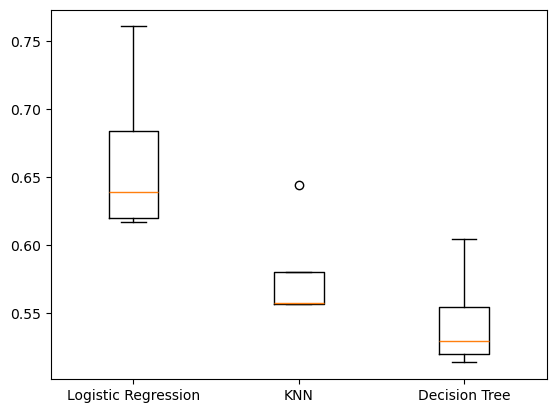

In [81]:
# Evaluating classification models: KNN, logistic regression, decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold

X = music_df.drop('genre', axis=1).values
y = music_df['genre'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {'Logistic Regression': LogisticRegression(), 'KNN': KNeighborsClassifier(),
          'Decision Tree': DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=4, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, tick_labels=models.keys())
plt.show()